# Global Terrorism (Data Analysis)

 **Problem Statement**




Explore and analyze the Global Terrorism Database (GTD) to gain insights into terrorist activities worldwide from 1970 through 2017. The GTD contains systematic data on domestic and international terrorist incidents, encompassing more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), located at the University of Maryland.

 **Business Context**

Understanding global terrorism trends from datasets like the GTD aids businesses in risk assessment and crisis management. Insights into attack characteristics and geographical hotspots inform security strategies. For supply chain management, anticipating disruptions due to terrorism is vital. Leveraging data-driven insights, businesses can enhance resilience and corporate social responsibility efforts.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Dataset**


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Global Terrorism Data (1).csv',encoding = "ISO-8859-1")

<ipython-input-3-ea631307bbe9>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Global Terrorism Data (1).csv',encoding = "ISO-8859-1")


In [ ]:
df

eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      Na

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


**Checking for nan values**

In [ ]:
a=list(df.columns)
b=[]
for i in range(len(a)):
  b.append(df[a[i]].isnull().sum()/181691*100)


df1=pd.DataFrame({'columnz':a,'Nan%':b})
#checking for coloumns with more thasn 40% nan values
df2=df1[df1['Nan%']<40]
df1=df1[df1['Nan%']>40]
c=list(df1.columnz)

df2

columnz       Nan%
0             eventid   0.000000
1               iyear   0.000000
2              imonth   0.000000
3                iday   0.000000
5            extended   0.000000
7             country   0.000000
8         country_txt   0.000000
9              region   0.000000
10         region_txt   0.000000
11          provstate   0.231712
12               city   0.238867
13           latitude   2.507554
14          longitude   2.508104
15        specificity   0.003302
16           vicinity   0.000000
18            summary  36.396409
19              crit1   0.000000
20              crit2   0.000000
21              crit3   0.000000
22          doubtterr   0.000550
25           multiple   0.000550
26            success   0.000000
27            suicide   0.000000
28        attacktype1   0.000000
29    attacktype1_txt   0.000000
34          targtype1   0.000000
35      targtype1_txt   0.000000
36       targsubtype1   5.709144
37   targsubtype1_txt   5.709144
38              corp1  23.418882
39            target1   0.350045
40            natlty1   0.858050
41        natlty1_txt   0.858050
58              gname   0.000000
65        guncertain1   0.209146
68         individual   0.000000
69             nperps  39.140629
70           nperpcap  38.245703
71            claimed  36.391456
81          weaptype1   0.000000
82      weaptype1_txt   0.000000
83       weapsubtype1  11.430396
84   weapsubtype1_txt  11.430396
97         weapdetail  37.244553
98              nkill   5.676120
99            nkillus  35.470111
100          nkillter  36.852678
101            nwound   8.977330
102          nwoundus  35.611010
103          nwoundte  38.055270
104          property   0.000000
109         ishostkid   0.097969
126            scite1  36.430533
129          dbsource   0.000000
130           INT_LOG   0.000000
131          INT_IDEO   0.000000
132          INT_MISC   0.000000
133           INT_ANY   0.000000

**Dropping Coloumns with more than 40% nan values from our Dataset**

In [ ]:
for i in range(len(c)):
  df.drop([c[i]],axis=1,inplace=True)
  #print(df1.columnz[i])

In [ ]:
#checking for number of nan values in each column now
a=list(df.columns)
b=[]
for i in range(len(a)):
  b.append(df[a[i]].isnull().sum())

z=list(zip(a,b))
z

[('eventid', 0),
 ('iyear', 0),
 ('imonth', 0),
 ('iday', 0),
 ('extended', 0),
 ('country', 0),
 ('country_txt', 0),
 ('region', 0),
 ('region_txt', 0),
 ('provstate', 421),
 ('city', 434),
 ('latitude', 4556),
 ('longitude', 4557),
 ('specificity', 6),
 ('vicinity', 0),
 ('summary', 66129),
 ('crit1', 0),
 ('crit2', 0),
 ('crit3', 0),
 ('doubtterr', 1),
 ('multiple', 1),
 ('success', 0),
 ('suicide', 0),
 ('attacktype1', 0),
 ('attacktype1_txt', 0),
 ('targtype1', 0),
 ('targtype1_txt', 0),
 ('targsubtype1', 10373),
 ('targsubtype1_txt', 10373),
 ('corp1', 42550),
 ('target1', 636),
 ('natlty1', 1559),
 ('natlty1_txt', 1559),
 ('gname', 0),
 ('guncertain1', 380),
 ('individual', 0),
 ('nperps', 71115),
 ('nperpcap', 69489),
 ('claimed', 66120),
 ('weaptype1', 0),
 ('weaptype1_txt', 0),
 ('weapsubtype1', 20768),
 ('weapsubtype1_txt', 20768),
 ('weapdetail', 67670),
 ('nkill', 10313),
 ('nkillus', 64446),
 ('nkillter', 66958),
 ('nwound', 16311),
 ('nwoundus', 64702),
 ('nwoundte', 691

In [ ]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...       nkillter         nwound  \
count  1.771340e+05  181685.000000  ...  114733.000000  165380.000000   
mean  -4.586957e+02       1.451452  ...       0.508058       3.167668   
std    2.047790e+05       0.995430  ...       4.199937      35.949392   
min   -8.618590e+07       1.000000  ...       0.000000       0.000000   
25%    4.545640e+00       1.000000  ...       0.000000       0.000000   
50%    4.324651e+01       1.000000  ...       0.000000       0.000000   
75%    6.871033e+01       1.000000  ...       0.000000       2.000000   
max    1.793667e+02       5.000000  ...     500.000000    8191.000000   

            nwoundus       nwoundte       property      ishostkid  \
count  116989.000000  112548.000000  181691.000000  181513.000000   
mean        0.038944       0.107163      -0.544556       0.059054   
std         3.057361       1.488881       3.122889       0.461244   
min         0.000000       0.000000      -9.000000      -9.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max       751.000000     200.000000       1.000000       1.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 41 columns]

In [ ]:
df.country_txt.value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

**Countries With Highest Number Of Terrorist Attacks**

<Axes: title={'center': 'Countries with highest number of terrorist attacks '}, xlabel='Year', ylabel='No of attacks'>

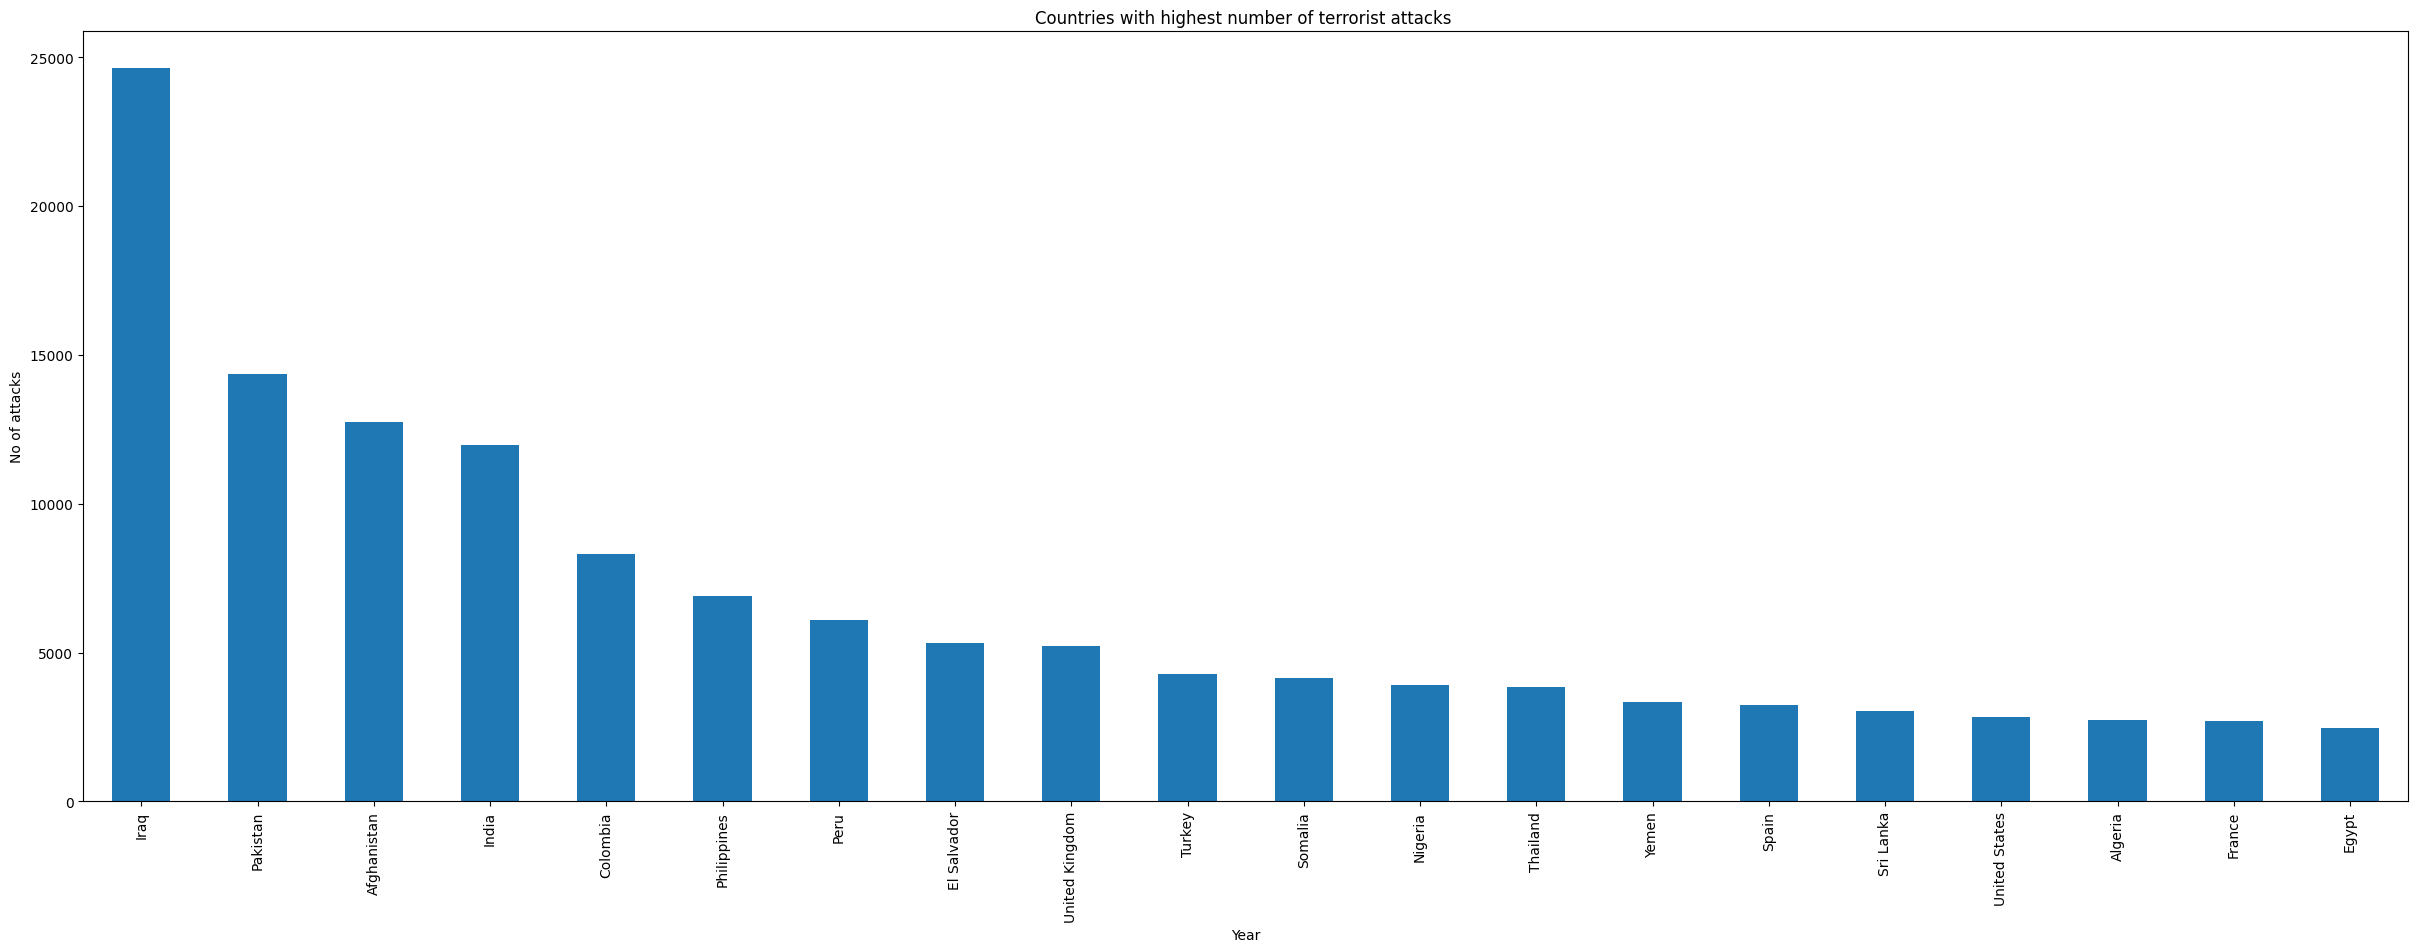

In [ ]:
df.country_txt.value_counts().head(20).plot(kind='bar',figsize=(30,10),title='Countries with highest number of terrorist attacks ',xlabel='Year',ylabel='No of attacks')

**Total Deaths Resulting From Terrorist Attacks in a Country**

<Axes: title={'center': 'Total Deaths Resulting From Terrorist Attacks in a Country.'}, xlabel='Year', ylabel='No of Deaths'>

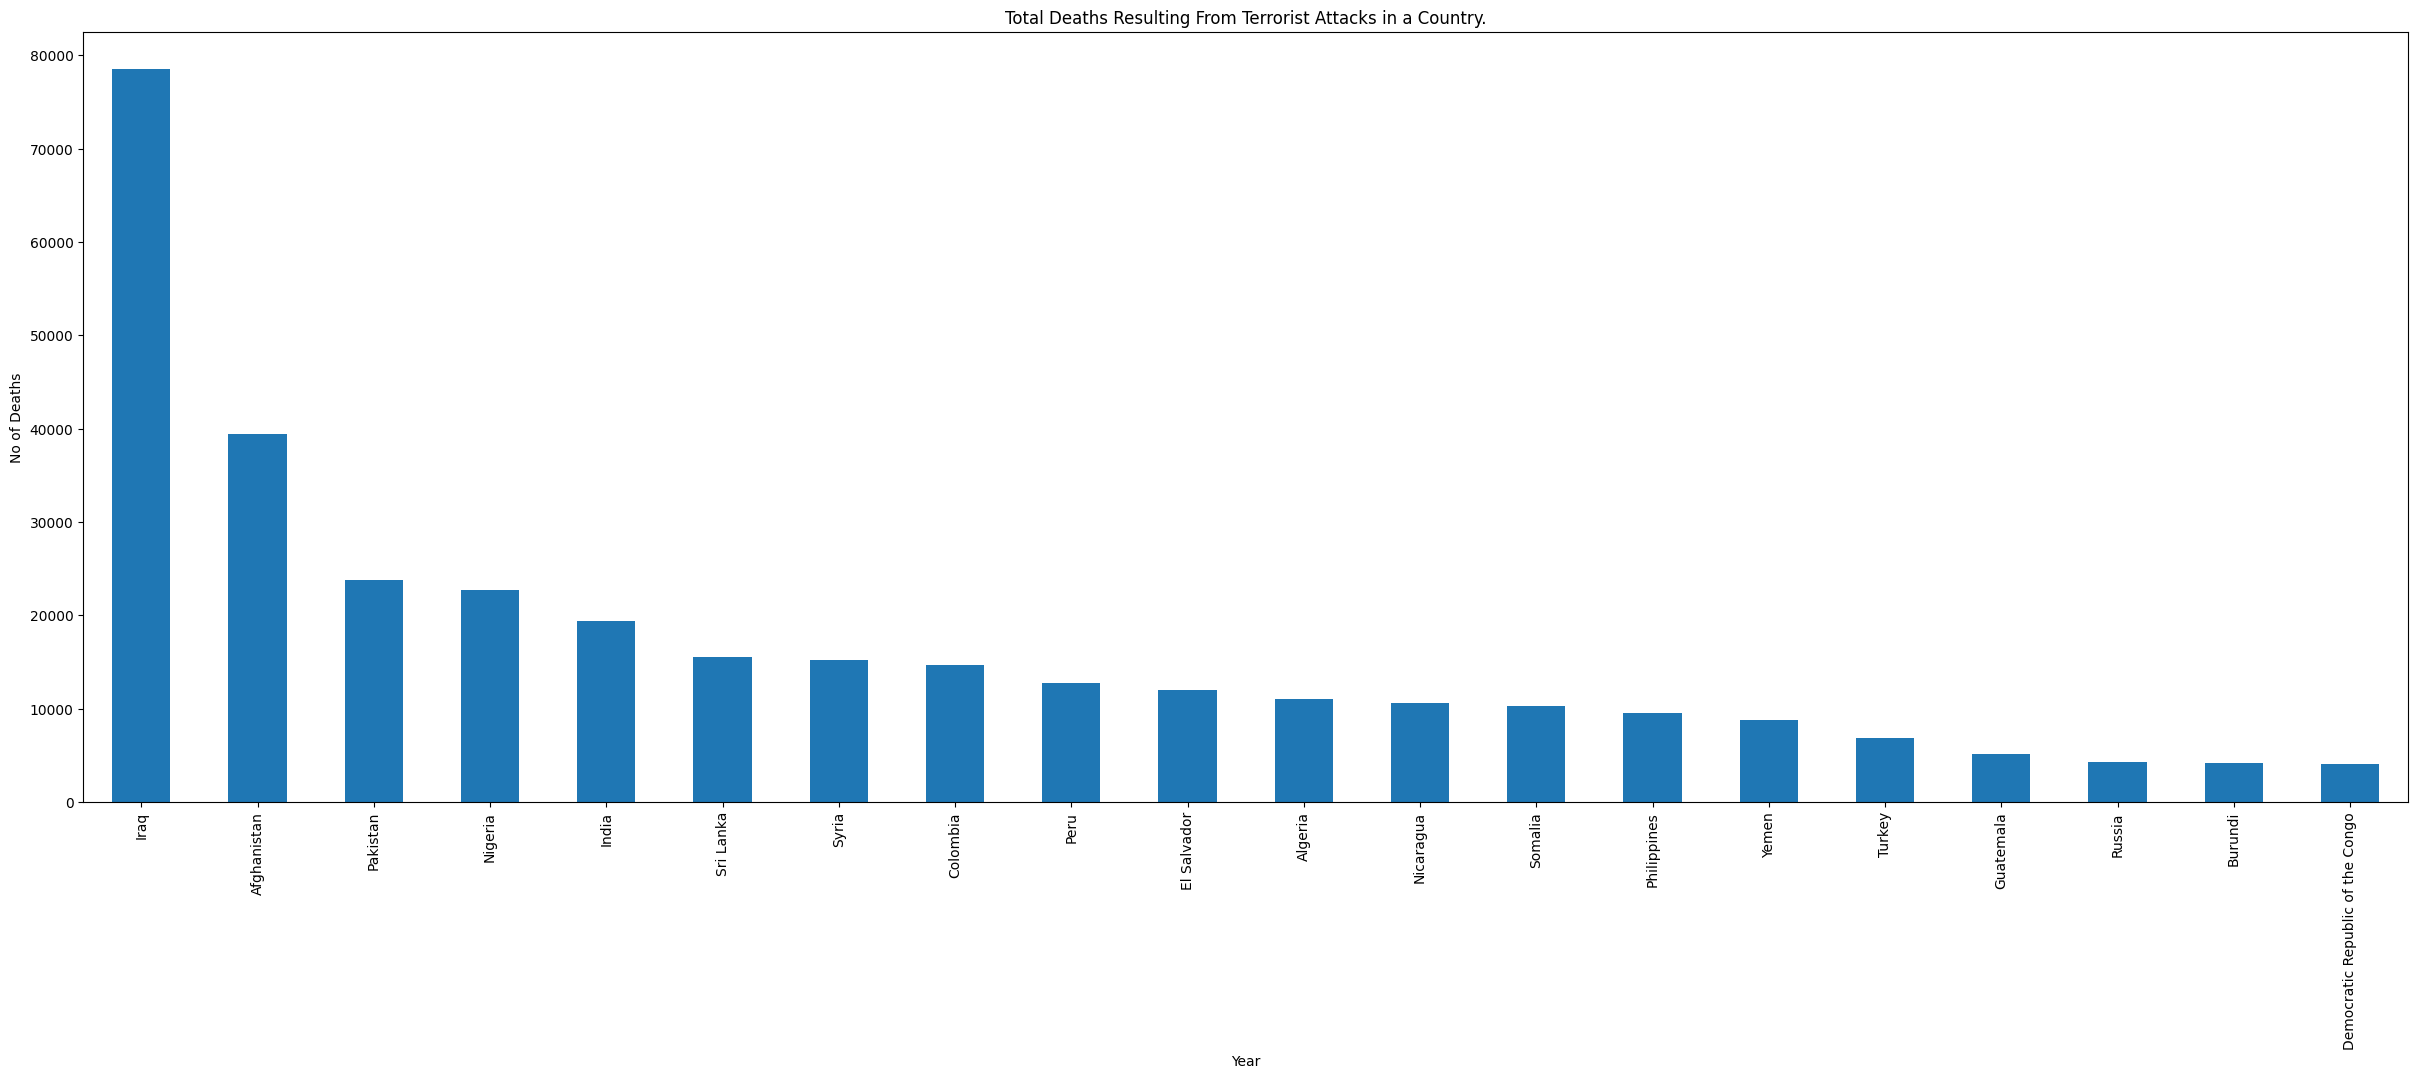

In [ ]:
df.groupby(['country_txt']).nkill.sum().sort_values(ascending=False).head(20).plot(xlabel='Year',ylabel='No of Deaths',title='Total Deaths Resulting From Terrorist Attacks in a Country.',kind='bar',figsize=(30,10))

**Total Deaths Resulting From Terrorist Attacks Around The World Year Wise**

<Axes: title={'center': 'Total Deaths Resulting From Terrorist Attacks Around The World Year Wise'}, xlabel='Year', ylabel='No of Deaths'>

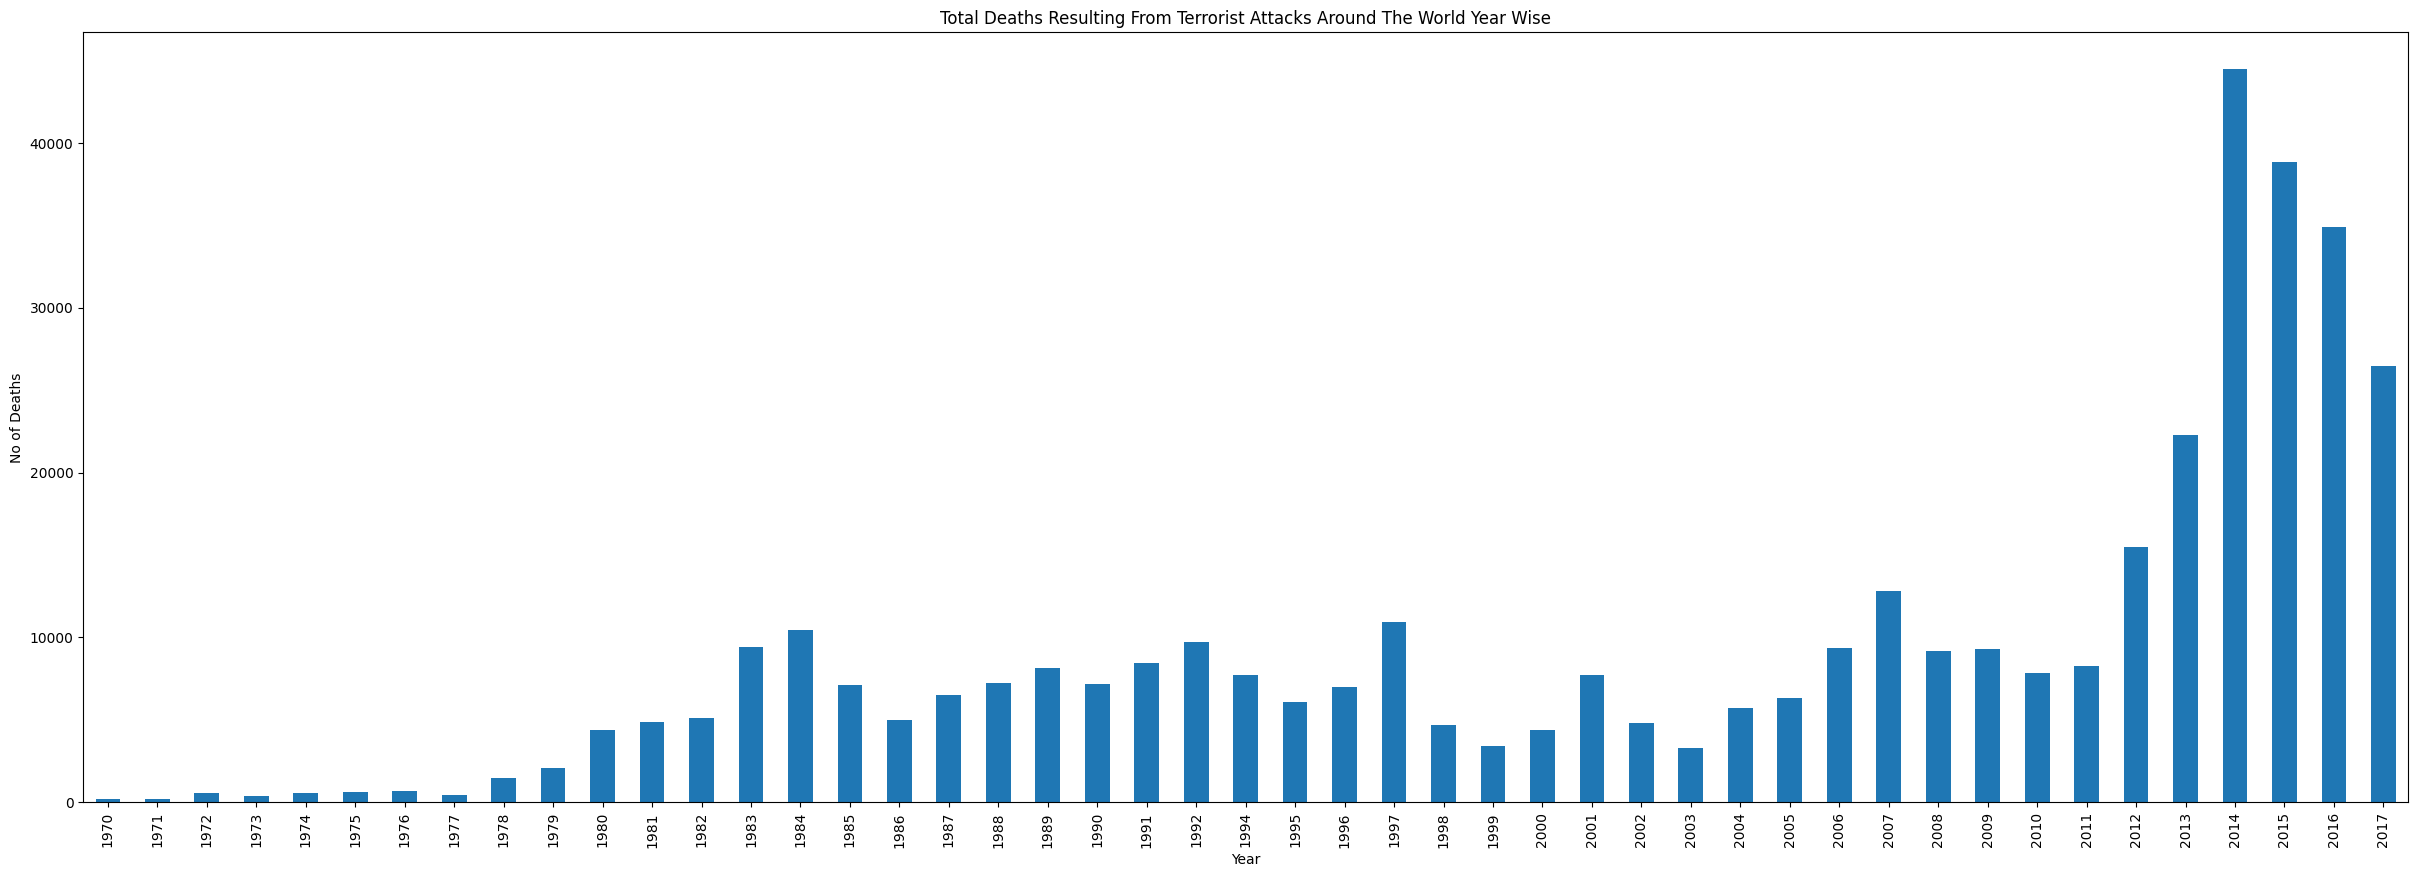

In [ ]:
df.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Total Deaths Resulting From Terrorist Attacks Around The World Year Wise',kind='bar',figsize=(30,10))

**No. Of Recorded Terrorist Attacks Around The World Year Wise**

([<matplotlib.axis.XTick at 0x7eb6a8117cd0>,
 [Text(1970, 0, '1970'),
  Text(1971, 0, '1971'),
  Text(1972, 0, '1972'),
  Text(1973, 0, '1973'),
  Text(1974, 0, '1974'),
  Text(1975, 0, '1975'),
  Text(1976, 0, '1976'),
  Text(1977, 0, '1977'),
  Text(1978, 0, '1978'),
  Text(1979, 0, '1979'),
  Text(1980, 0, '1980'),
  Text(1981, 0, '1981'),
  Text(1982, 0, '1982'),
  Text(1983, 0, '1983'),
  Text(1984, 0, '1984'),
  Text(1985, 0, '1985'),
  Text(1986, 0, '1986'),
  Text(1987, 0, '1987'),
  Text(1988, 0, '1988'),
  Text(1989, 0, '1989'),
  Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Tex

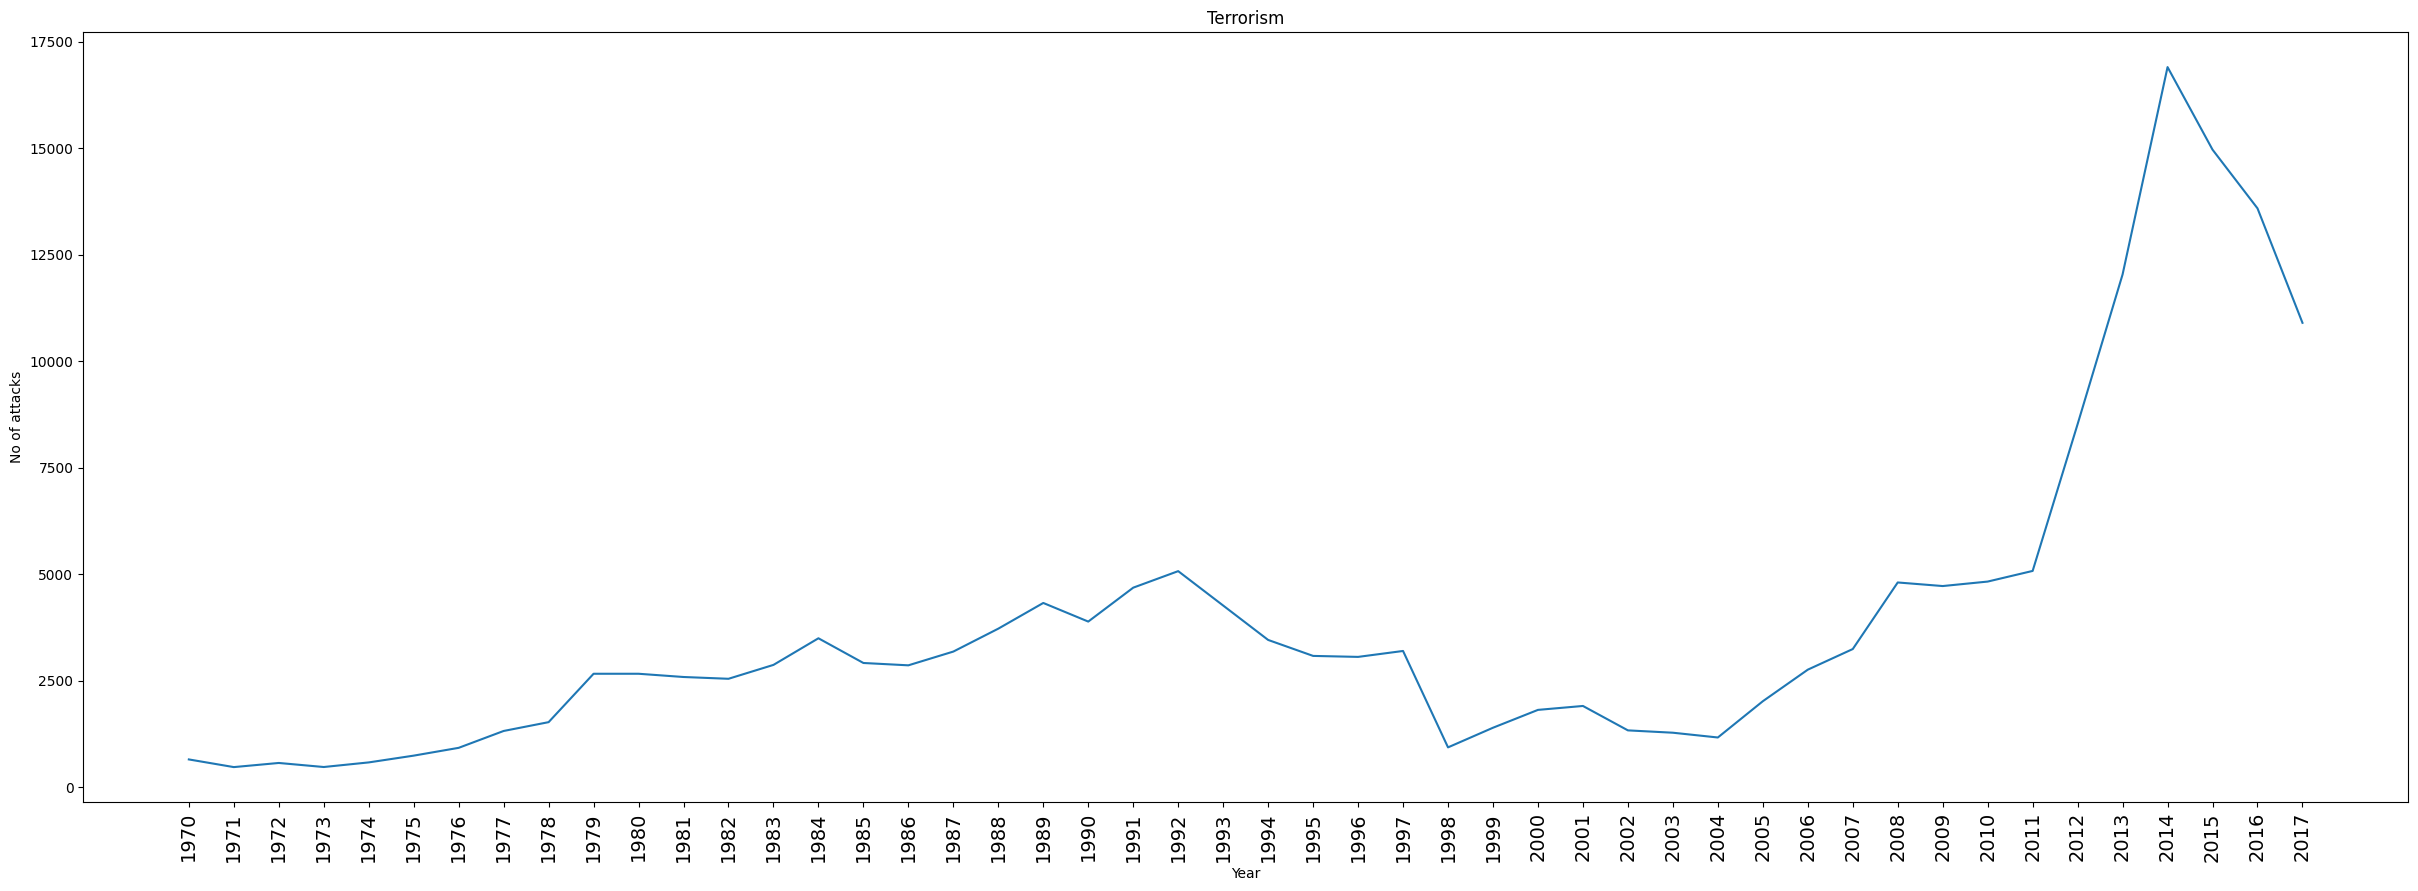

In [ ]:
df.iyear.value_counts().sort_index().plot(figsize=(30,10),title='Terrorism',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)

In [ ]:
%matplotlib inline

**Going forward, we are delving into in-depth analysis on terror attacks in the top three most terror-affected countries, along with India, Colombia, the USA, and the UK**

#USA

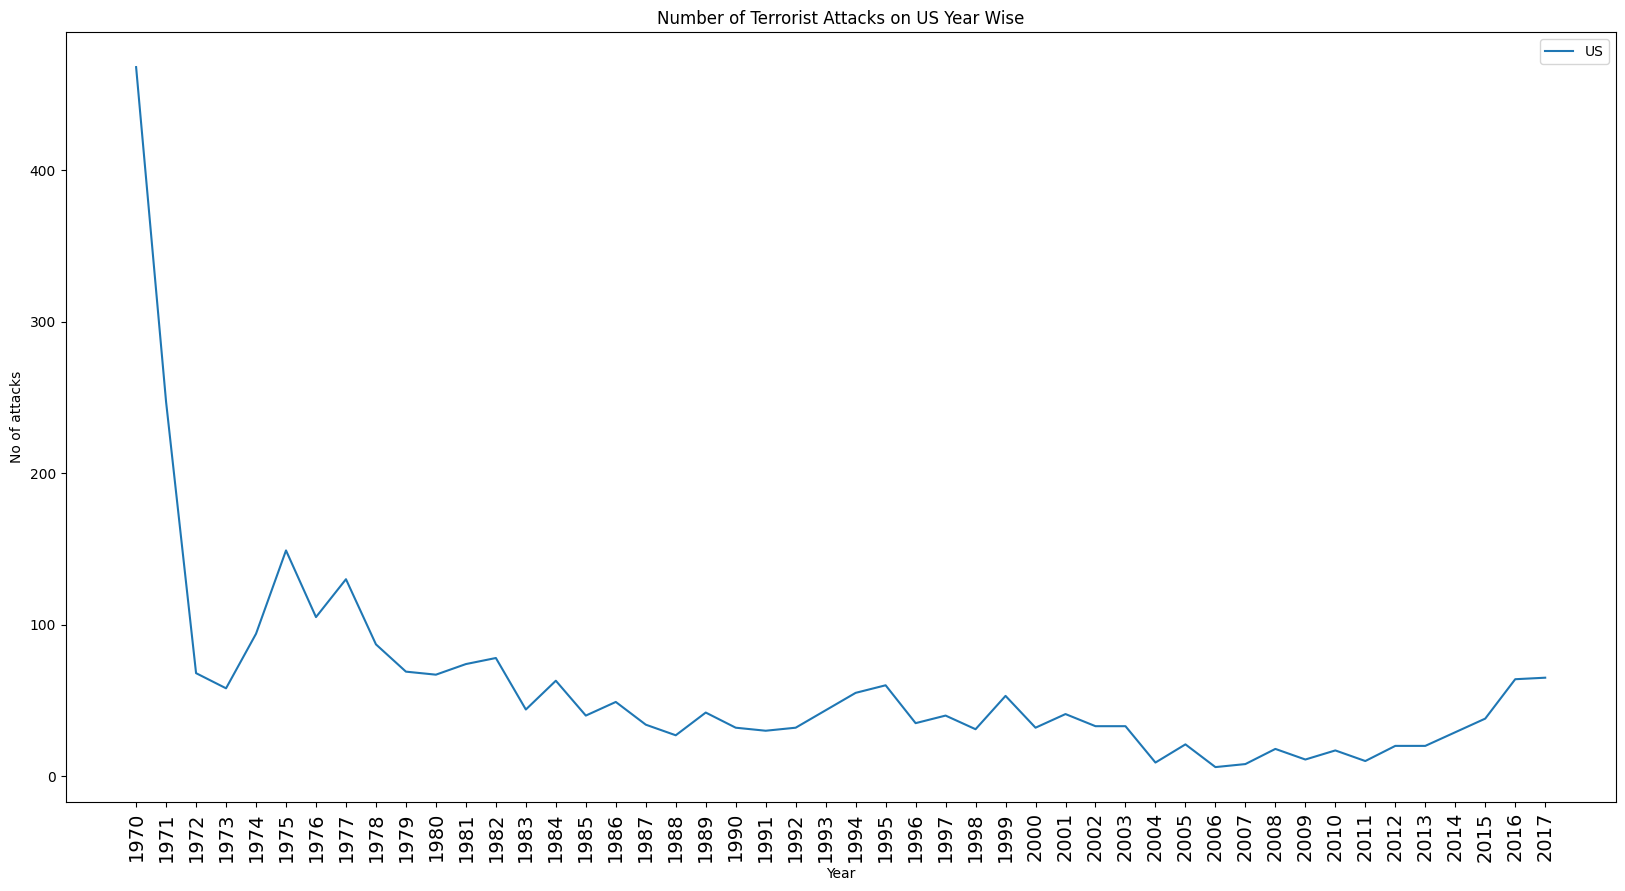

In [ ]:
from numpy.core.fromnumeric import size

US_attacks=df[(df.country_txt=='United States')]
usa=US_attacks['iyear'].value_counts().sort_index().reset_index()
usa.columns=['Year','US']
usa.plot(x='Year',y='US',figsize=(20,10),title='Number of Terrorist Attacks on US Year Wise',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)

usa = usa.set_index('Year')


<Axes: title={'center': 'Targets'}>

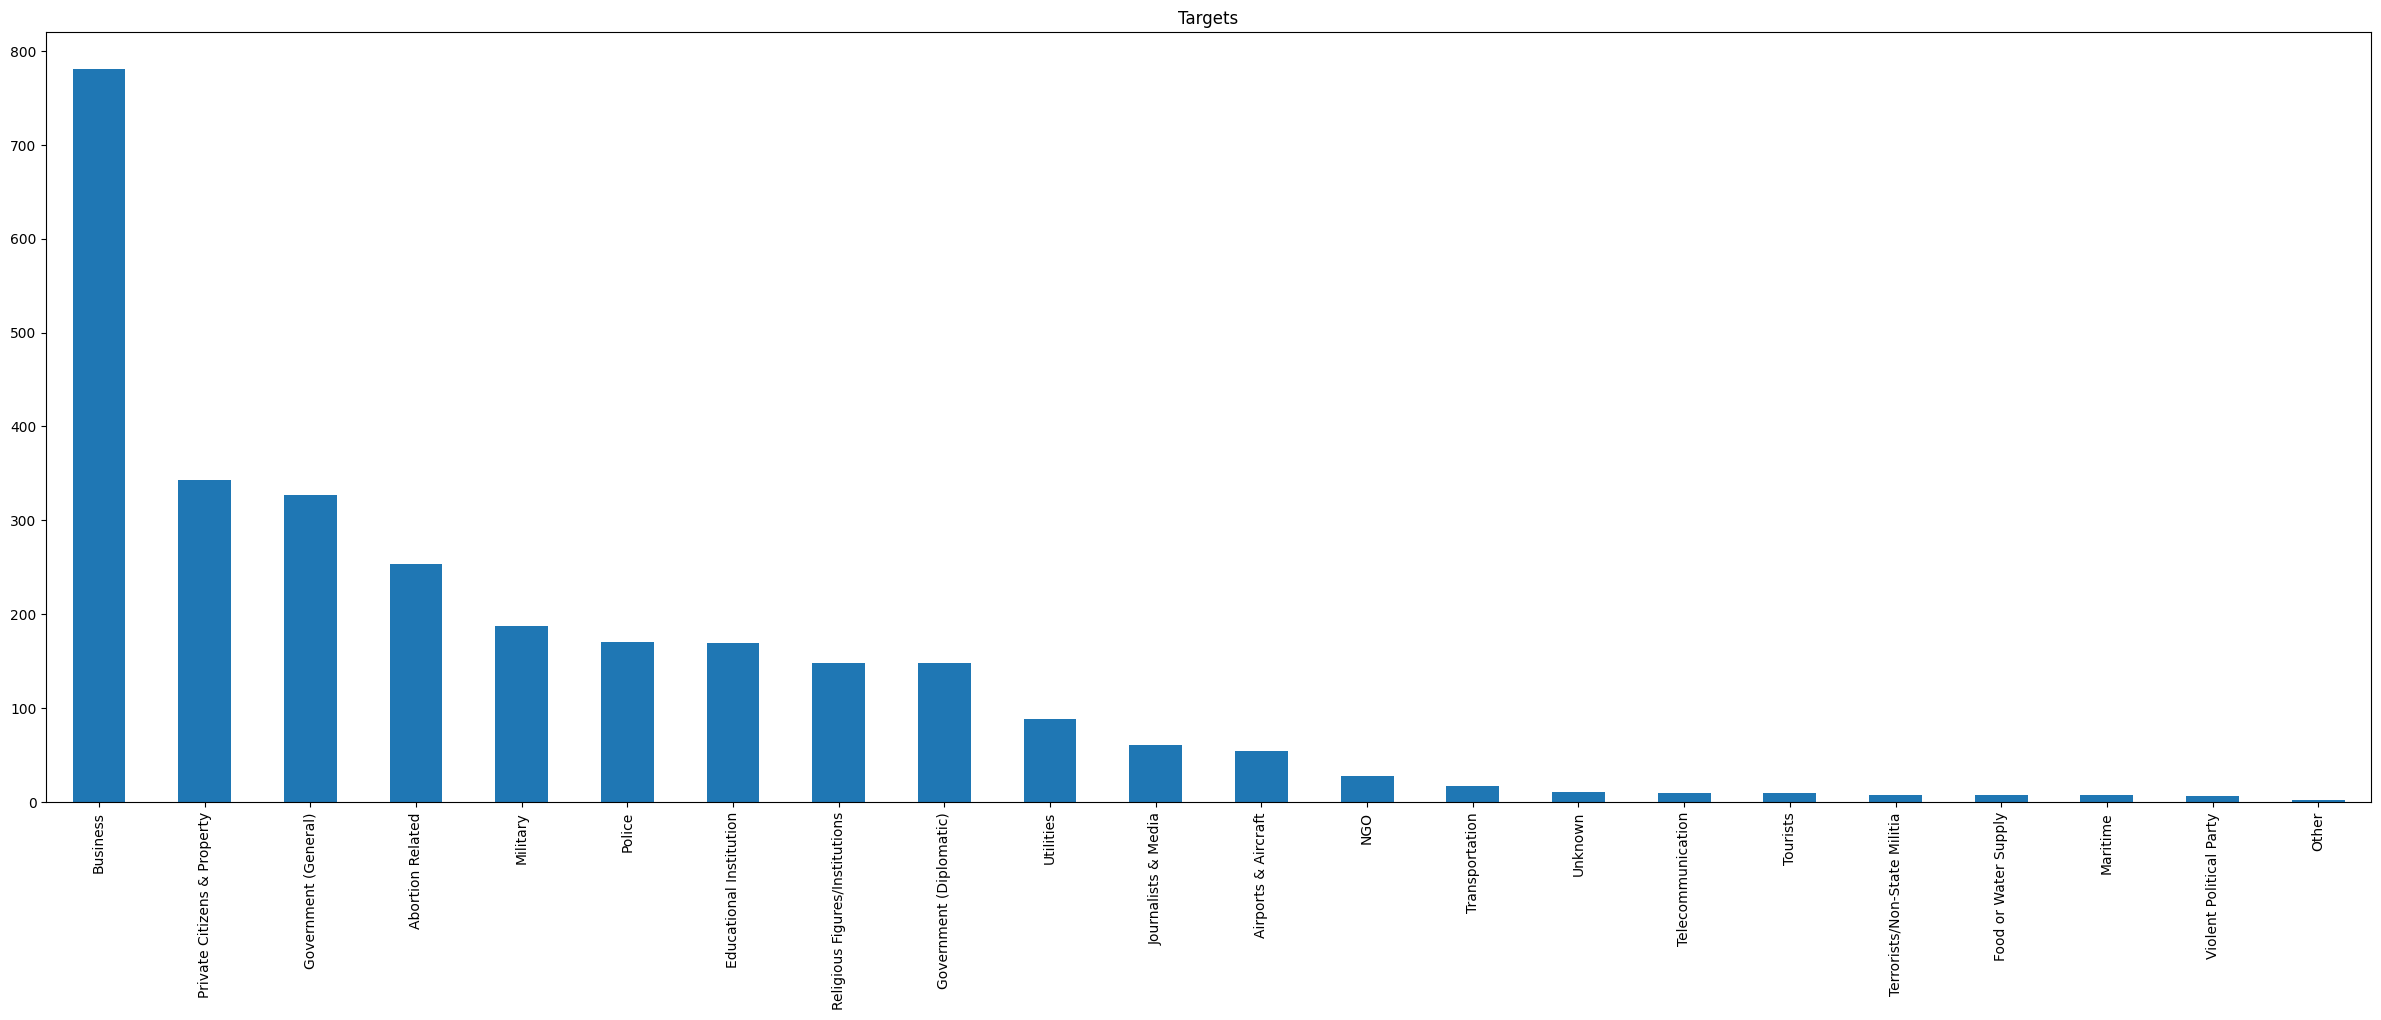

In [ ]:
US_attacks.targtype1_txt.value_counts().plot(kind='bar',figsize=(30,10),title='Targets')

<Axes: title={'center': 'States'}>

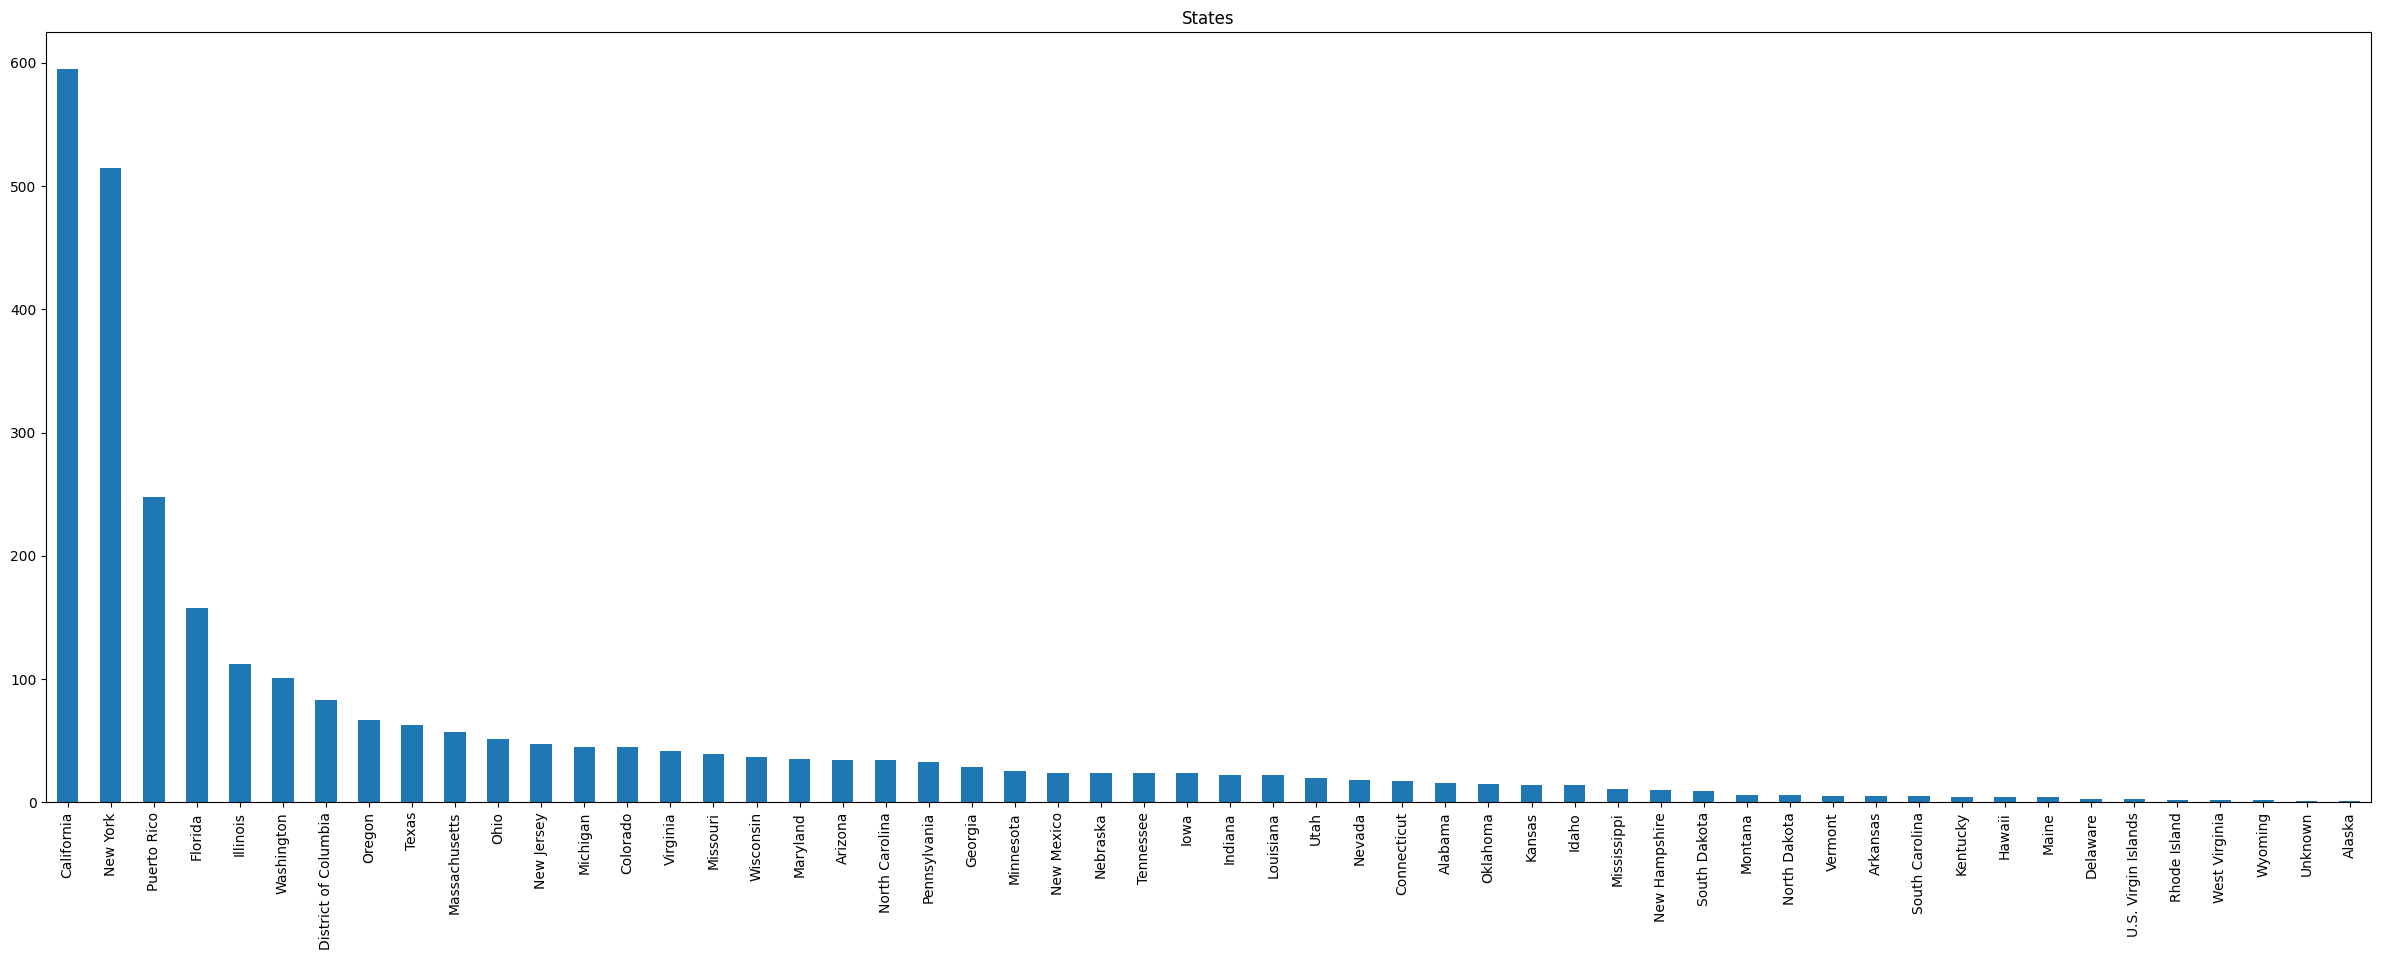

In [ ]:
US_attacks.provstate.value_counts().plot(kind='bar',figsize=(30,10),title='States')

<Axes: title={'center': 'Attack Type'}>

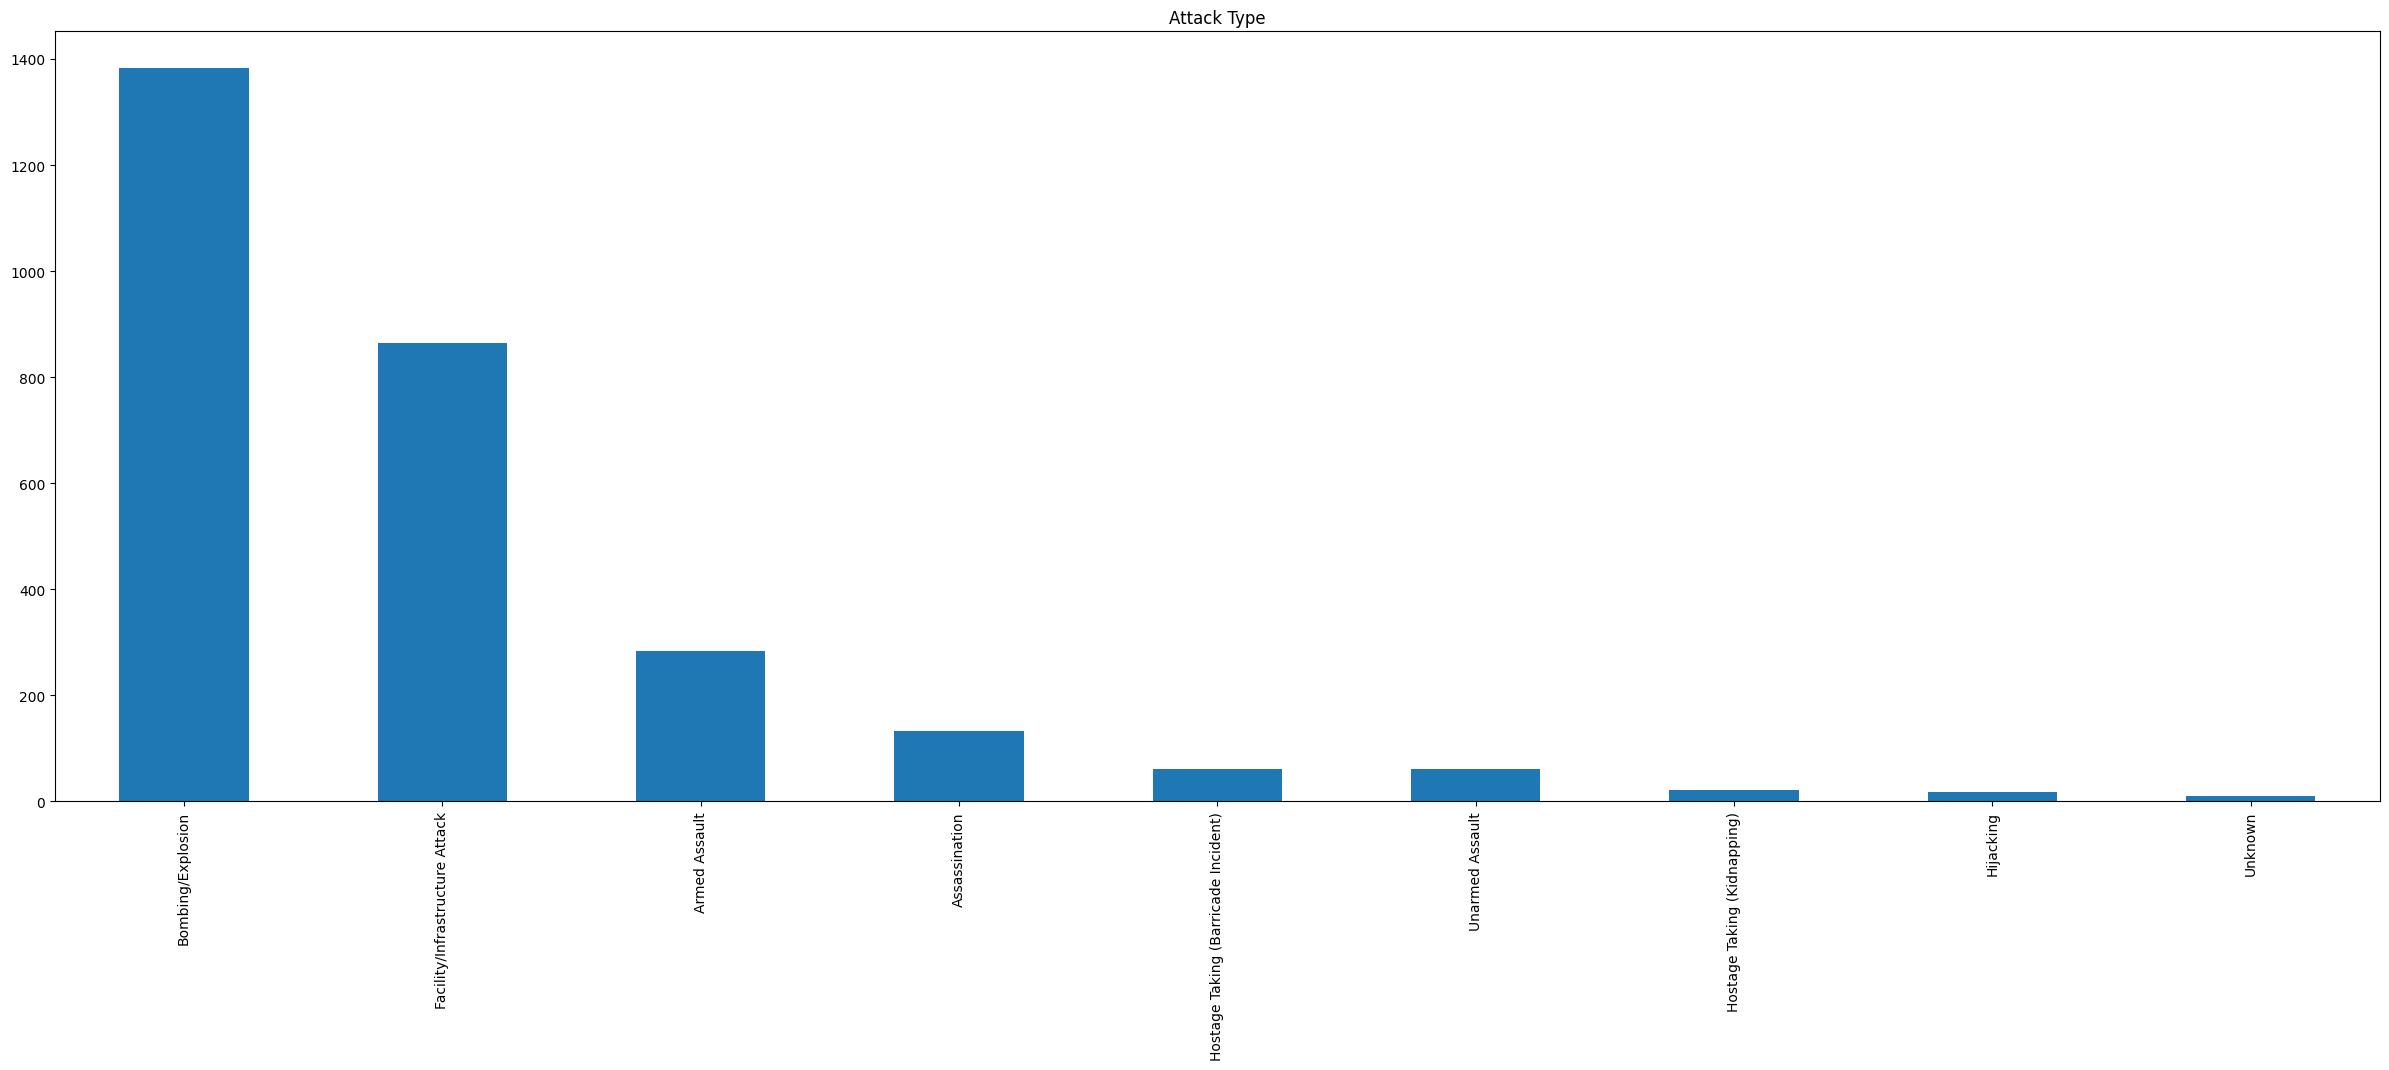

In [ ]:
US_attacks.attacktype1_txt.value_counts().plot(figsize=(30,10),title='Attack Type',kind='bar')

<Axes: title={'center': 'Deaths'}, xlabel='Year', ylabel='No of Deaths'>

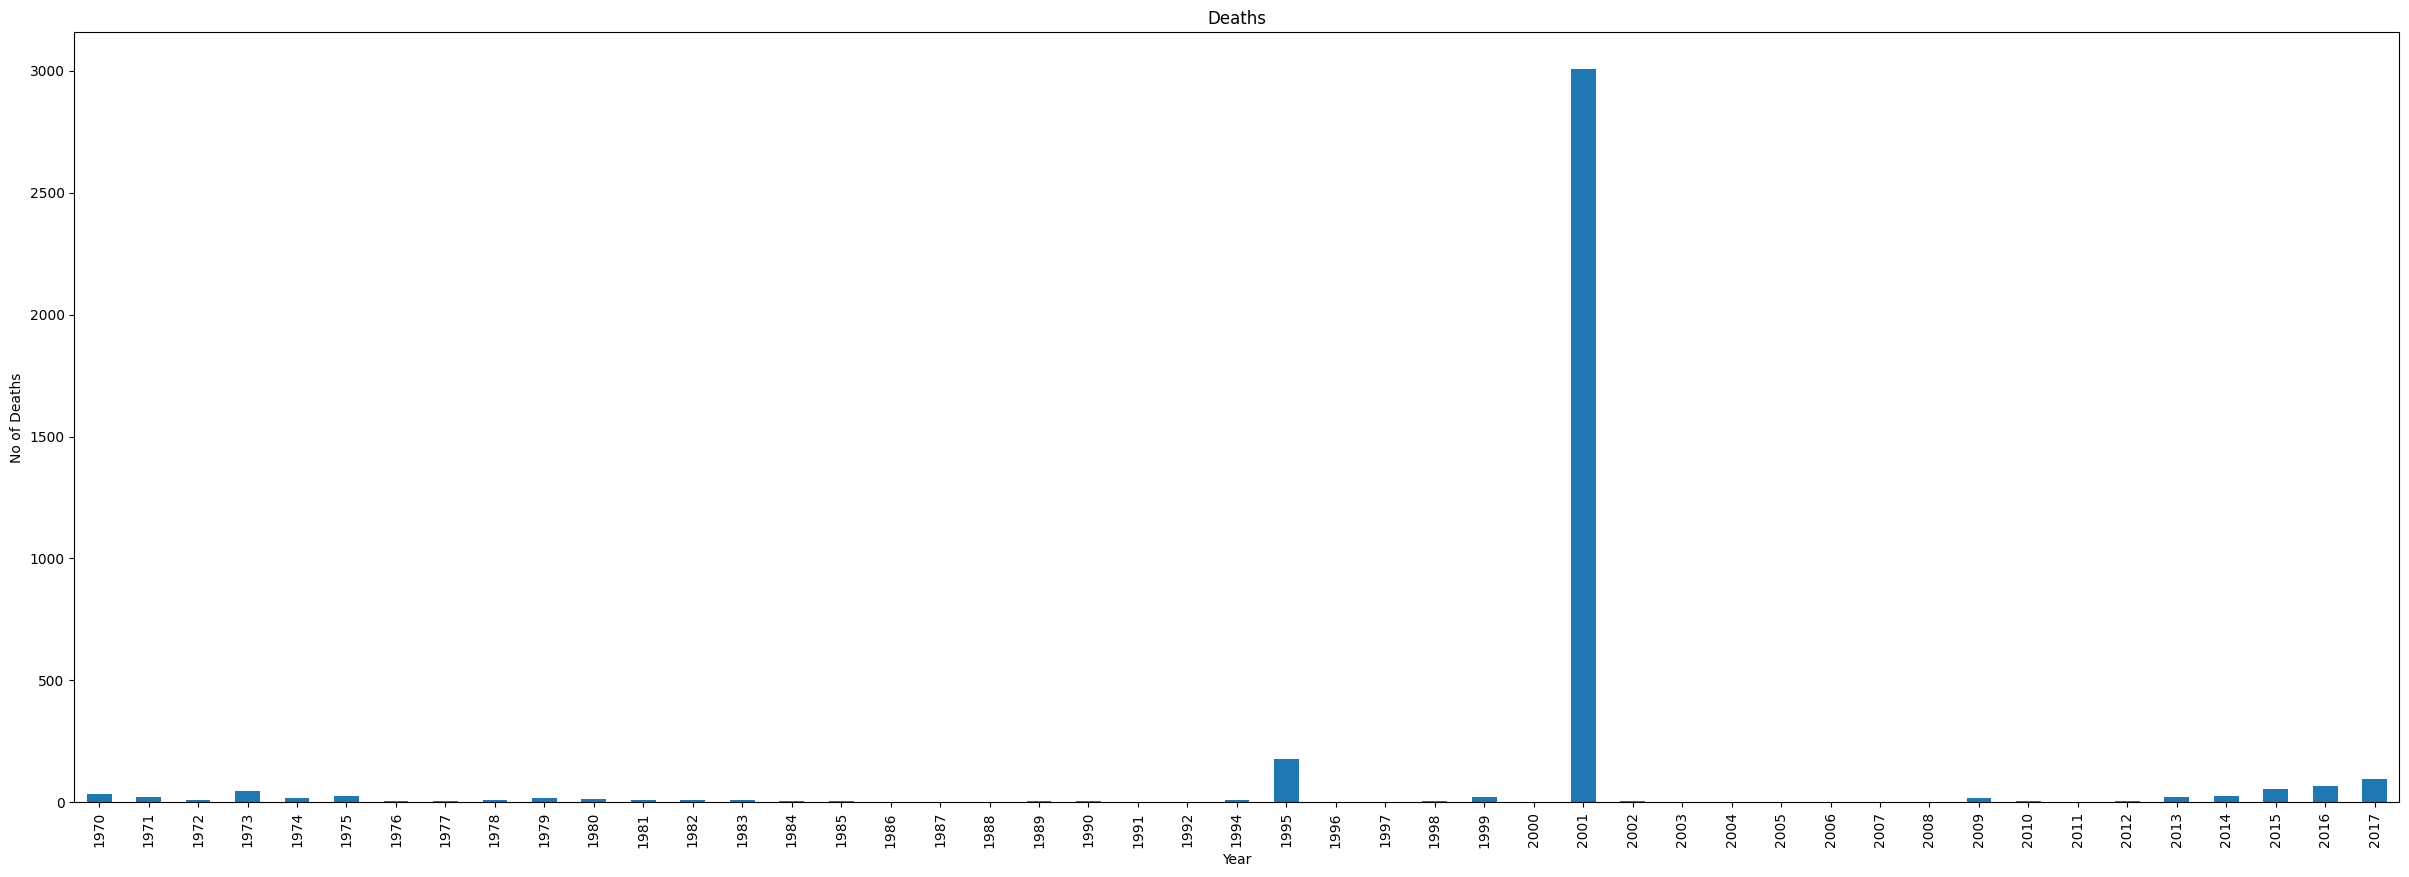

In [ ]:
US_attacks.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Deaths',kind='bar',figsize=(30,10))

<Axes: title={'center': 'Weapons Used'}>

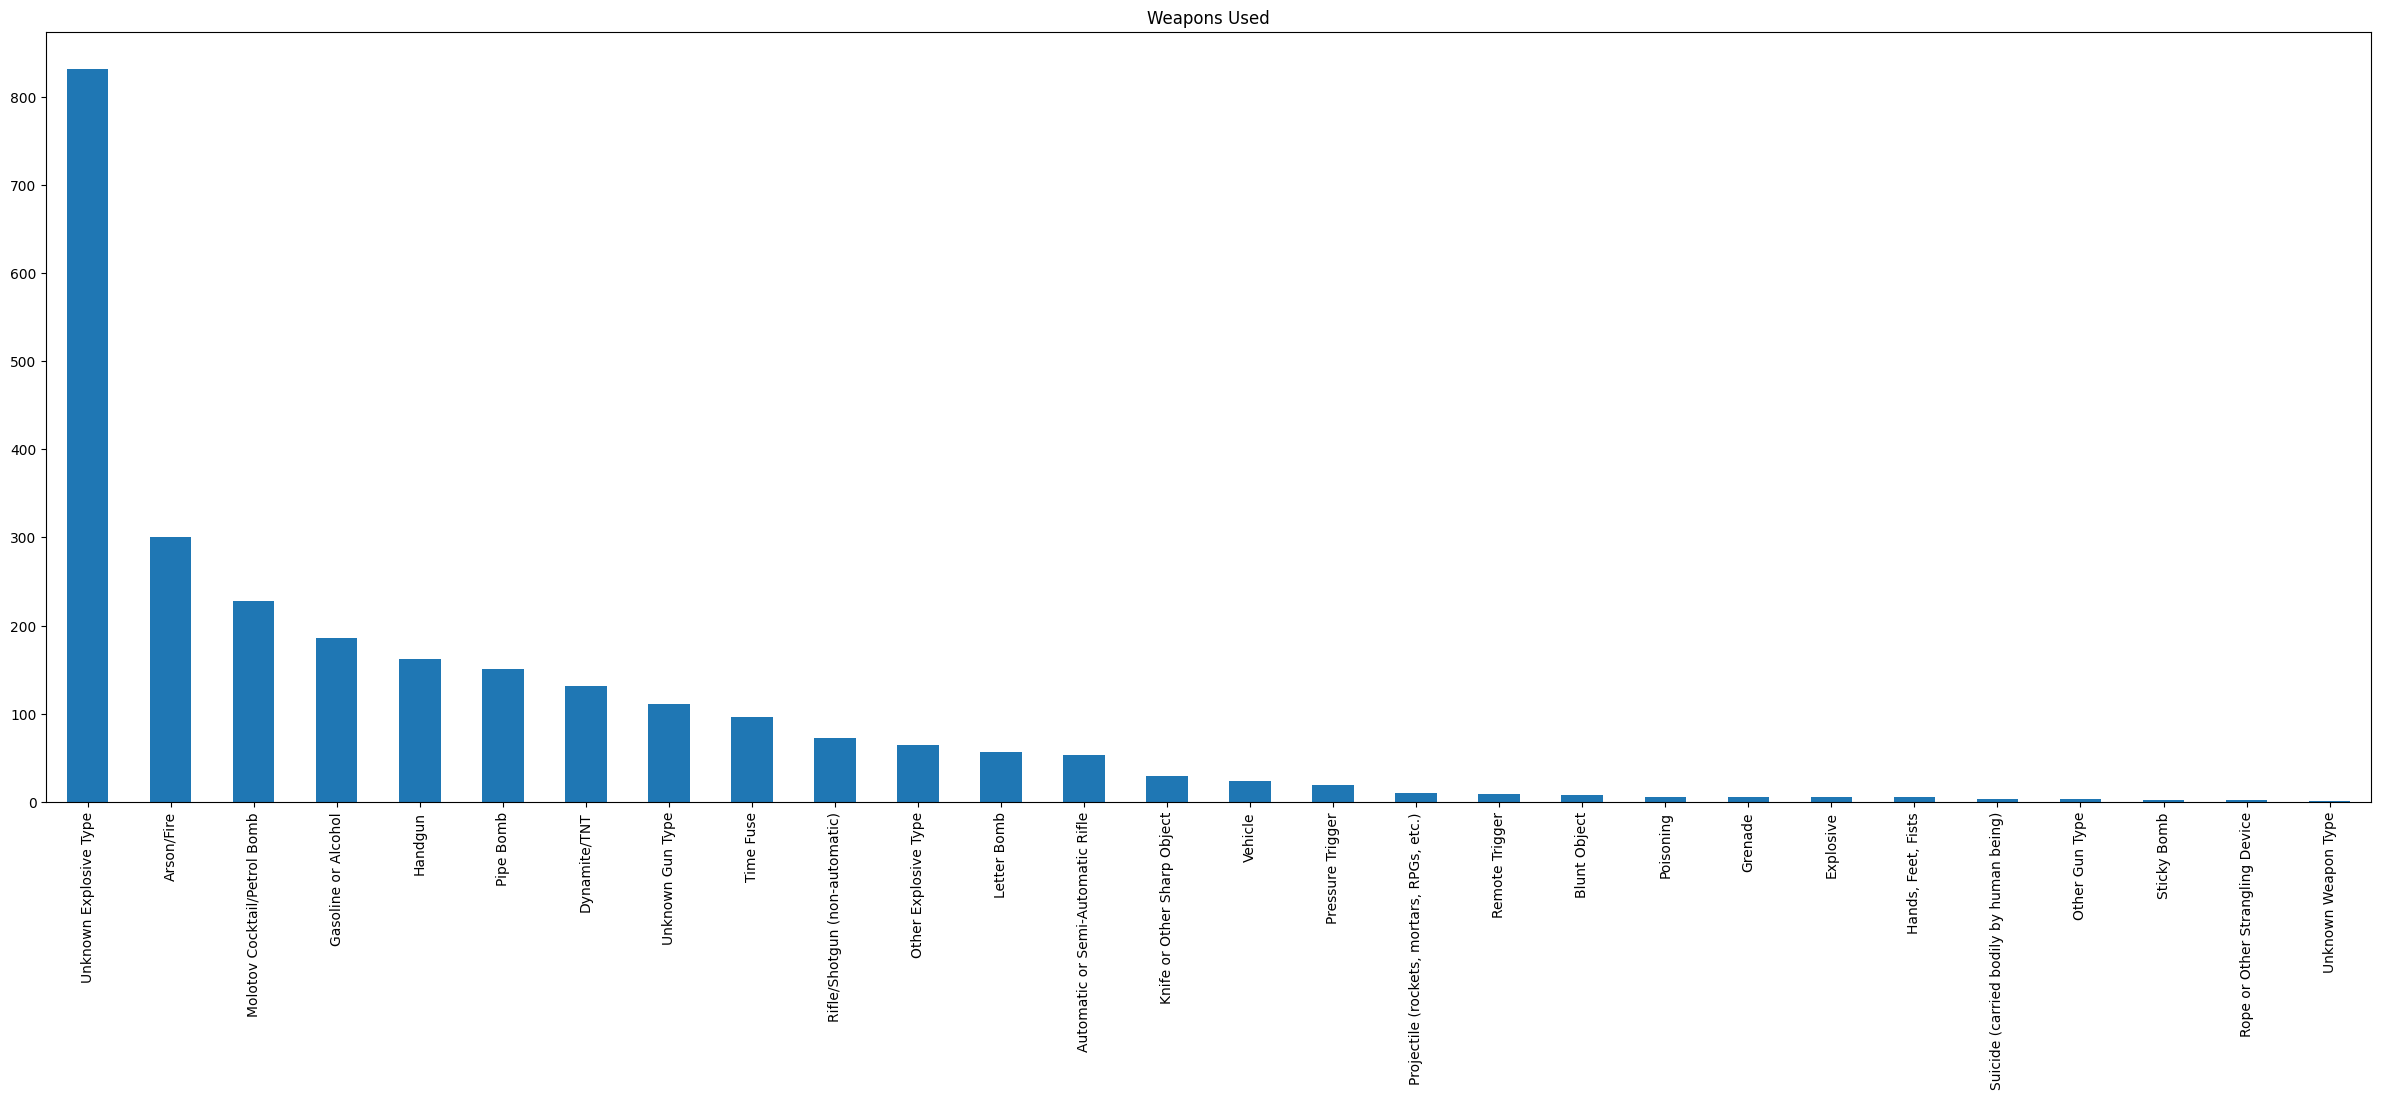

In [ ]:
US_attacks.weapsubtype1_txt.value_counts().plot(kind='bar',figsize=(30,10),title='Weapons Used')

In [ ]:
US_attacks.gname.unique()

array(['Black Nationalists', 'Unknown', "New Year's Gang",
       'Weather Underground, Weathermen', 'Left-Wing Militants',
       'Armed Commandos of Liberation', 'Strikers', 'Student Radicals',
       'White extremists',
       'Armed Revolutionary Independence Movement (MIRA)', 'Ku Klux Klan',
       'Revolutionary Force 9', 'Puerto Rican Nationalists',
       'Chicano Liberation Front', 'Puerto Rican Resistance Movement',
       'Black Panthers', 'New World Liberation Front (NWLF)',
       'Cuban Exiles',
       'The World United Formosans for Independence (WUFI)',
       'Revolutionary Force 26', 'Black Afro Militant Movement',
       'Stop the War Coalition', 'Cuban Action',
       'Jewish Defense League (JDL)', 'Right-wing extremists',
       'National Committee to Combat Fascism',
       'Revolutionary Force Seven', 'Seattle Liberation Front',
       "American Servicemen's Union (ASU)", 'Jonathan Jackson Brigade',
       'White Panther Party', 'Revolutionary Action Party',
    

<Axes: title={'center': 'Terrorist Orgs'}>

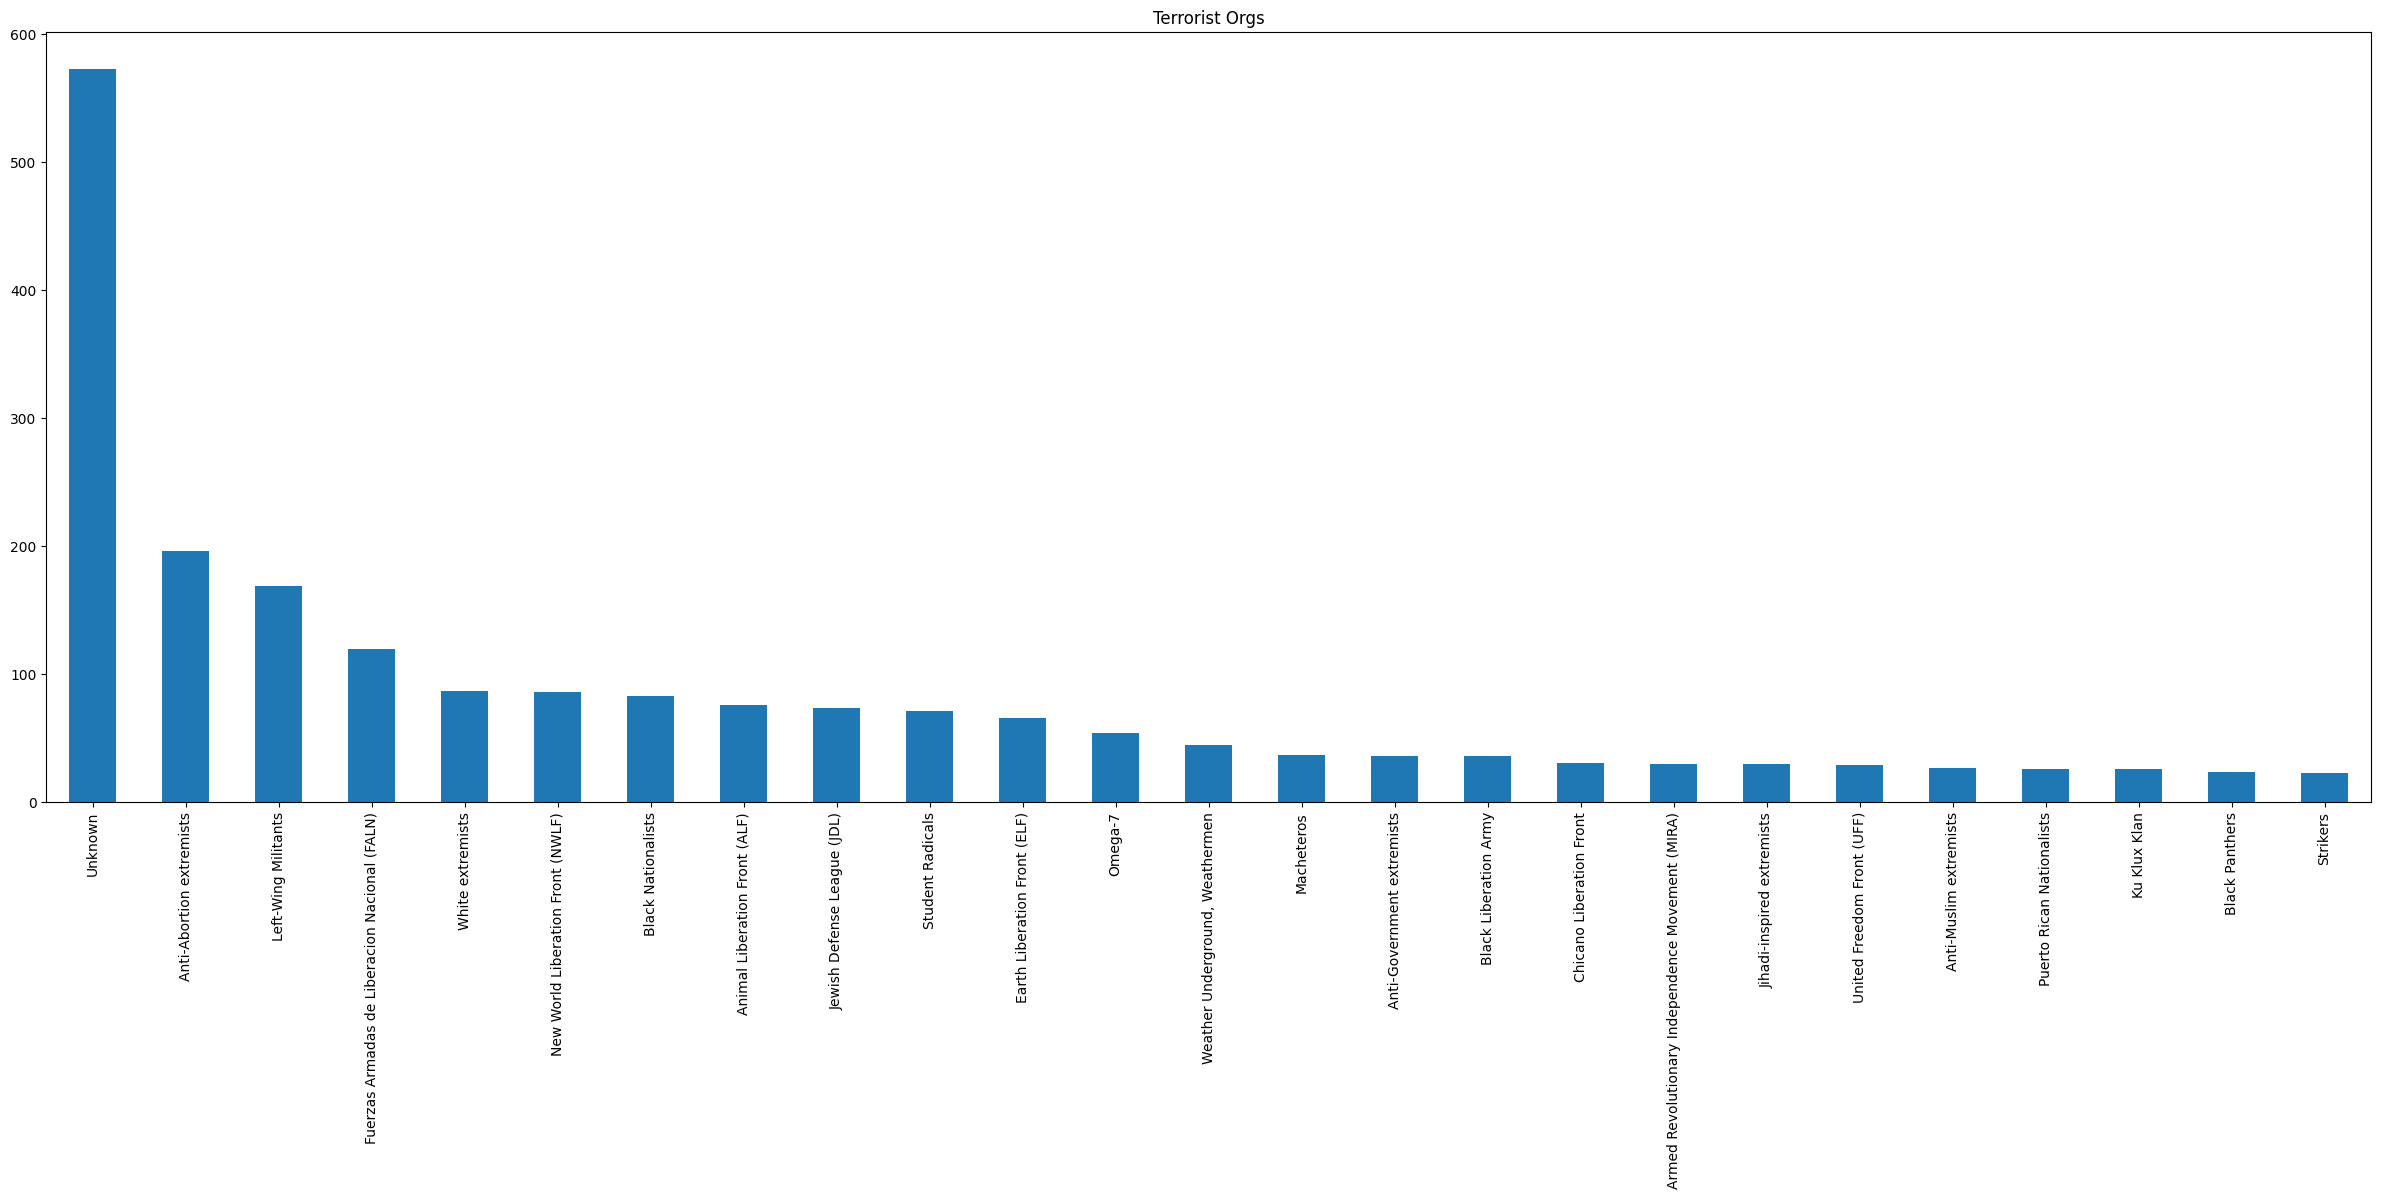

In [ ]:
US_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Terrorist orgs with highest kill count'}, xlabel='Year', ylabel='No of Deaths'>

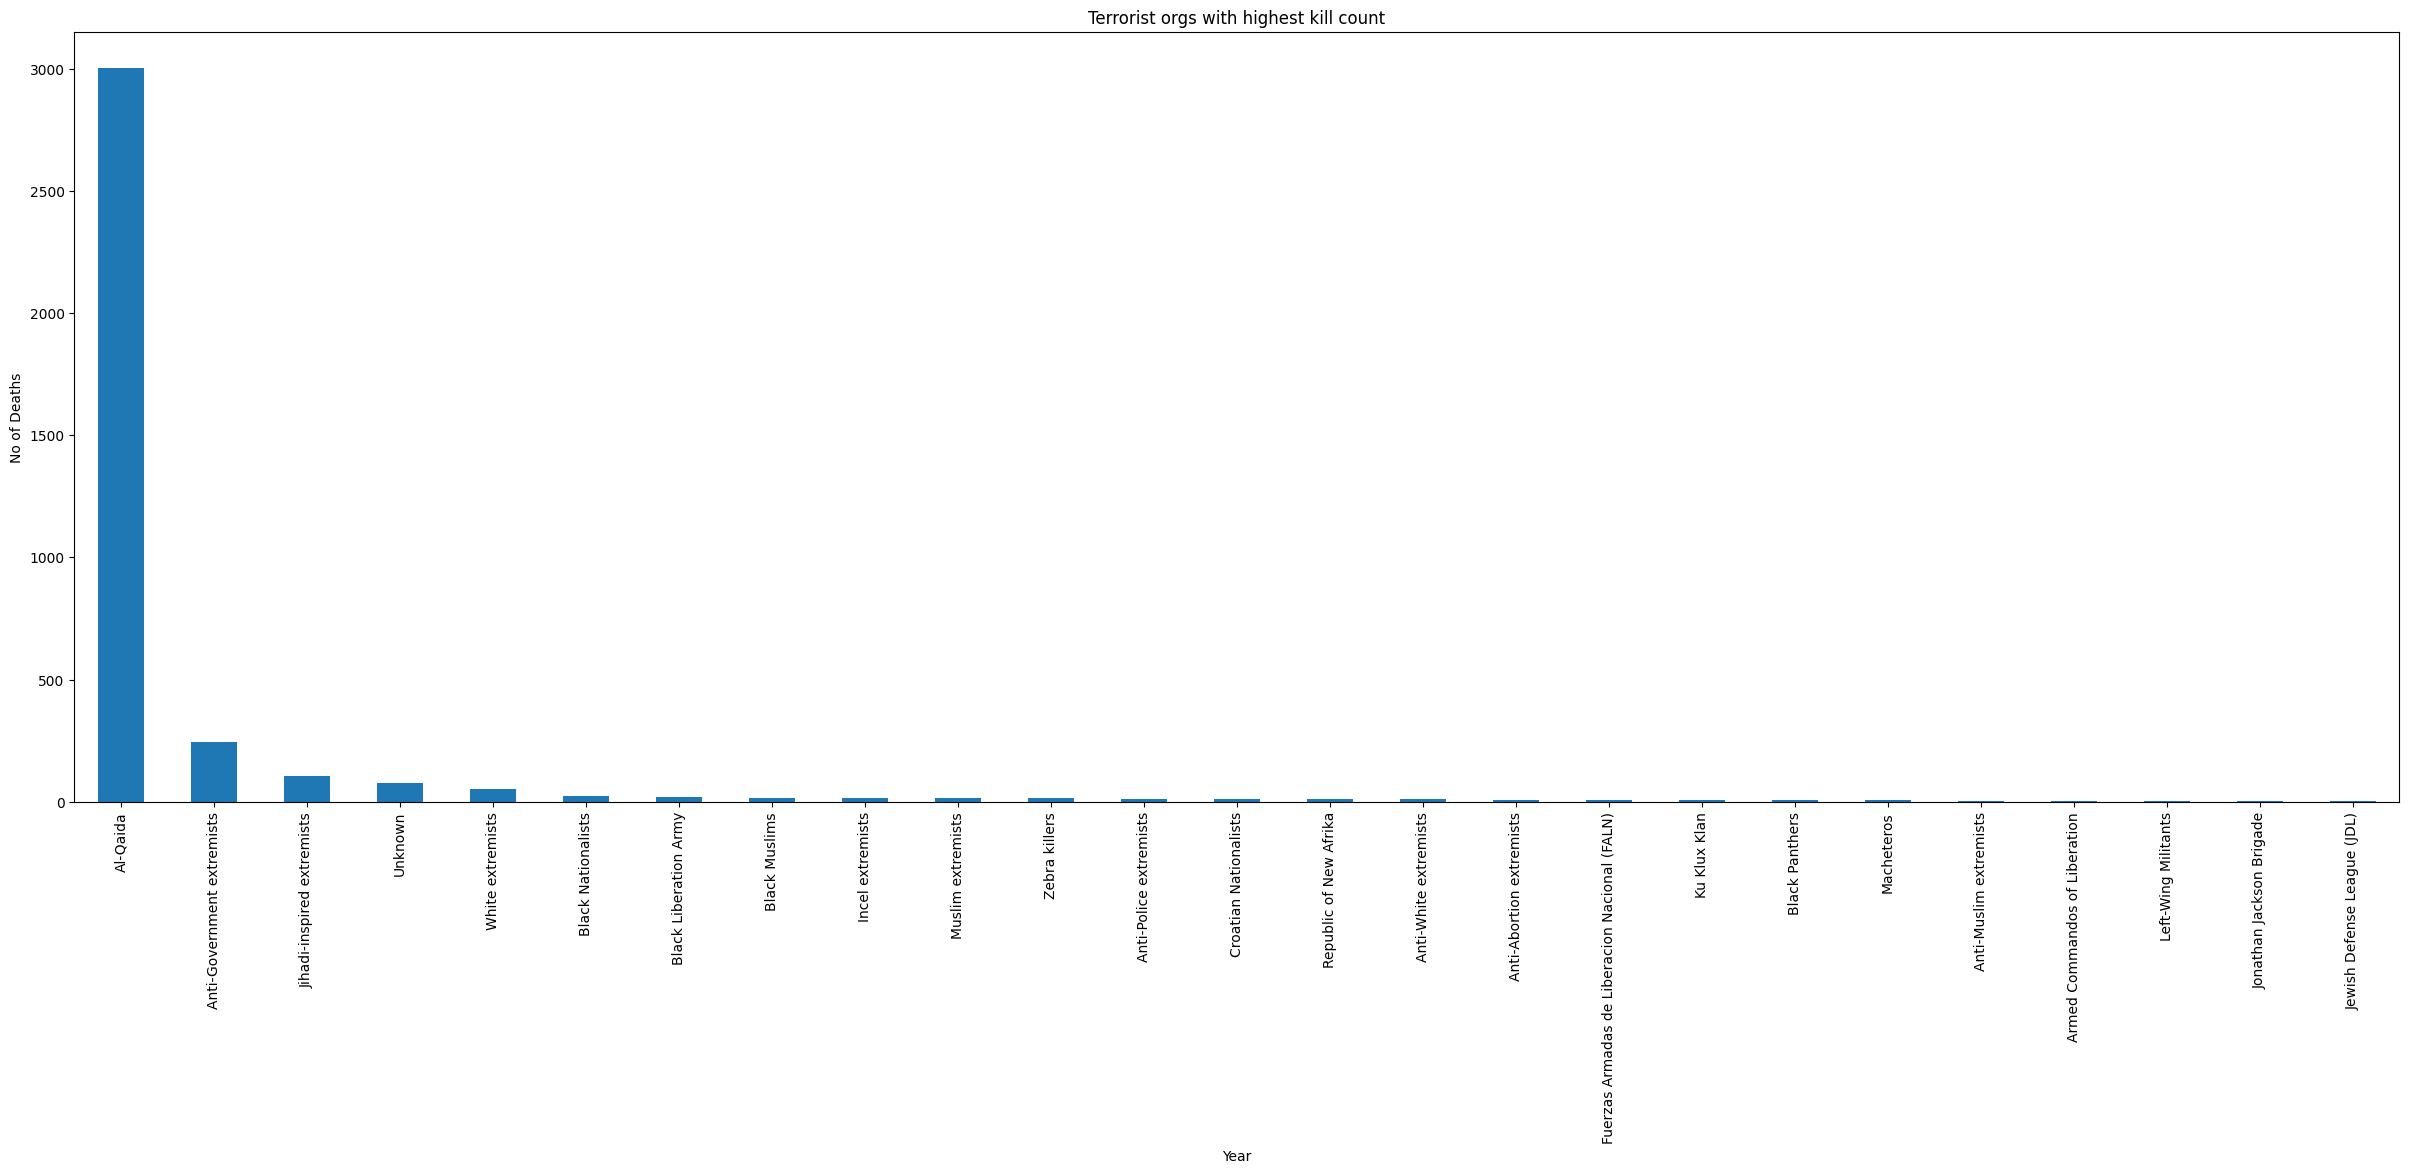

In [ ]:
US_attacks.groupby(['gname']).nkill.sum().sort_values(ascending=False).head(25).plot(xlabel='Year',ylabel='No of Deaths',title='Terrorist orgs with highest kill count',kind='bar',figsize=(30,10))

In [ ]:
df.loc[df.targtype1_txt=='Abortion Related','targsubtype1_txt'].unique()

array(['Clinics', 'Personnel'], dtype=object)

<Axes: title={'center': 'Abortion Related'}>

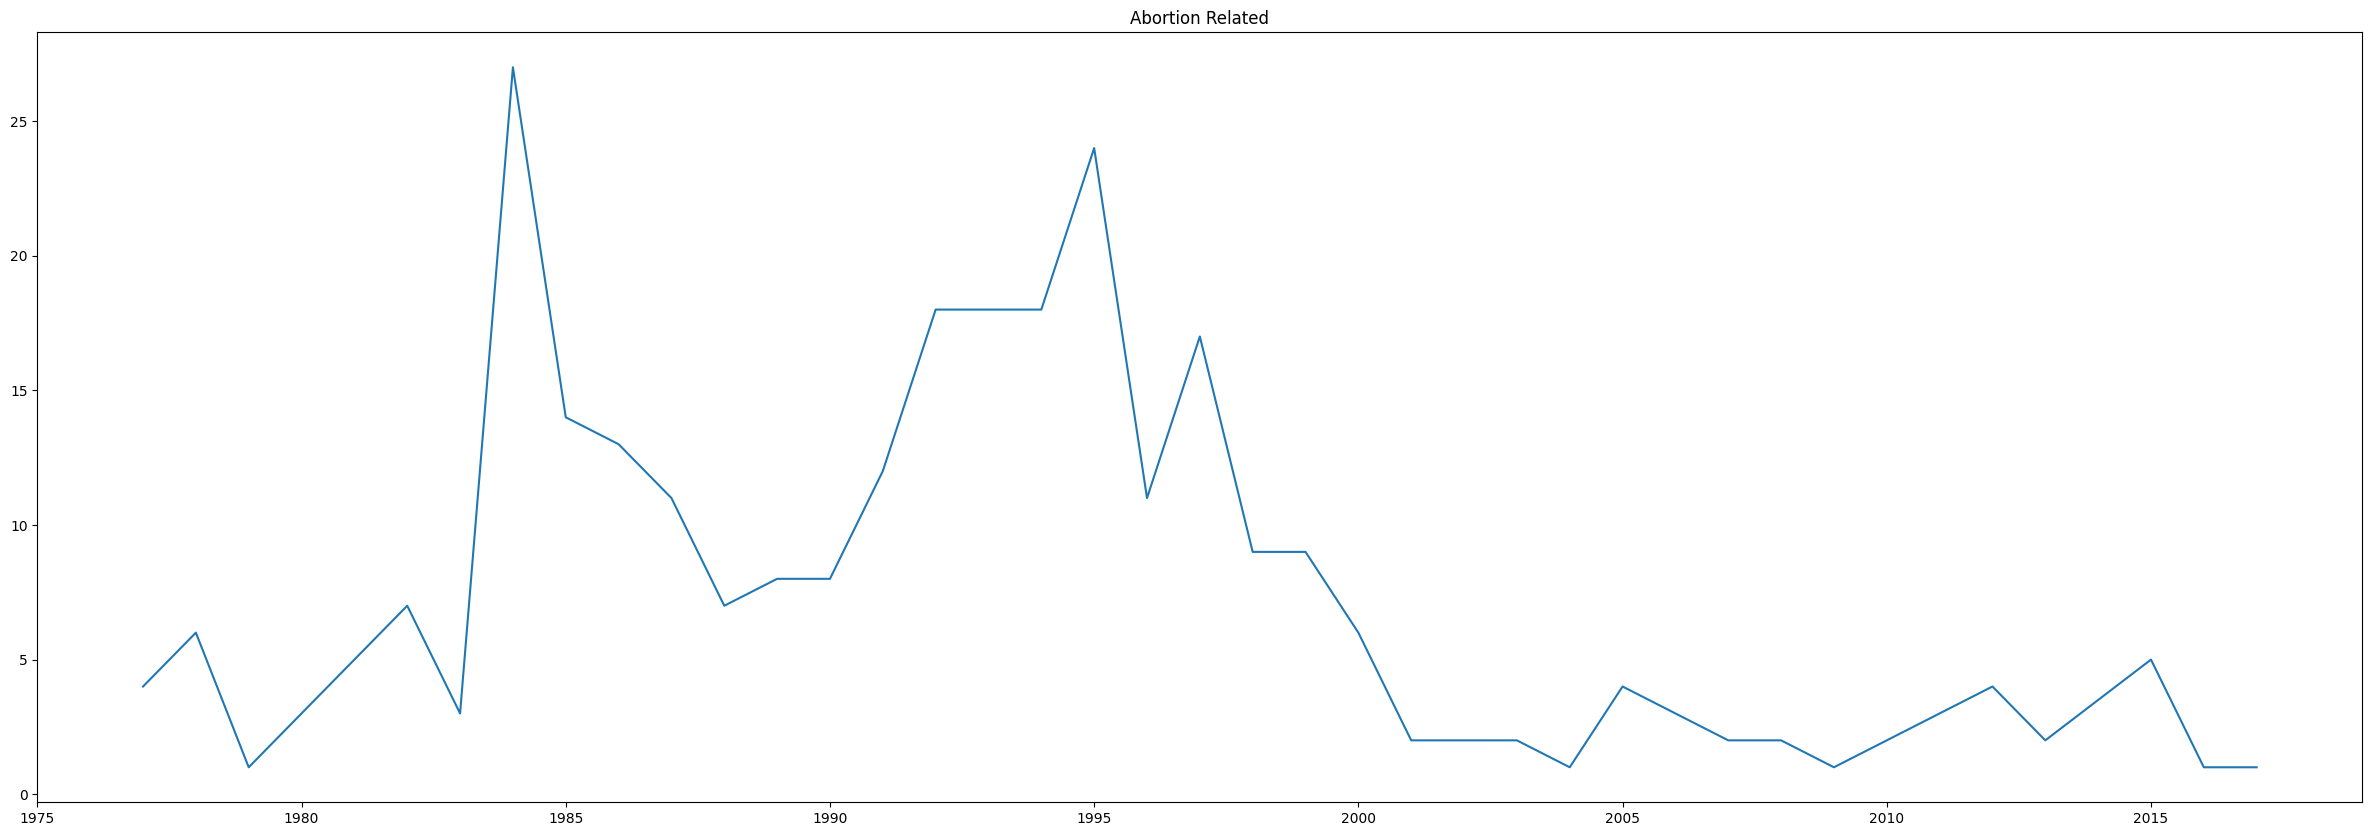

In [ ]:
abortion=df[(df.targtype1_txt=='Abortion Related')]
abortion.iyear.value_counts().sort_index().plot(figsize=(30,10),title='Abortion Related')

<Axes: title={'center': 'Abortion Related'}>

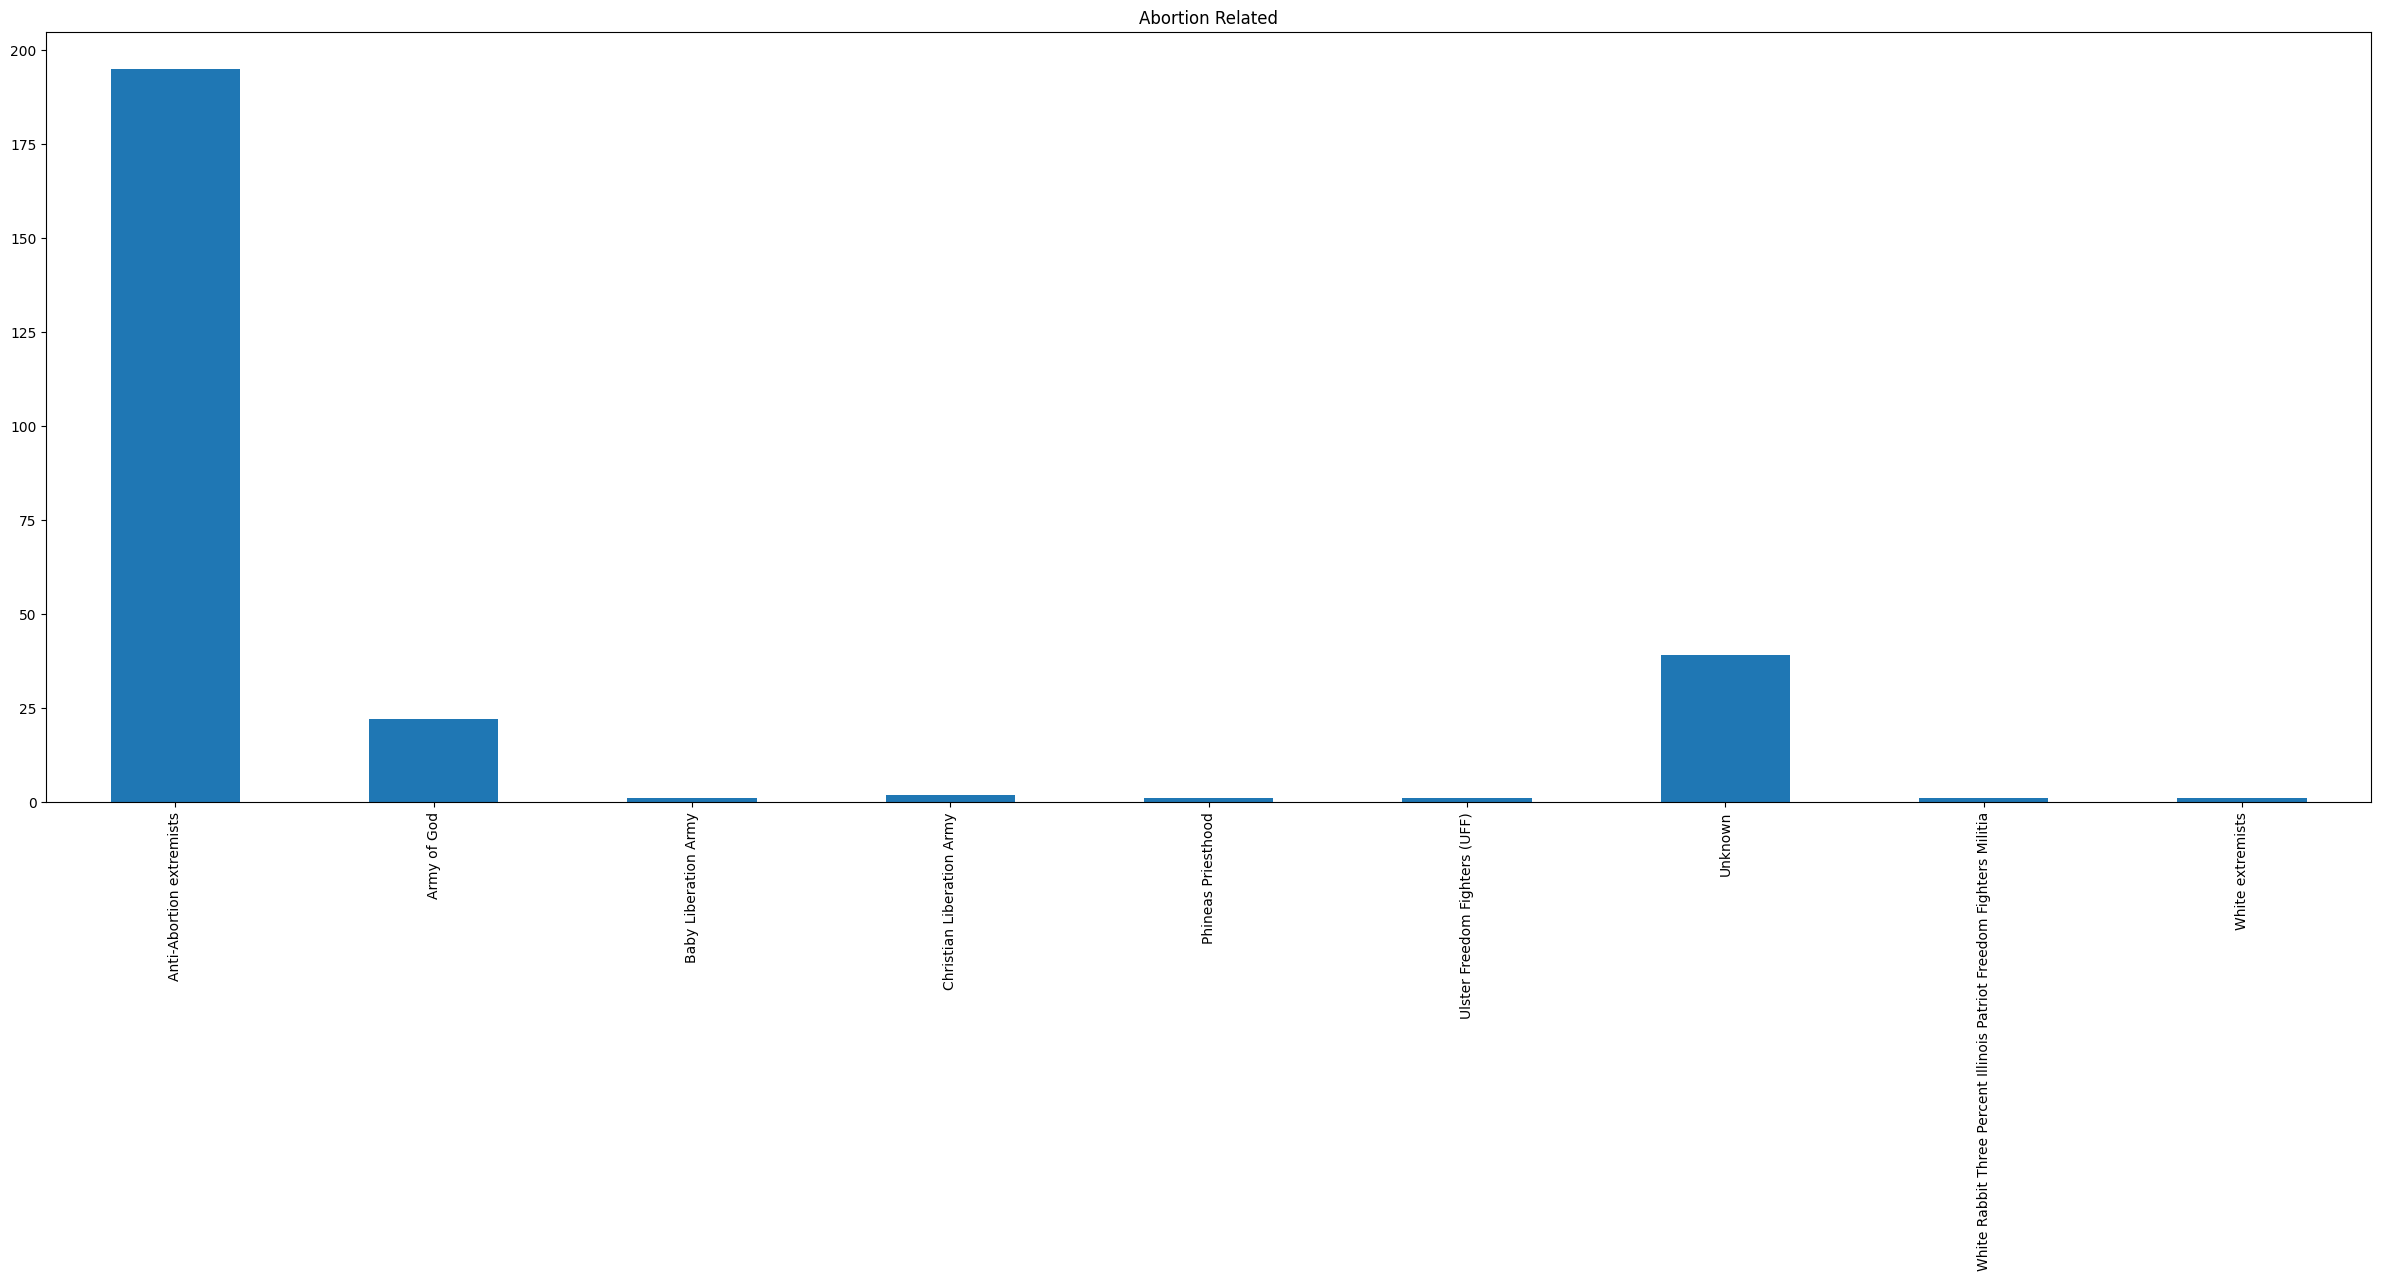

In [ ]:
abortion.gname.value_counts().sort_index().plot(figsize=(30,10),title='Abortion Related',kind='bar')

#Colombia

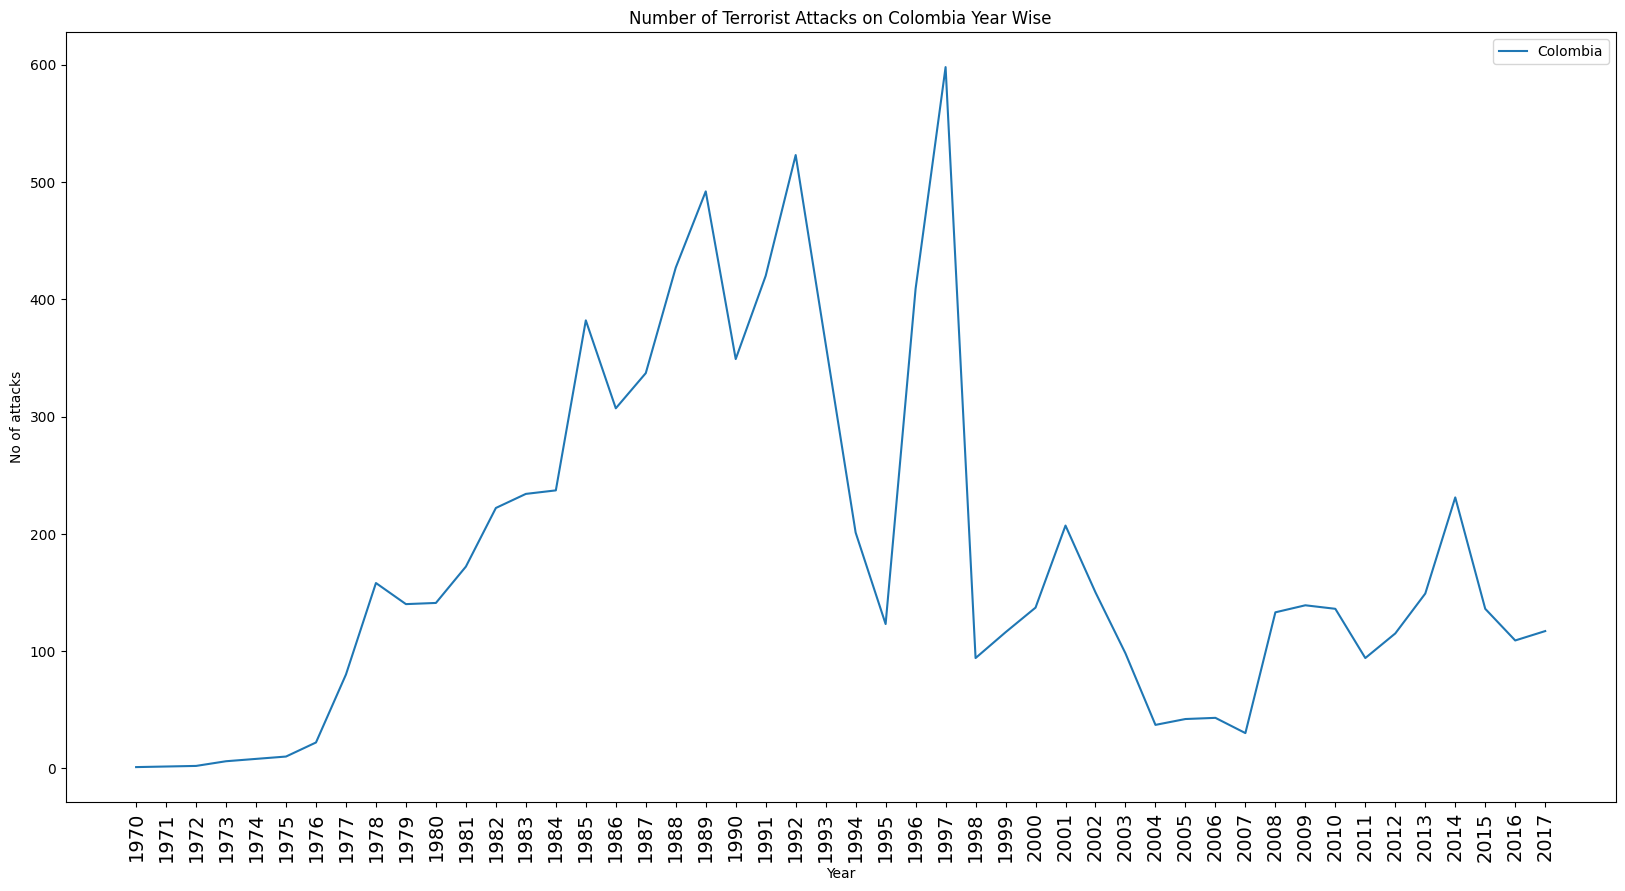

In [ ]:

col_attacks=df[(df.country_txt=='Colombia')]
col_attacks.sort_values(by='iyear')
col=col_attacks['iyear'].value_counts().sort_index().reset_index()
col.columns=['Year','Colombia']
col.plot(x='Year',y='Colombia',figsize=(20,10),title='Number of Terrorist Attacks on Colombia Year Wise',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
col = col.set_index('Year')


<Axes: title={'center': 'Deaths'}, xlabel='Year', ylabel='No of Deaths'>

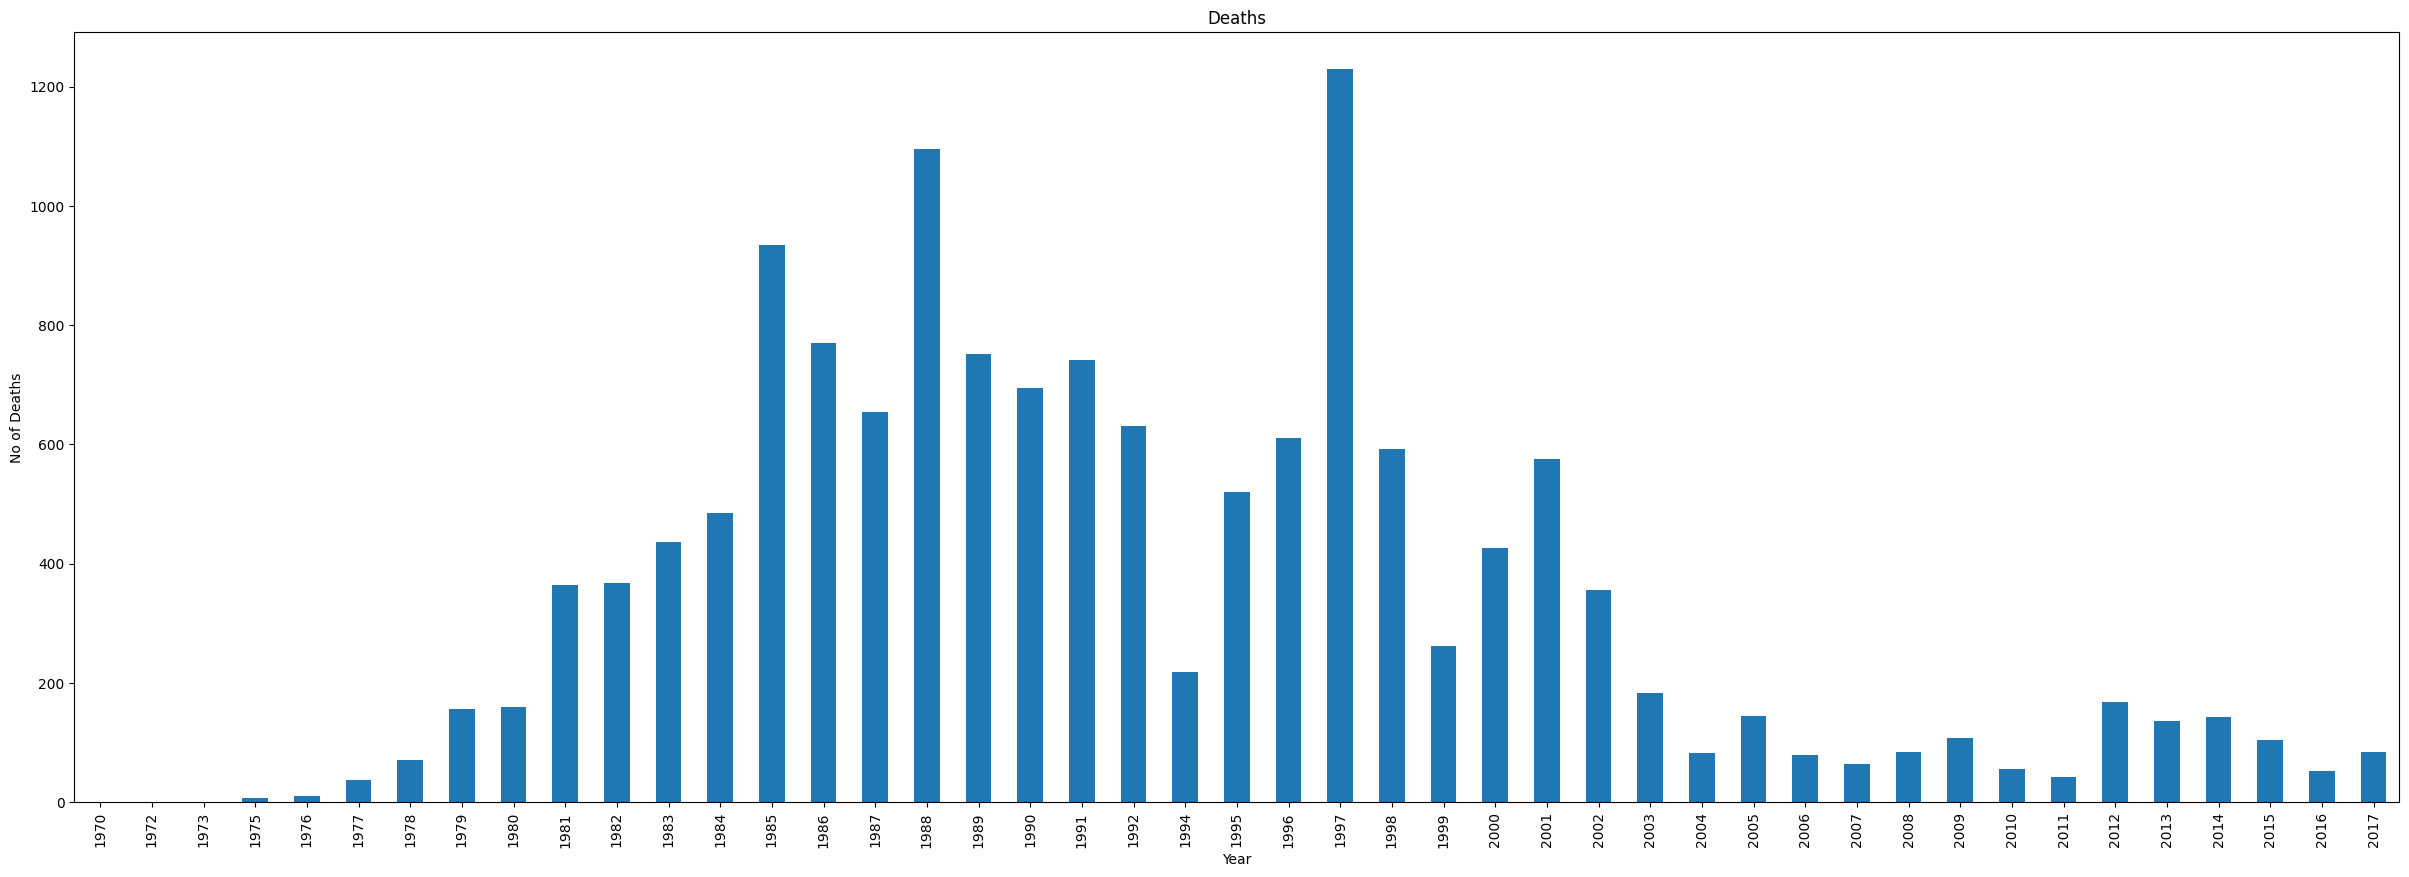

In [ ]:
col_attacks.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Deaths',kind='bar',figsize=(30,10))

In [ ]:
col_attacks.gname.unique()

array(['Unknown', 'National Liberation Army of Colombia (ELN)',
       'Popular Liberation Army (EPL)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Military Liberation Front of Colombia',
       'M-19 (Movement of April 19)', 'Revolutionary Workers Party',
       'Falange', 'Pedro Leon Arboleda (PLA)',
       'Popular Revolutionary Movement (Colombia)',
       'Red Army Faction (RAF)', 'Red Tribune', 'Abstentionist Brigades',
       'Unified Workers Command',
       'Supporters of presidential candidate Belisario Bet', 'Students',
       'Brigadas Rojas', 'Broad Commando of National Liberation',
       'Red Guard', 'Che Guevara Brigade',
       "Workers' Self-Defense Movement (MAO)",
       'American Anticommunist Association (AAA)',
       'Armed Forces of National Resistance (FARN)',
       "Policarpa Salauarpieta (Women's Command)", 'Colombian Guerrillas',
       'Revolutionary Organization of People in Arms (ORPA)',
       'Patriotic Liberation Front (FPL)', 'Le

<Axes: title={'center': 'Terrorist Orgs'}>

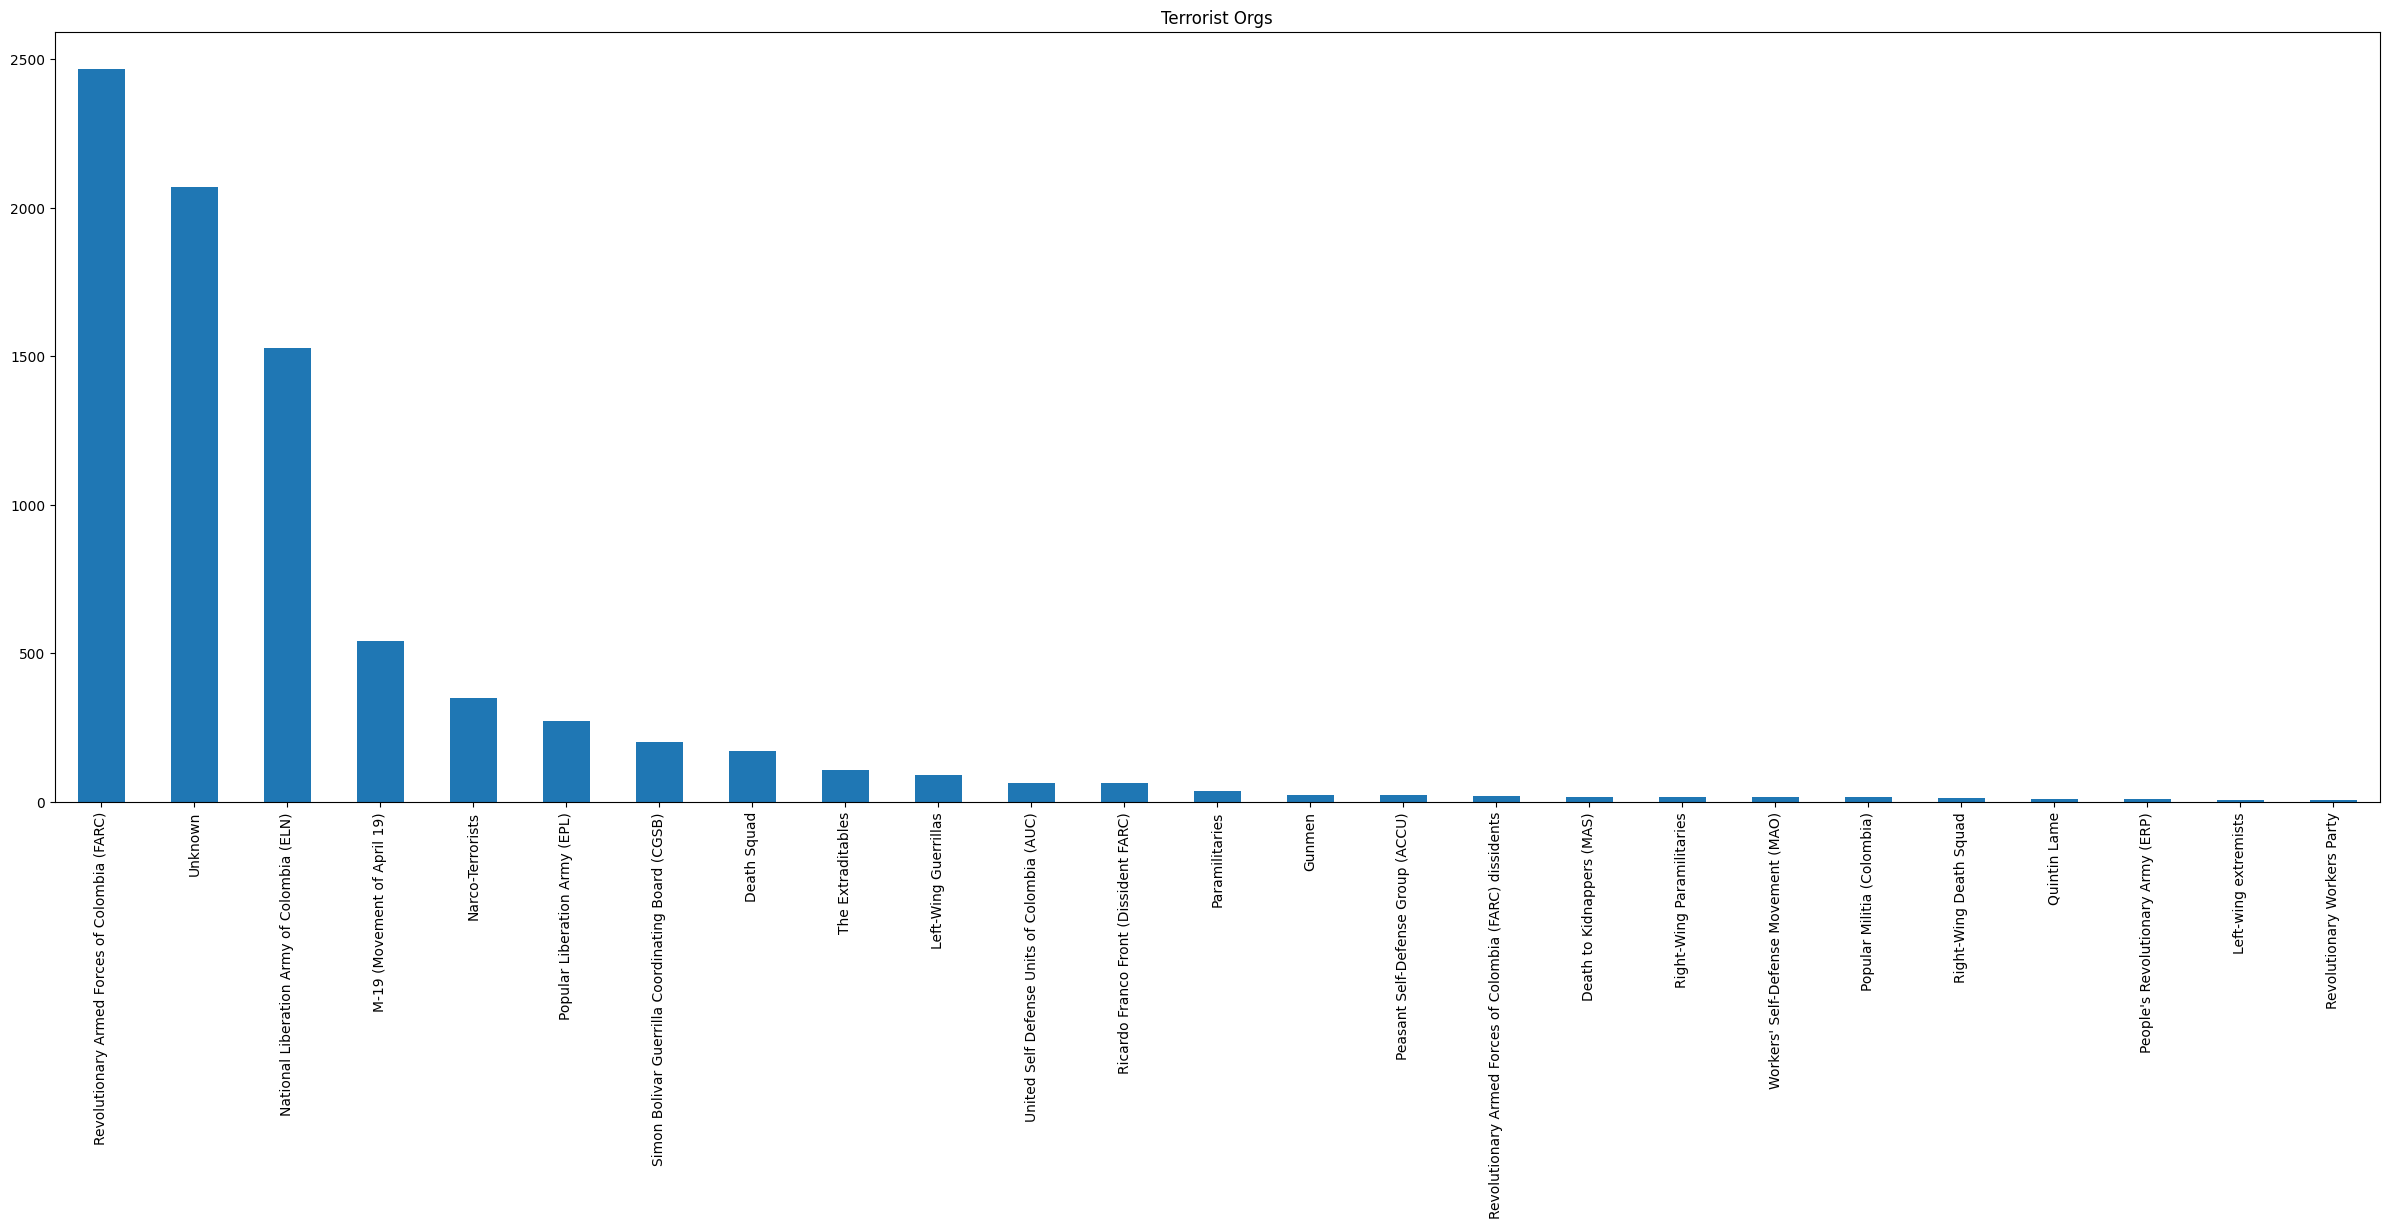

In [ ]:
col_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Targets'}>

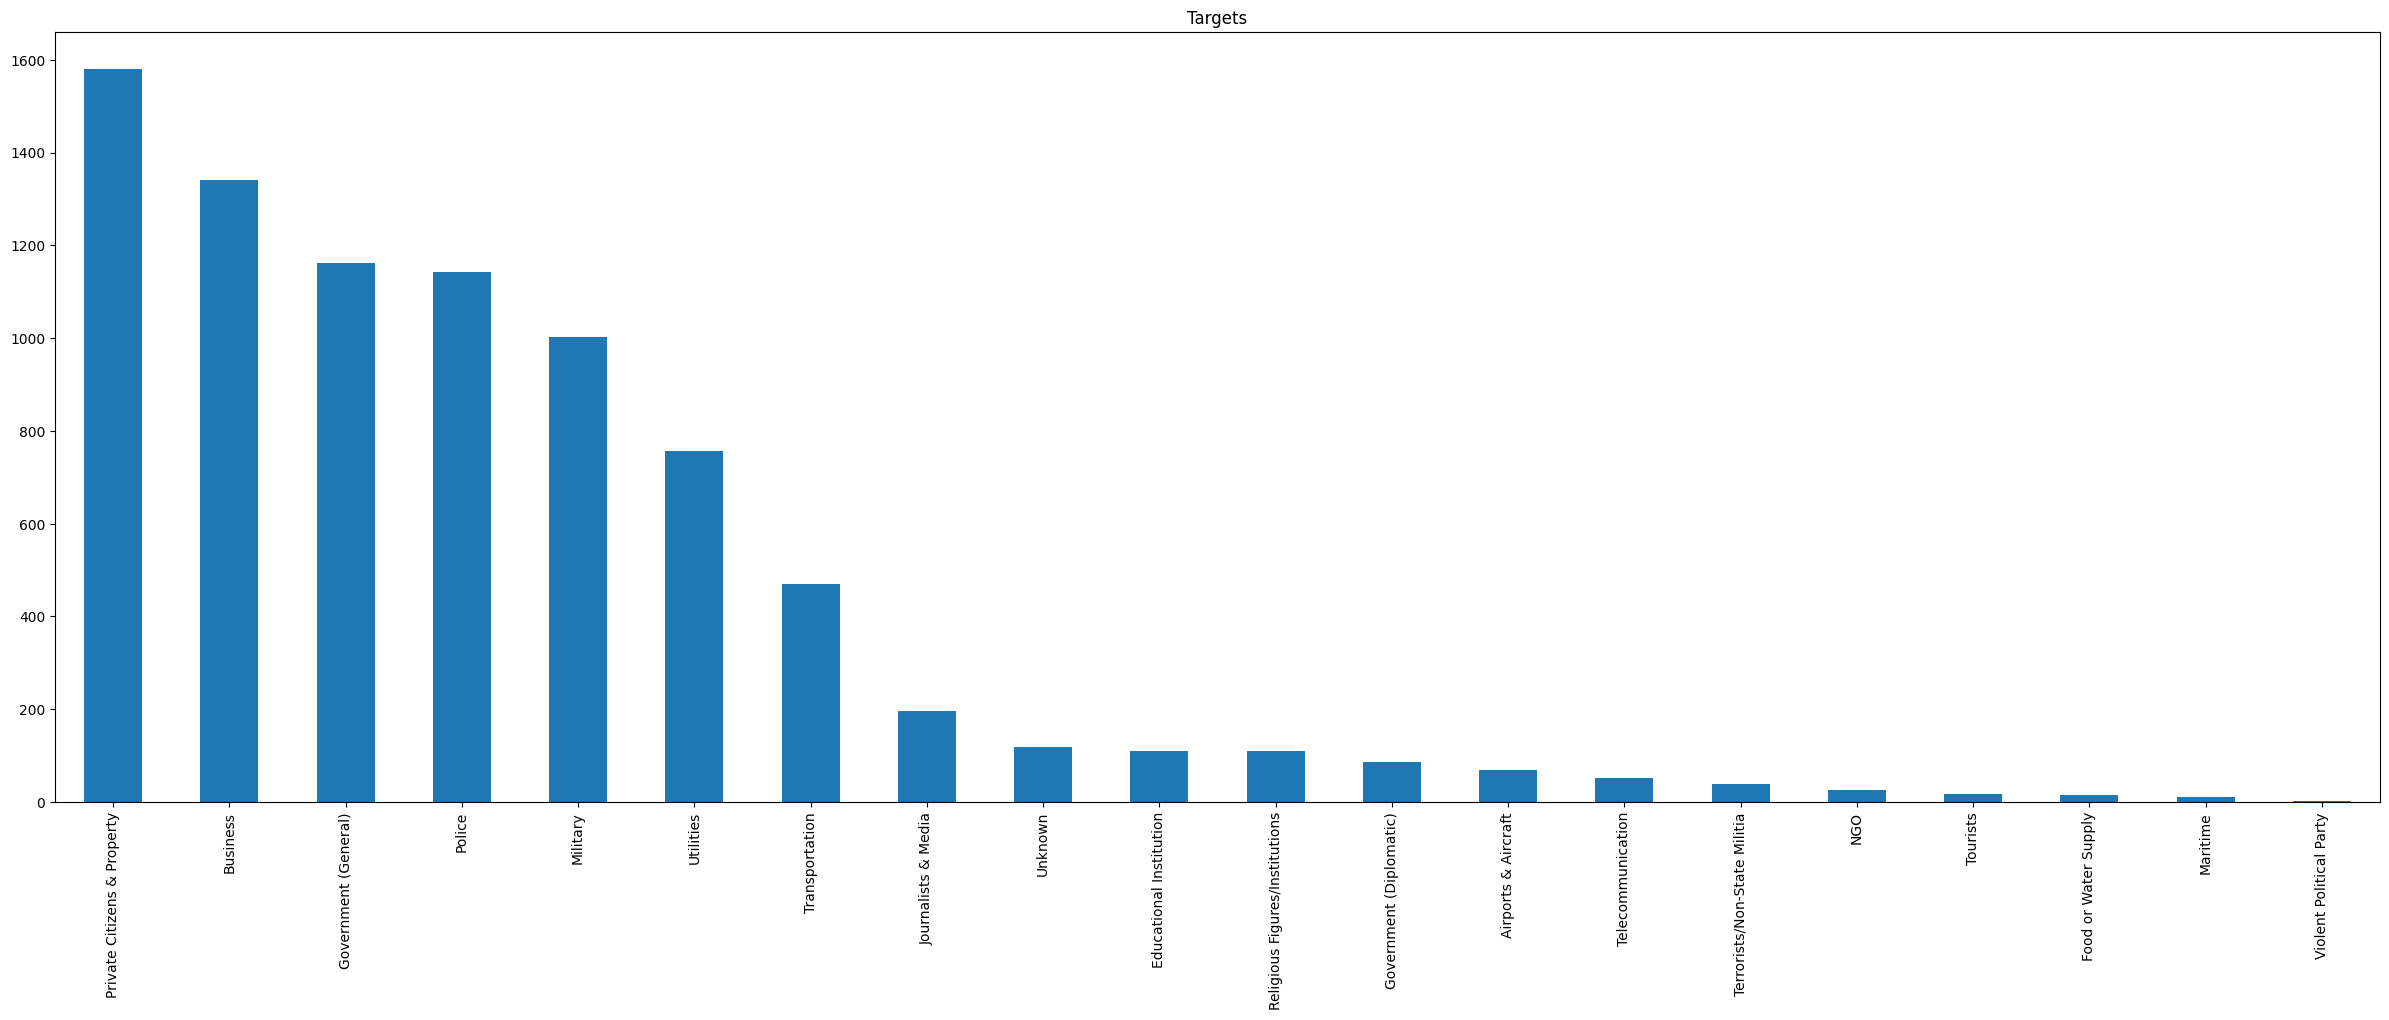

In [ ]:
col_attacks.targtype1_txt.value_counts().plot(figsize=(30,10),title='Targets',kind='bar')

<Axes: title={'center': 'Attack Type'}>

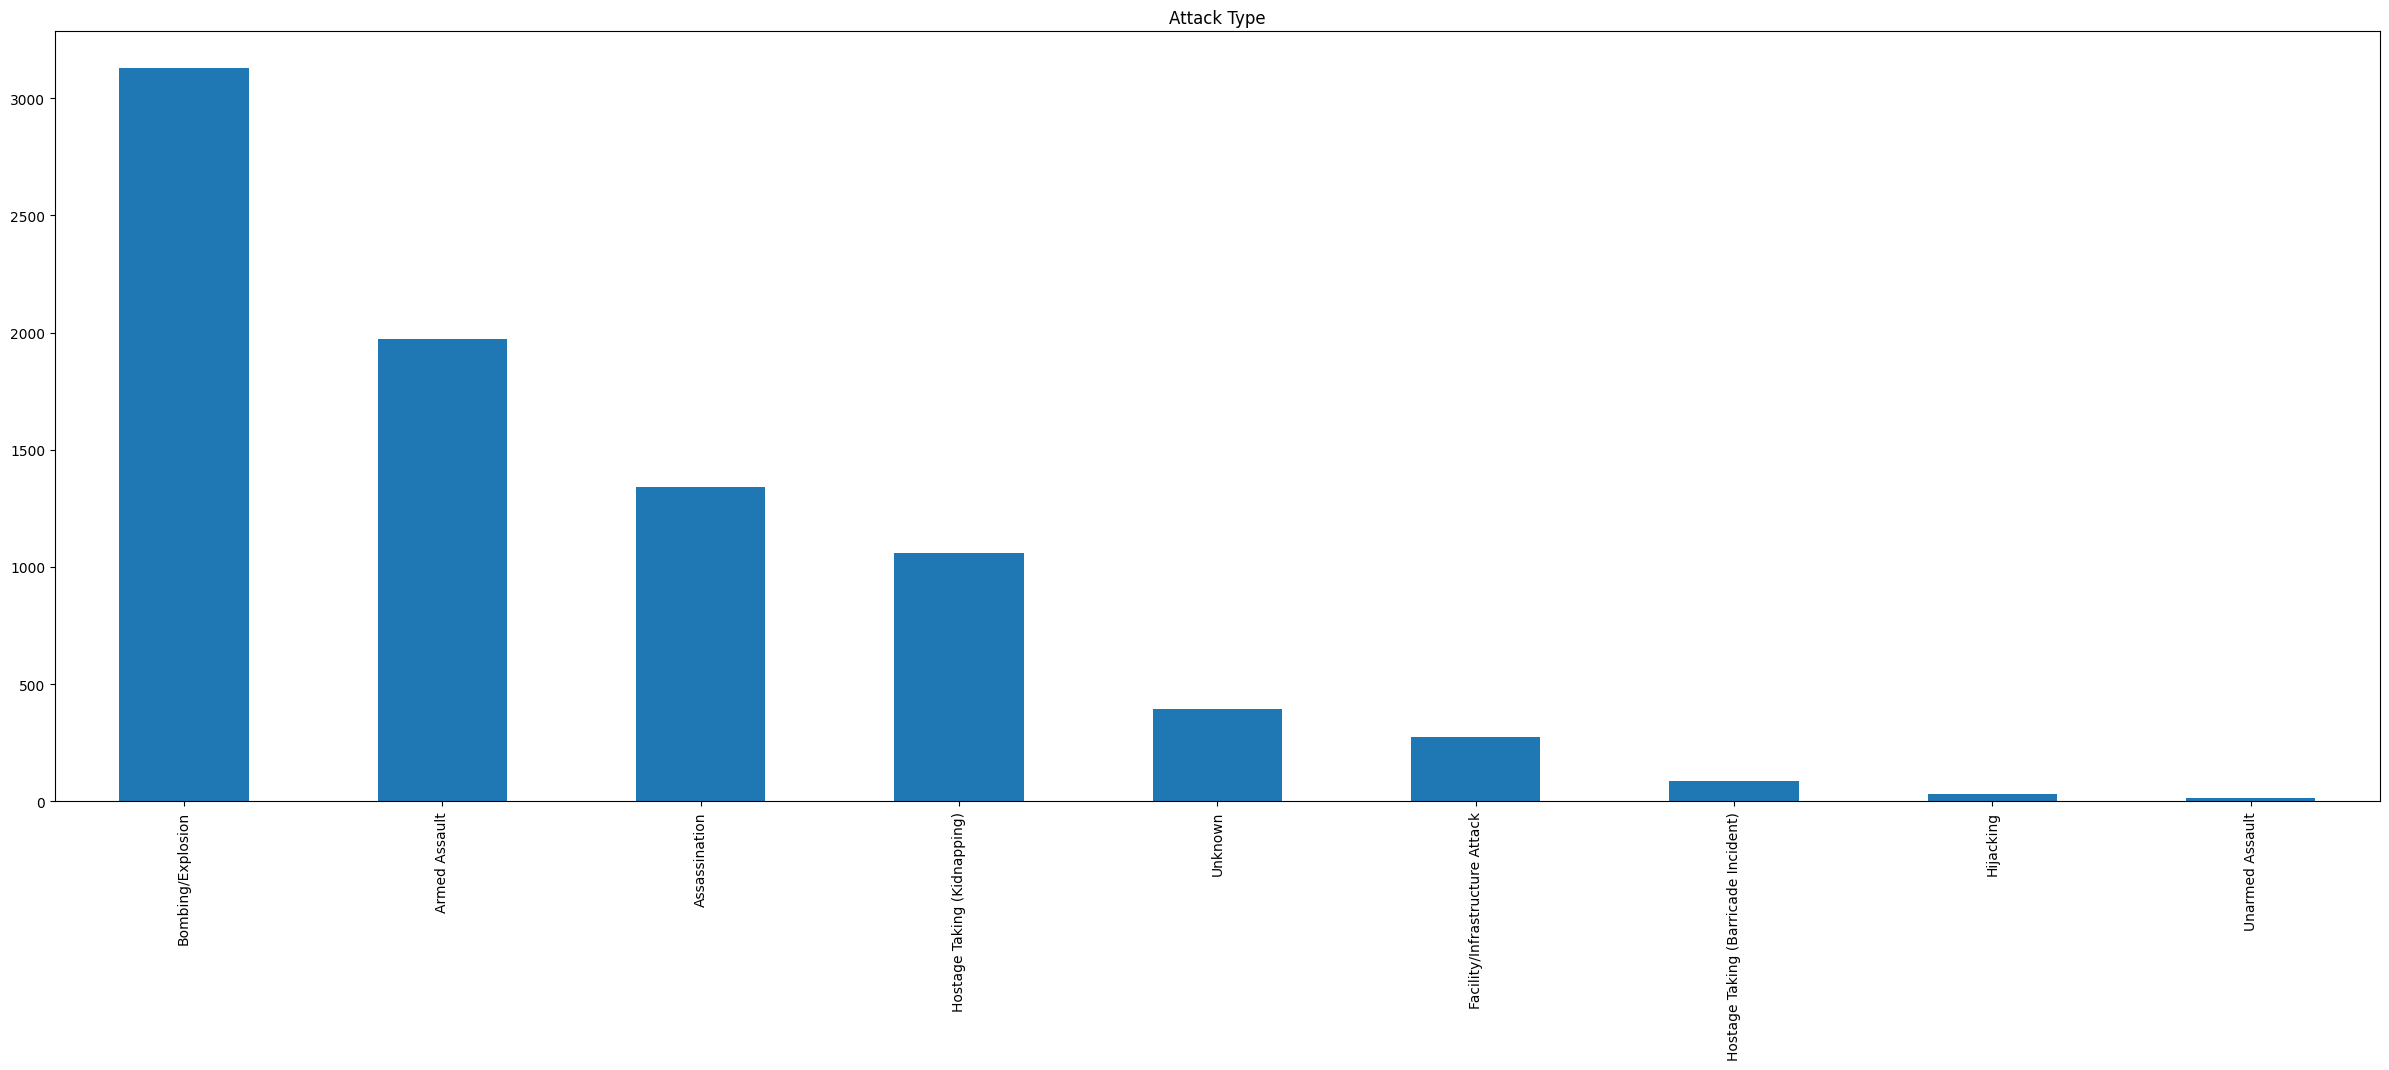

In [ ]:
col_attacks.attacktype1_txt.value_counts().plot(figsize=(30,10),title='Attack Type',kind='bar')

<Axes: title={'center': 'Weapons Used'}>

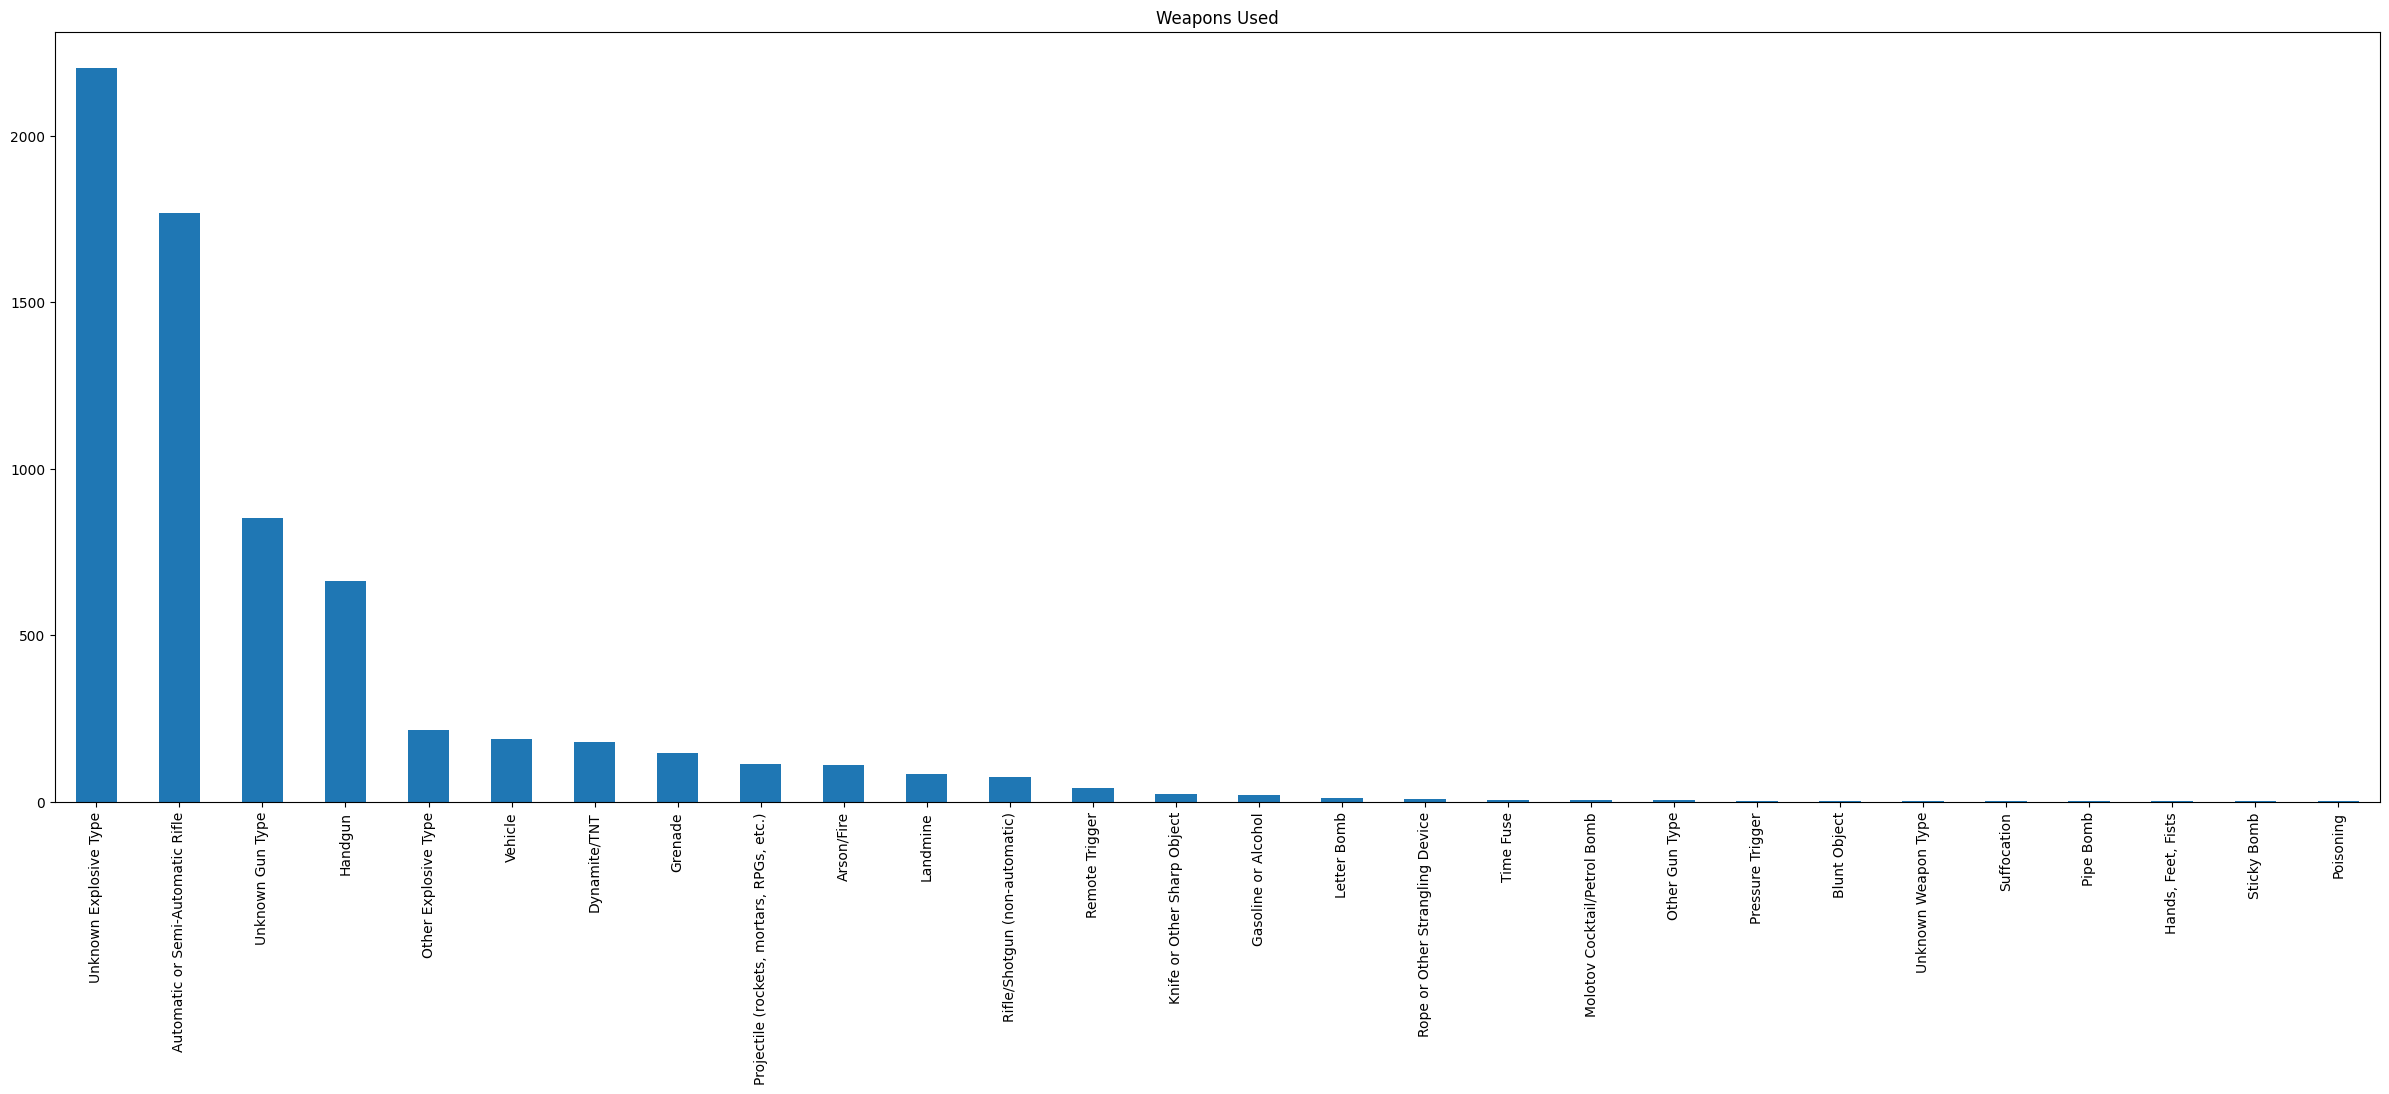

In [ ]:
col_attacks.weapsubtype1_txt.value_counts().plot(figsize=(30,10),title='Weapons Used',kind='bar')

<Axes: title={'center': 'Terrorist orgs with highest kill count'}>

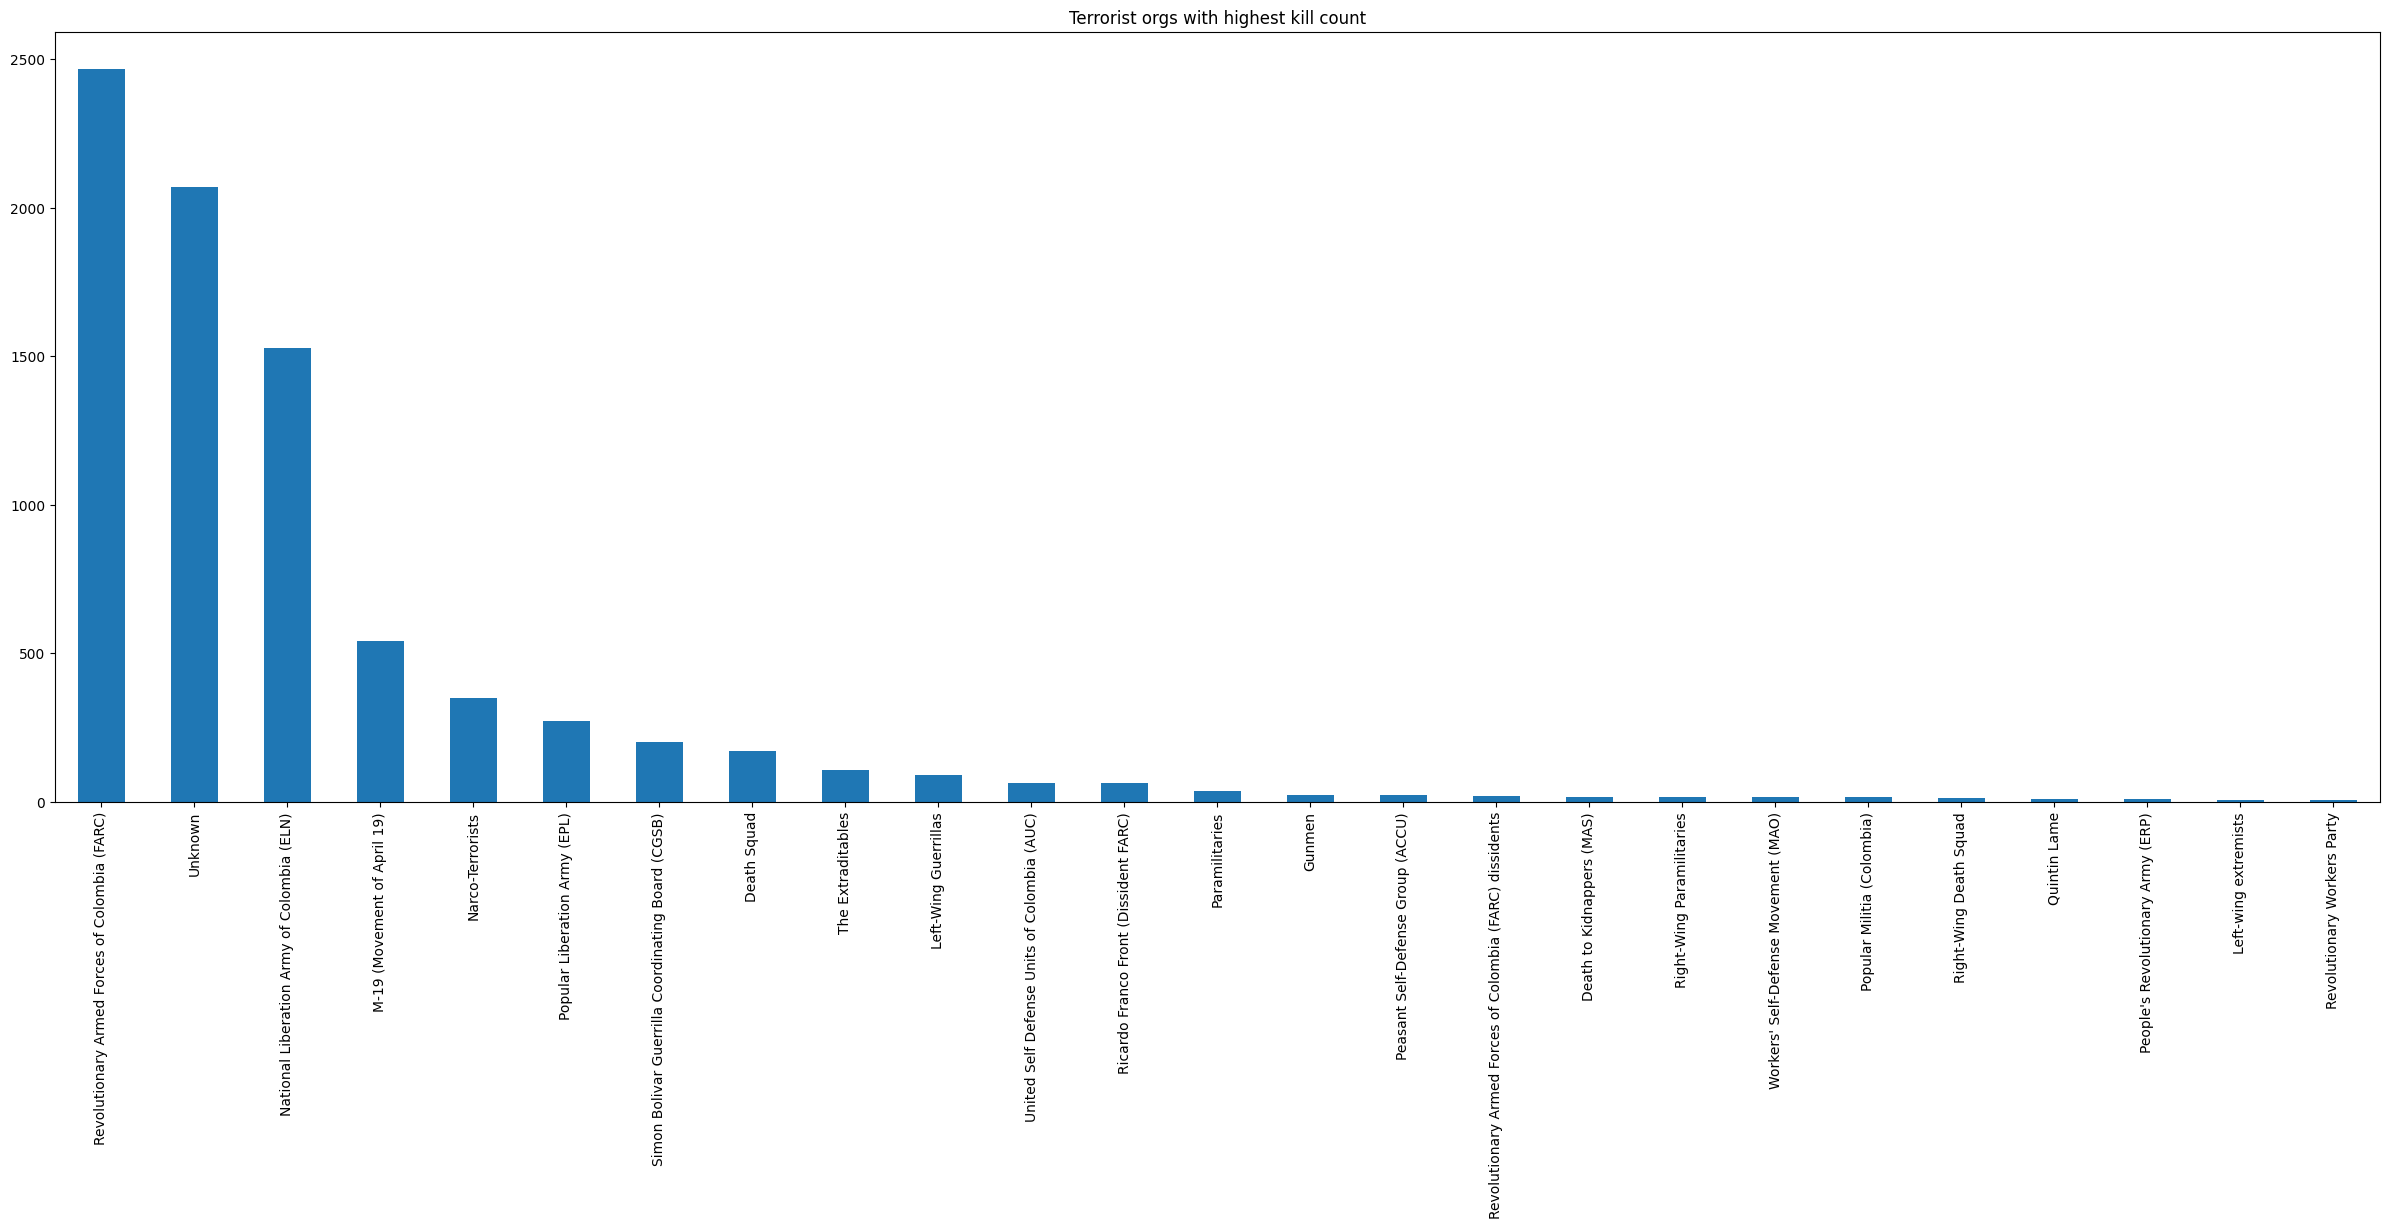

In [ ]:
col_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist orgs with highest kill count',kind='bar')

#**India**

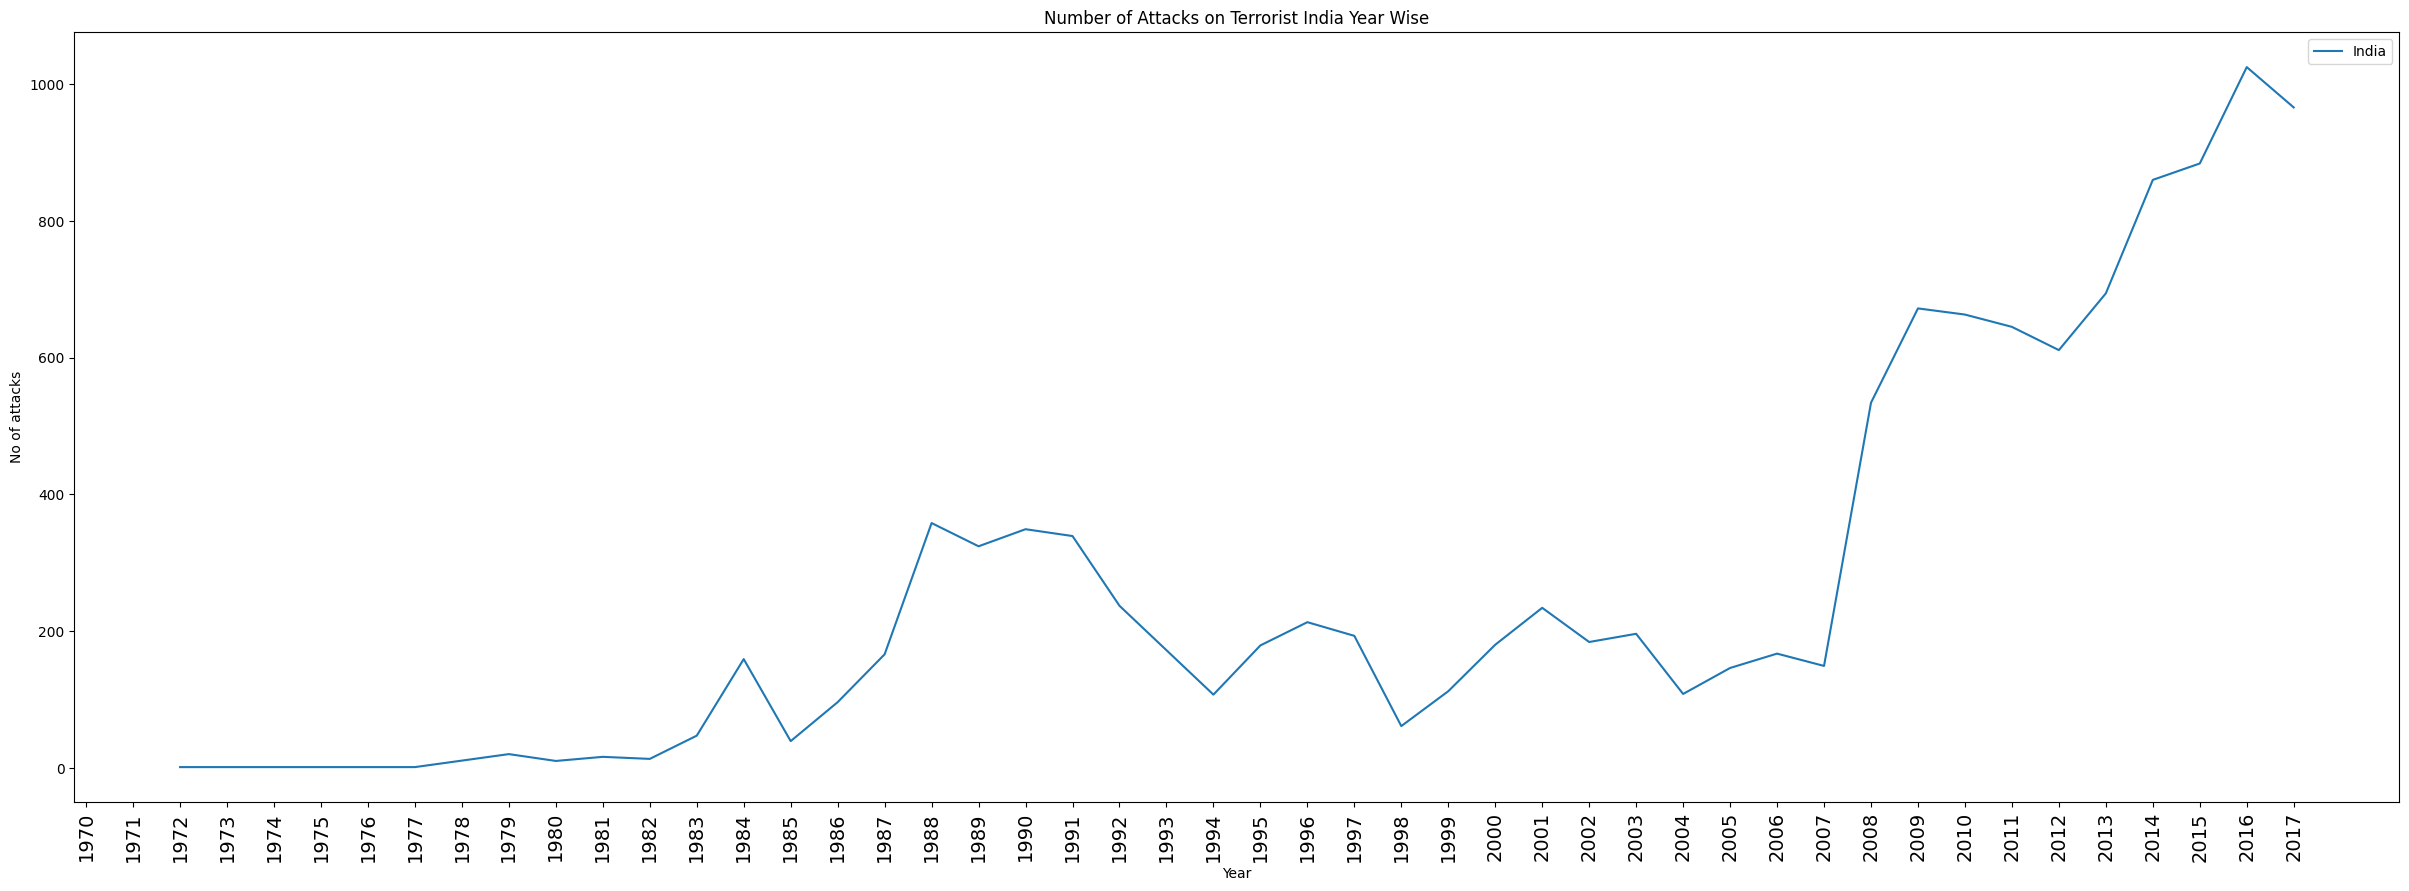

In [ ]:
Ind_attacks=df[(df.country_txt=='India')]
Ind_attacks.sort_values(by='iyear')
ind=Ind_attacks['iyear'].value_counts().sort_index().reset_index()
ind.columns=['Year','India']
ind.plot(x='Year',y='India',figsize=(30,10),title='Number of Attacks on Terrorist India Year Wise',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
ind = ind.set_index('Year')



In [ ]:
unique_values = Ind_attacks['provstate'].unique()
for value in unique_values:
    print(value)

Delhi
Bihar
Maharashtra
Assam
Manipur
Mizoram
Andhra Pradesh
Unknown
Jharkhand
Tamil Nadu
Uttar Pradesh
West Bengal
Nagaland
Gujarat
Chandigarh
Rajasthan
Punjab
Chhattisgarh
Tripura
Haryana
Jammu and Kashmir
Himachal Pradesh
Karnataka
Uttaranchal
Madhya Pradesh
Orissa
Kerala
Odisha
Meghalaya
Sikkim
Goa
Andhra pradesh
Arunachal Pradesh
Puducherry
Telangana


<Axes: title={'center': 'Deaths'}, xlabel='Year', ylabel='No of Deaths'>

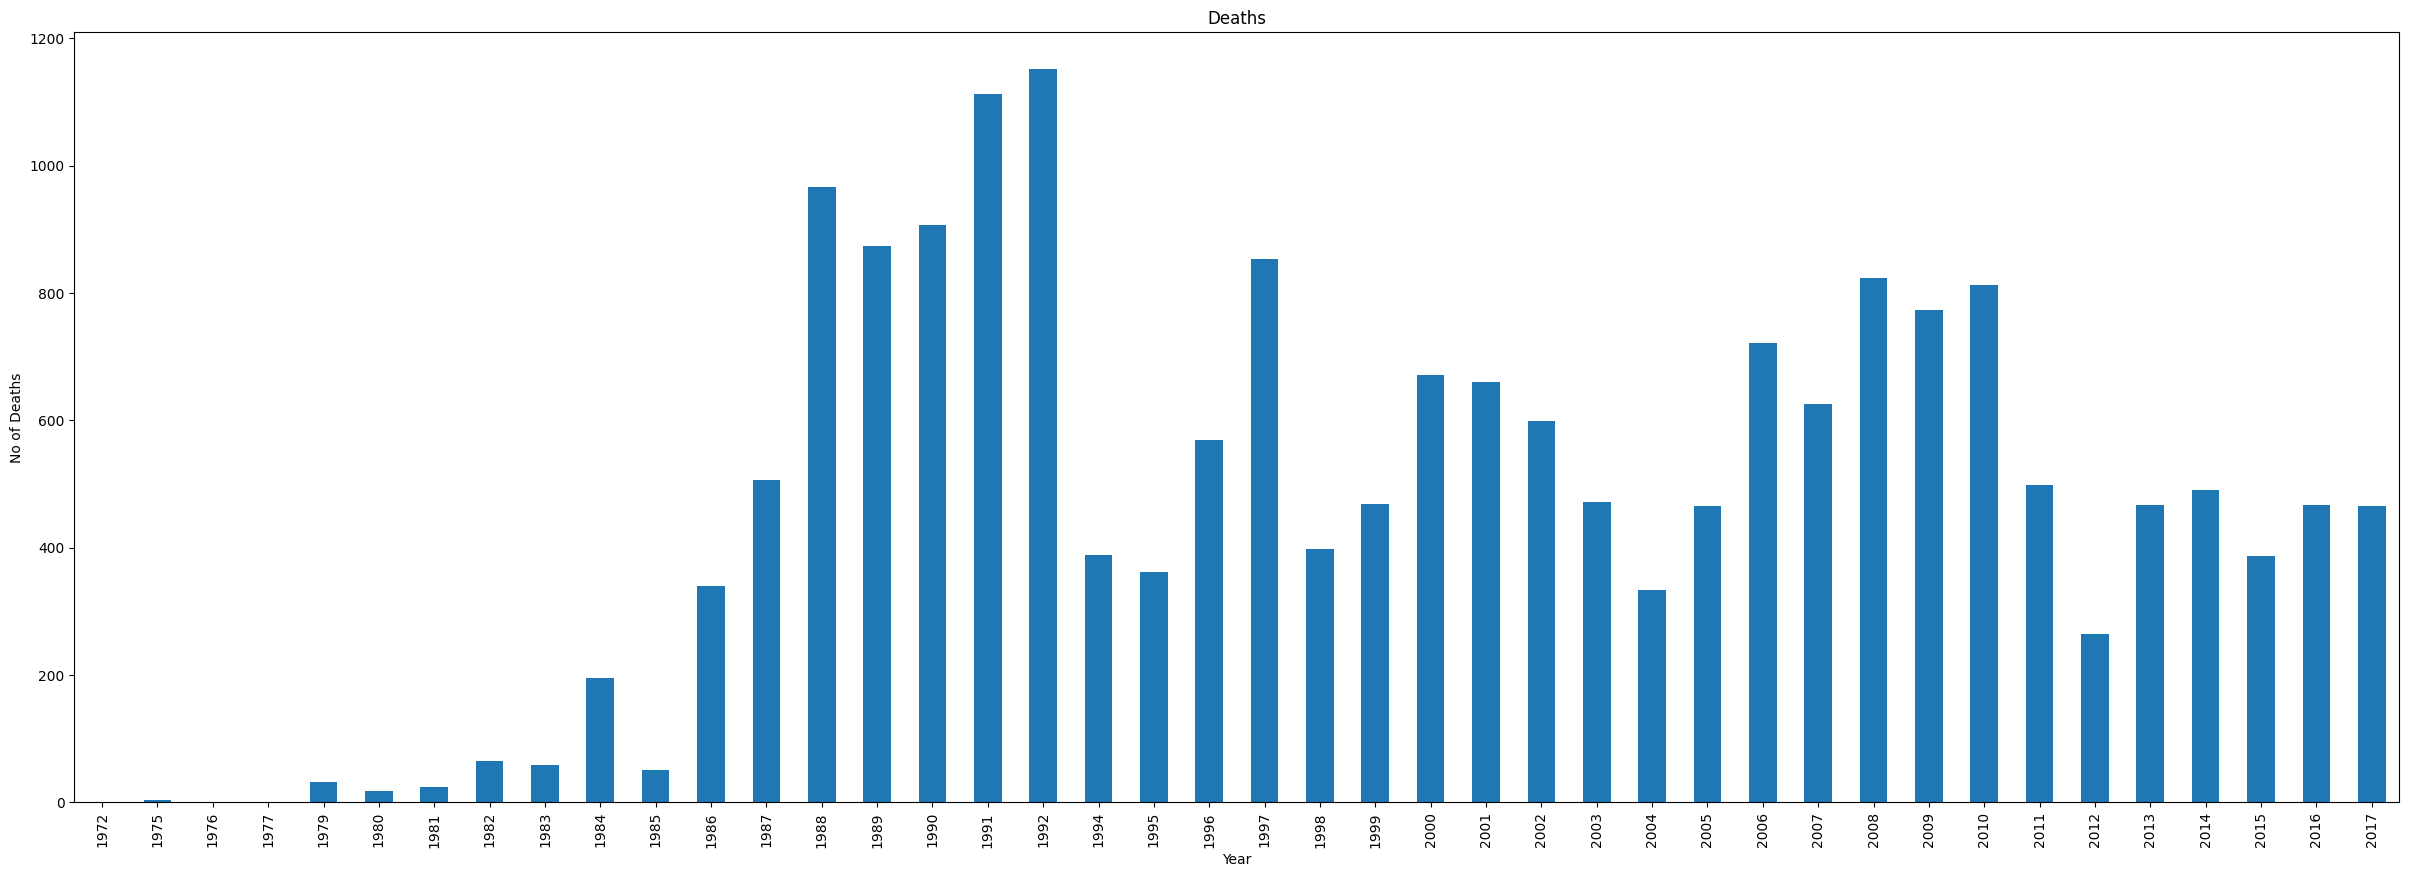

In [ ]:
Ind_attacks.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Deaths',kind='bar',figsize=(30,10))

<Axes: title={'center': 'Targets'}>

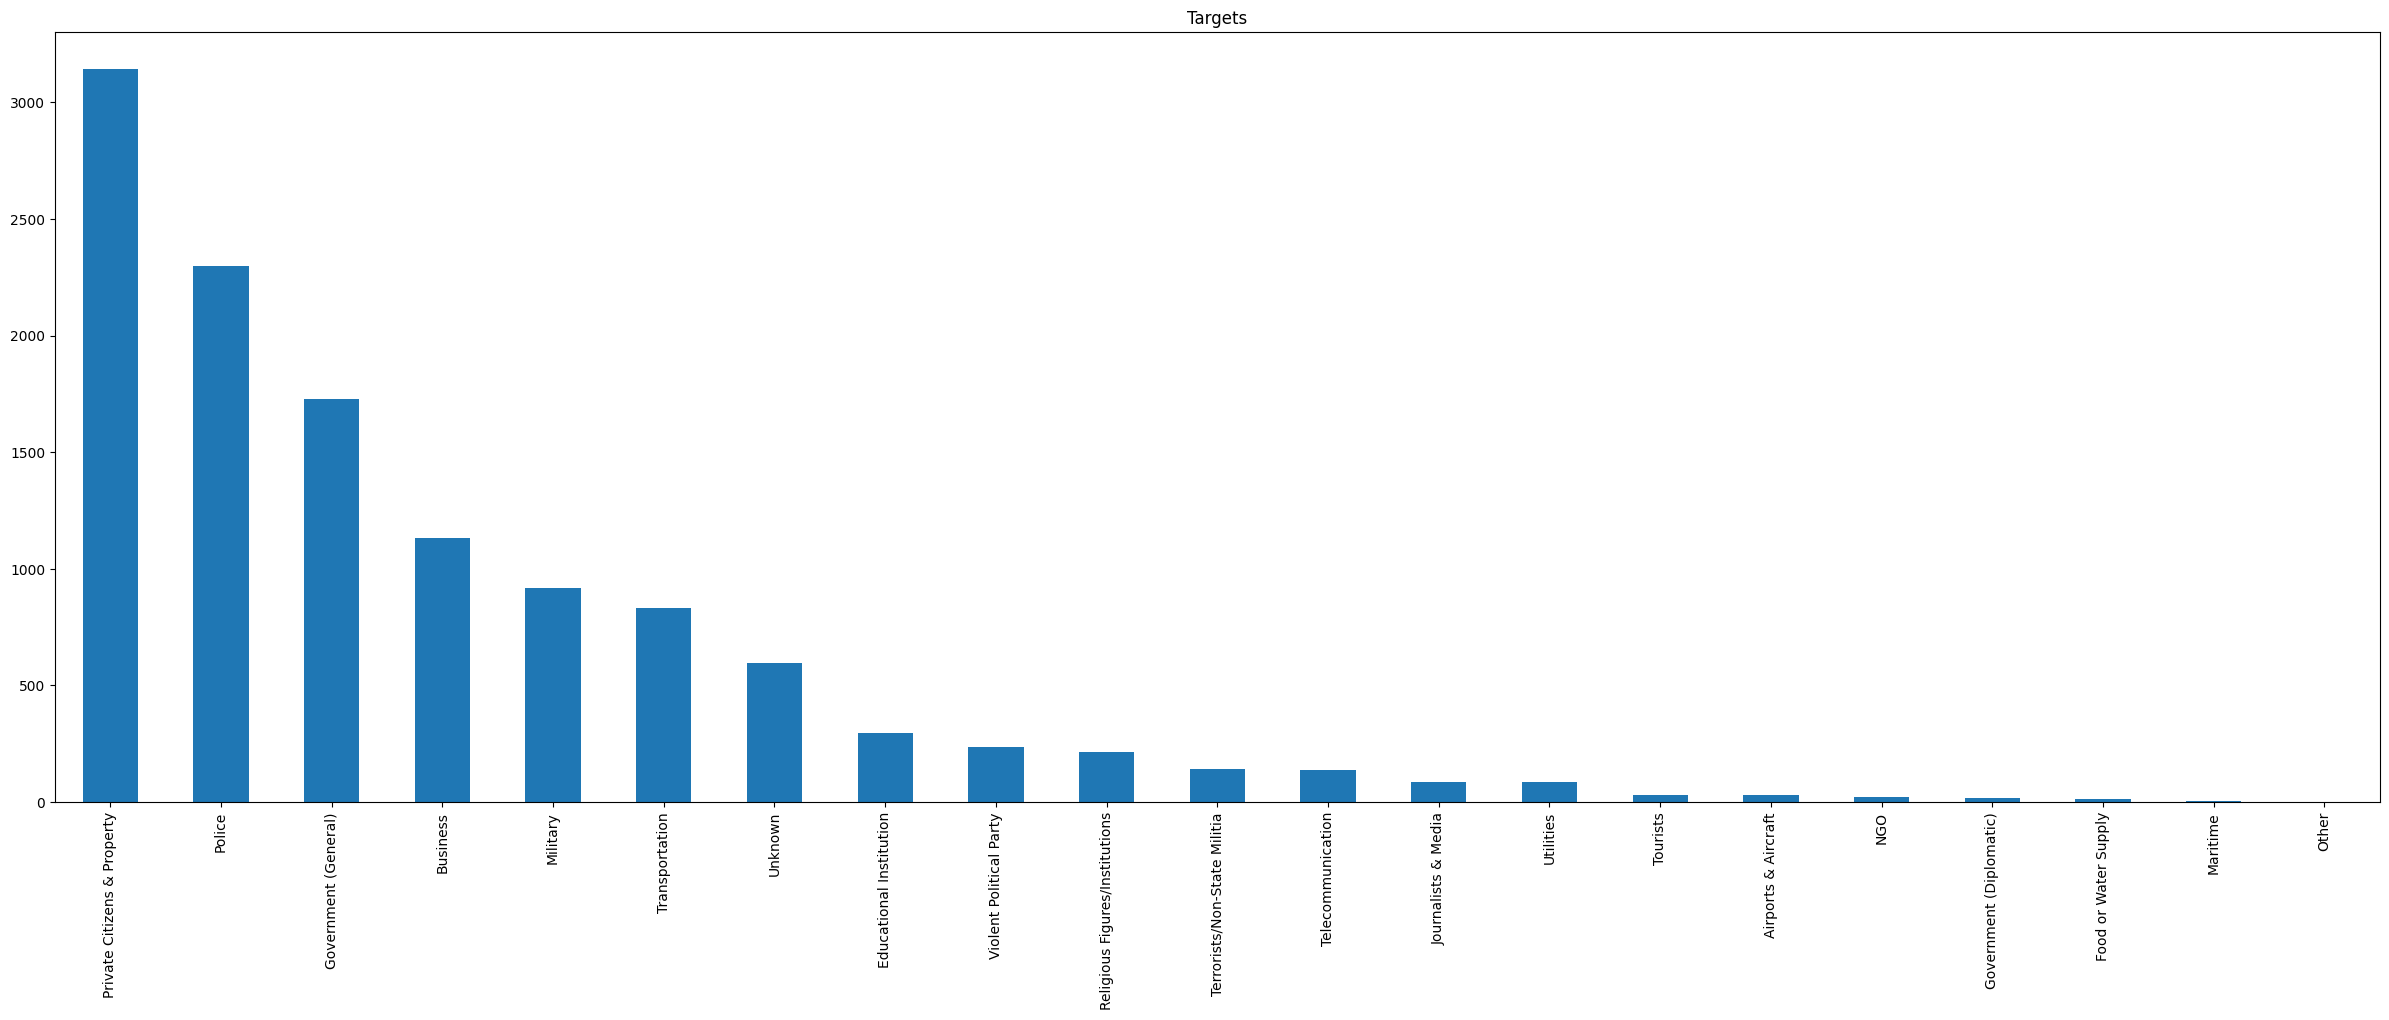

In [ ]:
Ind_attacks.targtype1_txt.value_counts().plot(kind='bar',figsize=(30,10),title='Targets')

In [ ]:
Ind_attacks['provstate'] = Ind_attacks['provstate'].replace('Andhra pradesh','Andhra Pradesh')
Ind_attacks['provstate'] = Ind_attacks['provstate'].replace('Orissa','Odisha')

<ipython-input-40-96421203abcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ind_attacks['provstate'] = Ind_attacks['provstate'].replace('Andhra pradesh','Andhra Pradesh')
<ipython-input-40-96421203abcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ind_attacks['provstate'] = Ind_attacks['provstate'].replace('Orissa','Odisha')


<Axes: title={'center': 'States'}>

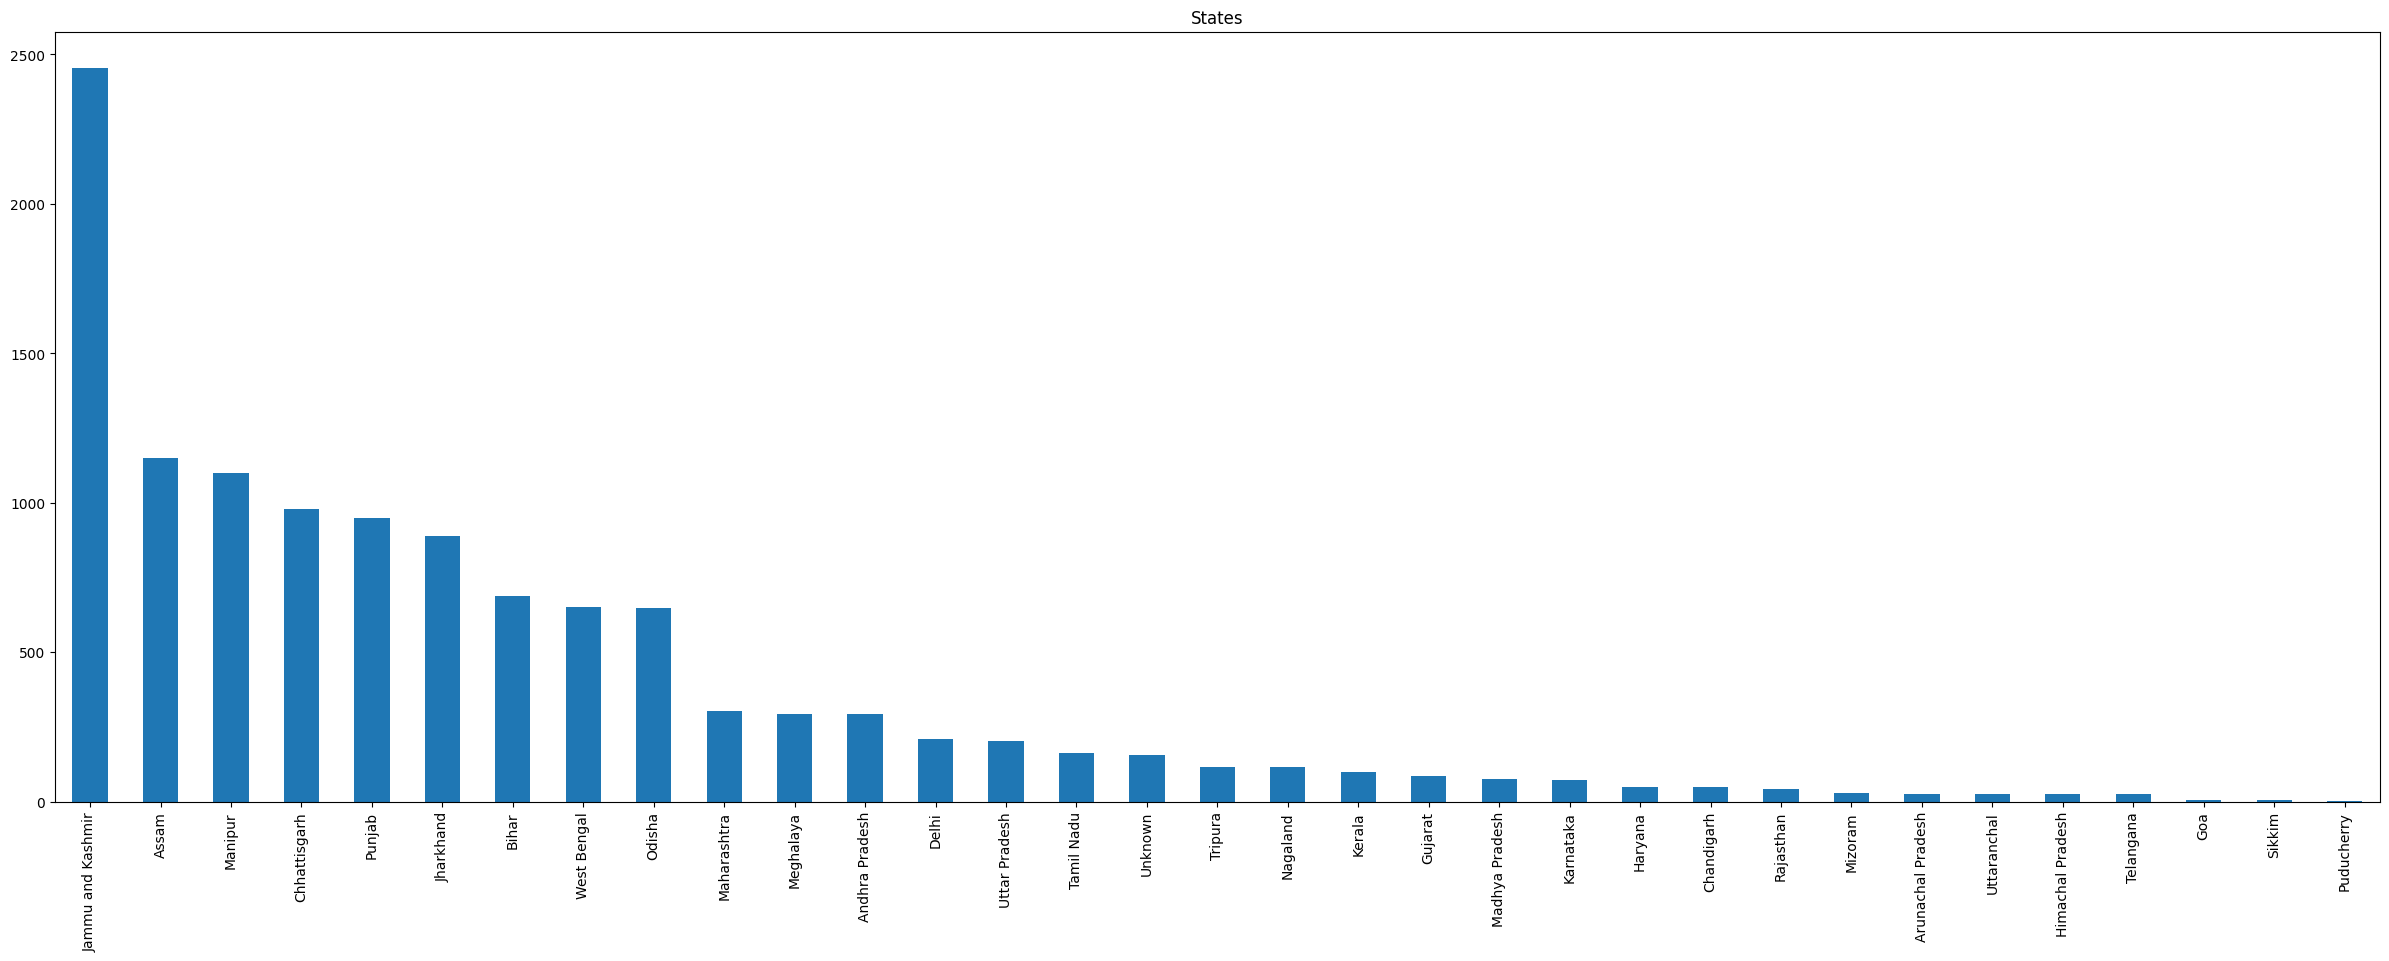

In [ ]:

Ind_attacks.provstate.value_counts().plot(kind='bar',figsize=(30,10),title='States')

<Axes: title={'center': 'States'}, xlabel='provstate'>

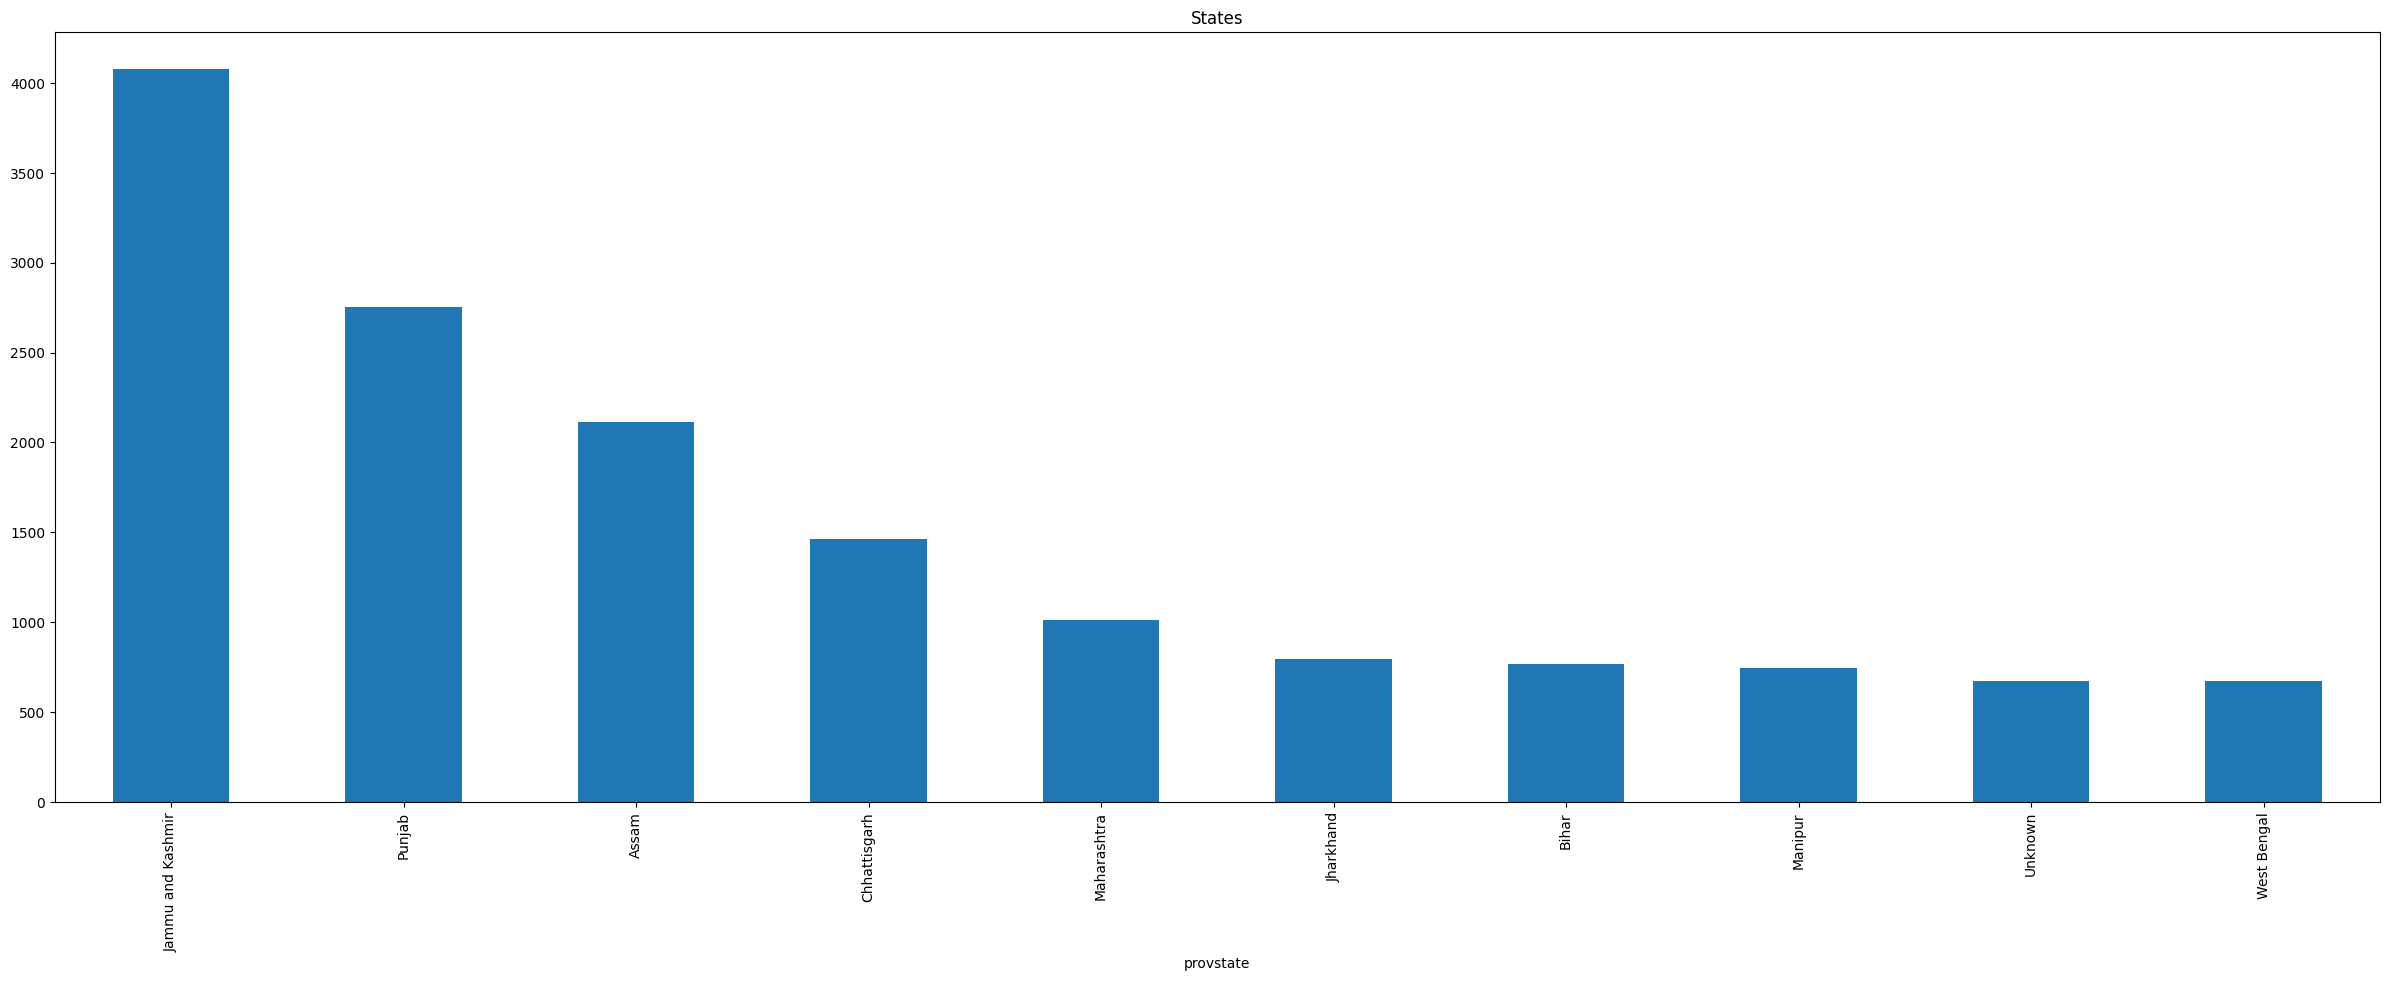

In [ ]:
Ind_attacks.groupby(['provstate']).nkill.sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(30,10),title='States')

In [ ]:
Ind_attacks.gname.unique()

array(['Palestinians', 'Ananda Marga', 'Unknown',
       'Japanese Red Army (JRA)', 'Naga People', 'Meitei extremists',
       'Mizo National Front', 'Muslims', 'Naxalites',
       "People's Liberation Army (India)", 'Maoists',
       'Anti-Immigrant extremists', 'Insurgents', 'Extremists',
       'Dissident', 'Sikh Extremists', 'Secessionists', 'Akali Dal Party',
       'Iranians', 'All India Sikh Students Federation (AISSF)',
       "Fedayeen Khalq (People's Commandos)",
       'Tripura National Volunteers (TNV)', 'Tripura Nationalists',
       'Dishmish Regiment',
       'Revolutionary Organization of Socialist Muslims',
       'National Socialist Council of Nagaland', 'Jarnail Khalsa',
       'Saffron Tigers', 'Kisar Liberation Movement',
       'Tribal Separatists', 'Karamyit Singh',
       'Maoist Communist Center (MCC)', 'Terrorists', 'Separatists',
       'Khalistan Liberation Force', 'Anti-Socials', 'Gunmen', 'Tamils',
       'Khalistan Commando Force', 'Scooter Borne terroris

<Axes: title={'center': 'Attack Type'}>

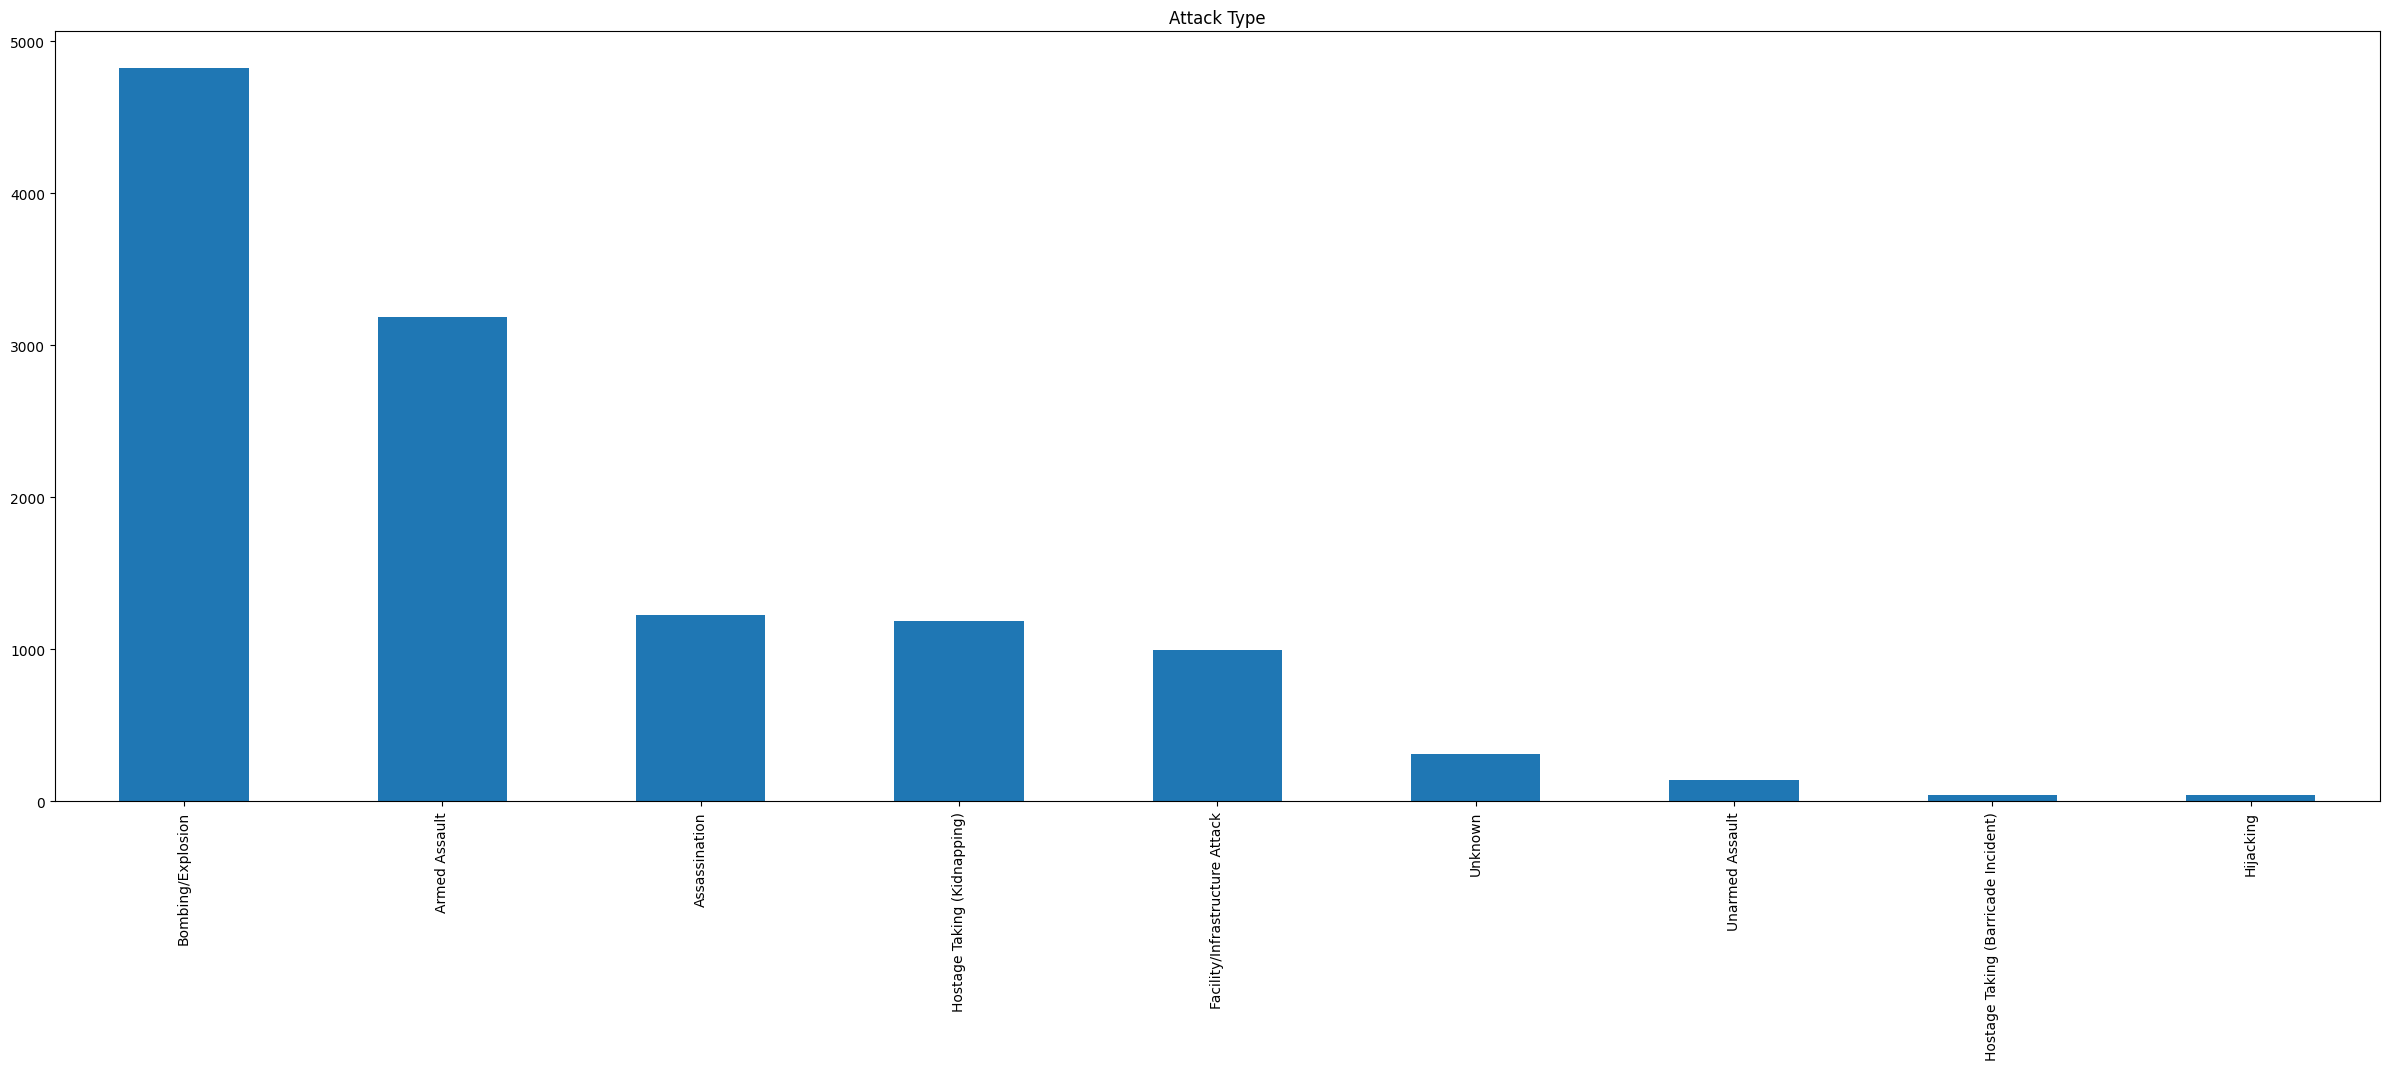

In [ ]:
Ind_attacks.attacktype1_txt.value_counts().plot(figsize=(30,10),title='Attack Type',kind='bar')

<Axes: title={'center': 'Weapons Used'}>

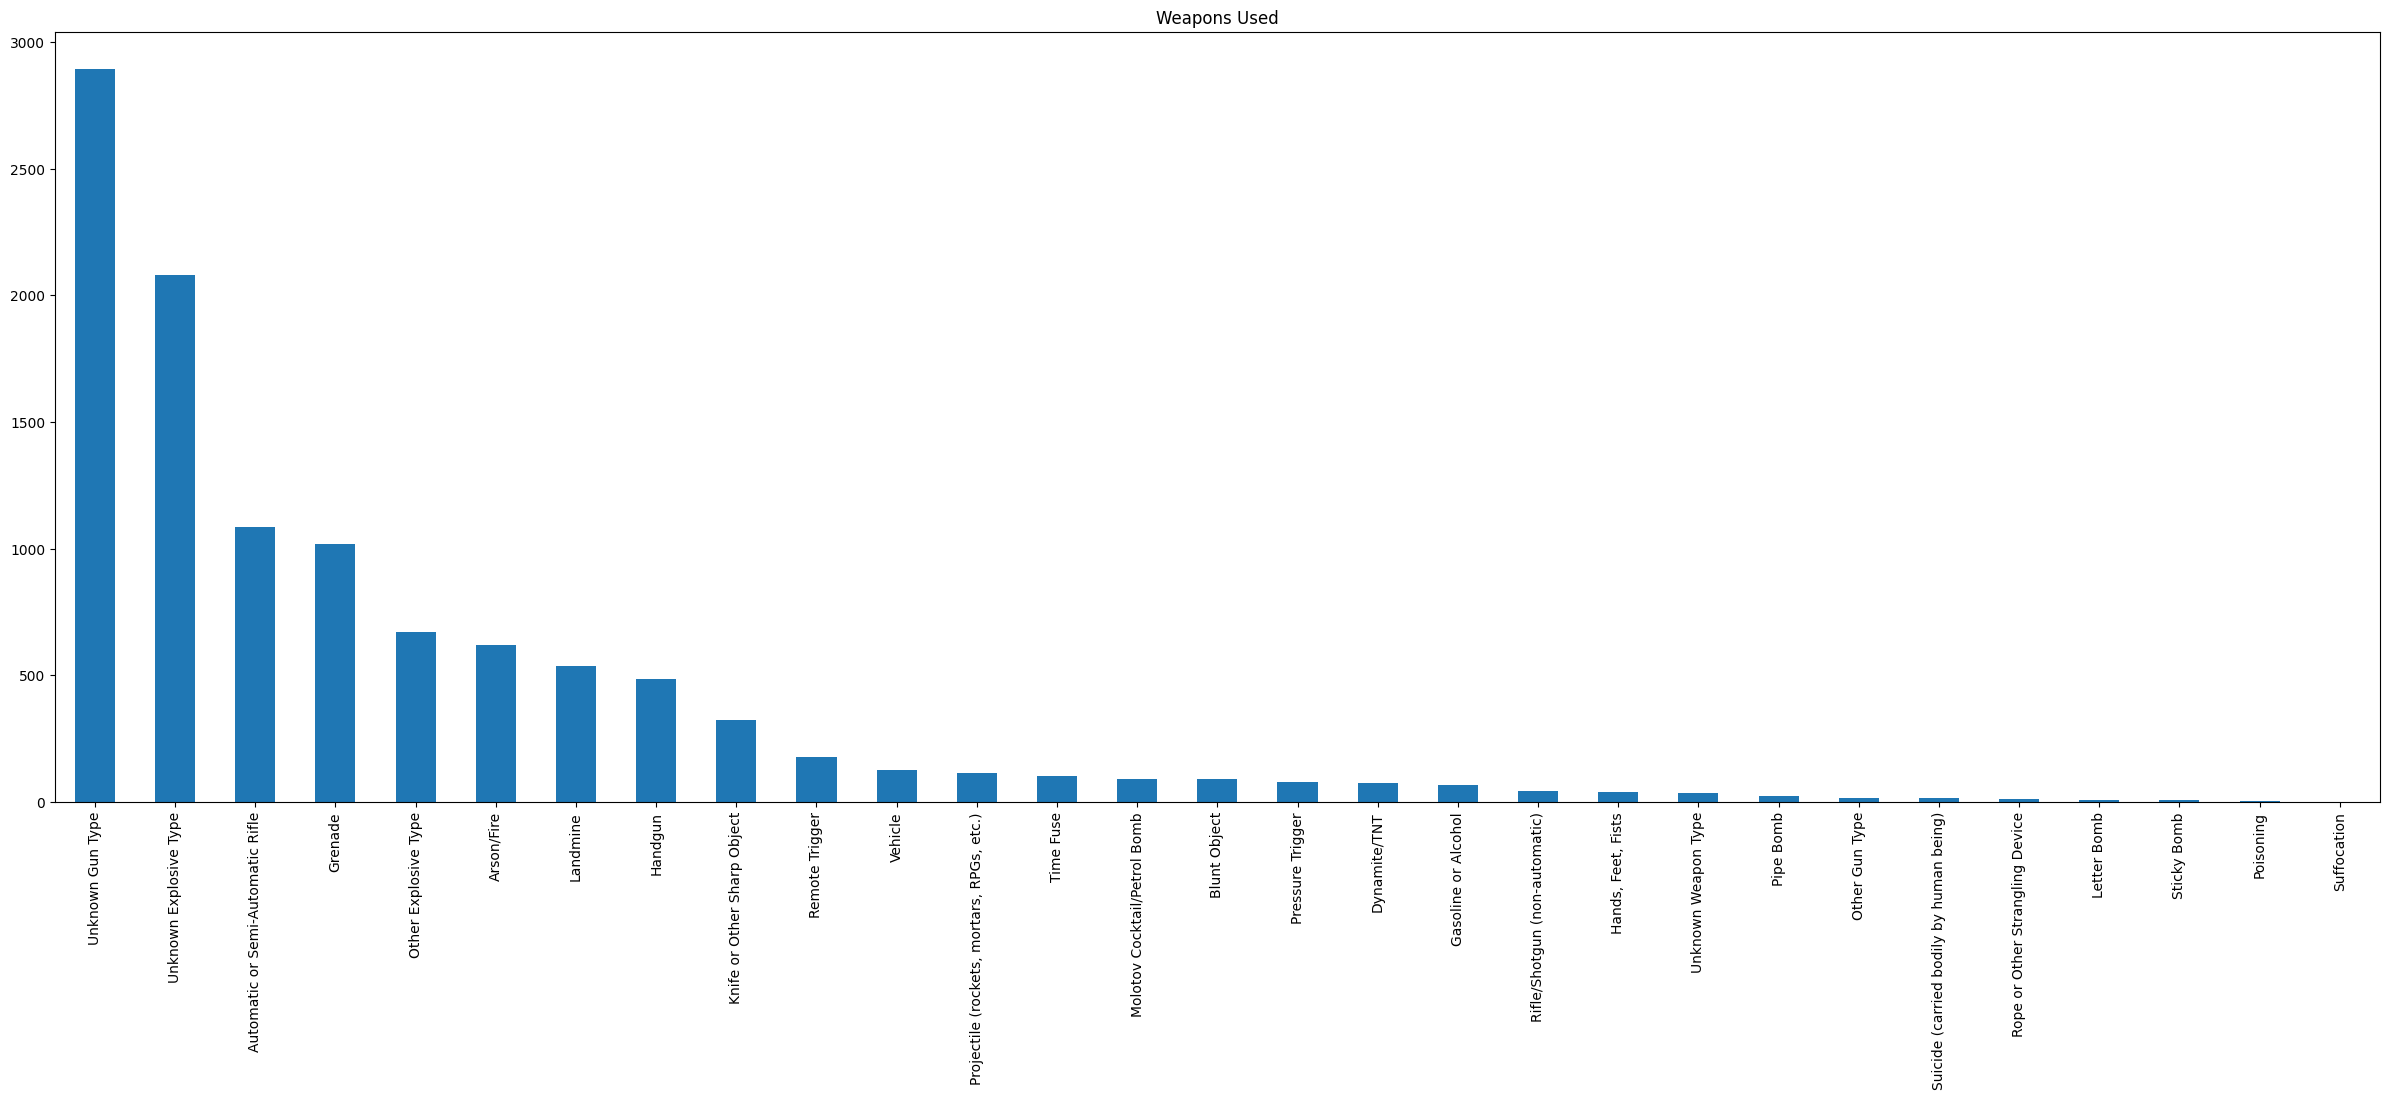

In [ ]:
Ind_attacks.weapsubtype1_txt.value_counts().plot(figsize=(30,10),title='Weapons Used',kind='bar')

<Axes: title={'center': 'Terrorist Orgs'}>

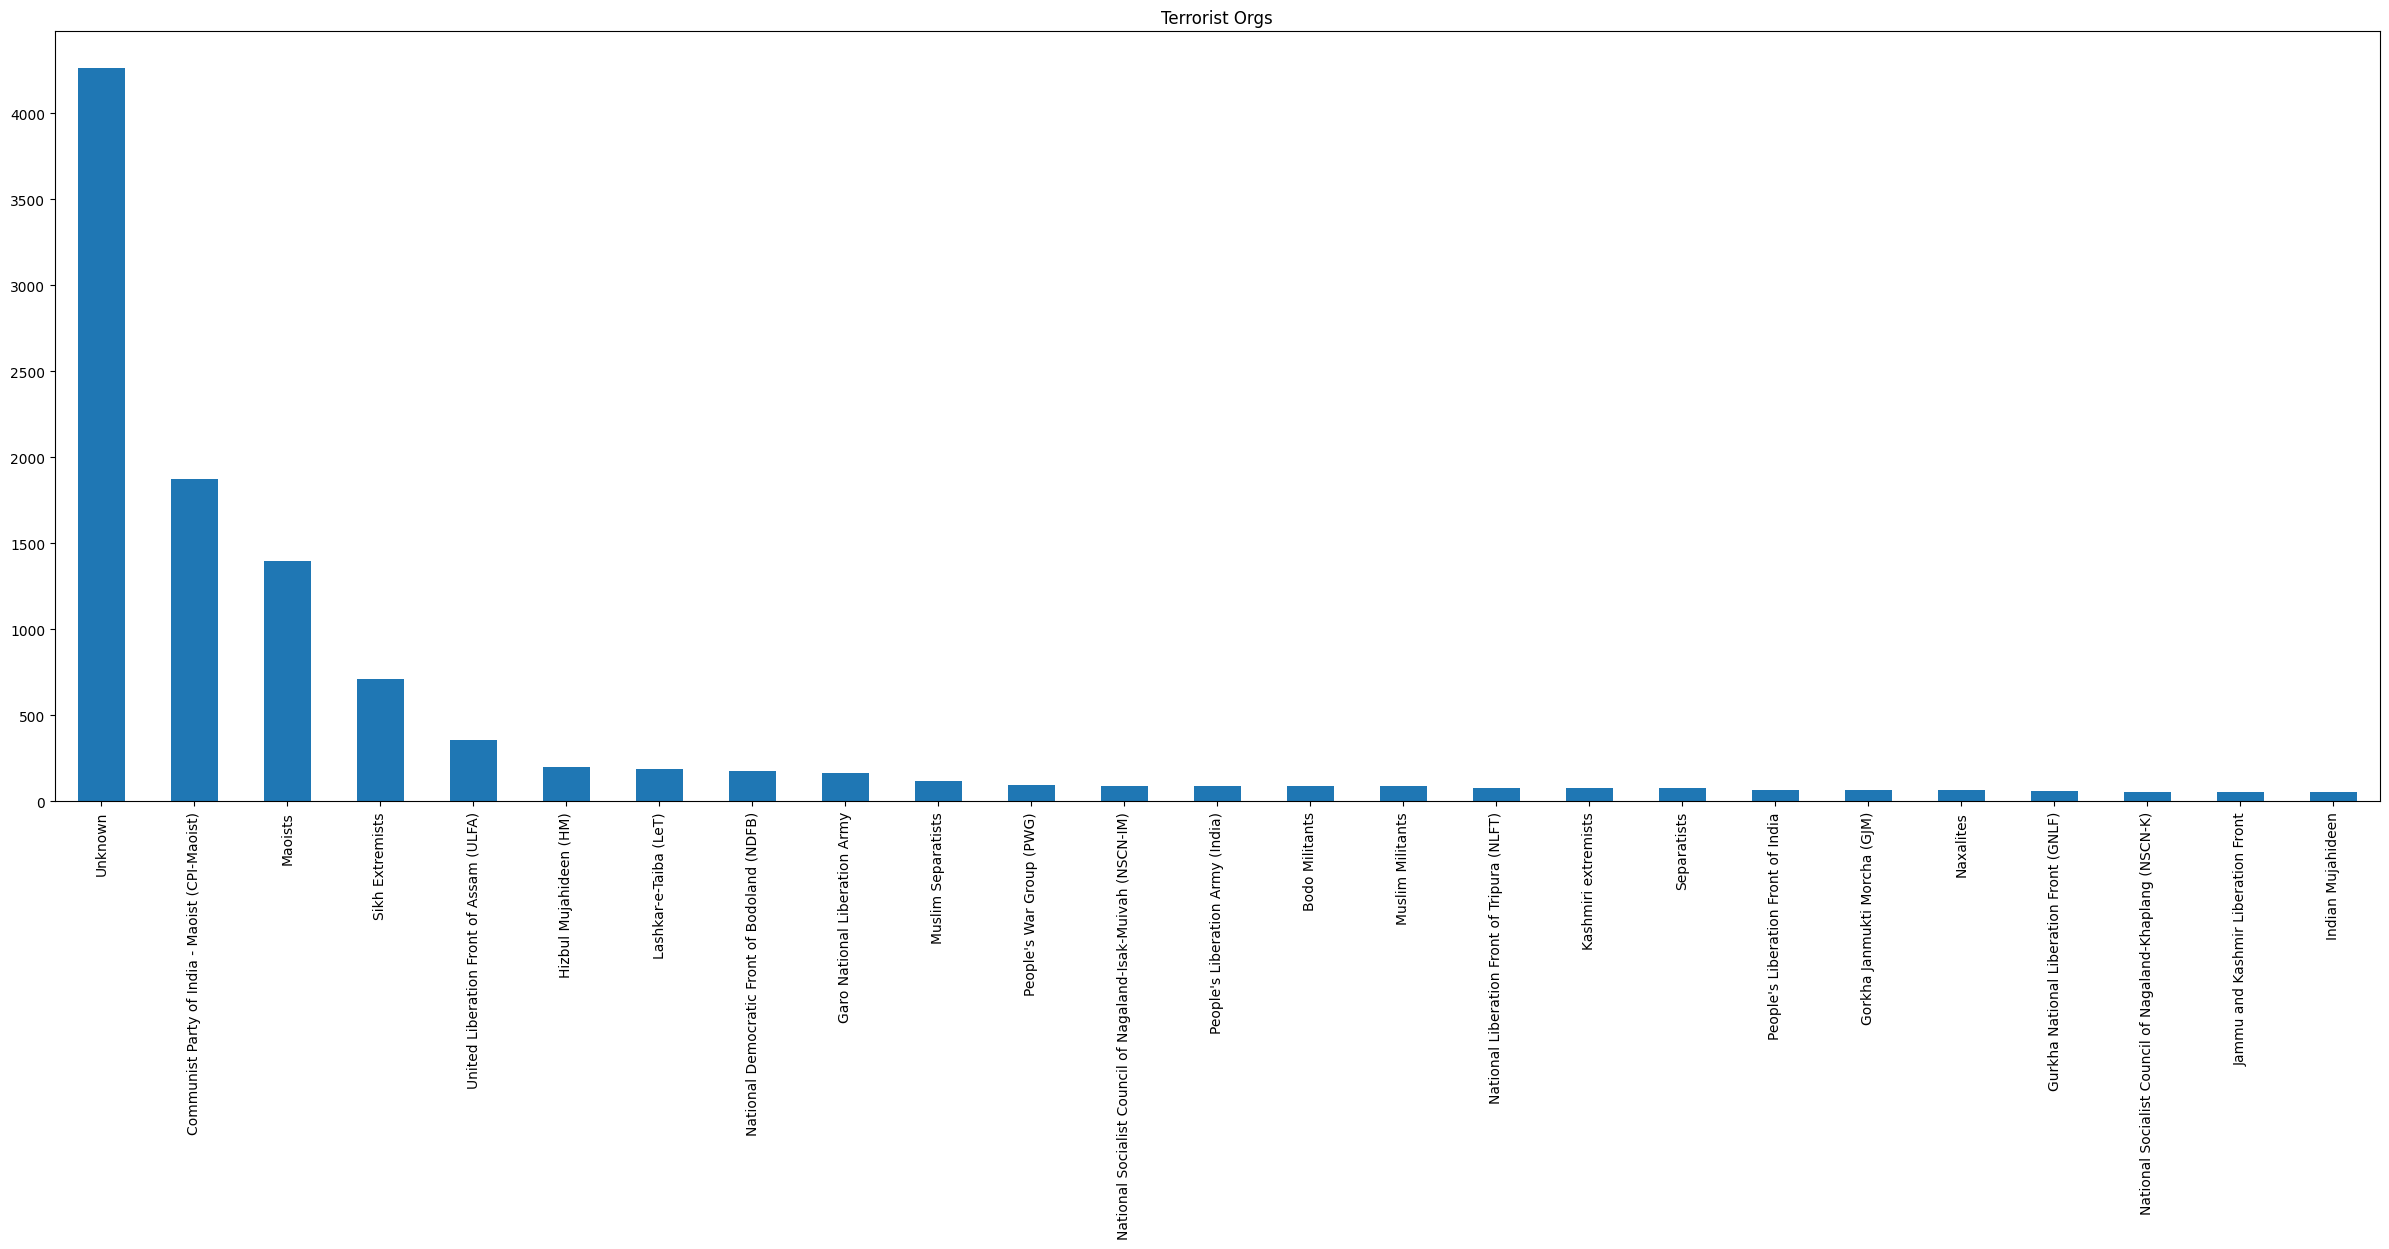

In [ ]:
Ind_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Terrorist orgs with highest kill counts'}, xlabel='gname'>

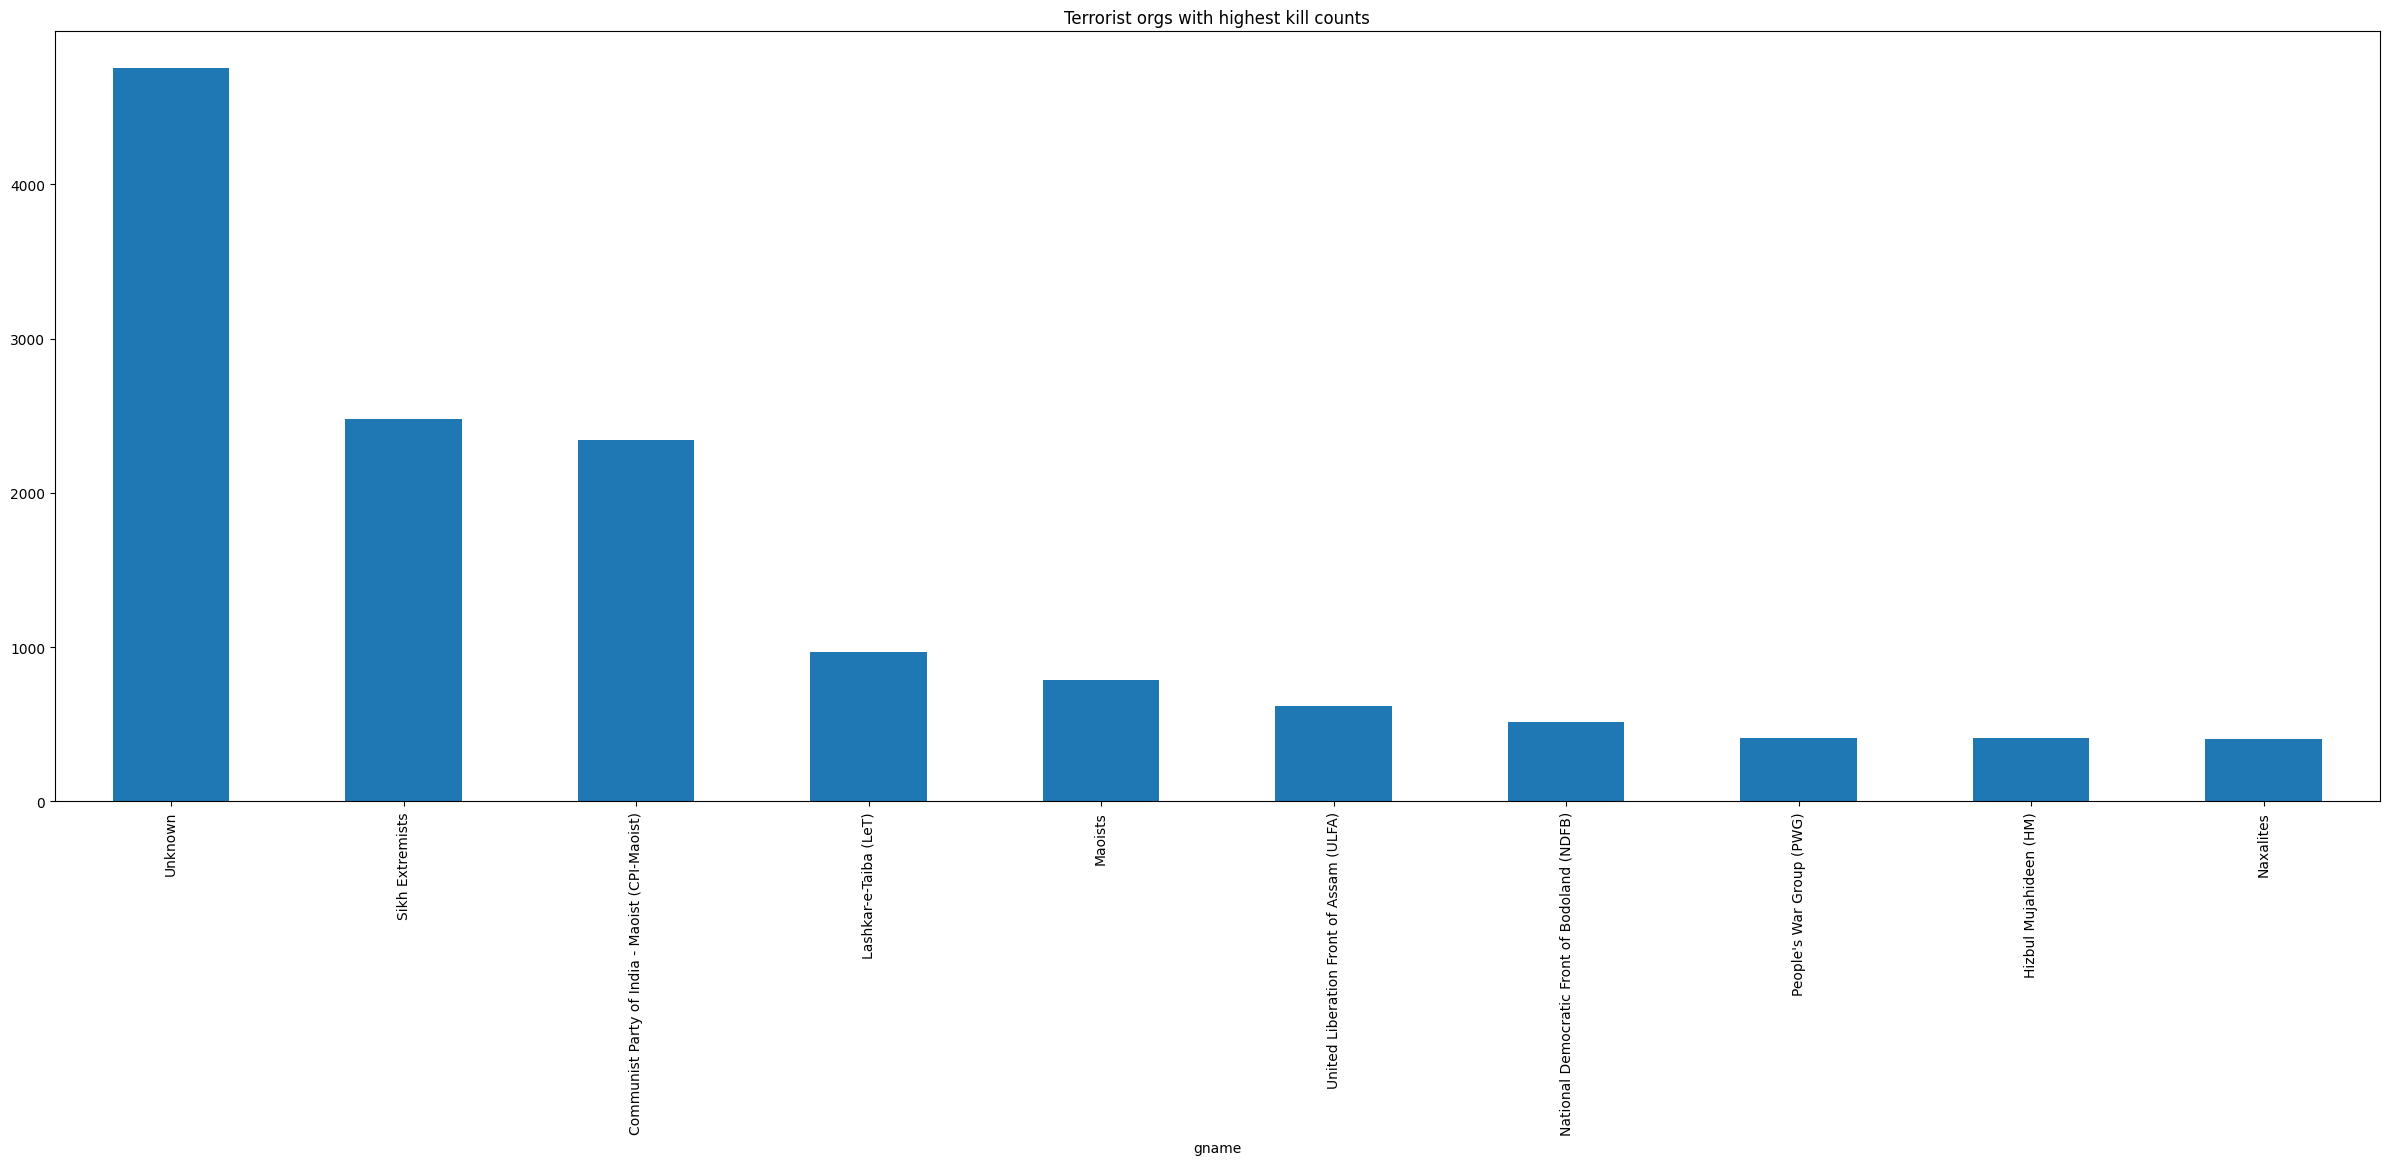

In [ ]:
Ind_attacks.groupby(['gname']).nkill.sum().sort_values(ascending=False).head(10).plot(figsize=(30,10),title='Terrorist orgs with highest kill counts',kind='bar')

#Pakistan

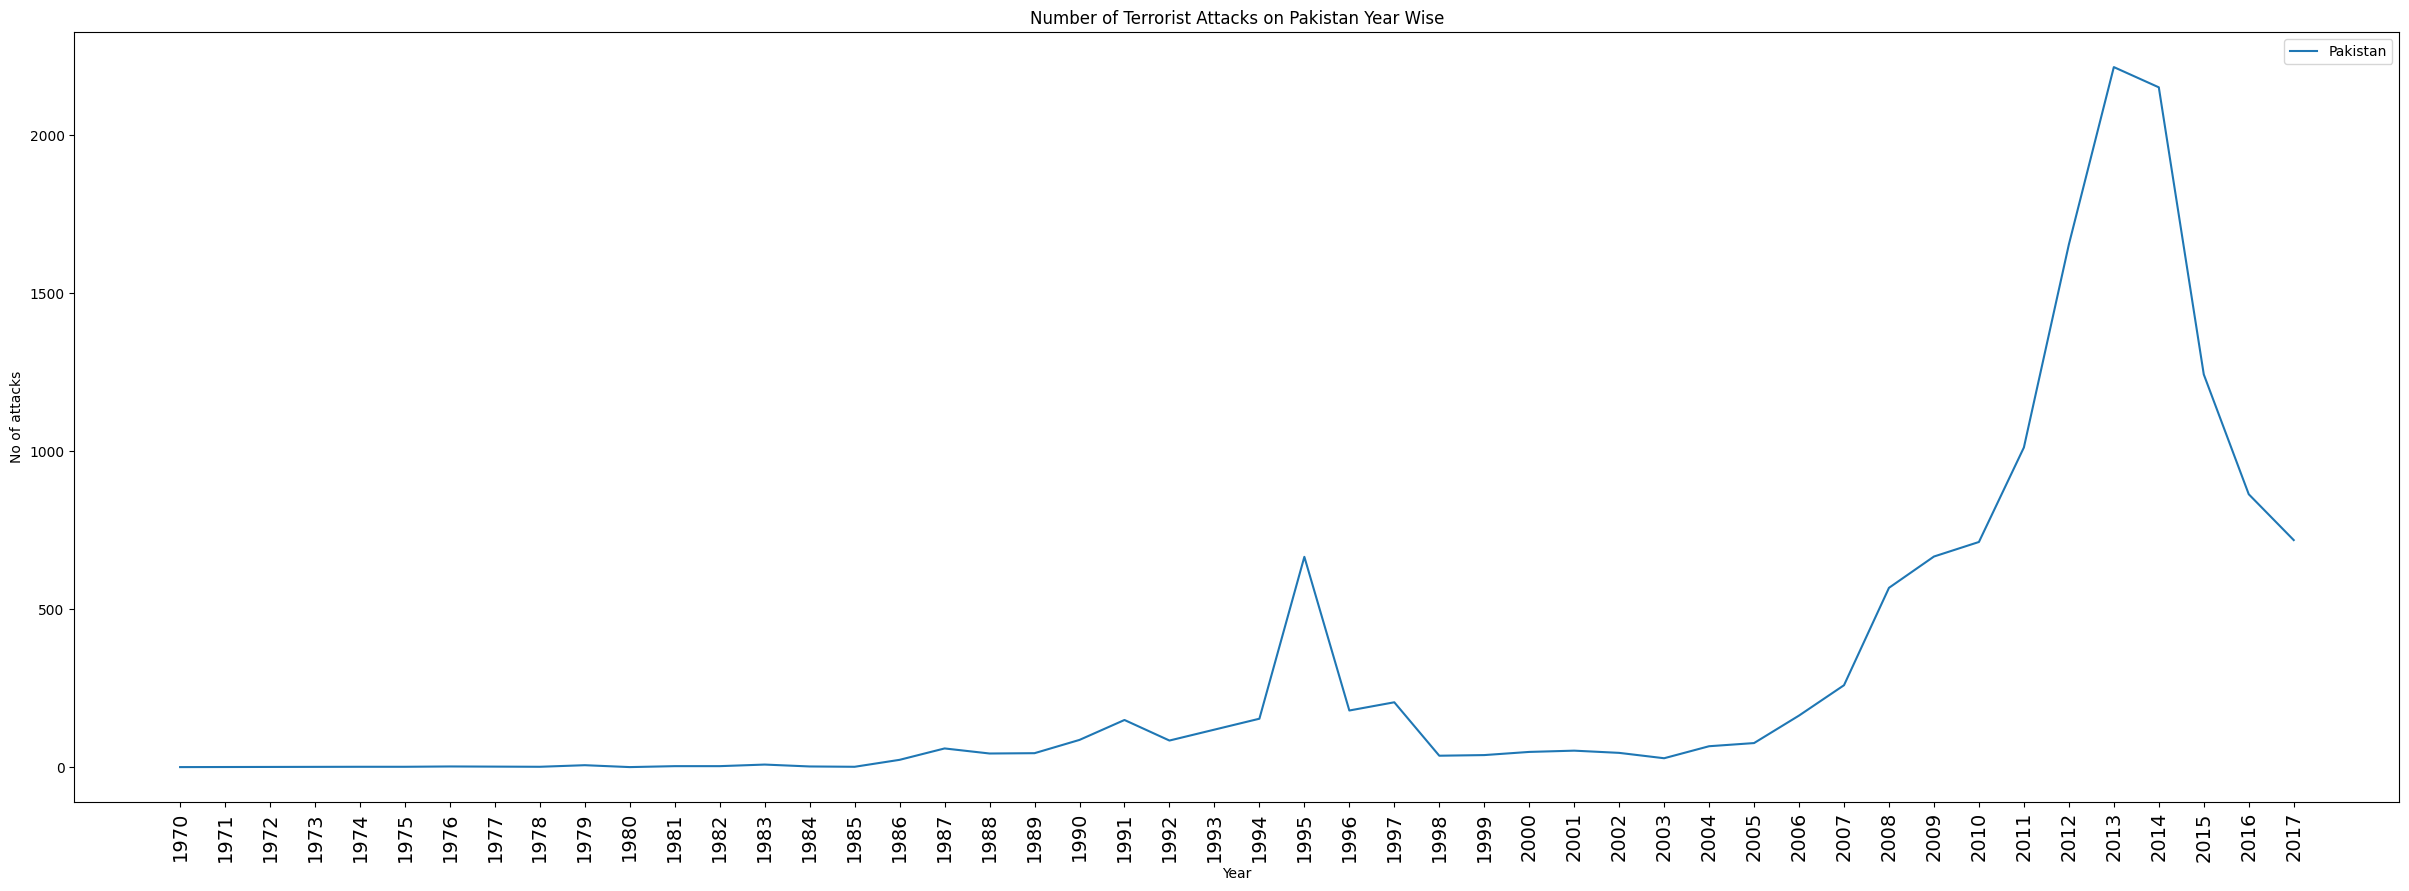

In [ ]:
pak_attacks=df[(df.country_txt=='Pakistan')]
pak_attacks.sort_values(by='iyear')
pak=pak_attacks['iyear'].value_counts().sort_index().reset_index()
pak.columns=['Year','Pakistan']
pak.plot(x='Year',y='Pakistan',figsize=(30,10),title='Number of Terrorist Attacks on Pakistan Year Wise',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
pak = pak.set_index('Year')

<Axes: title={'center': 'Targets'}>

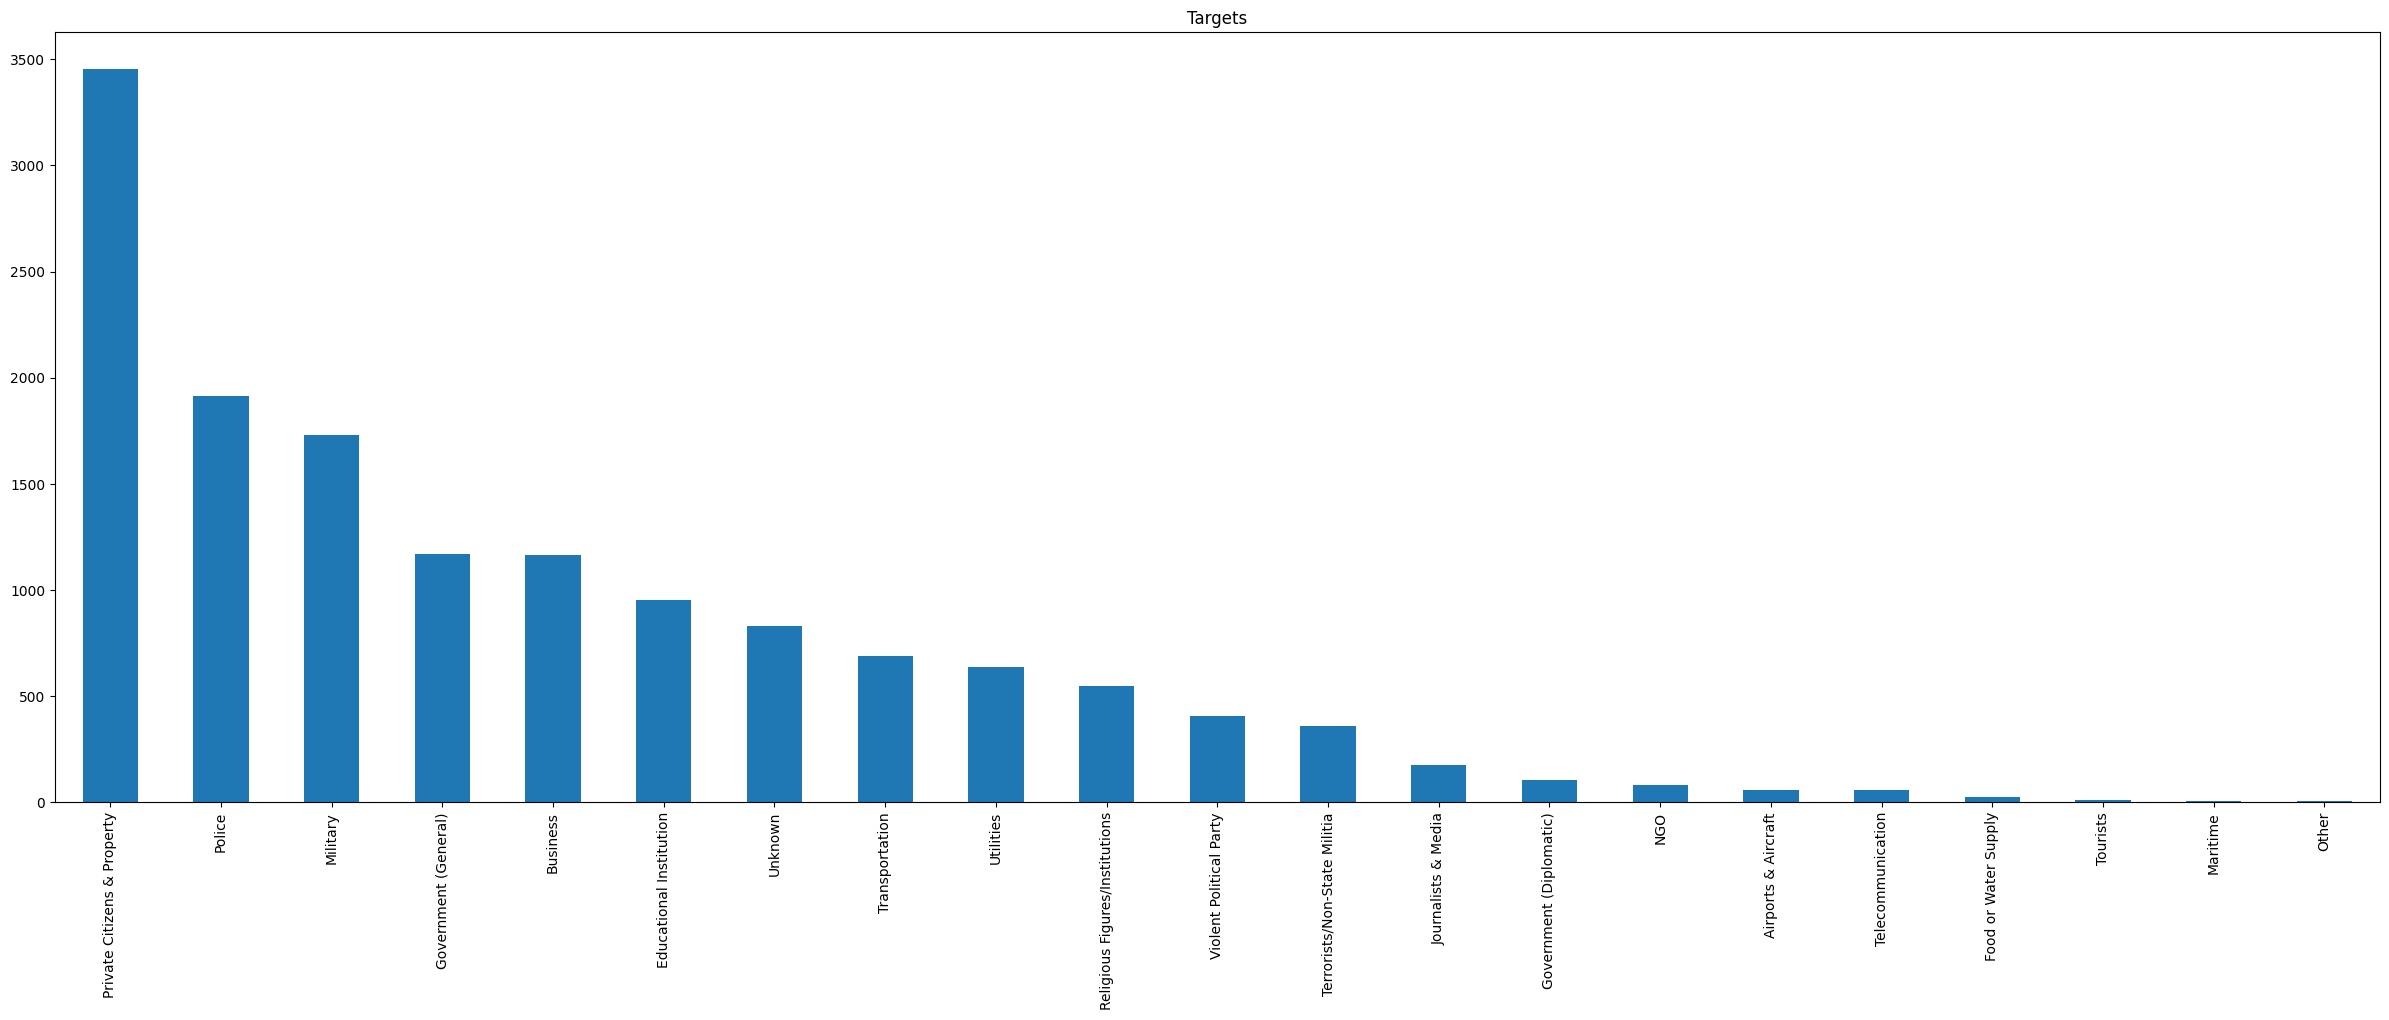

In [ ]:
pak_attacks.targtype1_txt.value_counts().plot(kind='bar',figsize=(30,10),title='Targets')

<Axes: title={'center': 'Deaths'}, xlabel='Year', ylabel='No of Deaths'>

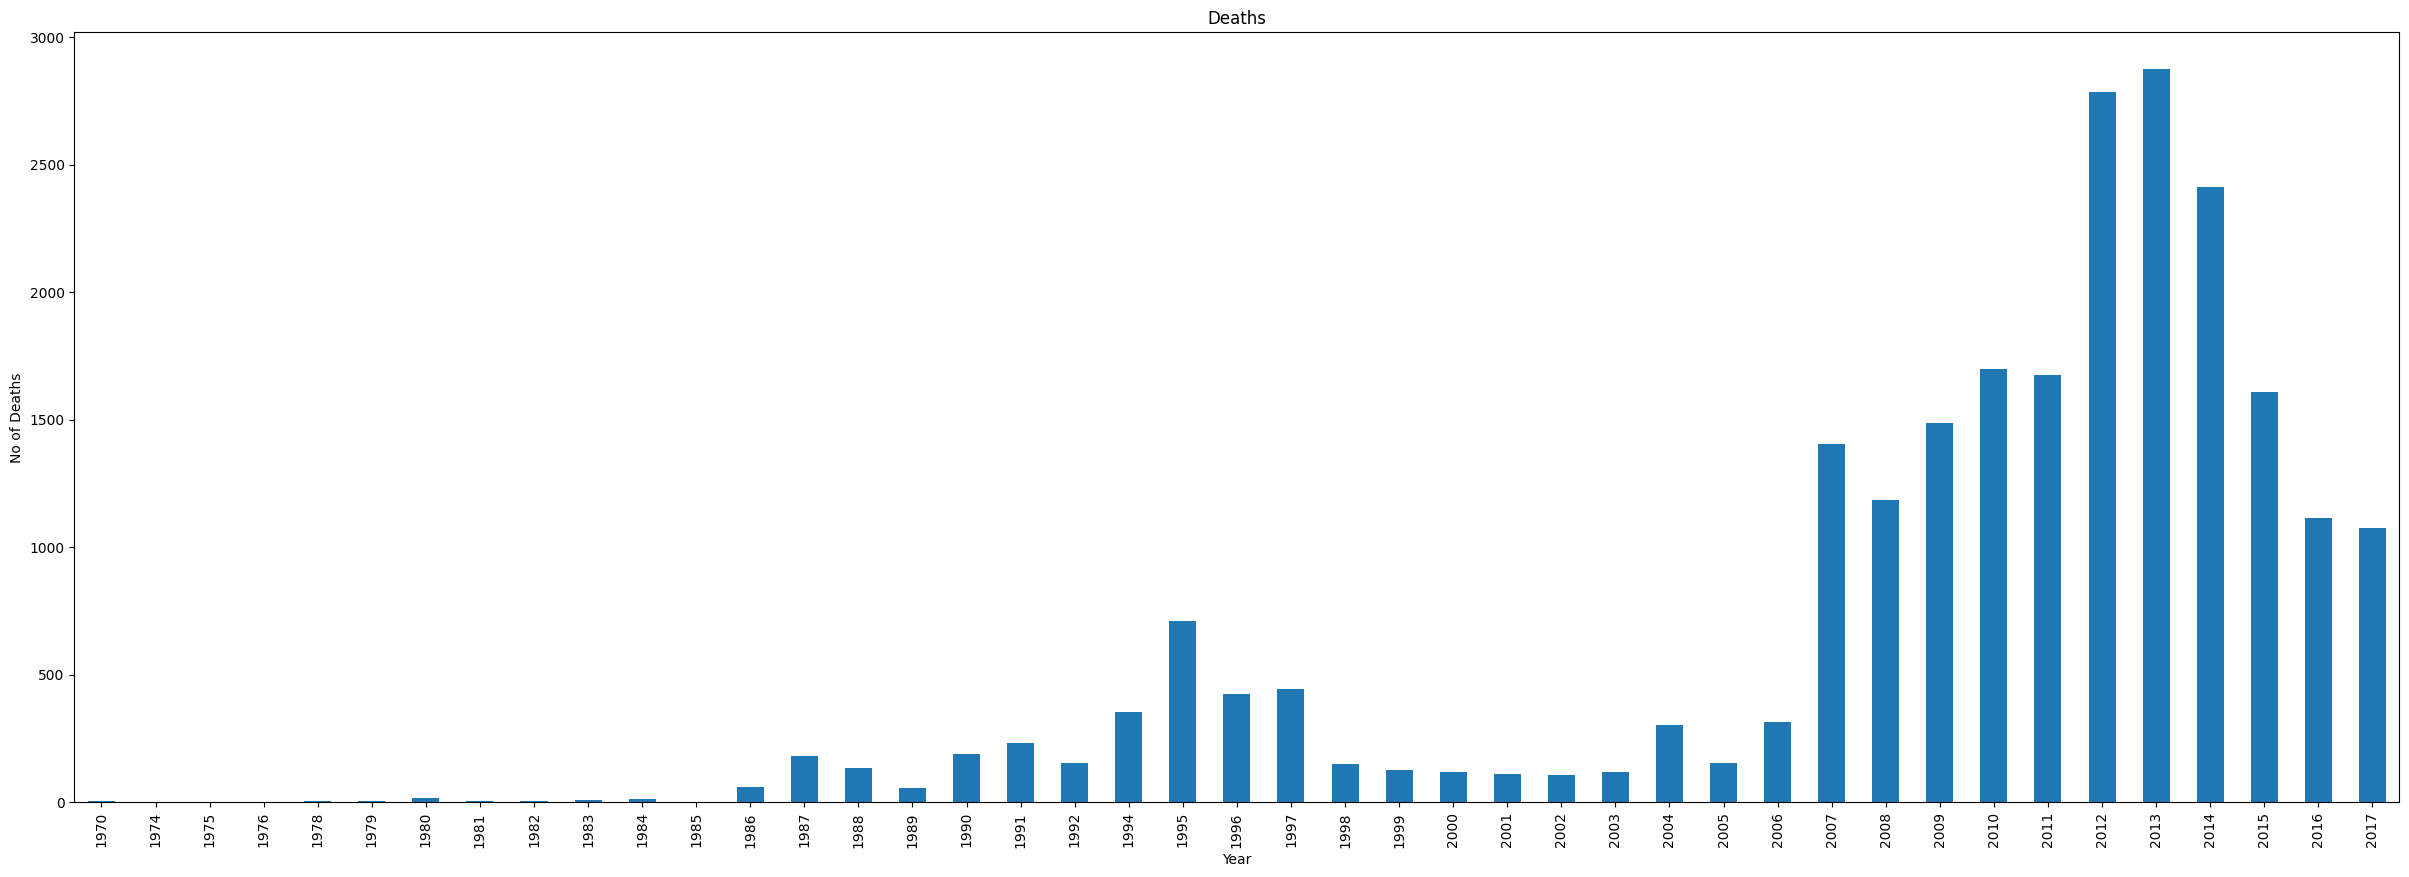

In [ ]:
pak_attacks.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Deaths',kind='bar',figsize=(30,10))

In [ ]:
pak_attacks['provstate'] = pak_attacks['provstate'].replace('SIndh','Sindh')

<ipython-input-51-83f4590a42b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_attacks['provstate'] = pak_attacks['provstate'].replace('SIndh','Sindh')


<Axes: title={'center': 'States'}>

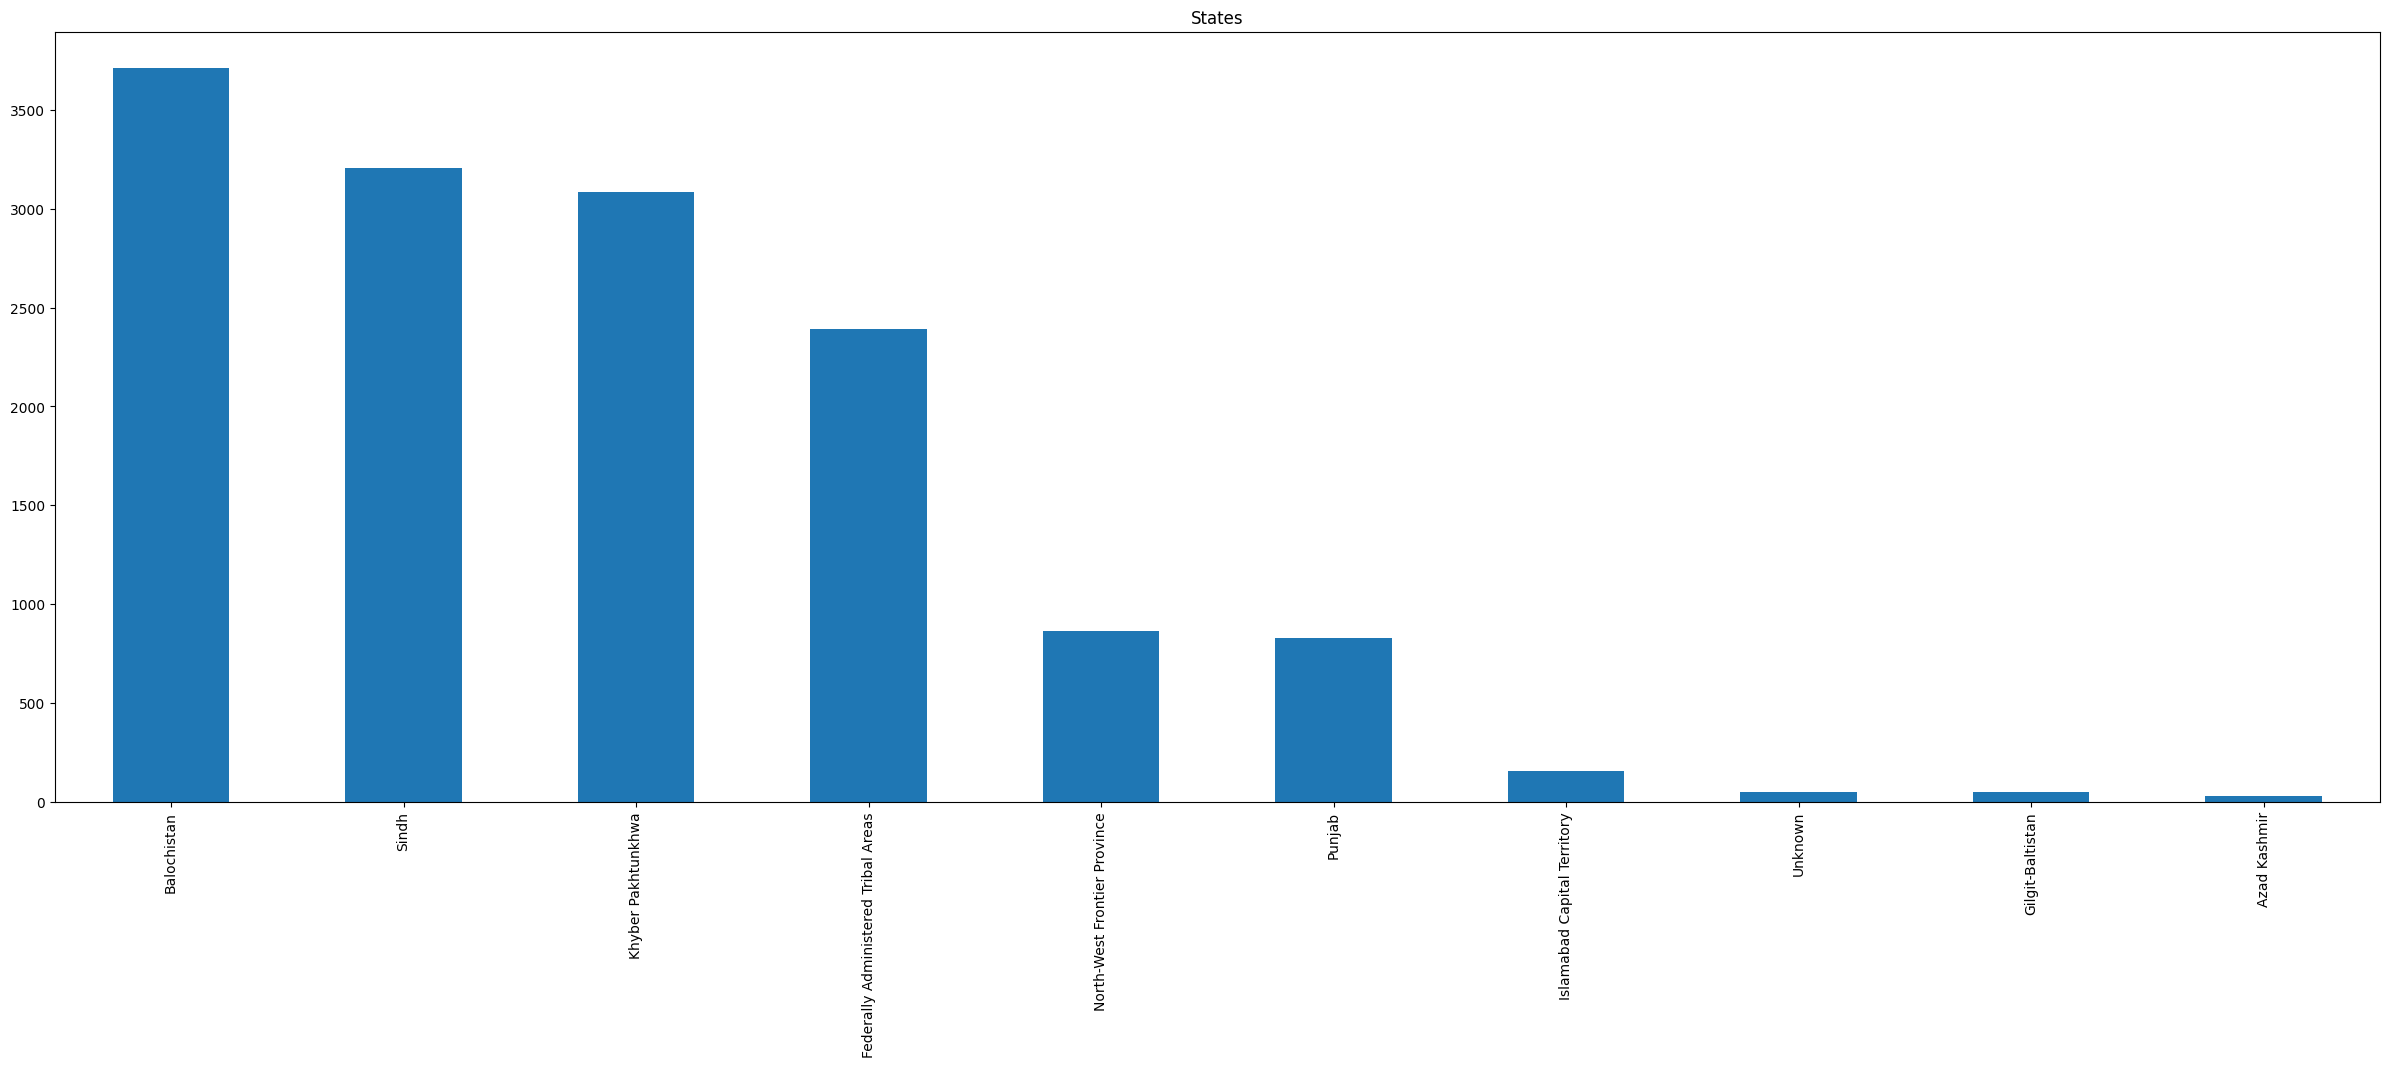

In [ ]:
pak_attacks.provstate.value_counts().plot(kind='bar',figsize=(30,10),title='States')

<Axes: title={'center': 'Attack Type'}>

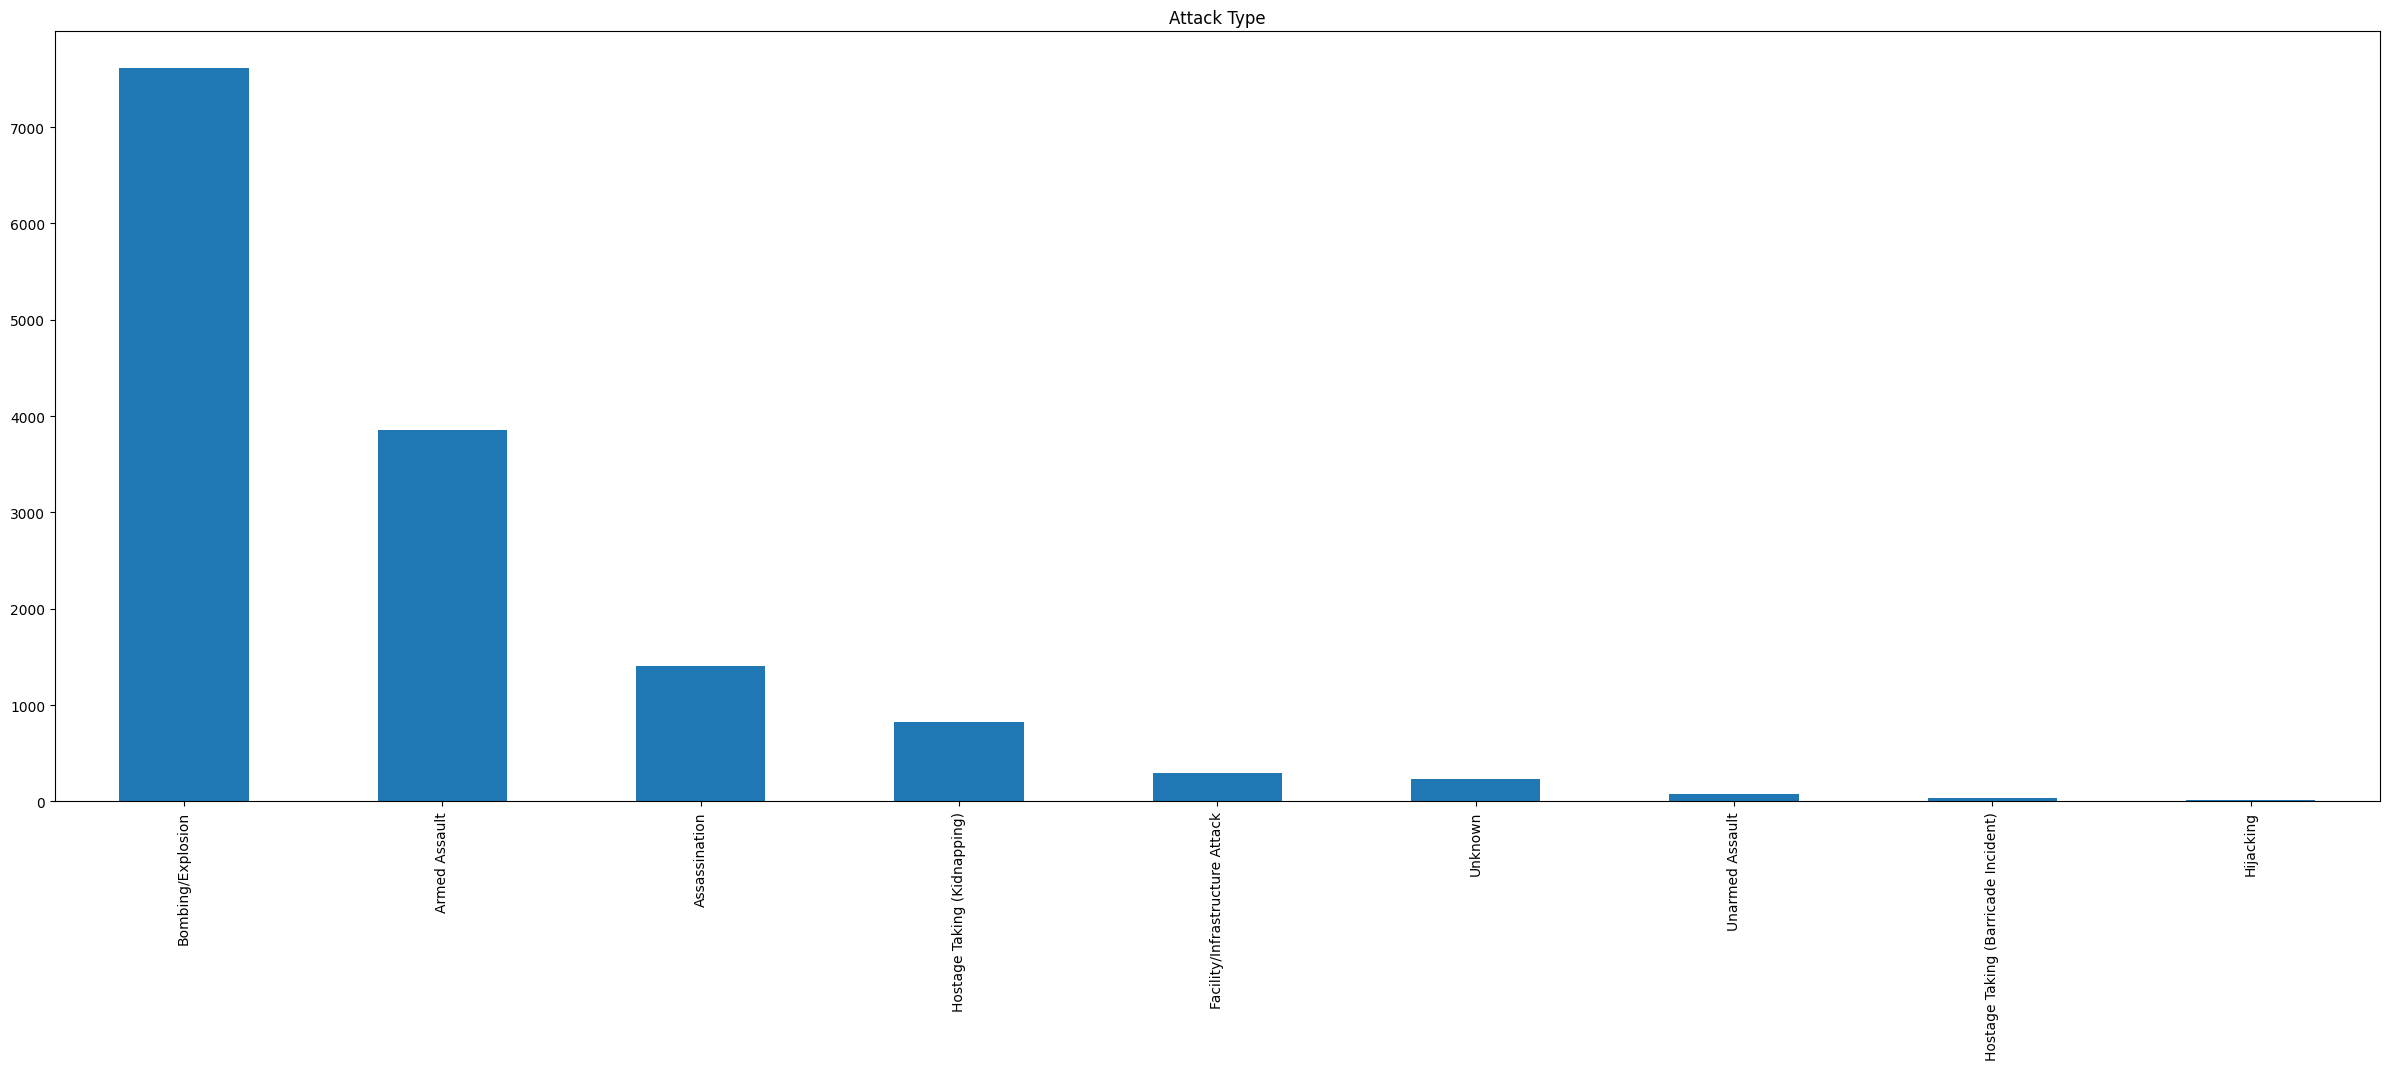

In [ ]:
pak_attacks.attacktype1_txt.value_counts().plot(figsize=(30,10),title='Attack Type',kind='bar')

<Axes: title={'center': 'Weapons Used'}>

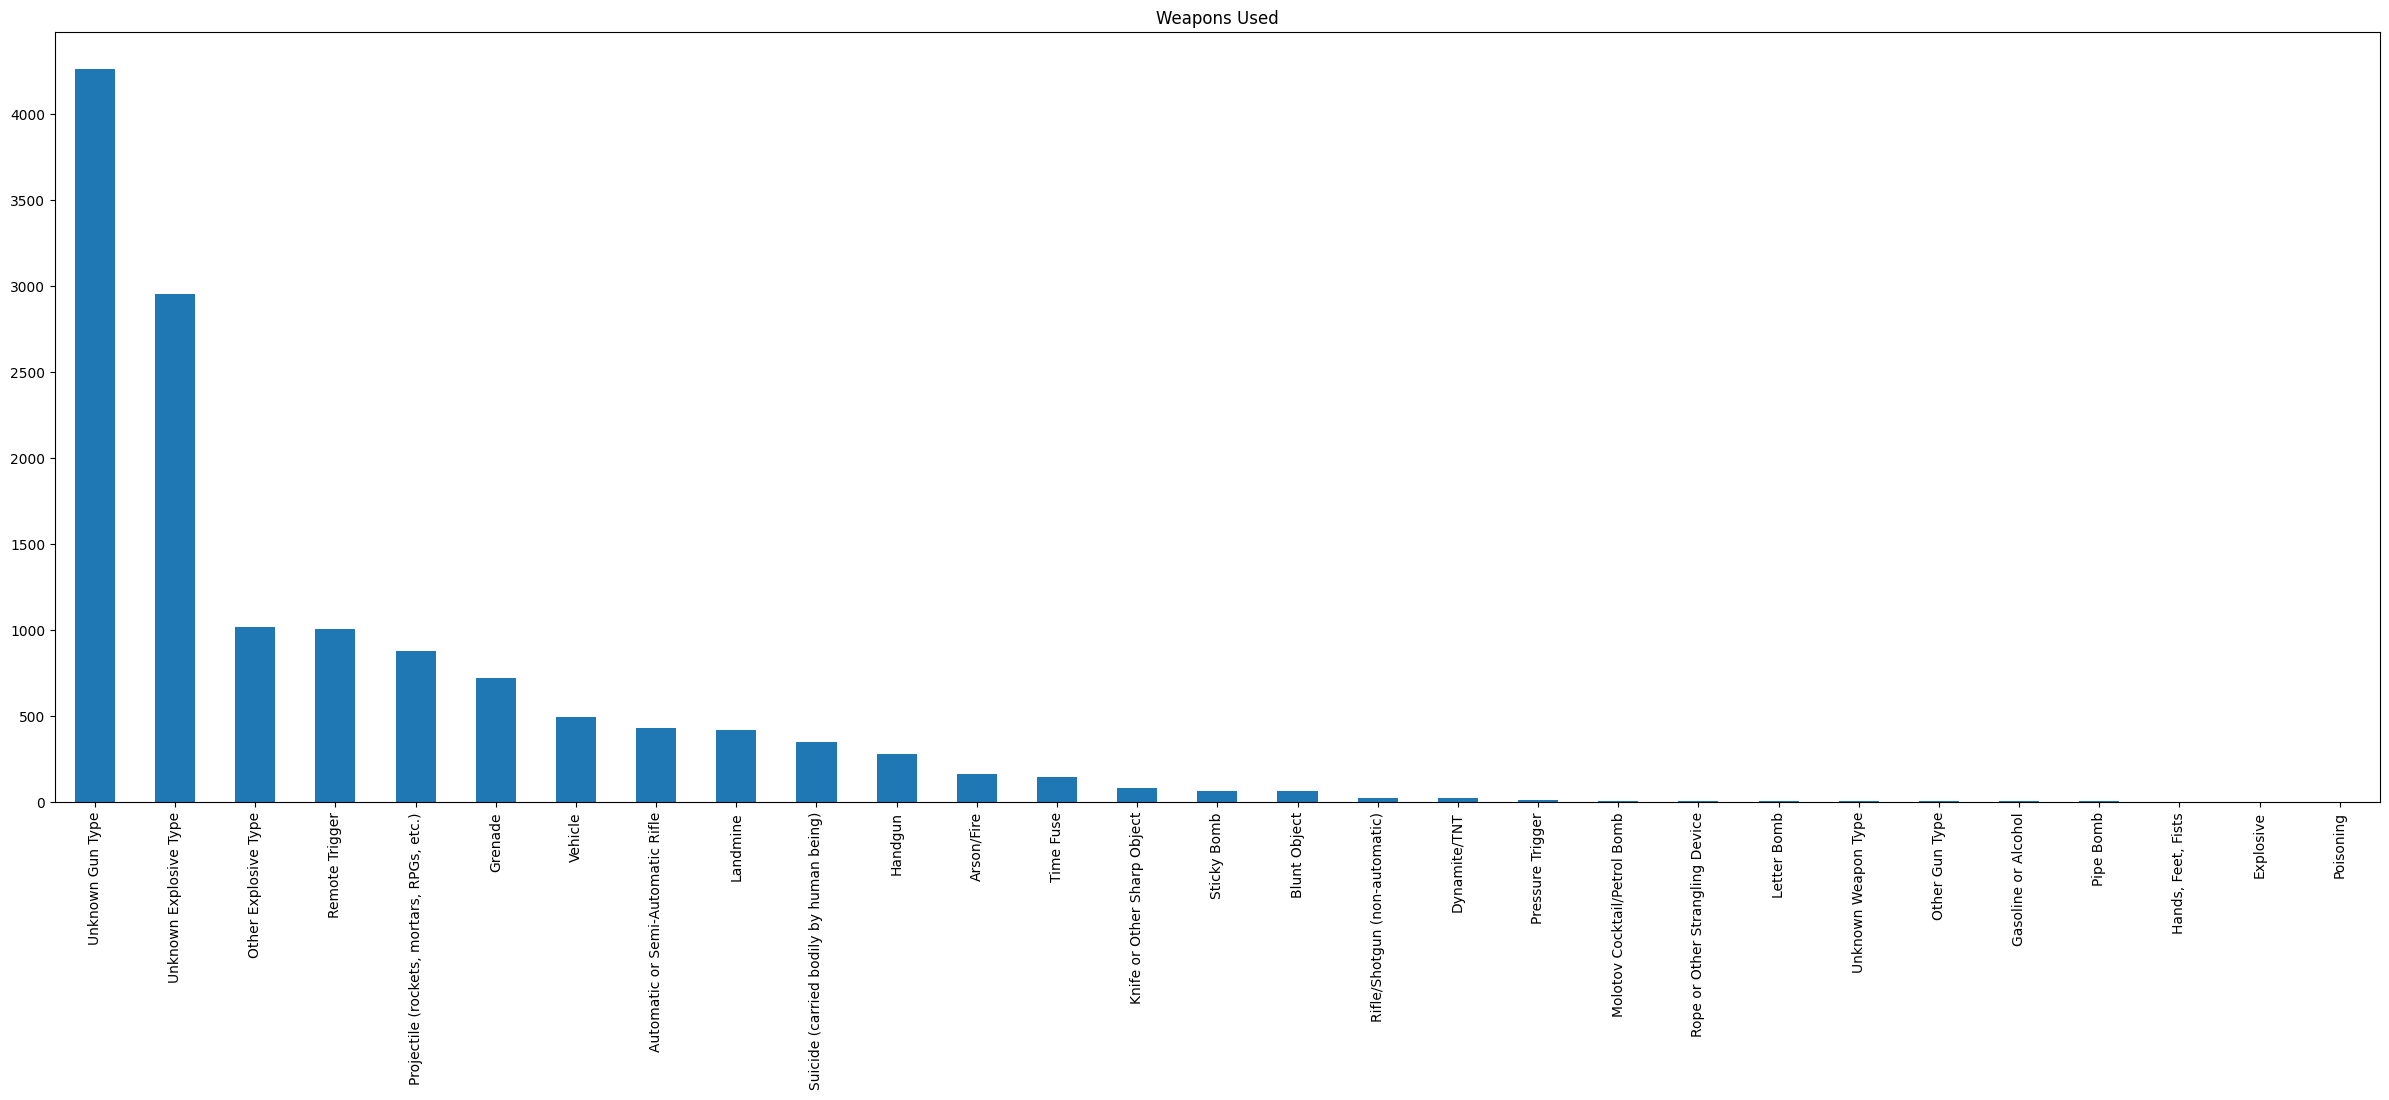

In [ ]:
pak_attacks.weapsubtype1_txt.value_counts().plot(figsize=(30,10),title='Weapons Used',kind='bar')

In [ ]:
pak_attacks.gname.unique()

array(['Unknown', 'Muslim Guerrillas', 'National Awami Party',
       'Palestinians', 'Abu Nidal Organization (ANO)',
       'Supporter of Bhutto', 'Mob', 'Kabul Government Agents',
       'Al-Zulfikar', 'Aghwar "Fire War" Group', 'Iraqi Mujahideen',
       'Jammu and Kashmir Liberation Front', 'Iranians', 'Afghans',
       'Iranian dissident group', 'Pro-Kabul Provocateurs',
       'Sikh Extremists', 'Soldiers of Truth', 'Khalistan Commando Force',
       'Freedom Party', "Pakistani People's Party (PPP)",
       'Muttahida Qami Movement (MQM)', 'Sipah-e-Sahaba/Pakistan (SSP)',
       'Dacoits', 'Shia Muslim extremists', 'Drug-Related Terrorists',
       'Hizb-I-Islami', 'Mohajir National Movement',
       'Pathan Tribal Group', 'Political Group',
       'Jamaat-E-Islami (India/Pakistan)', 'Sindhi nationalists',
       'Sunni Muslim extremists', 'Tribal Group', 'Muslim Demonstrators',
       'Muslims', 'Muslim Militants', 'Afghan Guerrillas',
       'Ittehad-i-Islami', 'Gunmen', 'U/I S

<Axes: title={'center': 'Terrorist Orgs'}>

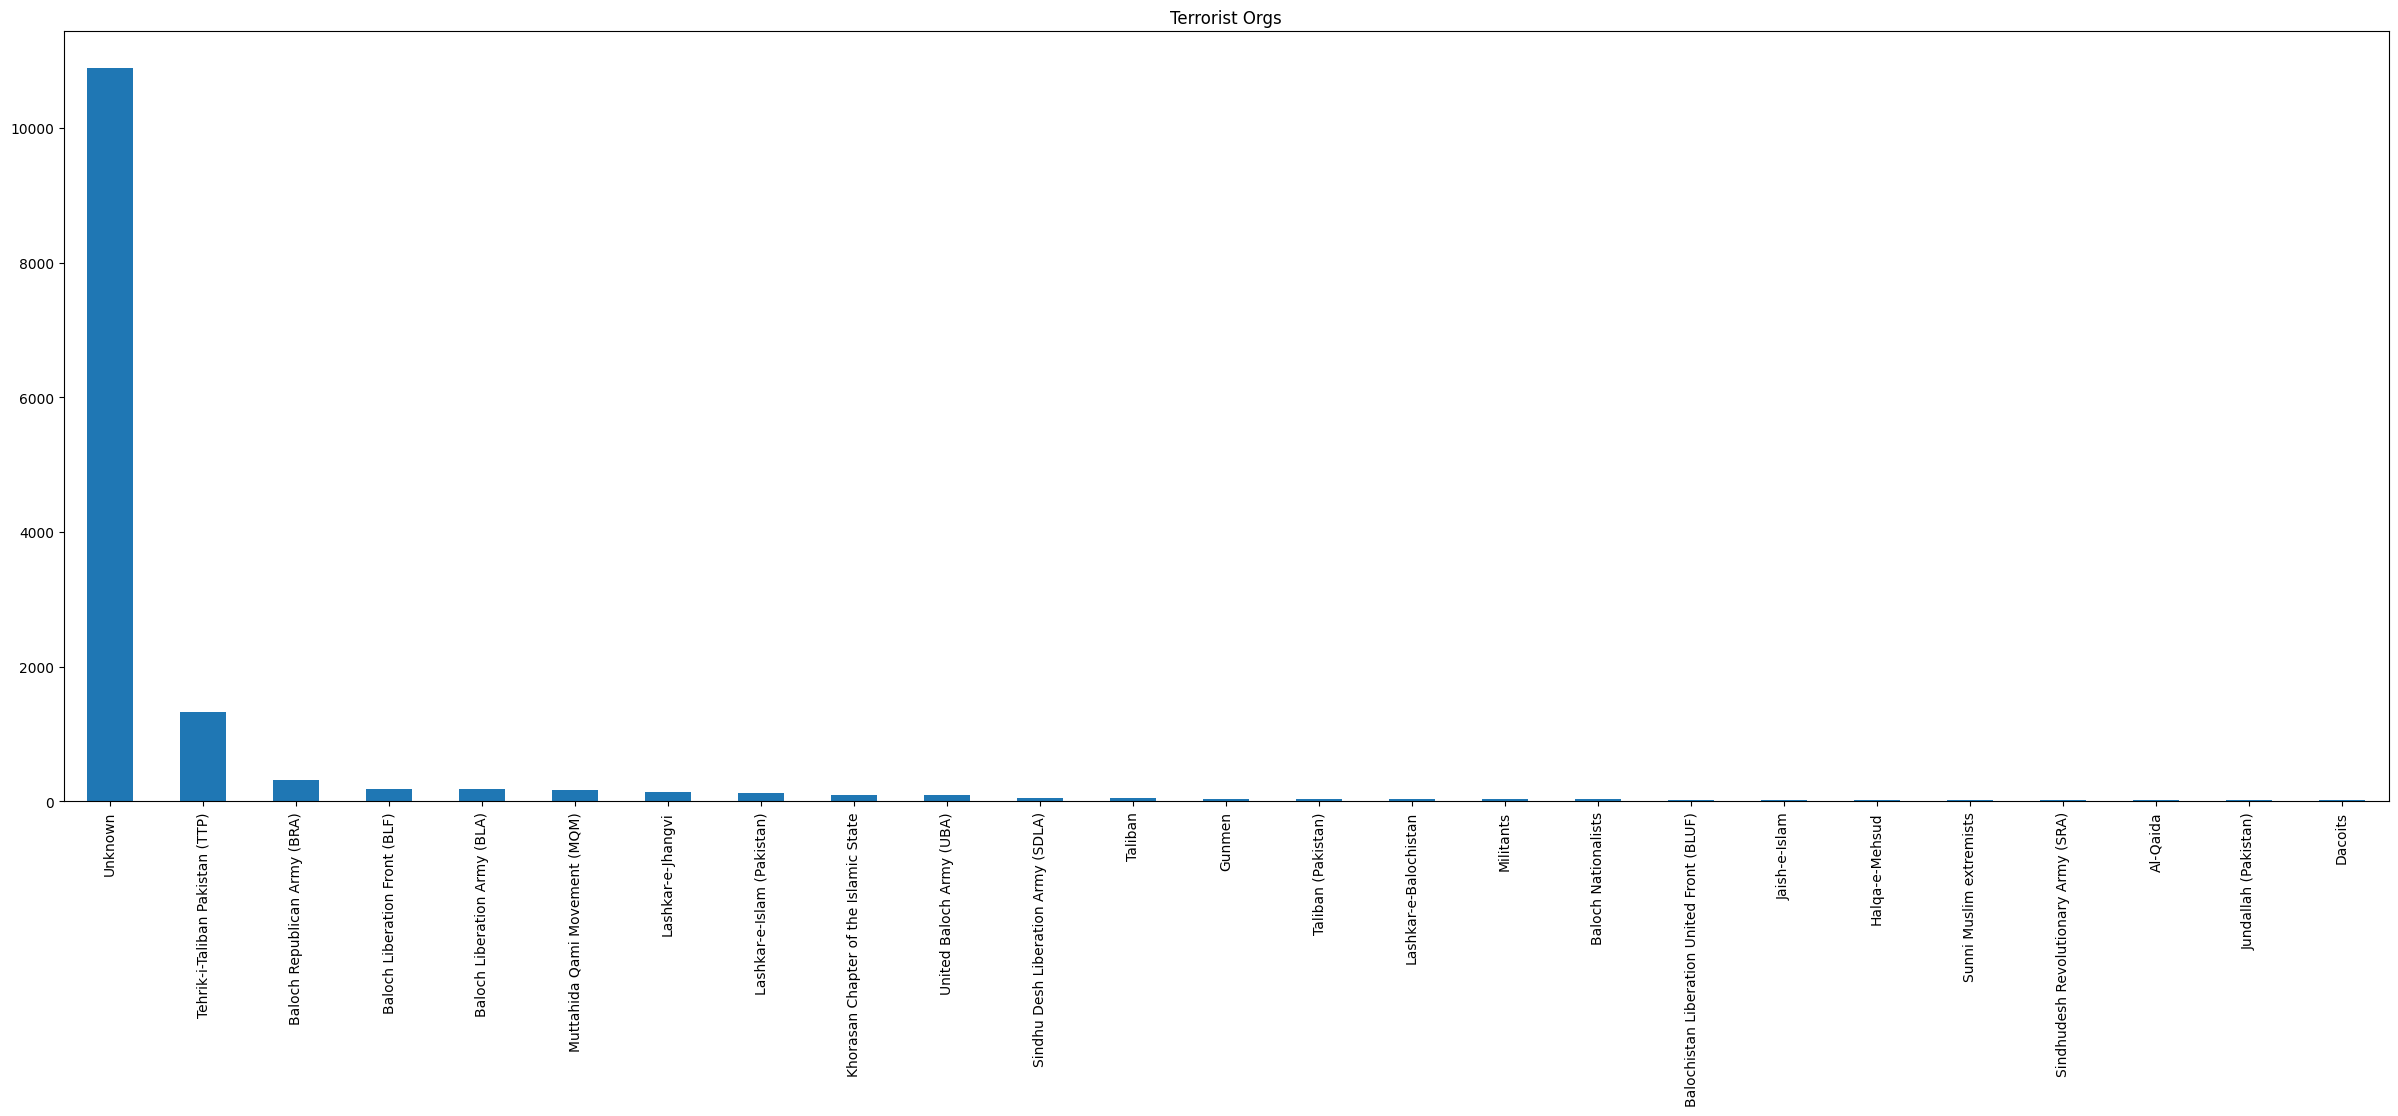

In [ ]:
pak_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Terrorist orgs with highest kill counts'}, xlabel='gname'>

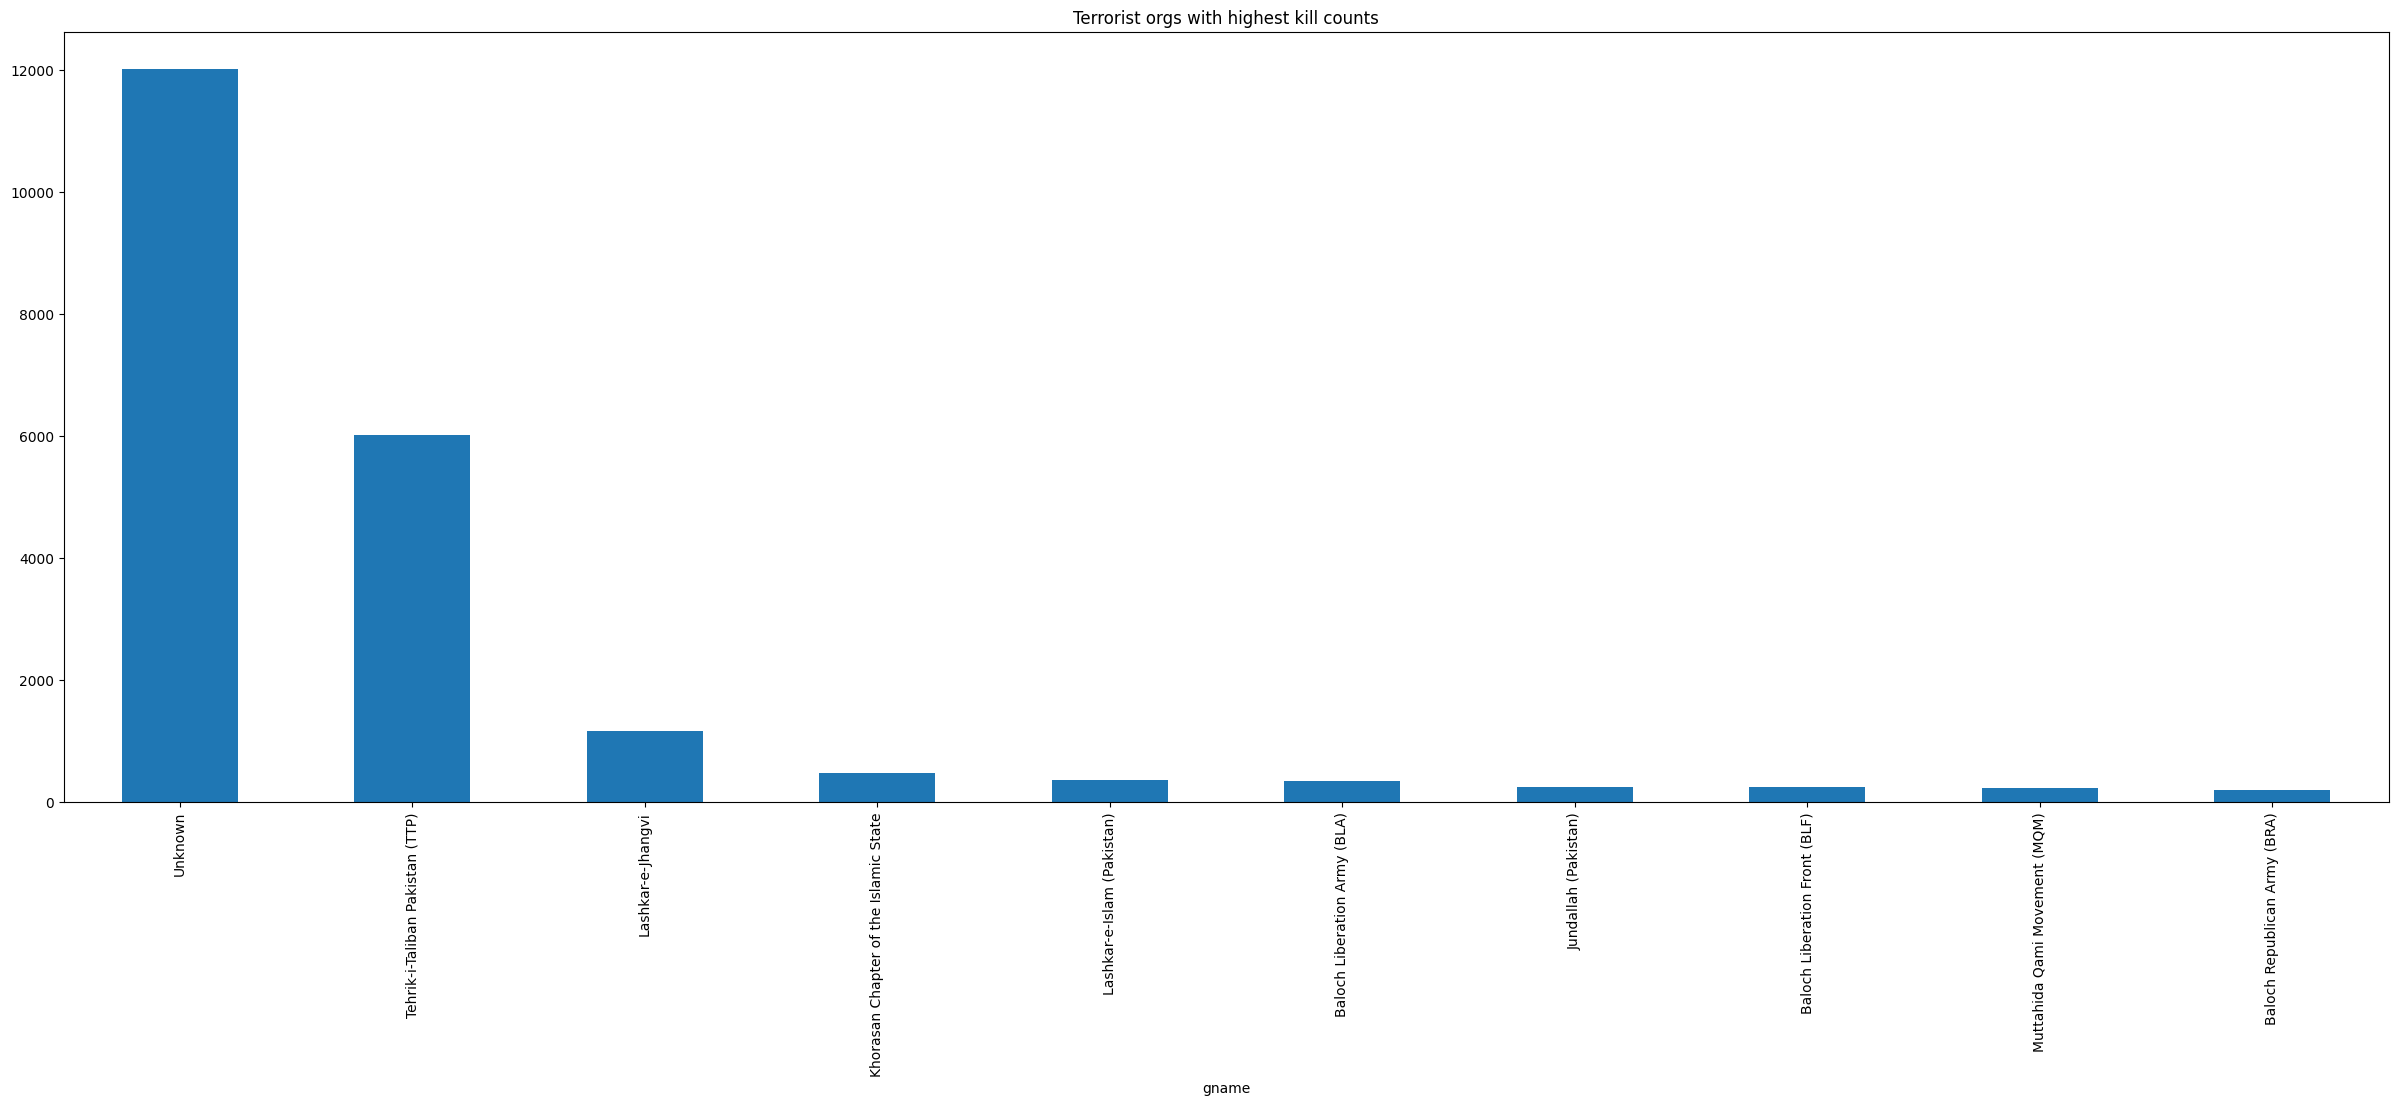

In [ ]:
pak_attacks.groupby(['gname']).nkill.sum().sort_values(ascending=False).head(10).plot(figsize=(30,10),title='Terrorist orgs with highest kill counts',kind='bar')

#United Kingdom

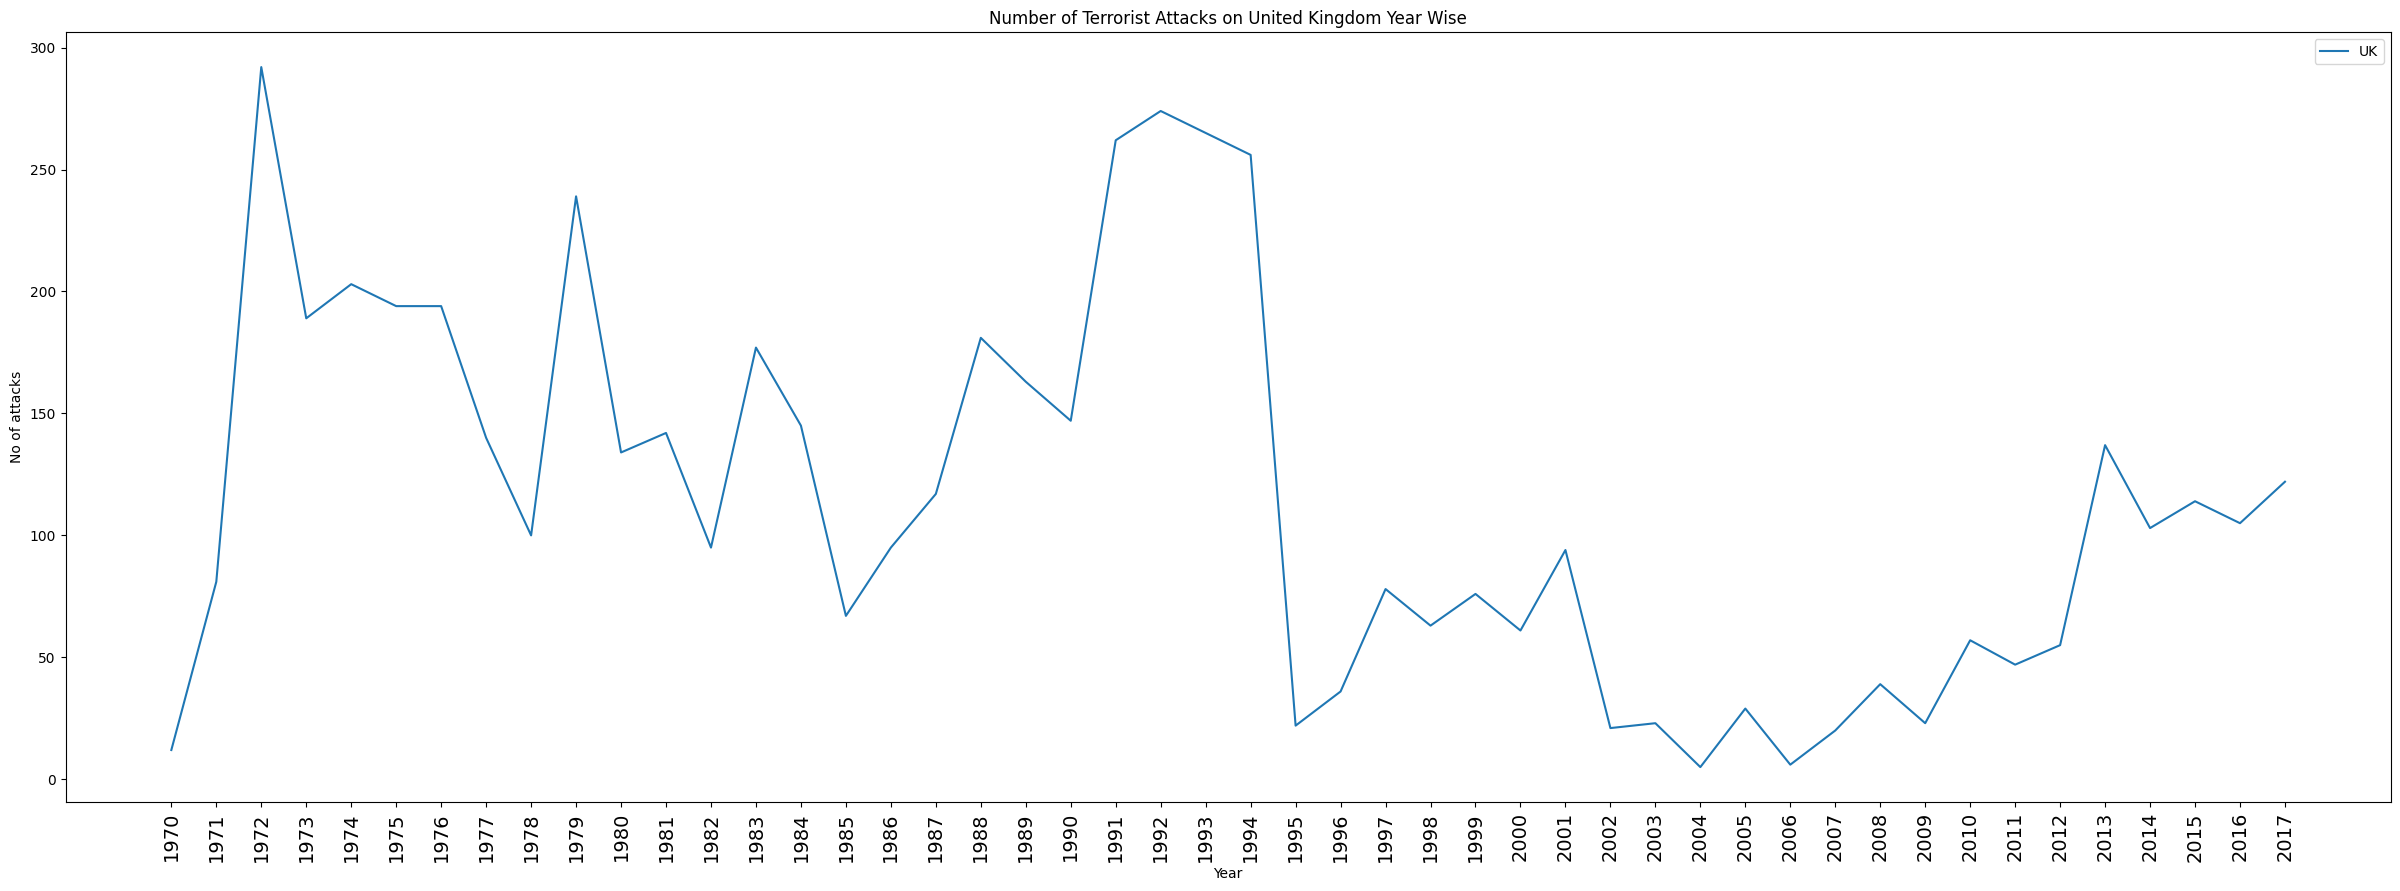

In [ ]:
EU_attacks=df[(df.country_txt=='United Kingdom')]
EU_attacks.sort_values(by='iyear')
eu=EU_attacks['iyear'].value_counts().sort_index().reset_index()
eu.columns=['Year','UK']
eu.plot(x='Year',y='UK',figsize=(30,10),title='Number of Terrorist Attacks on United Kingdom Year Wise',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
eu = eu.set_index('Year')

<Axes: title={'center': 'Targets'}>

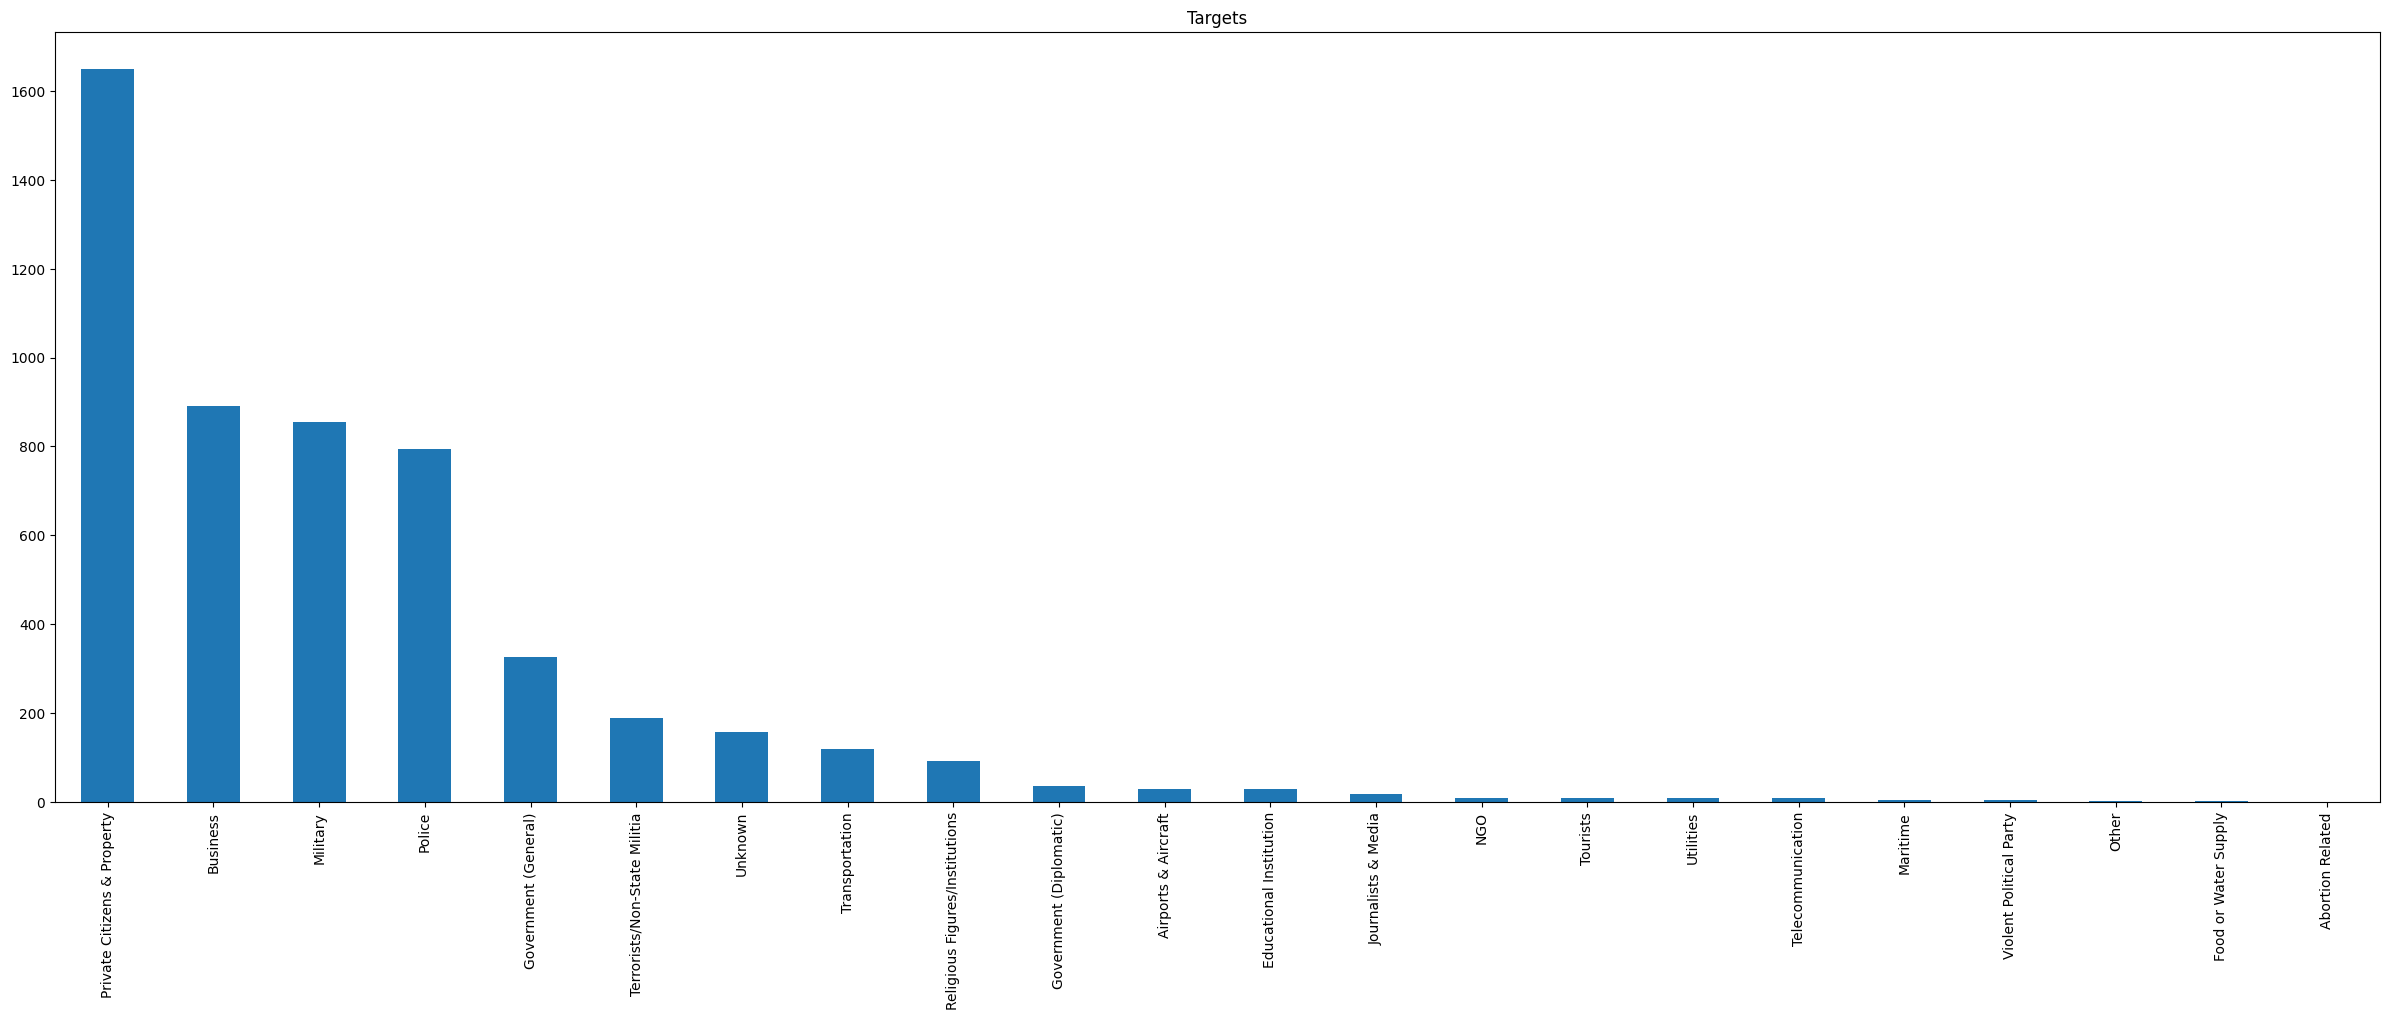

In [ ]:
EU_attacks.targtype1_txt.value_counts().plot(kind='bar',figsize=(30,10),title='Targets')

<Axes: title={'center': 'Deaths'}, xlabel='Year', ylabel='No of Deaths'>

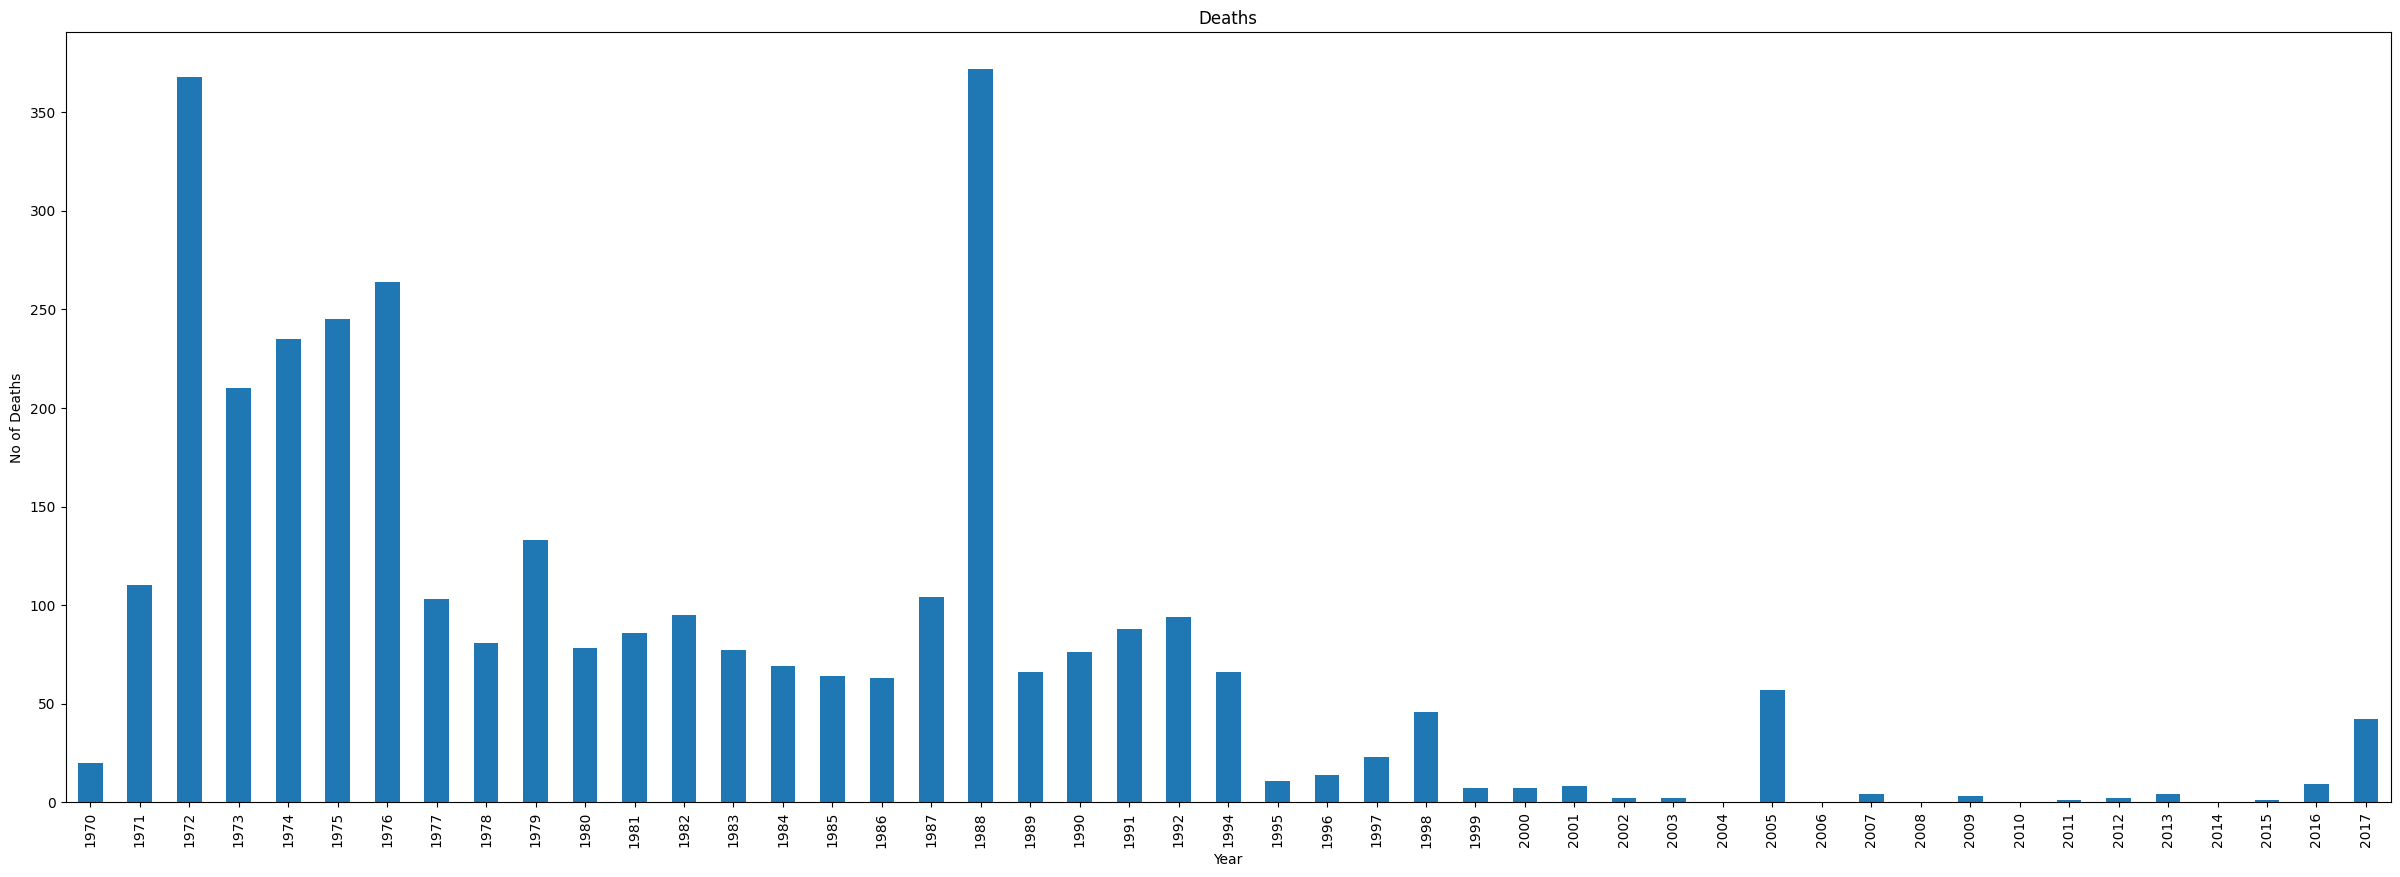

In [ ]:
EU_attacks.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Deaths',kind='bar',figsize=(30,10))

In [ ]:
EU_attacks.gname.unique()

array(['Irish Republican Army (IRA)', 'Ulster Volunteer Force (UVF)',
       'Jewish Defense League (JDL)', 'Protestant extremists',
       '1st of May Group', 'Irish Republican Extremists',
       'Official Irish Republican Army (OIRA)', 'Unknown',
       'Black September', 'Red Hand Commandos',
       'Ulster Freedom Fighters (UFF)', 'Black December',
       'Popular Front for the Liberation of Palestine (PFLP)',
       'National Front for the Liberation of Cuba (FLNC)',
       'Protestant Action Group', 'Red Flag',
       'Irish National Liberation Army (INLA)',
       "People's Liberation Army (Northern Ireland)",
       'Soldiers of the Algerian Opposition', 'Republican Action Force',
       'Army for Freeing Scotland', 'Armenians',
       'Arab Revolutionary Army', 'Column 88',
       'Justice Commandos for the Armenian Genocide', 'Palestinians',
       'Guerrillas', 'Armenian Secret Army for the Liberation of Armenia',
       'May 15 Organization for the Liberation of Palestine'

<Axes: title={'center': 'Terrorist Orgs'}>

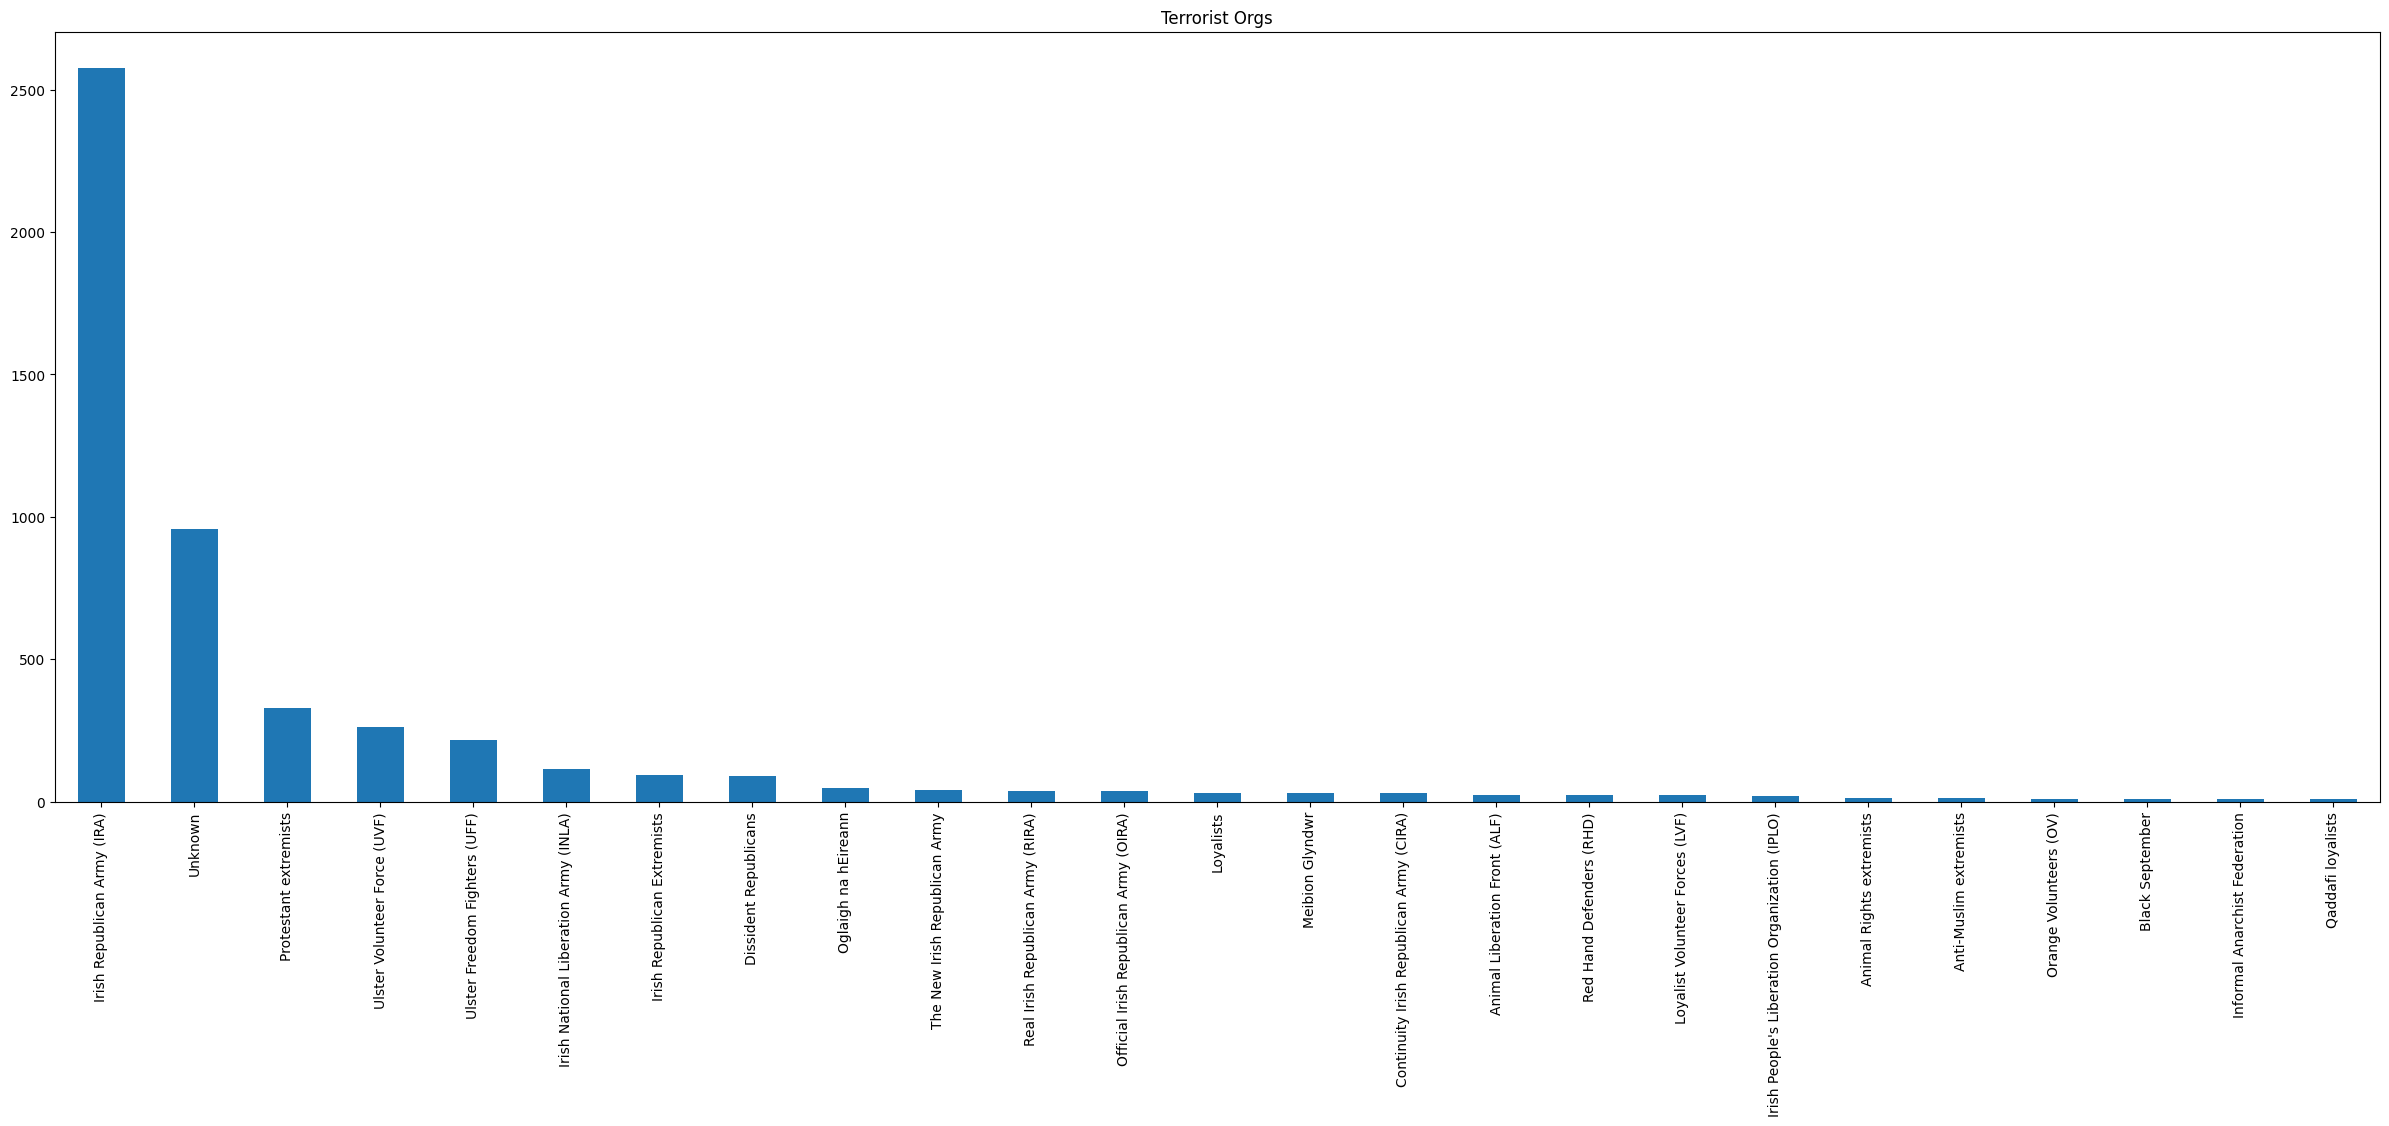

In [ ]:
EU_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Terrorist orgs with highest kill counts'}, xlabel='gname'>

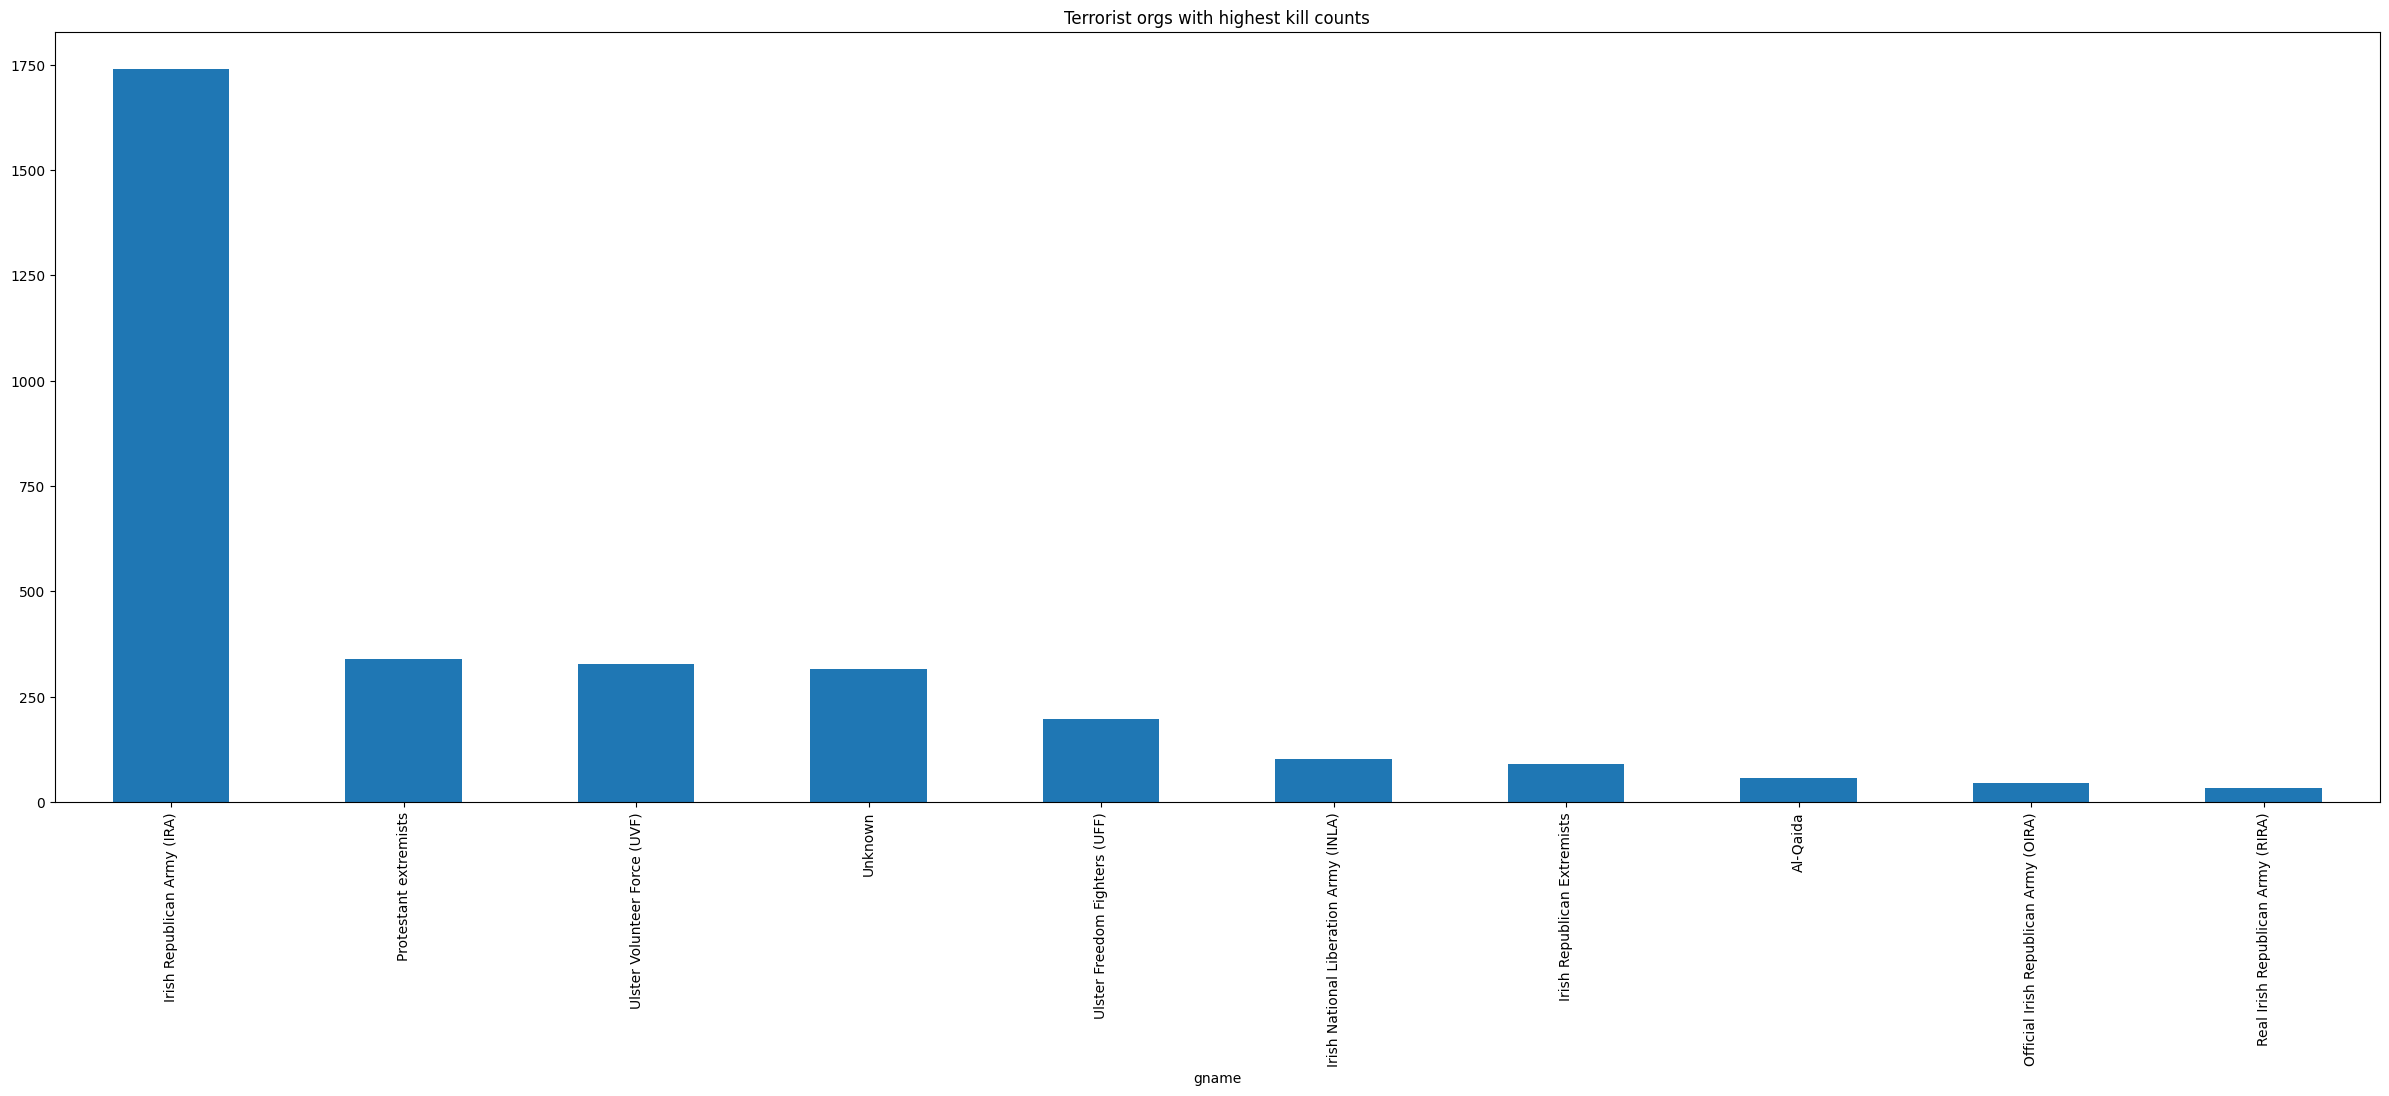

In [ ]:
EU_attacks.groupby(['gname']).nkill.sum().sort_values(ascending=False).head(10).plot(figsize=(30,10),title='Terrorist orgs with highest kill counts',kind='bar')

<Axes: title={'center': 'States'}>

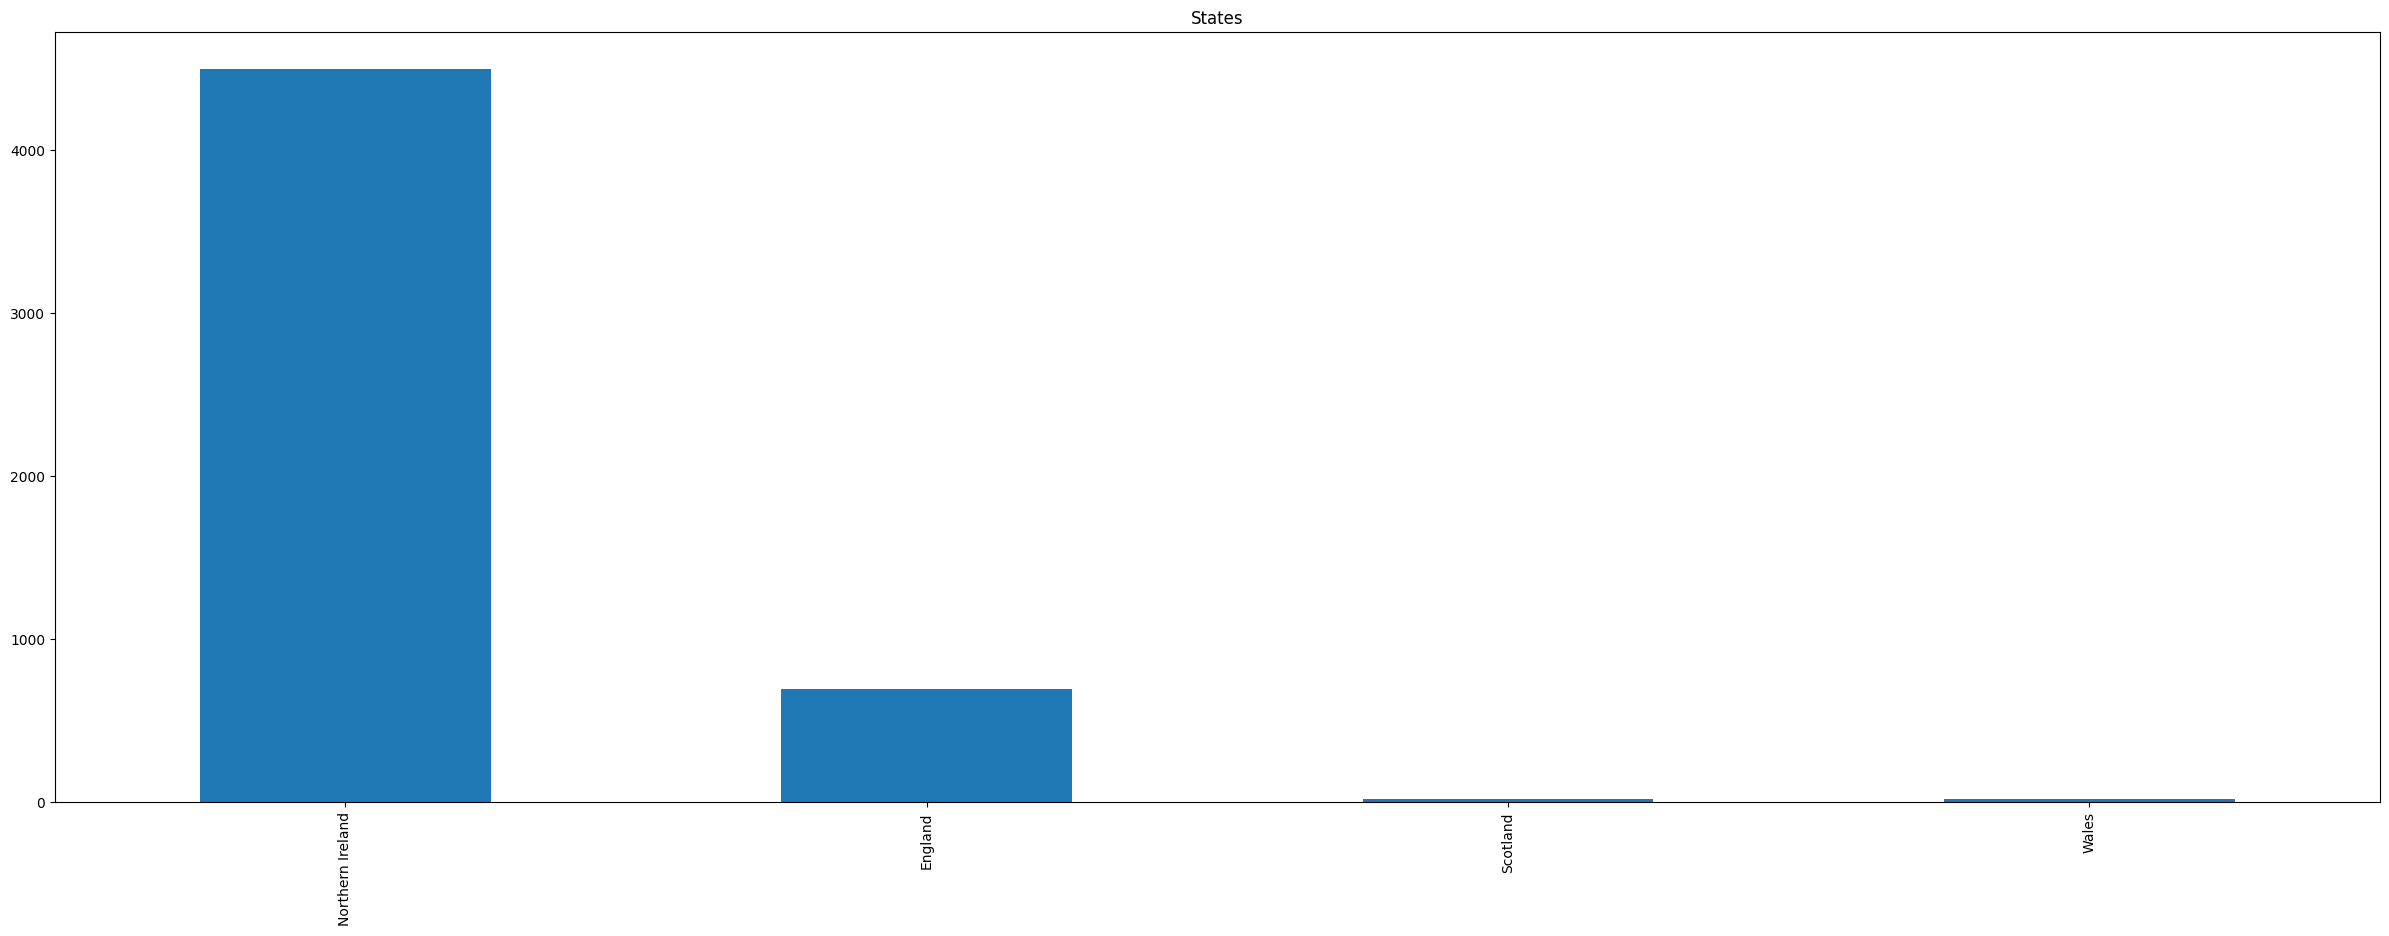

In [ ]:
EU_attacks.provstate.value_counts().plot(figsize=(30,10),title='States',kind='bar')

<Axes: title={'center': 'Attack Type'}>

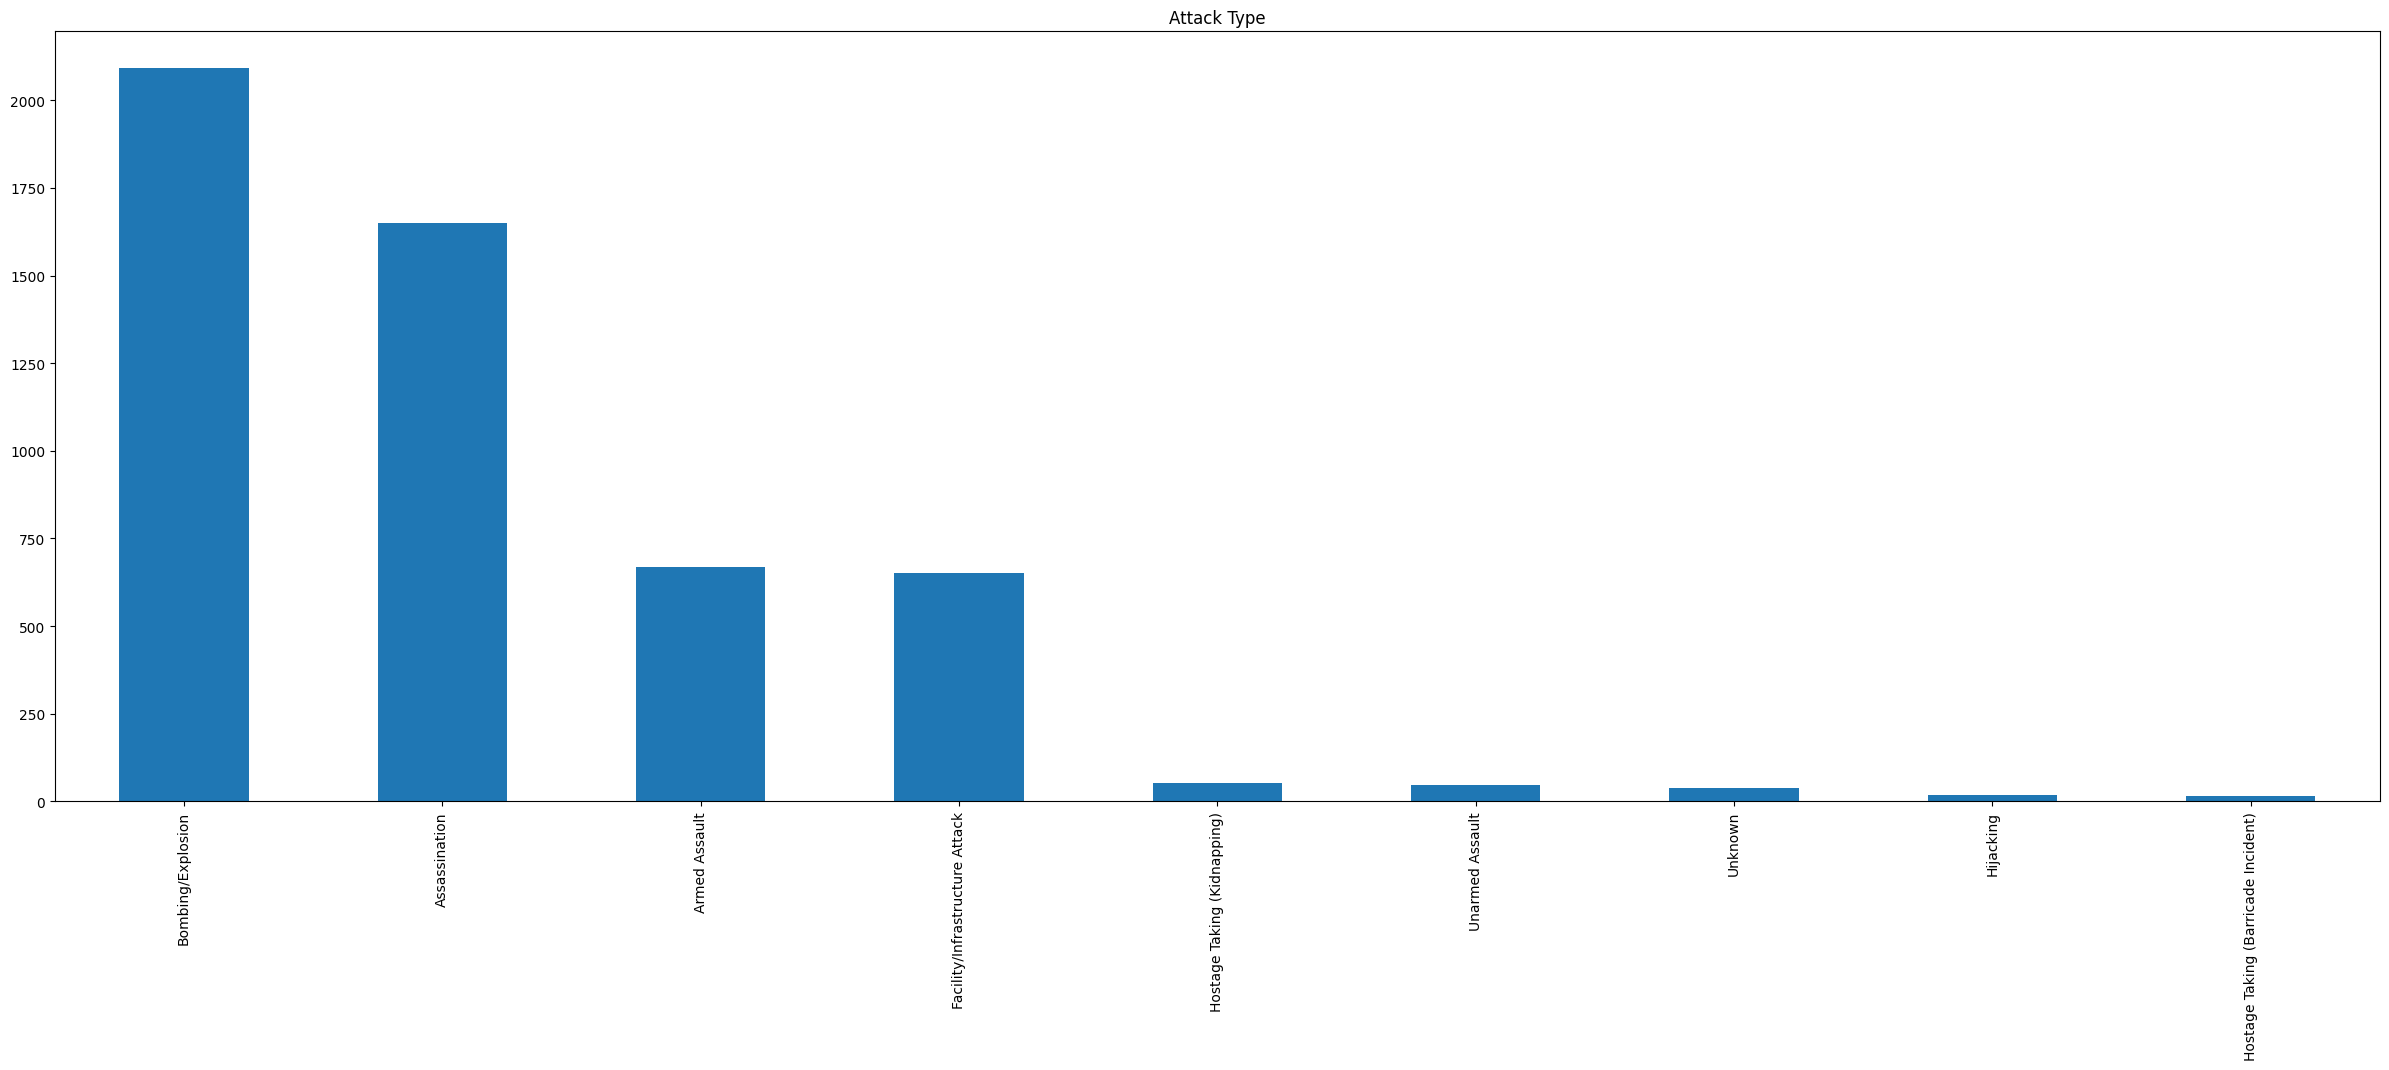

In [ ]:
EU_attacks.attacktype1_txt.value_counts().plot(figsize=(30,10),title='Attack Type',kind='bar')

<Axes: title={'center': 'Weapons Used'}>

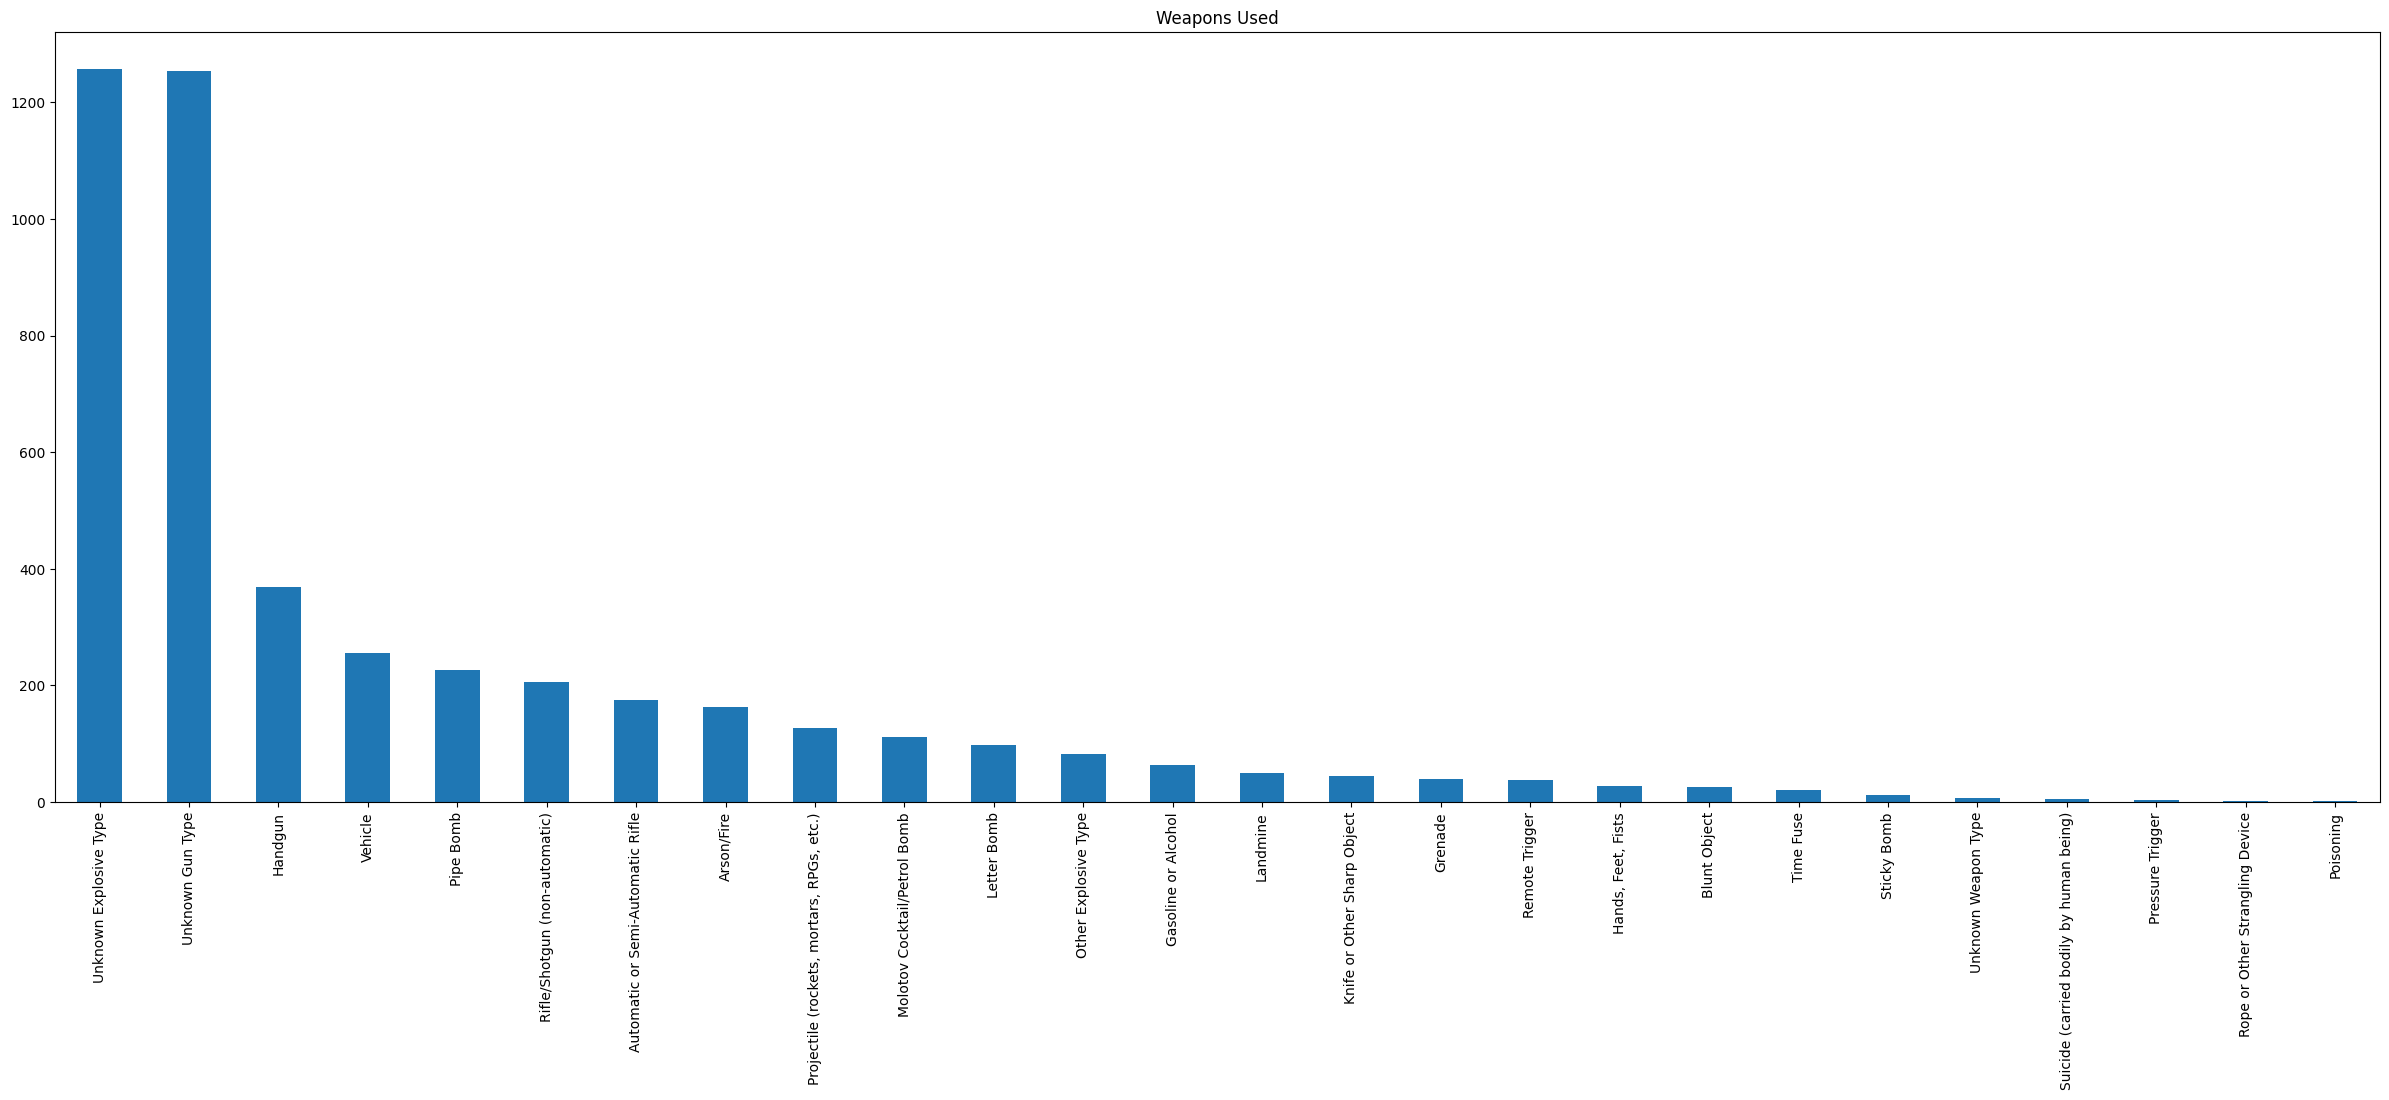

In [ ]:
EU_attacks.weapsubtype1_txt.value_counts().plot(figsize=(30,10),title='Weapons Used',kind='bar')

#Iraq

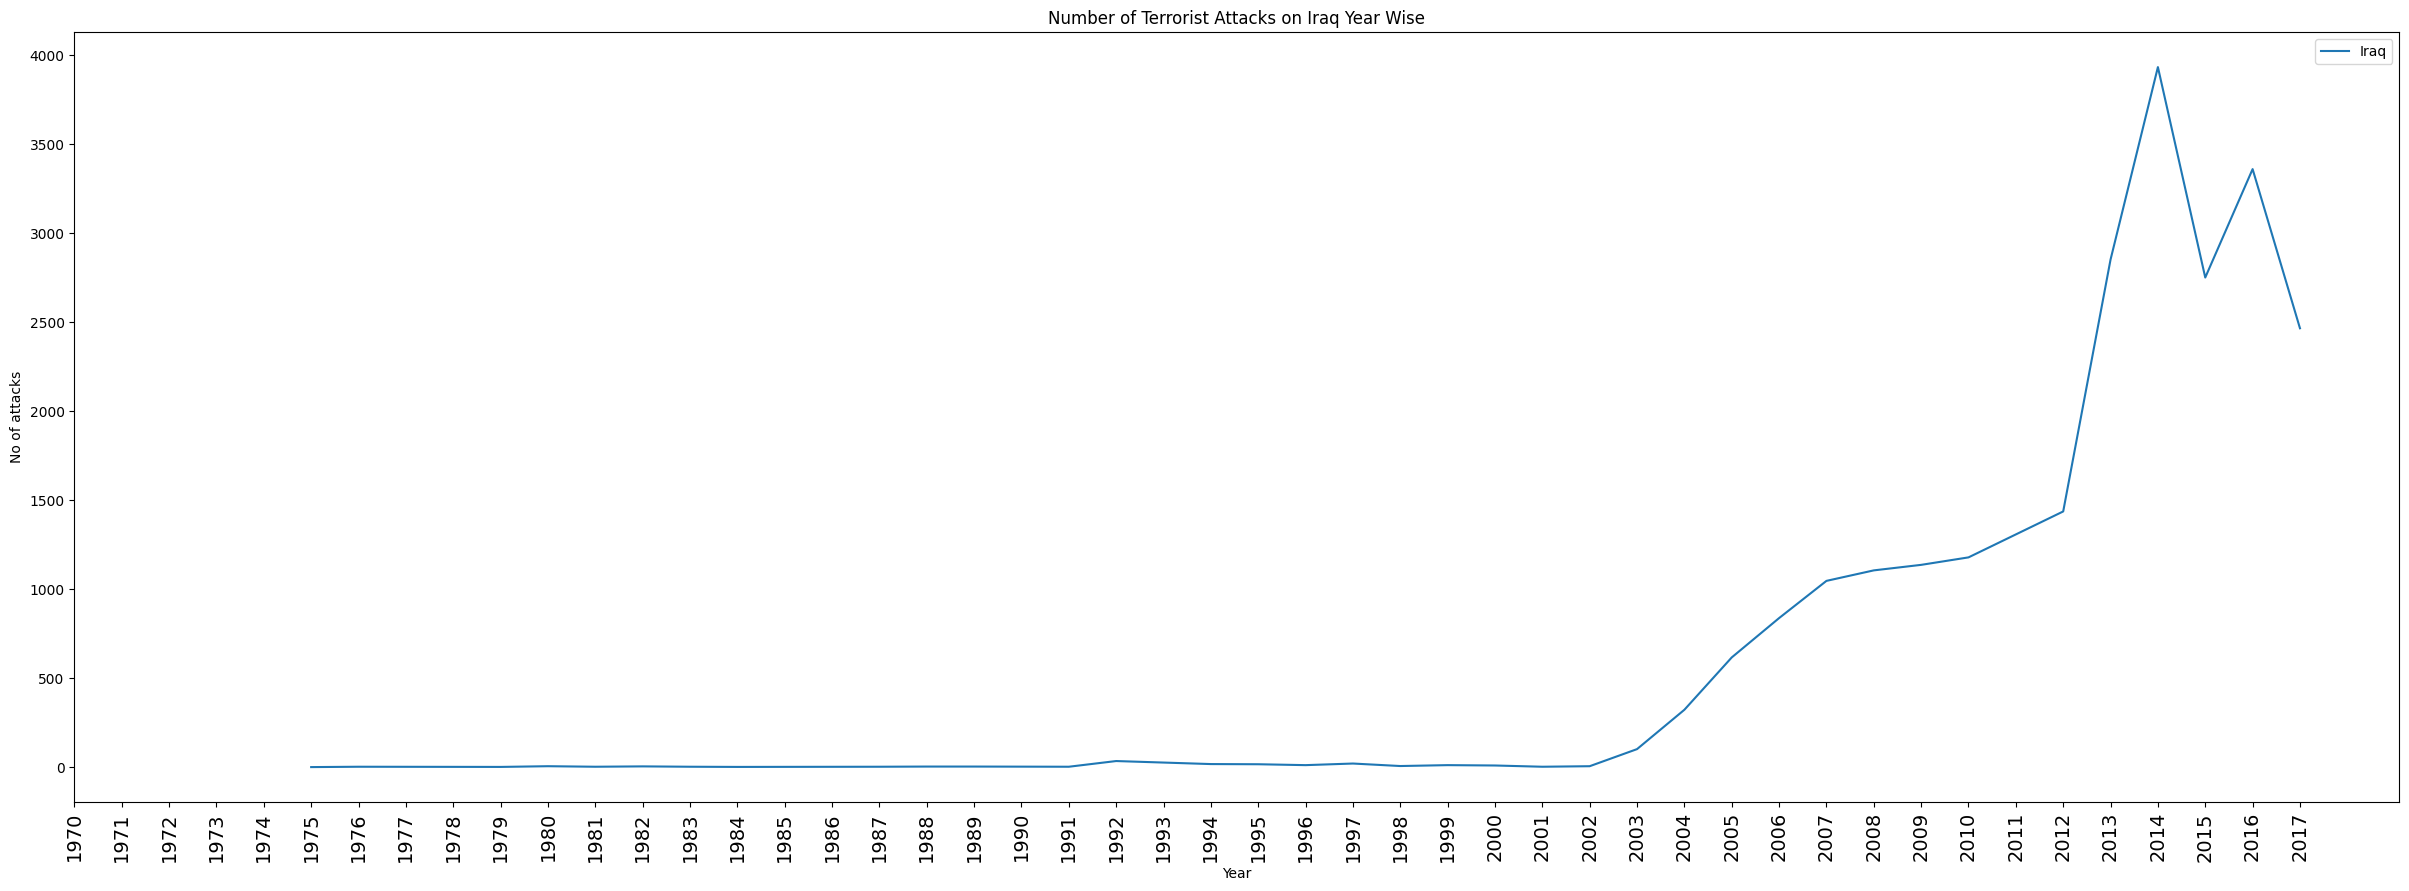

In [ ]:
Me_attacks=df[(df.country_txt=='Iraq')]
Me_attacks.sort_values(by='iyear')
me=Me_attacks['iyear'].value_counts().sort_index().reset_index()
me.columns=['Year','Iraq']
me.plot(x='Year',y='Iraq',figsize=(30,10),title='Number of Terrorist Attacks on Iraq Year Wise',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
me= me.set_index('Year')

<Axes: title={'center': 'Targets'}>

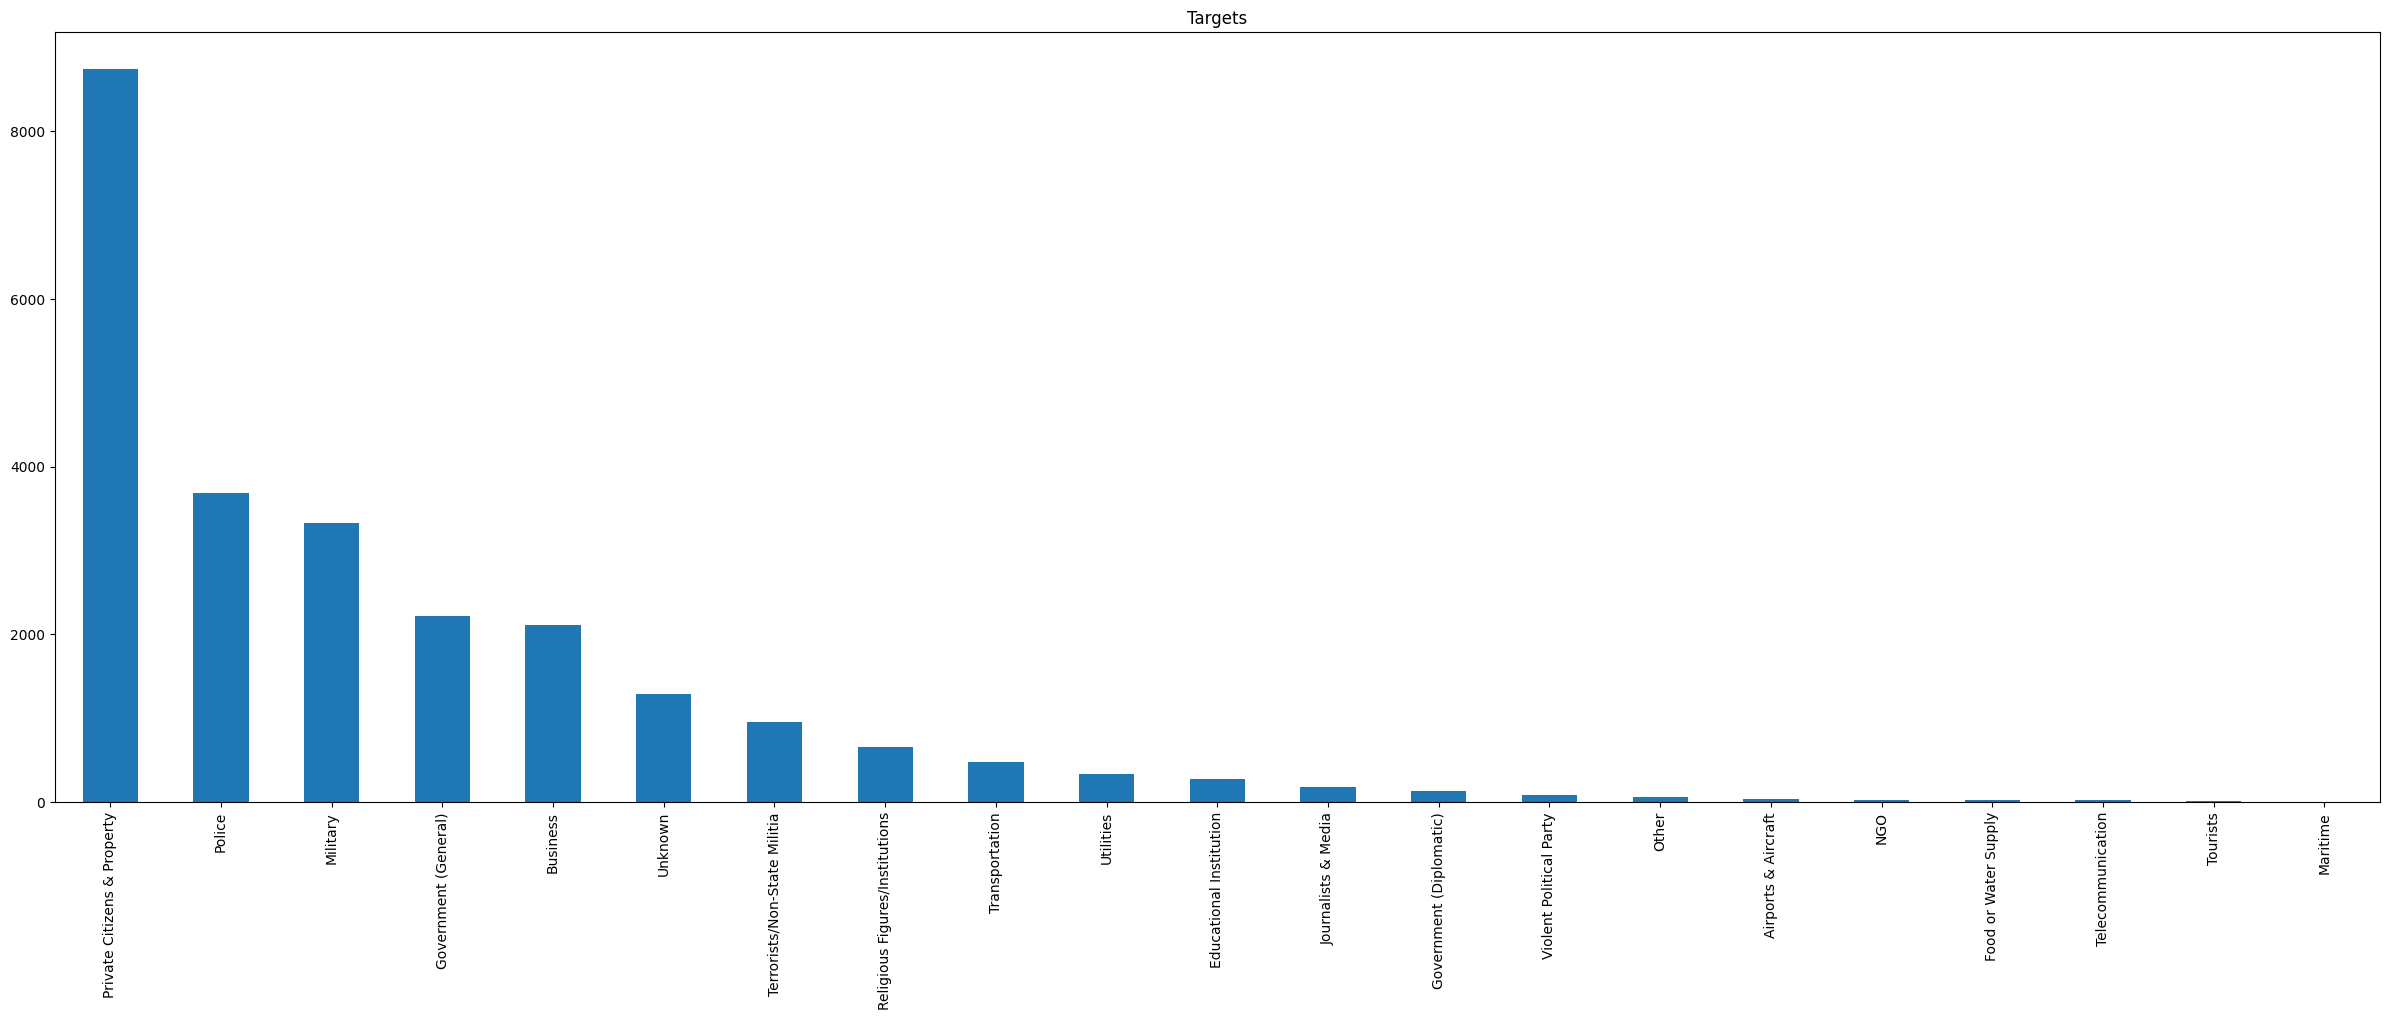

In [ ]:
Me_attacks.targtype1_txt.value_counts().plot(kind='bar',figsize=(30,10),title='Targets')

<Axes: title={'center': 'Deaths'}, xlabel='Year', ylabel='No of Deaths'>

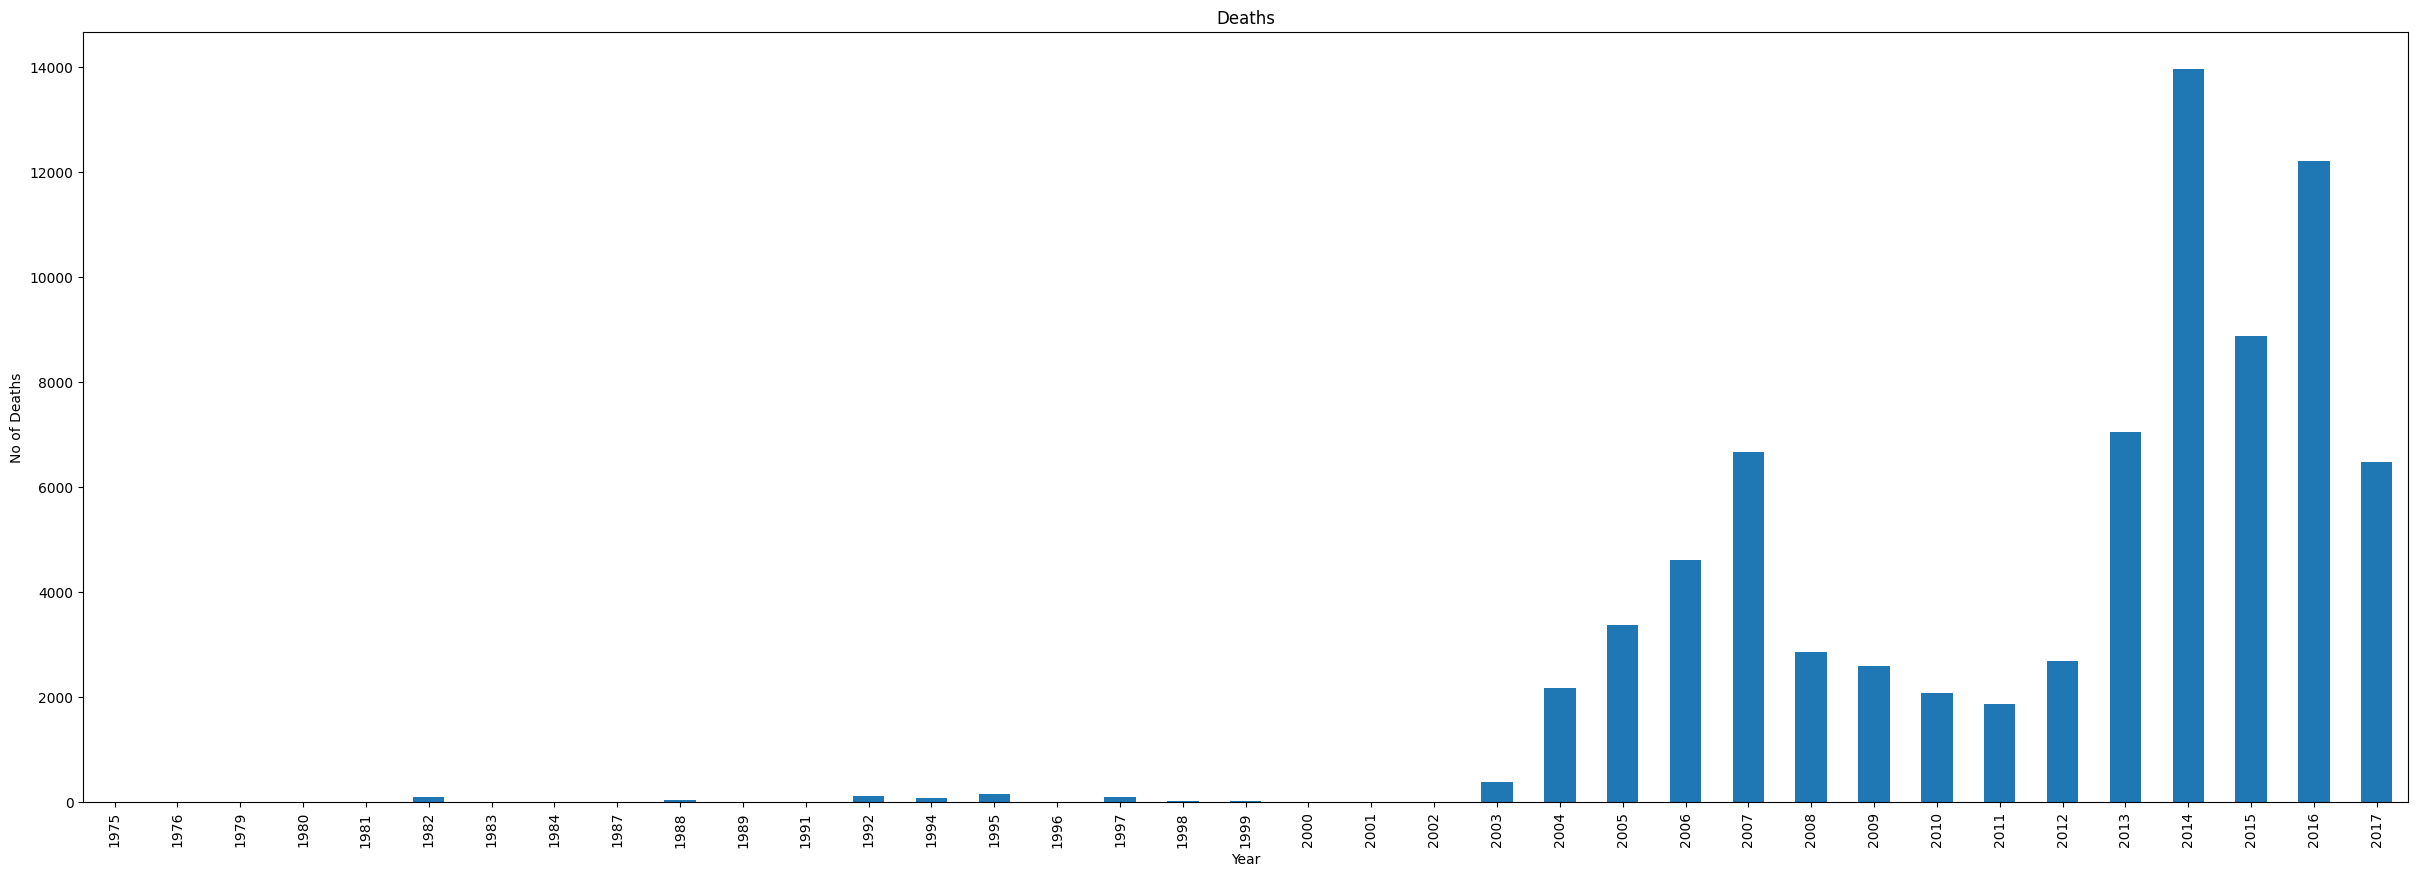

In [ ]:
Me_attacks.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Deaths',kind='bar',figsize=(30,10))

In [ ]:
Me_attacks.gname.unique()

array(['Unknown', 'Kurdish Democratic Party-Iraq (KDP)',
       'Barzani Guerrillas', 'Shia Muslim extremists', 'Iraqi Mujahideen',
       "Al-Da'wah Party", 'Unified Kurdish Socialist Party',
       'Patriotic Union of Kurdistan (PUK)', 'Kurds', 'Iraqi extremists',
       "Martyr Abu Ja'far Group", 'Kurdistan National Union',
       'Kurdish Peshmerga Guerrillas', 'Mujahedin-e Khalq (MEK)',
       'Hamawand Tribe', 'Islamic Mujahidin',
       'Islamic Salvation Front (FIS)',
       'Anti Kurdish Workers Party Iraq nationals',
       'Supreme Council for Islamic Revolution in Iraq (SCIRI)',
       'Iraqi Revolutionary Forces', "Kurdistan Workers' Party (PKK)",
       'Iraqi Islamic Vanguards for National Salvation (IIVNS)',
       'Iraqi National Congress (INC)', 'Islamist extremists',
       'National Accord Movement', 'Abu Nidal Organization (ANO)',
       'Muslim extremists', 'Ansar al-Islam',
       'Armed Vanguards of a Second Mohammed Army', 'Tawhid and Jihad',
       'Al-Qaida i

<Axes: title={'center': 'Terrorist Orgs'}>

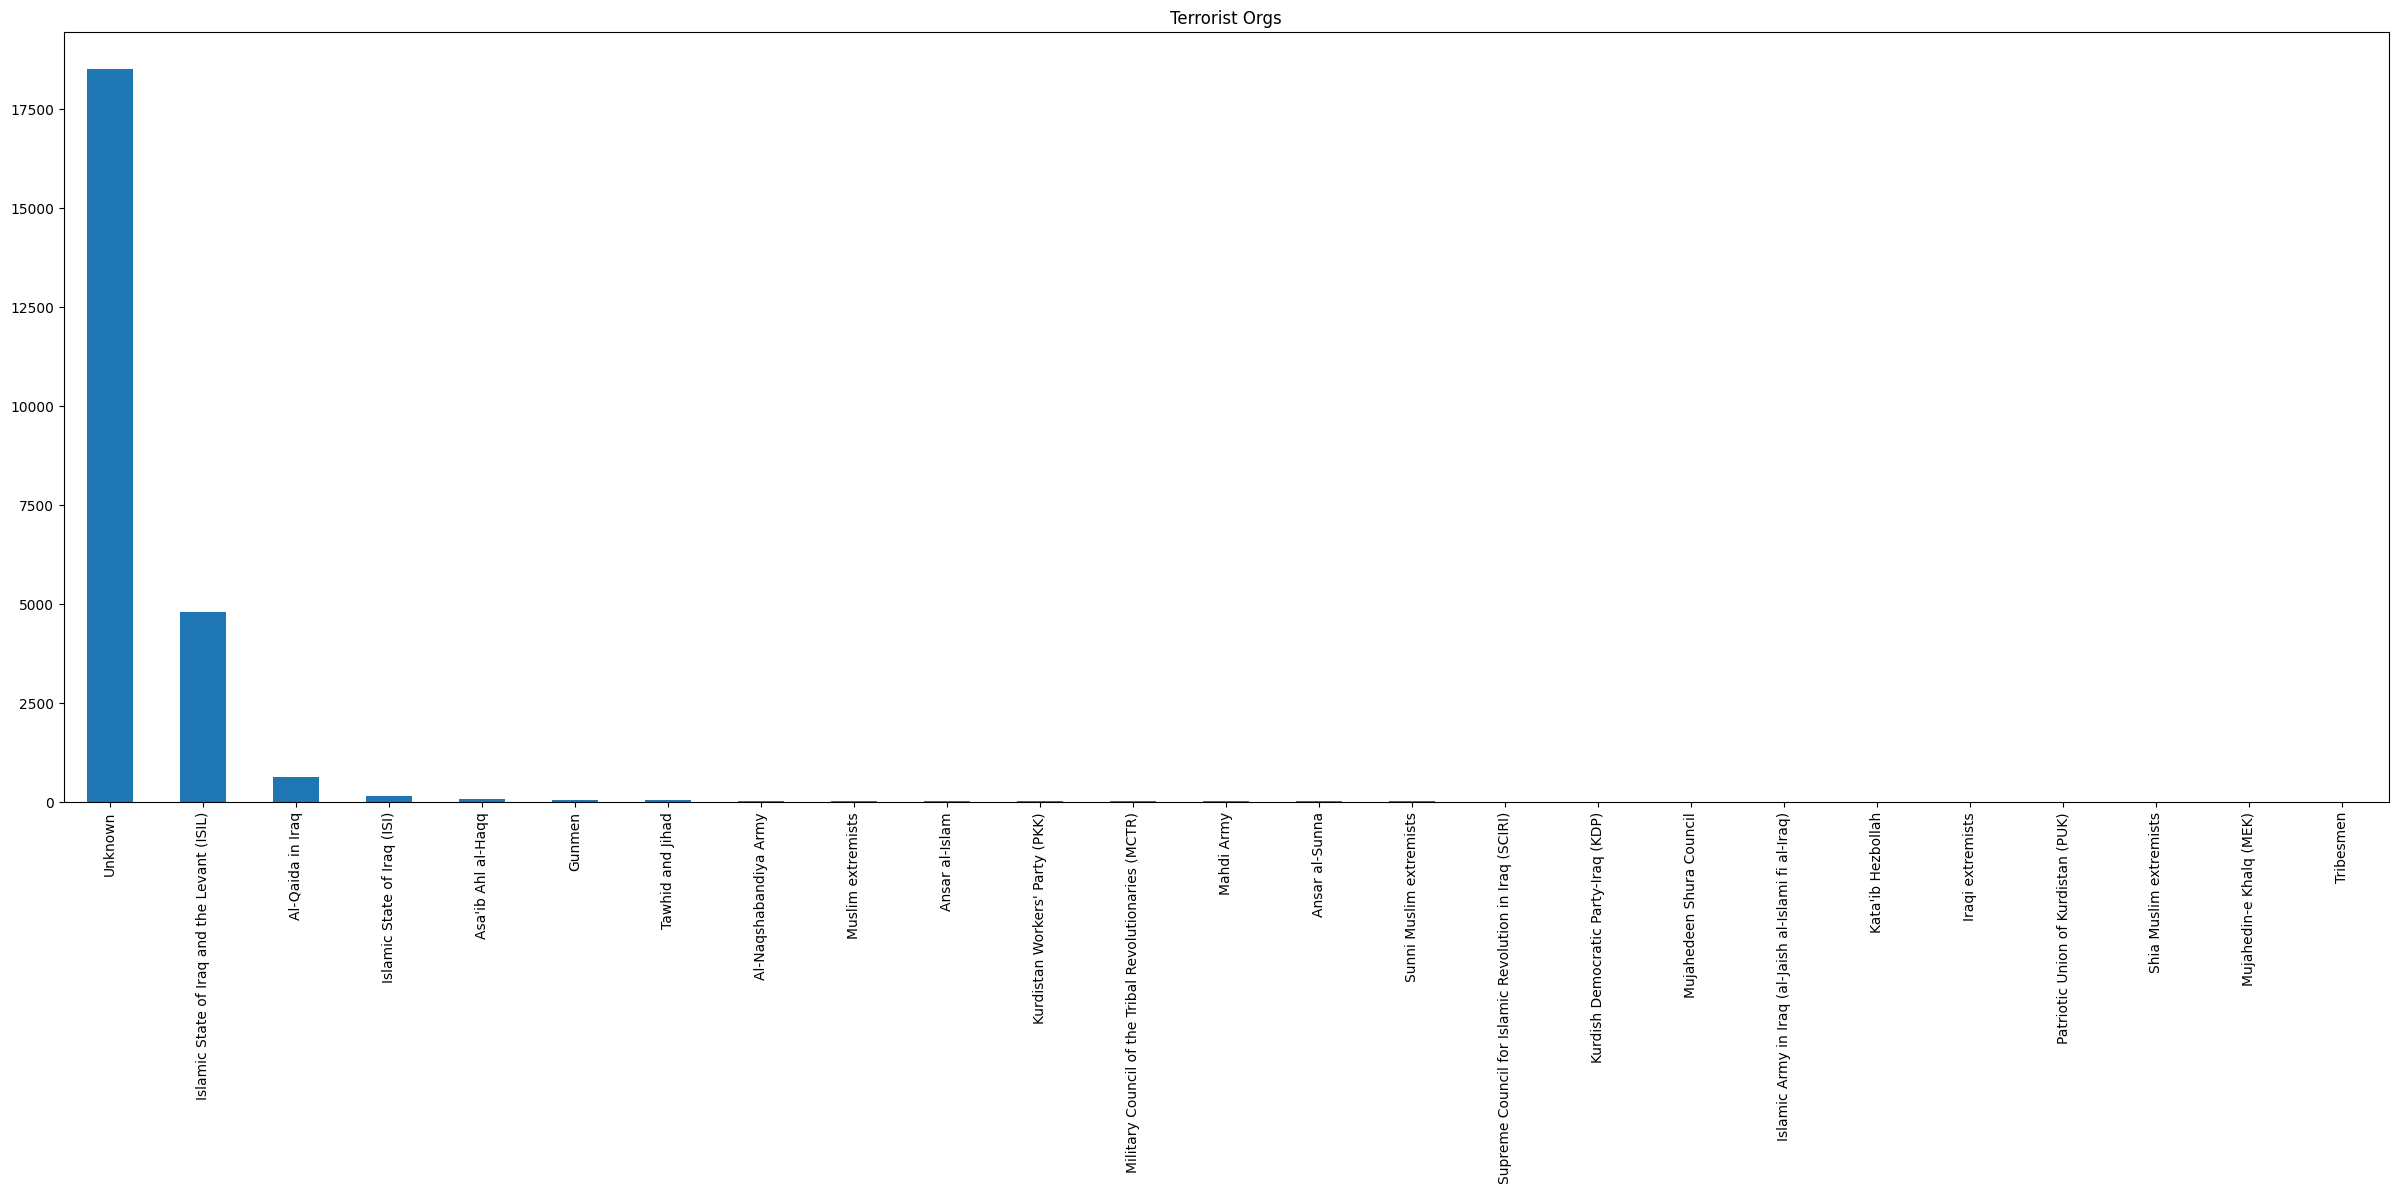

In [ ]:
Me_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Attack Type'}>

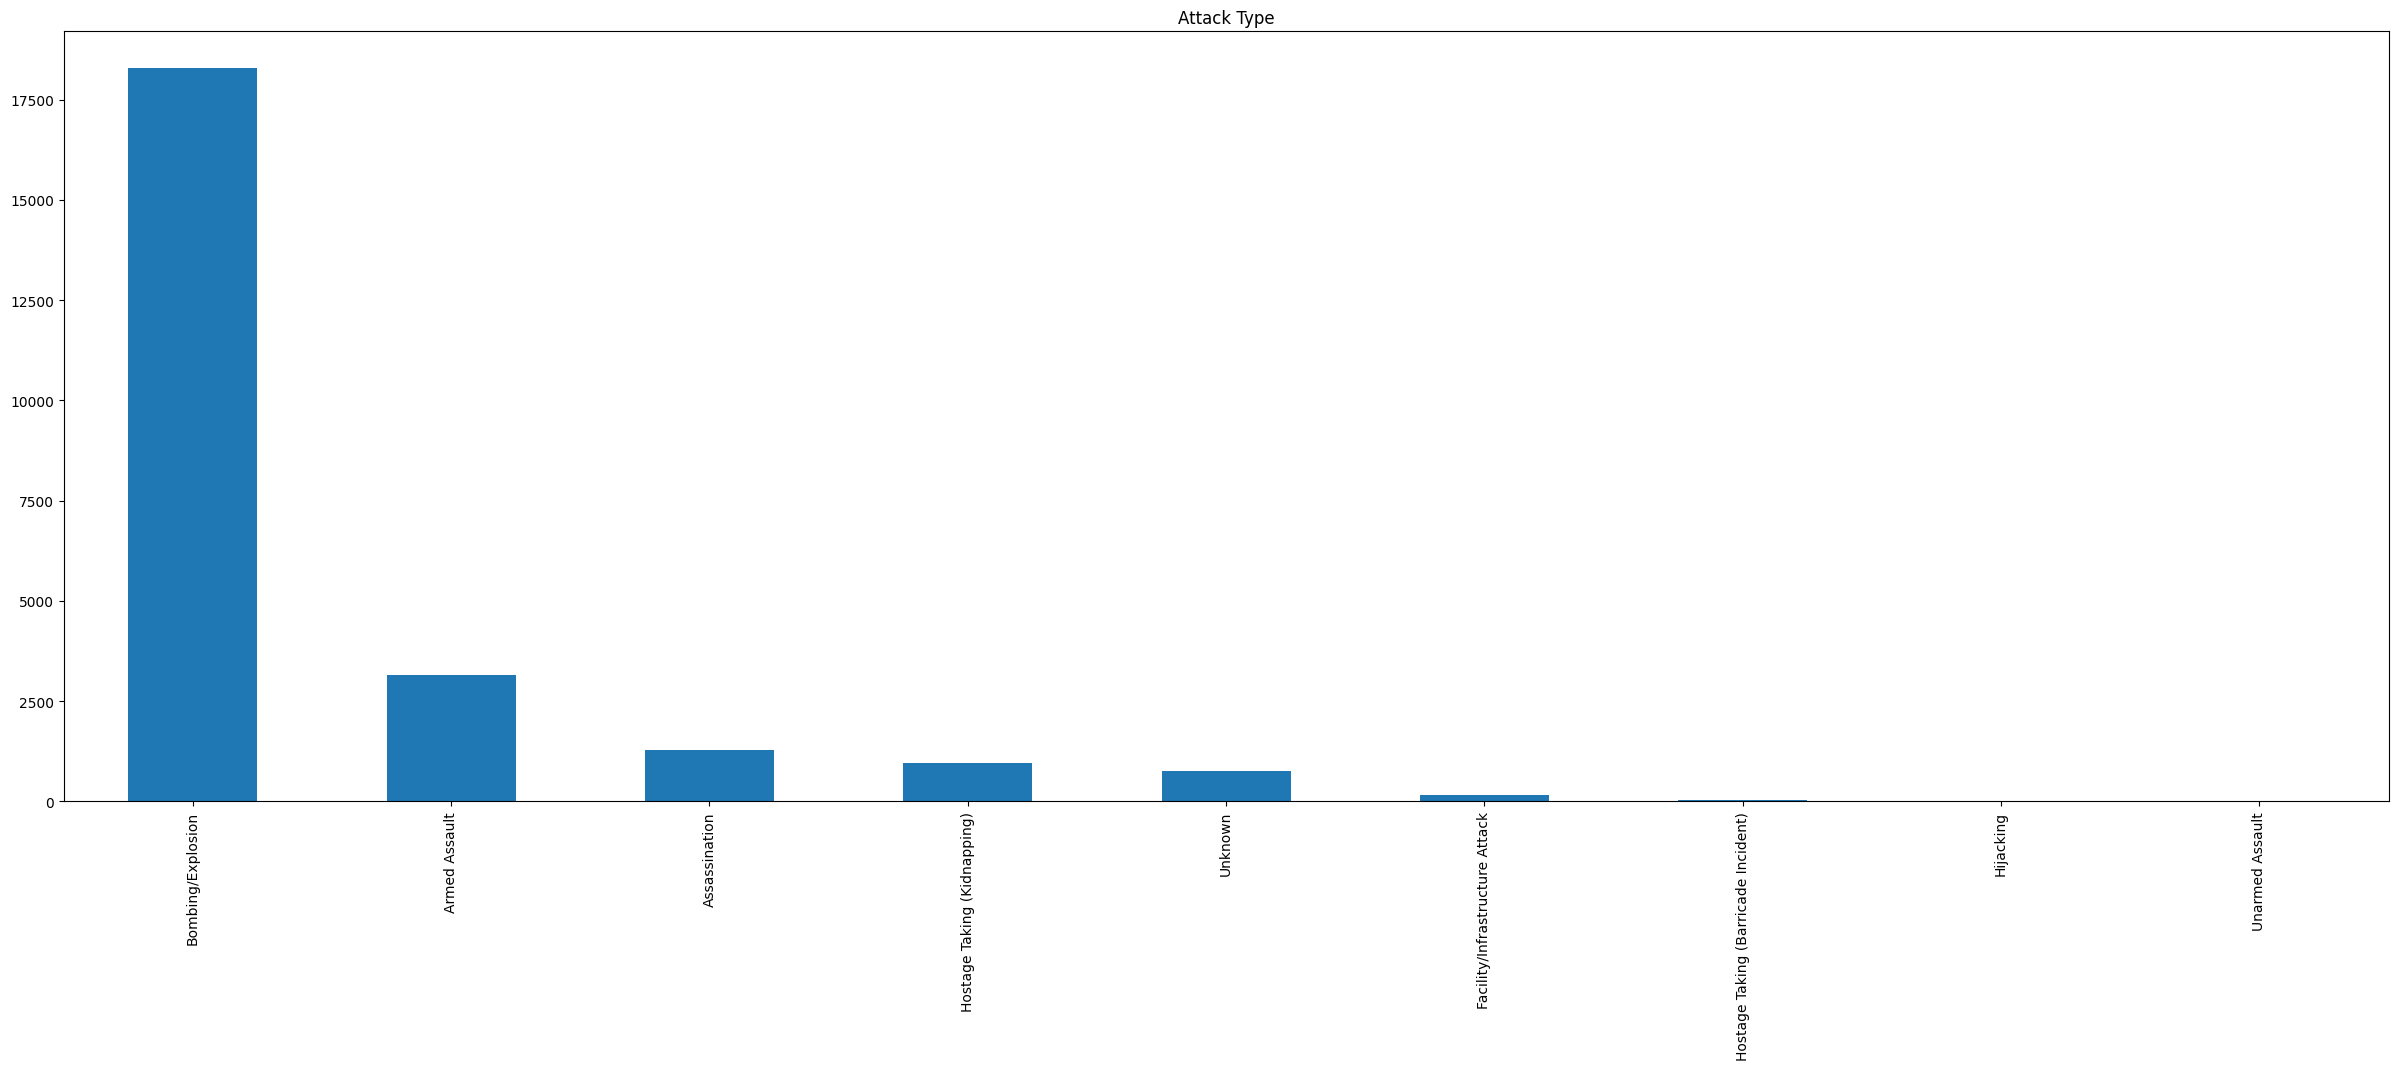

In [ ]:
Me_attacks.attacktype1_txt.value_counts().plot(figsize=(30,10),title='Attack Type',kind='bar')

<Axes: title={'center': 'Weapons Used'}>

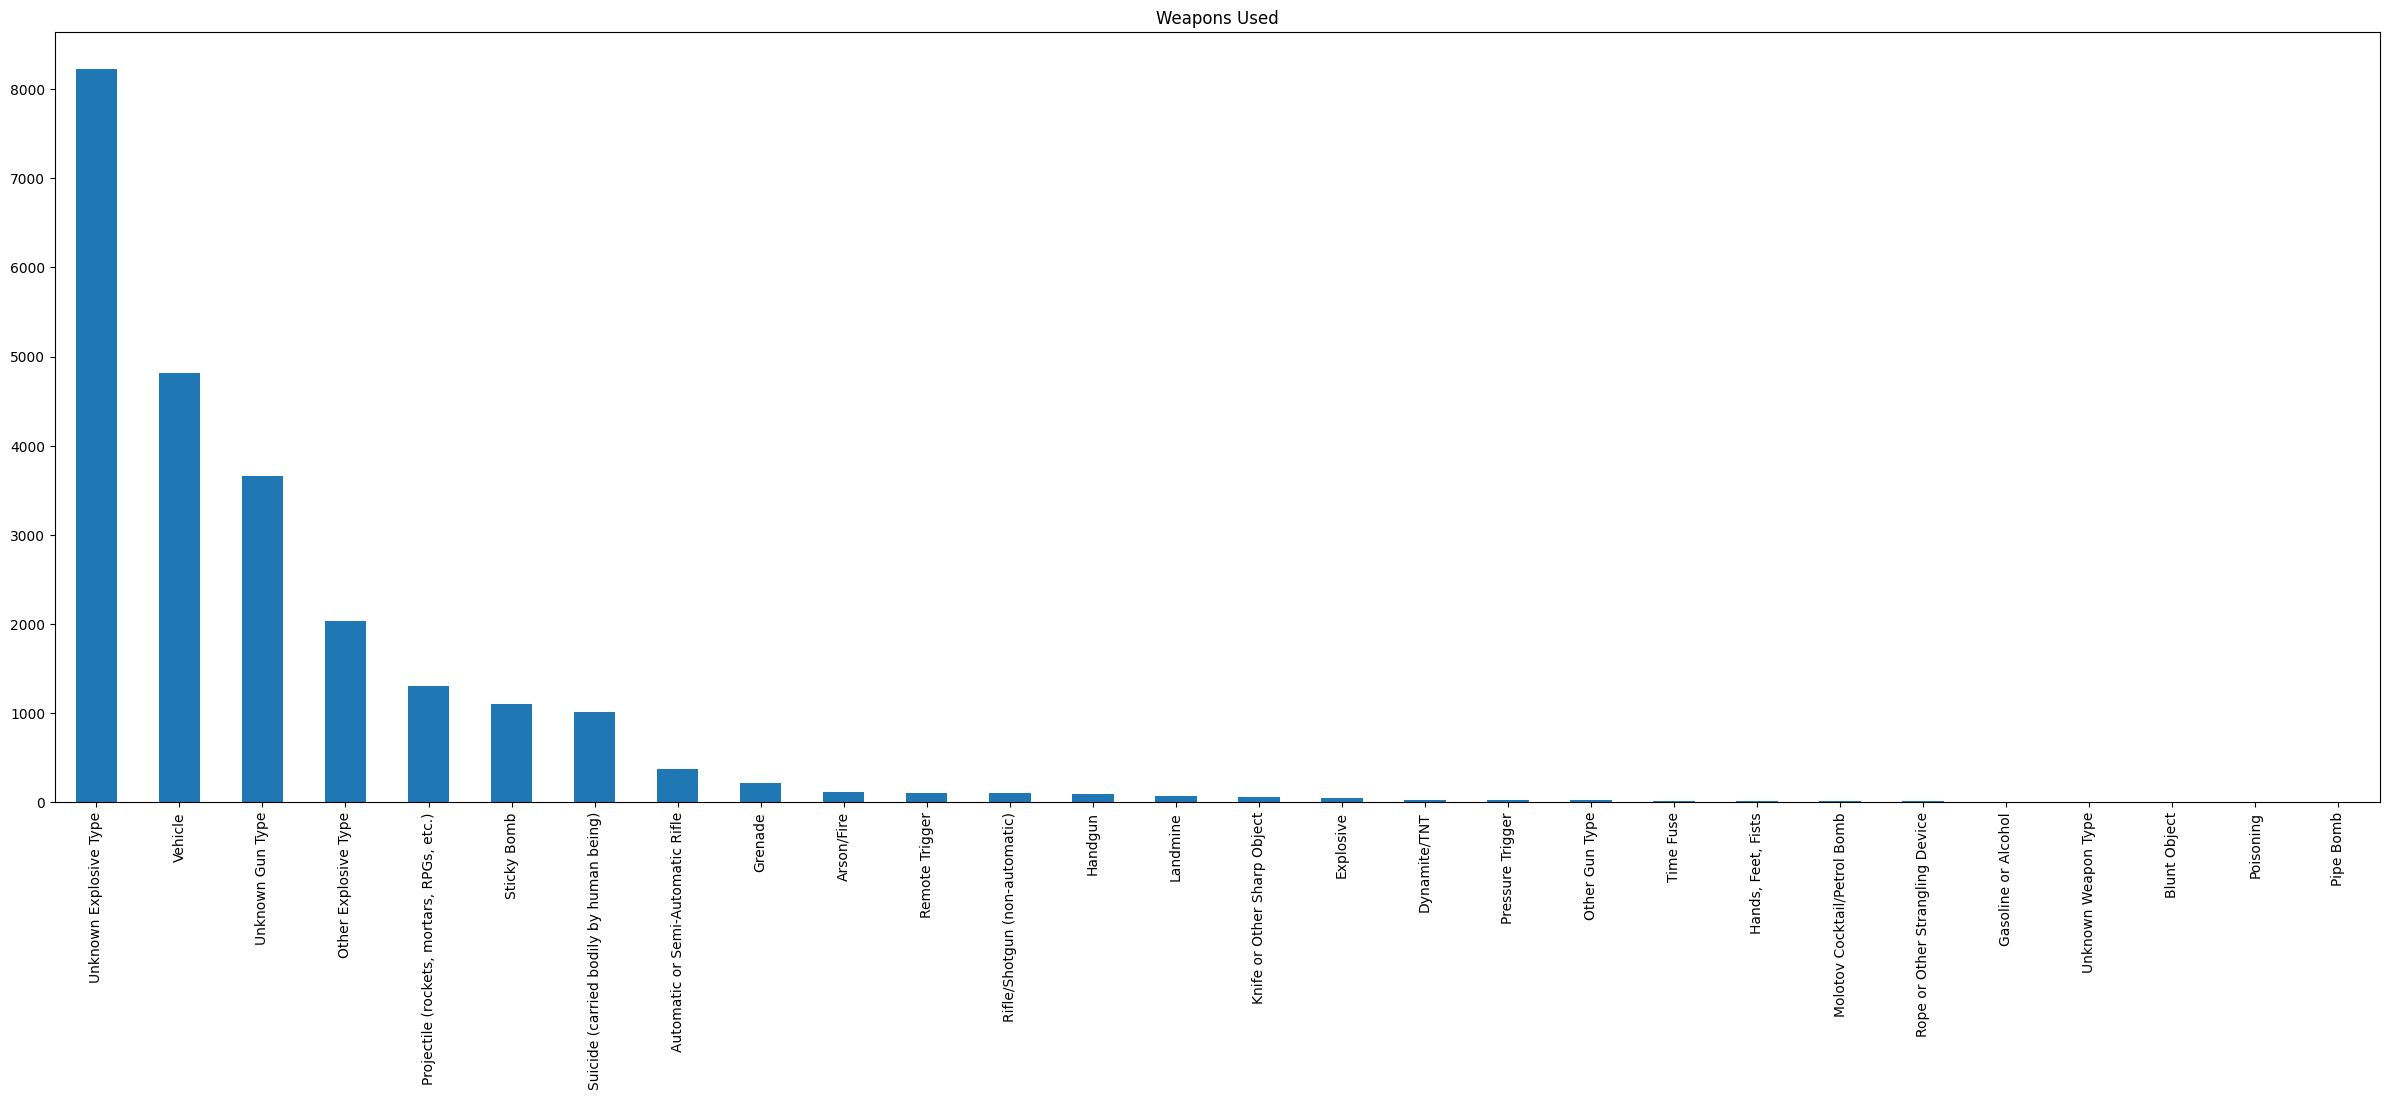

In [ ]:
Me_attacks.weapsubtype1_txt.value_counts().plot(figsize=(30,10),title='Weapons Used',kind='bar')

<Axes: title={'center': 'Terrorist Orgs'}>

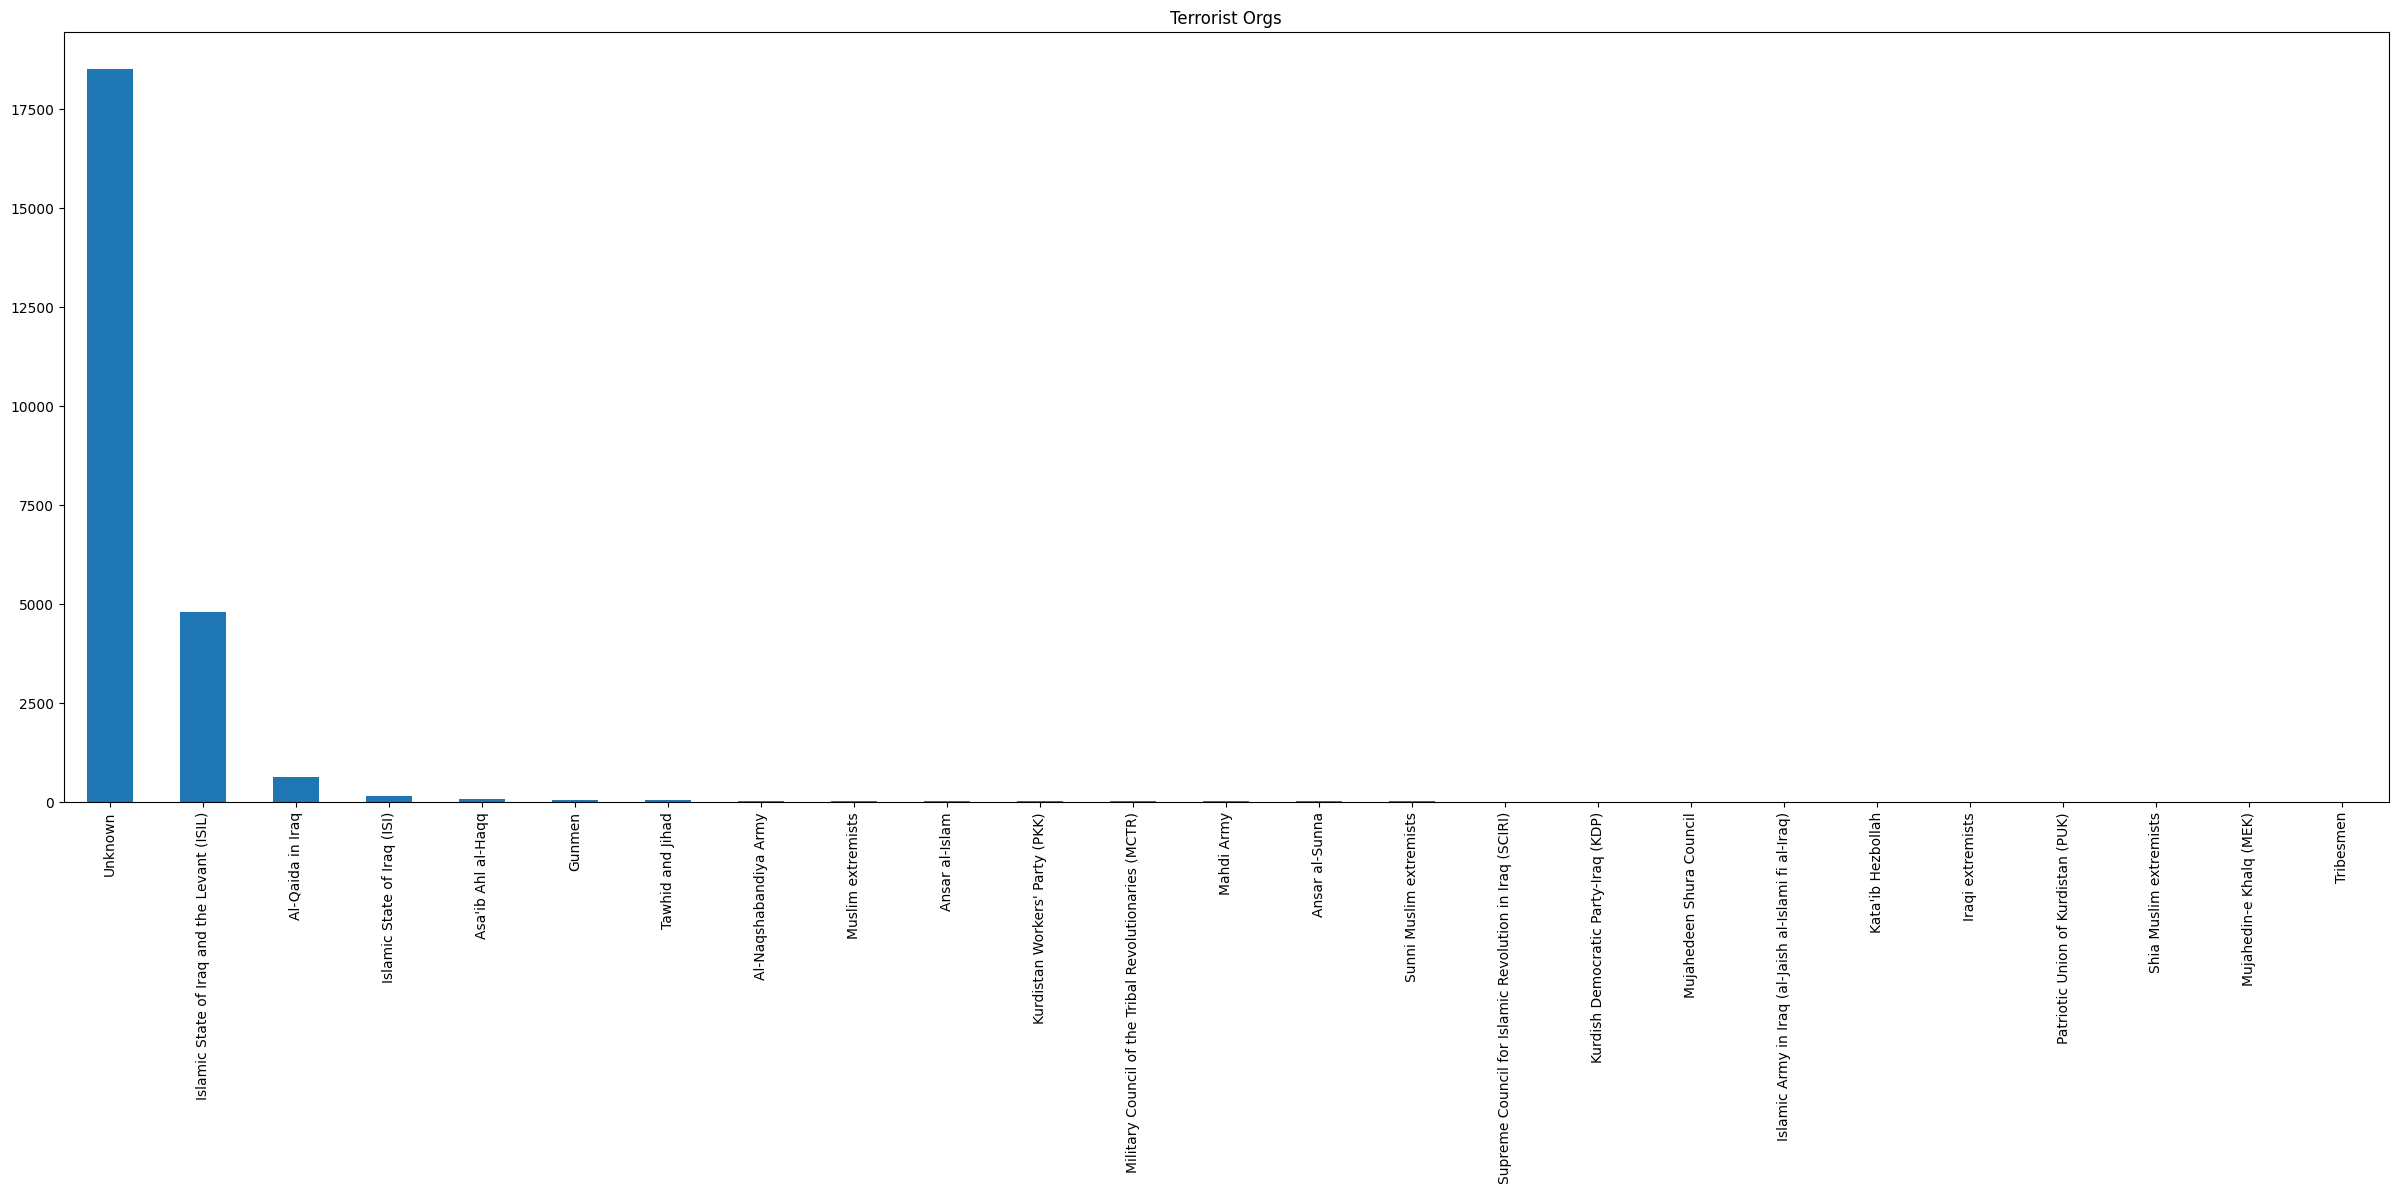

In [ ]:
Me_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Terrorist orgs with highest kill counts'}, xlabel='gname'>

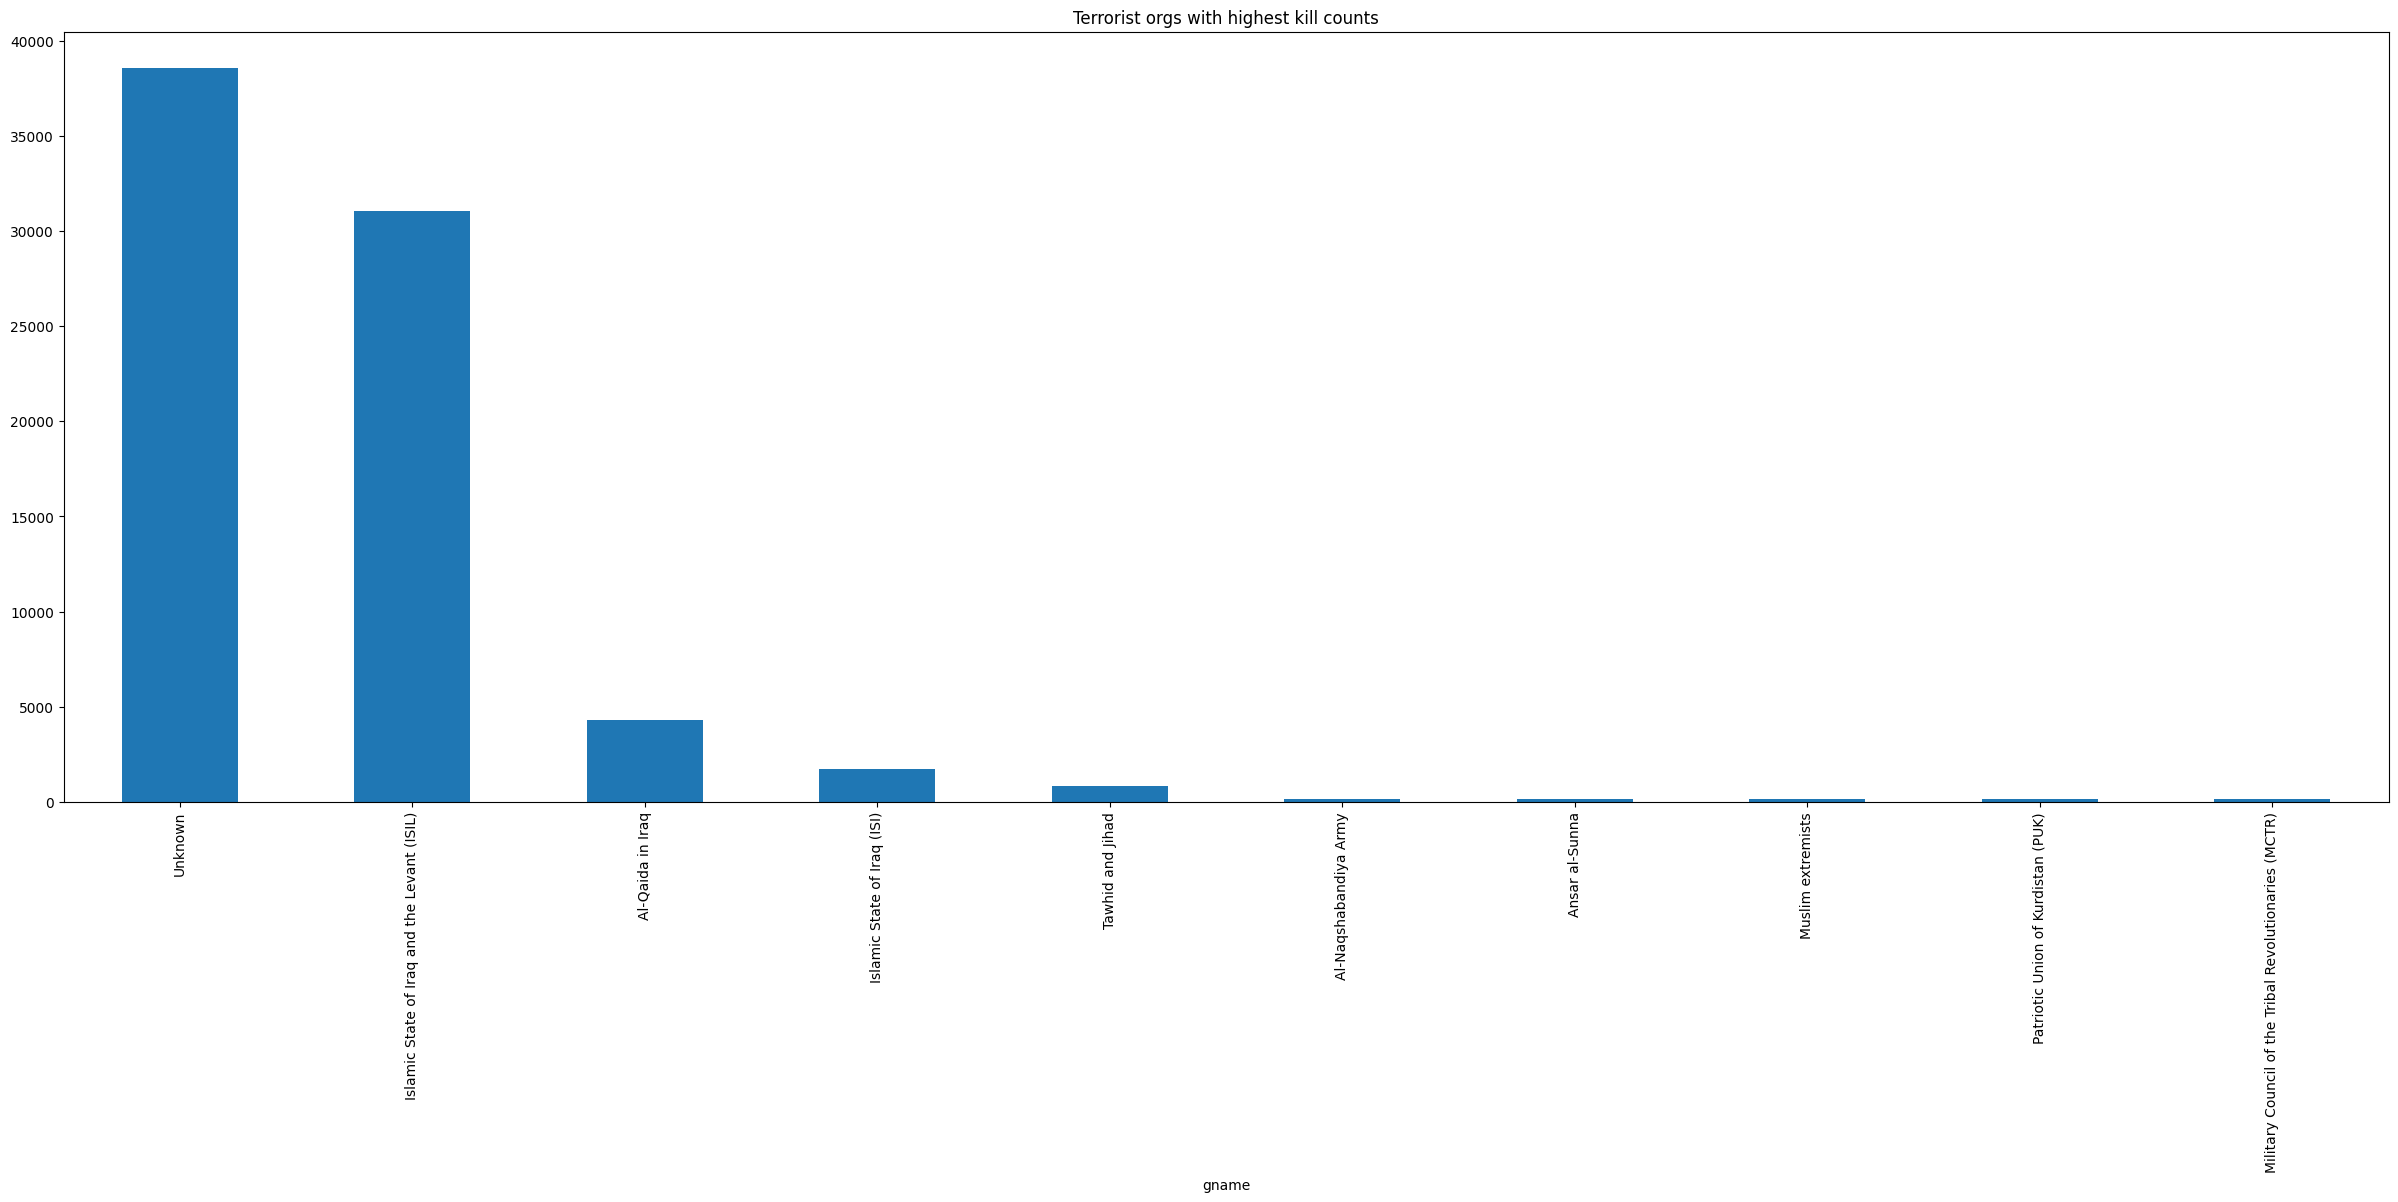

In [ ]:
Me_attacks.groupby(['gname']).nkill.sum().sort_values(ascending=False).head(10).plot(figsize=(30,10),title='Terrorist orgs with highest kill counts',kind='bar')

#Afghanistan

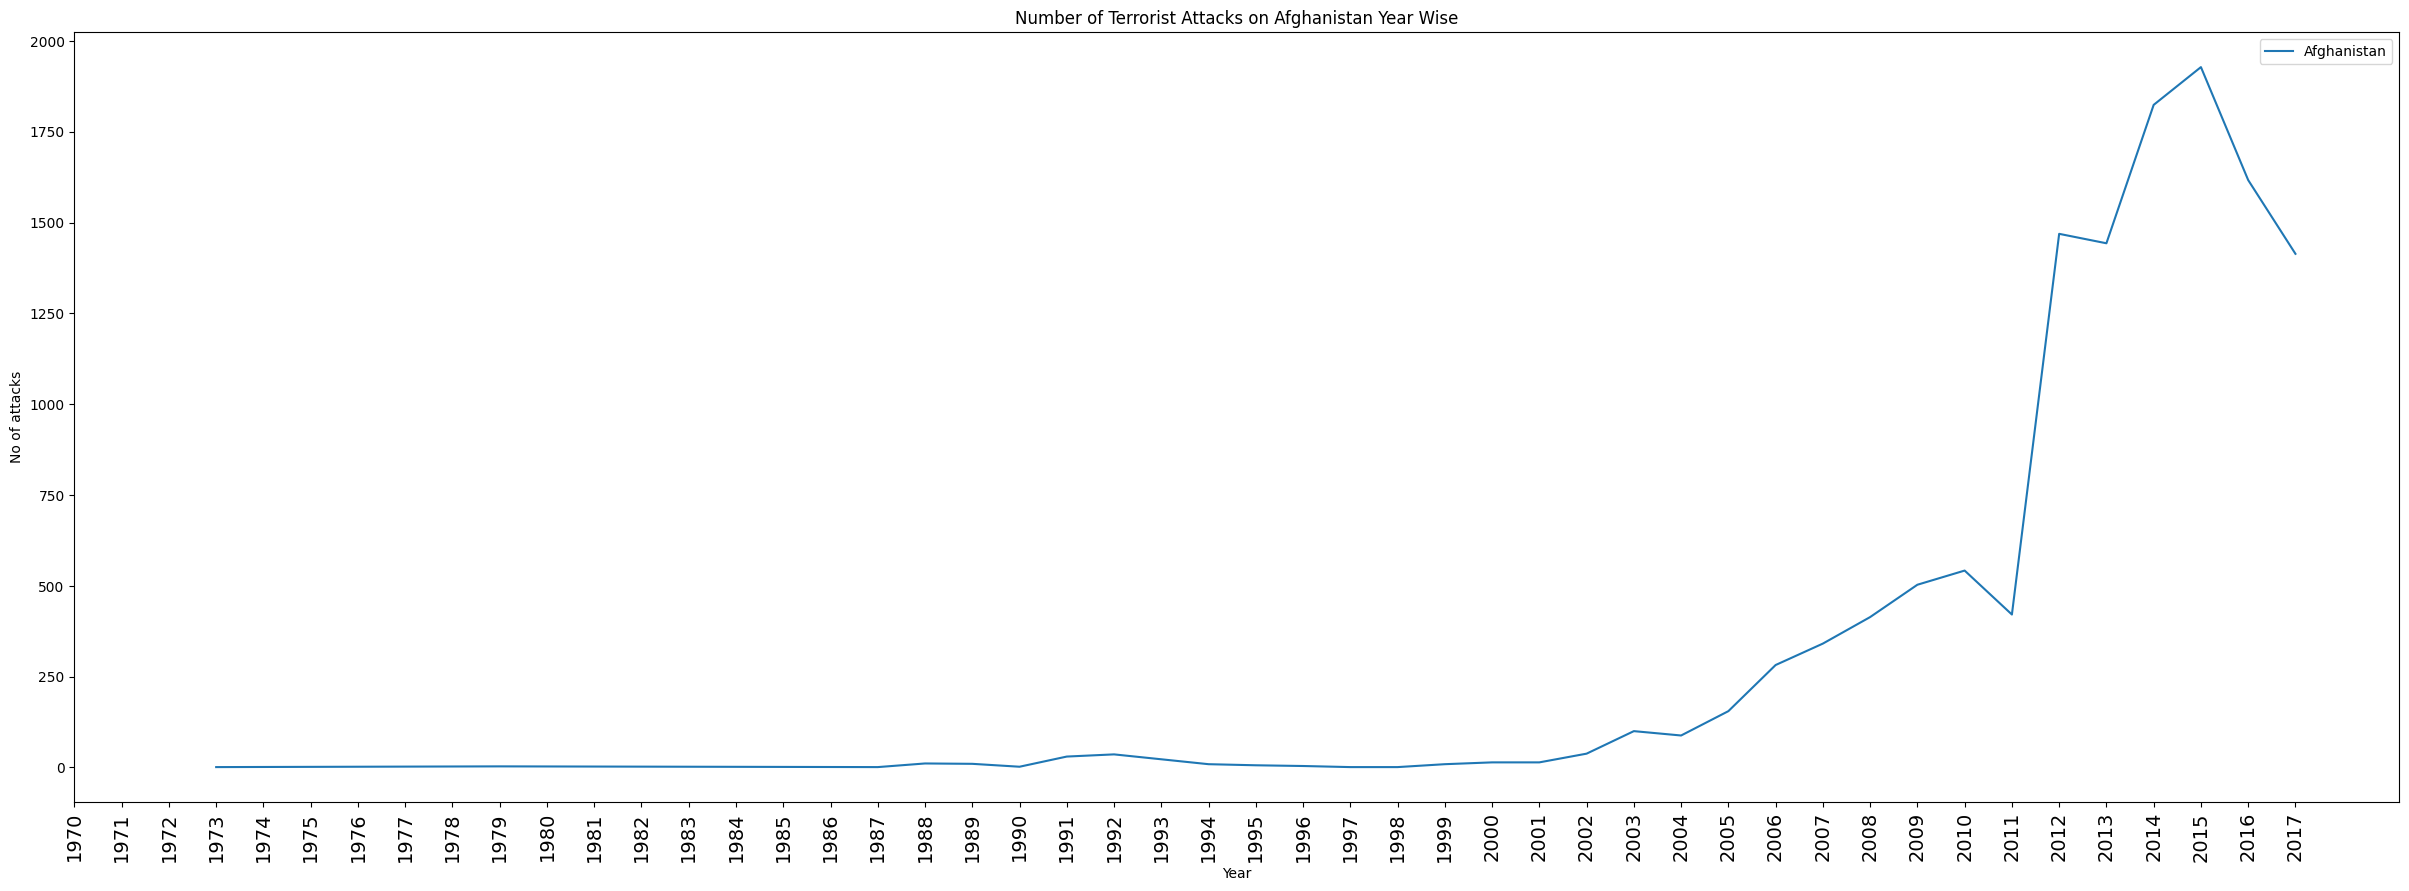

In [ ]:
afg_attacks=df[(df.country_txt=='Afghanistan')]
afg_attacks.sort_values(by='iyear')
afg=afg_attacks['iyear'].value_counts().sort_index().reset_index()
afg.columns=['Year','Afghanistan']
afg.plot(x='Year',y='Afghanistan',figsize=(30,10),title='Number of Terrorist Attacks on Afghanistan Year Wise',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
afg= afg.set_index('Year')

<Axes: title={'center': 'Targets'}>

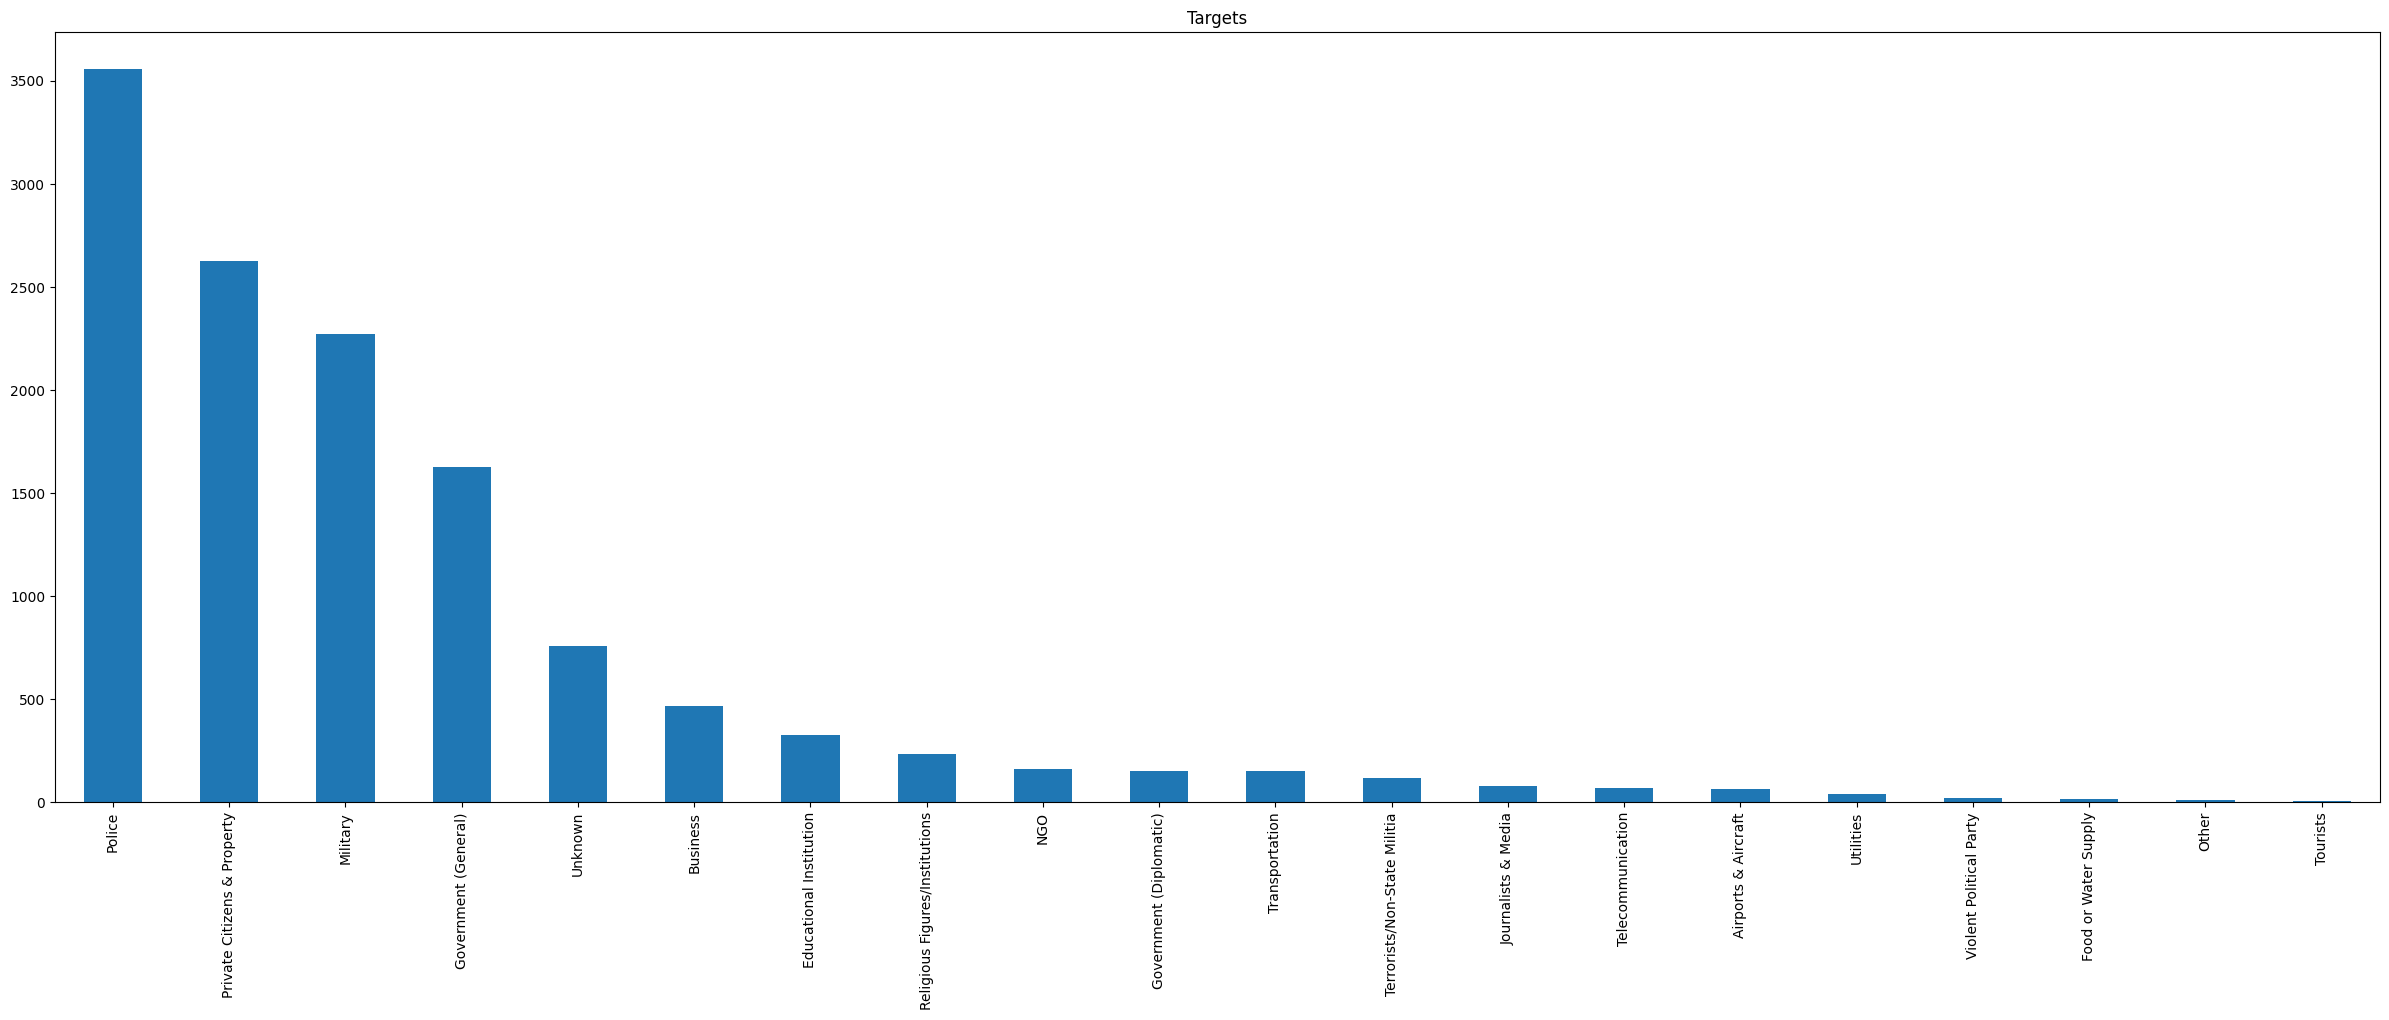

In [ ]:
afg_attacks.targtype1_txt.value_counts().plot(kind='bar',figsize=(30,10),title='Targets')

<Axes: title={'center': 'Deaths'}, xlabel='Year', ylabel='No of Deaths'>

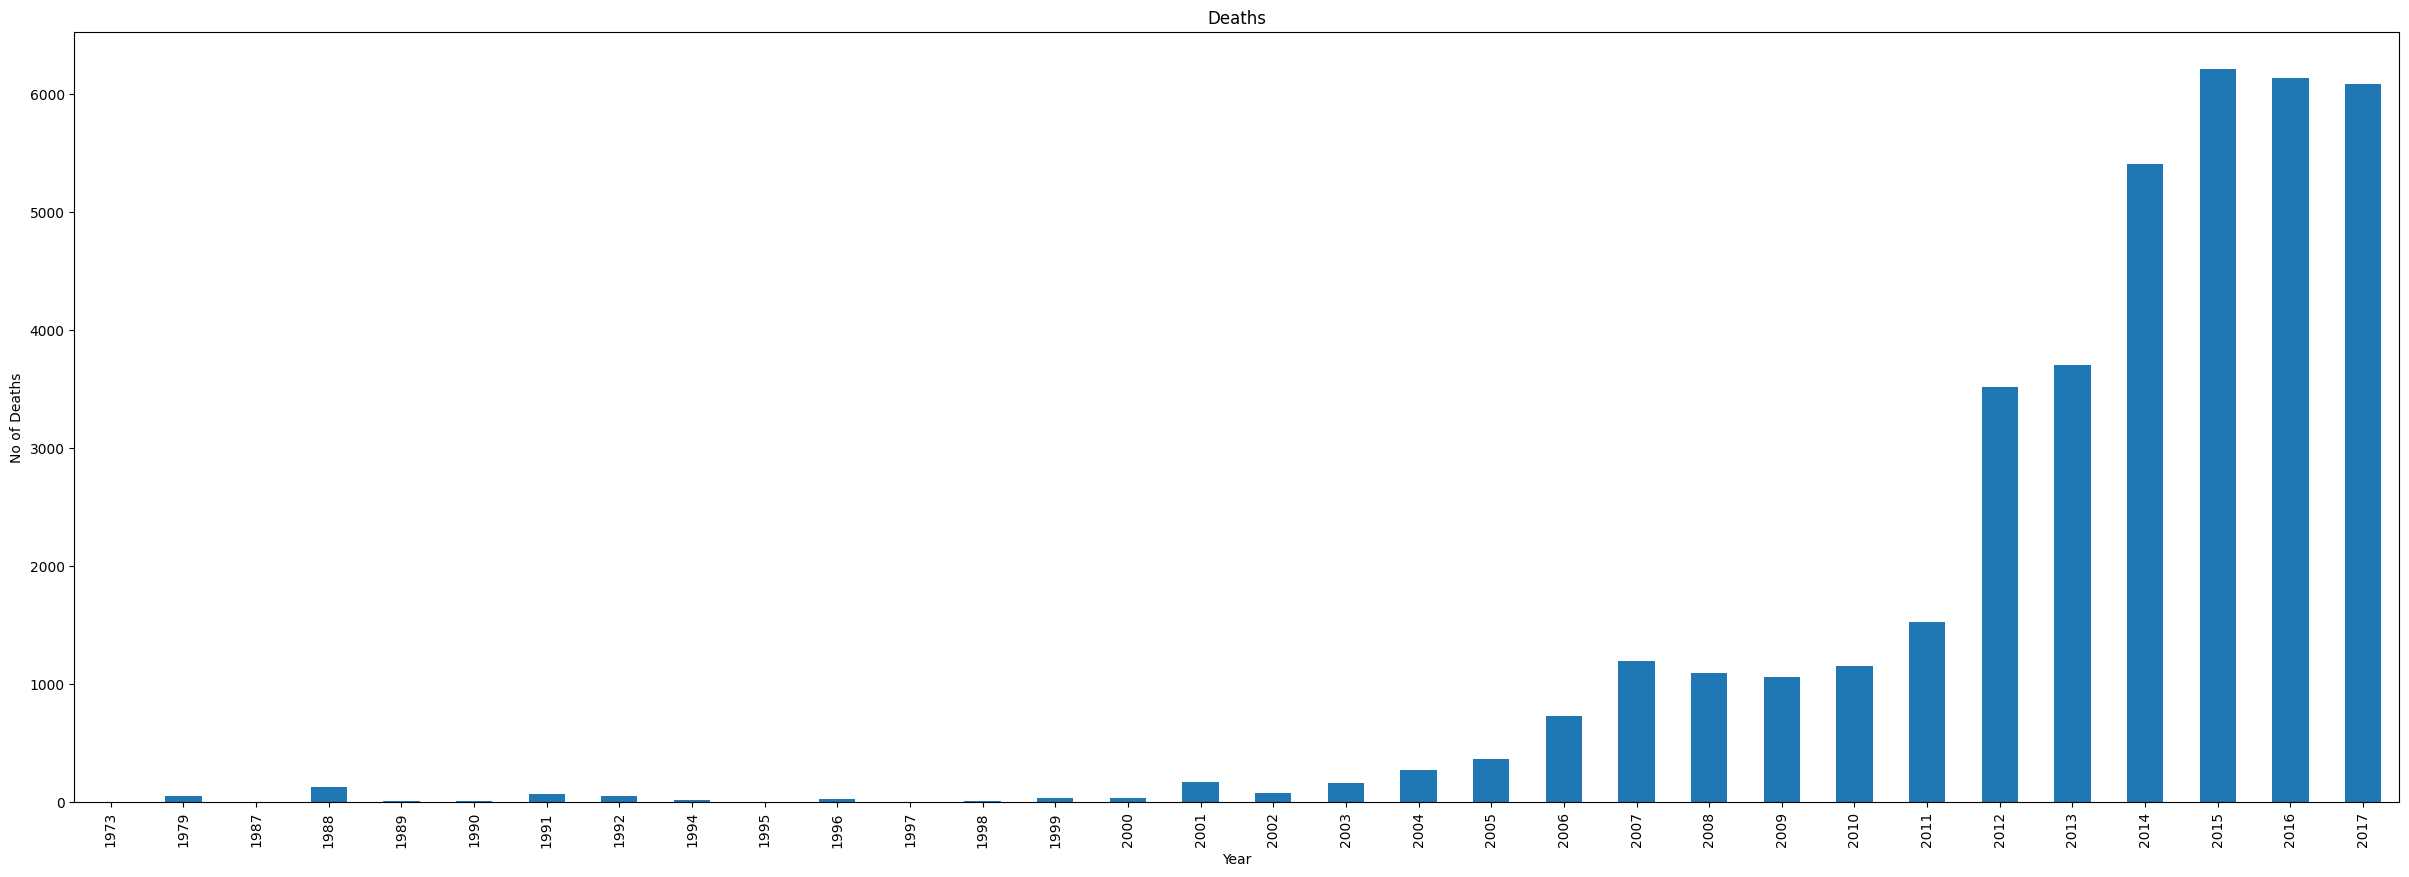

In [ ]:
afg_attacks.groupby(['iyear']).nkill.sum().plot(xlabel='Year',ylabel='No of Deaths',title='Deaths',kind='bar',figsize=(30,10))

<Axes: title={'center': 'States'}>

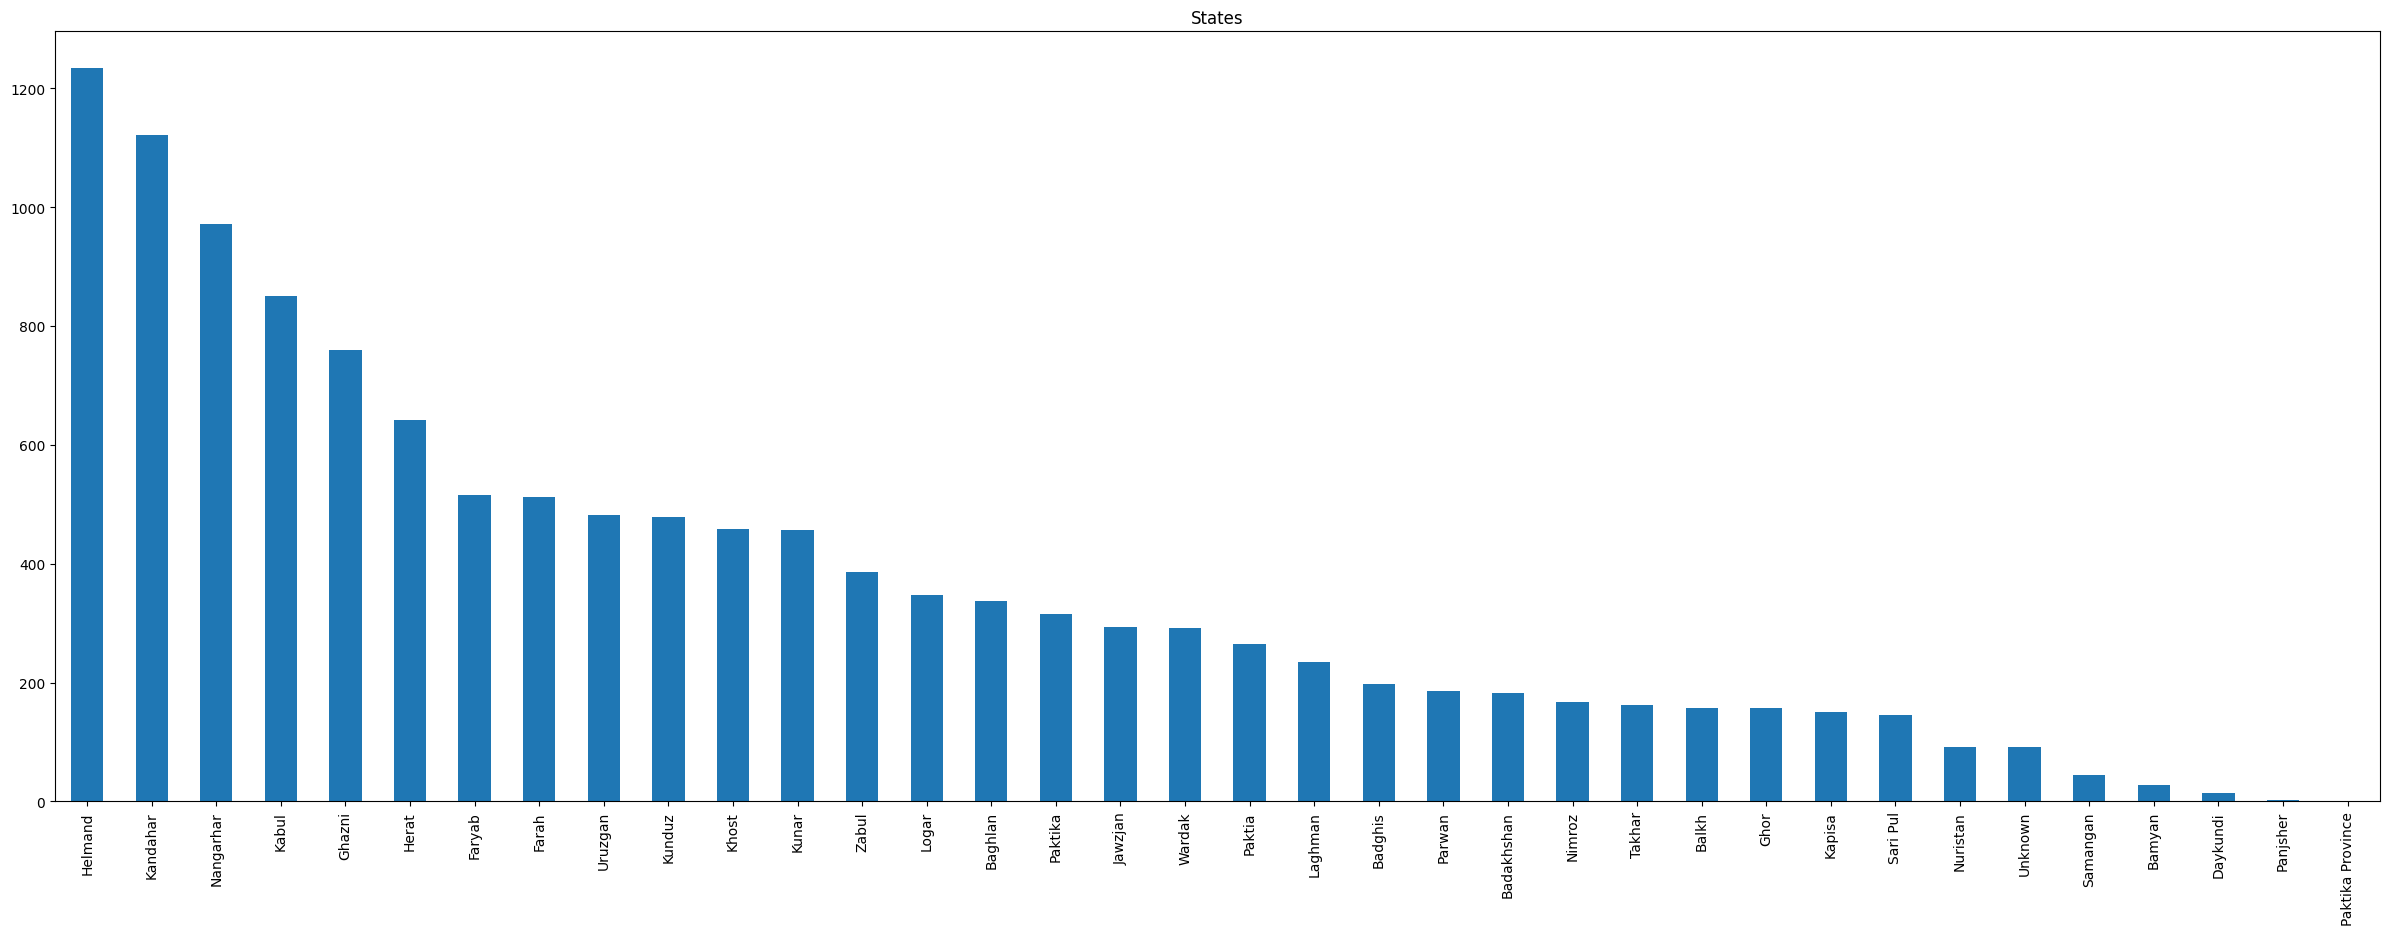

In [ ]:
afg_attacks.provstate.value_counts().plot(figsize=(30,10),title='States',kind='bar')

<Axes: title={'center': 'Attack Type'}>

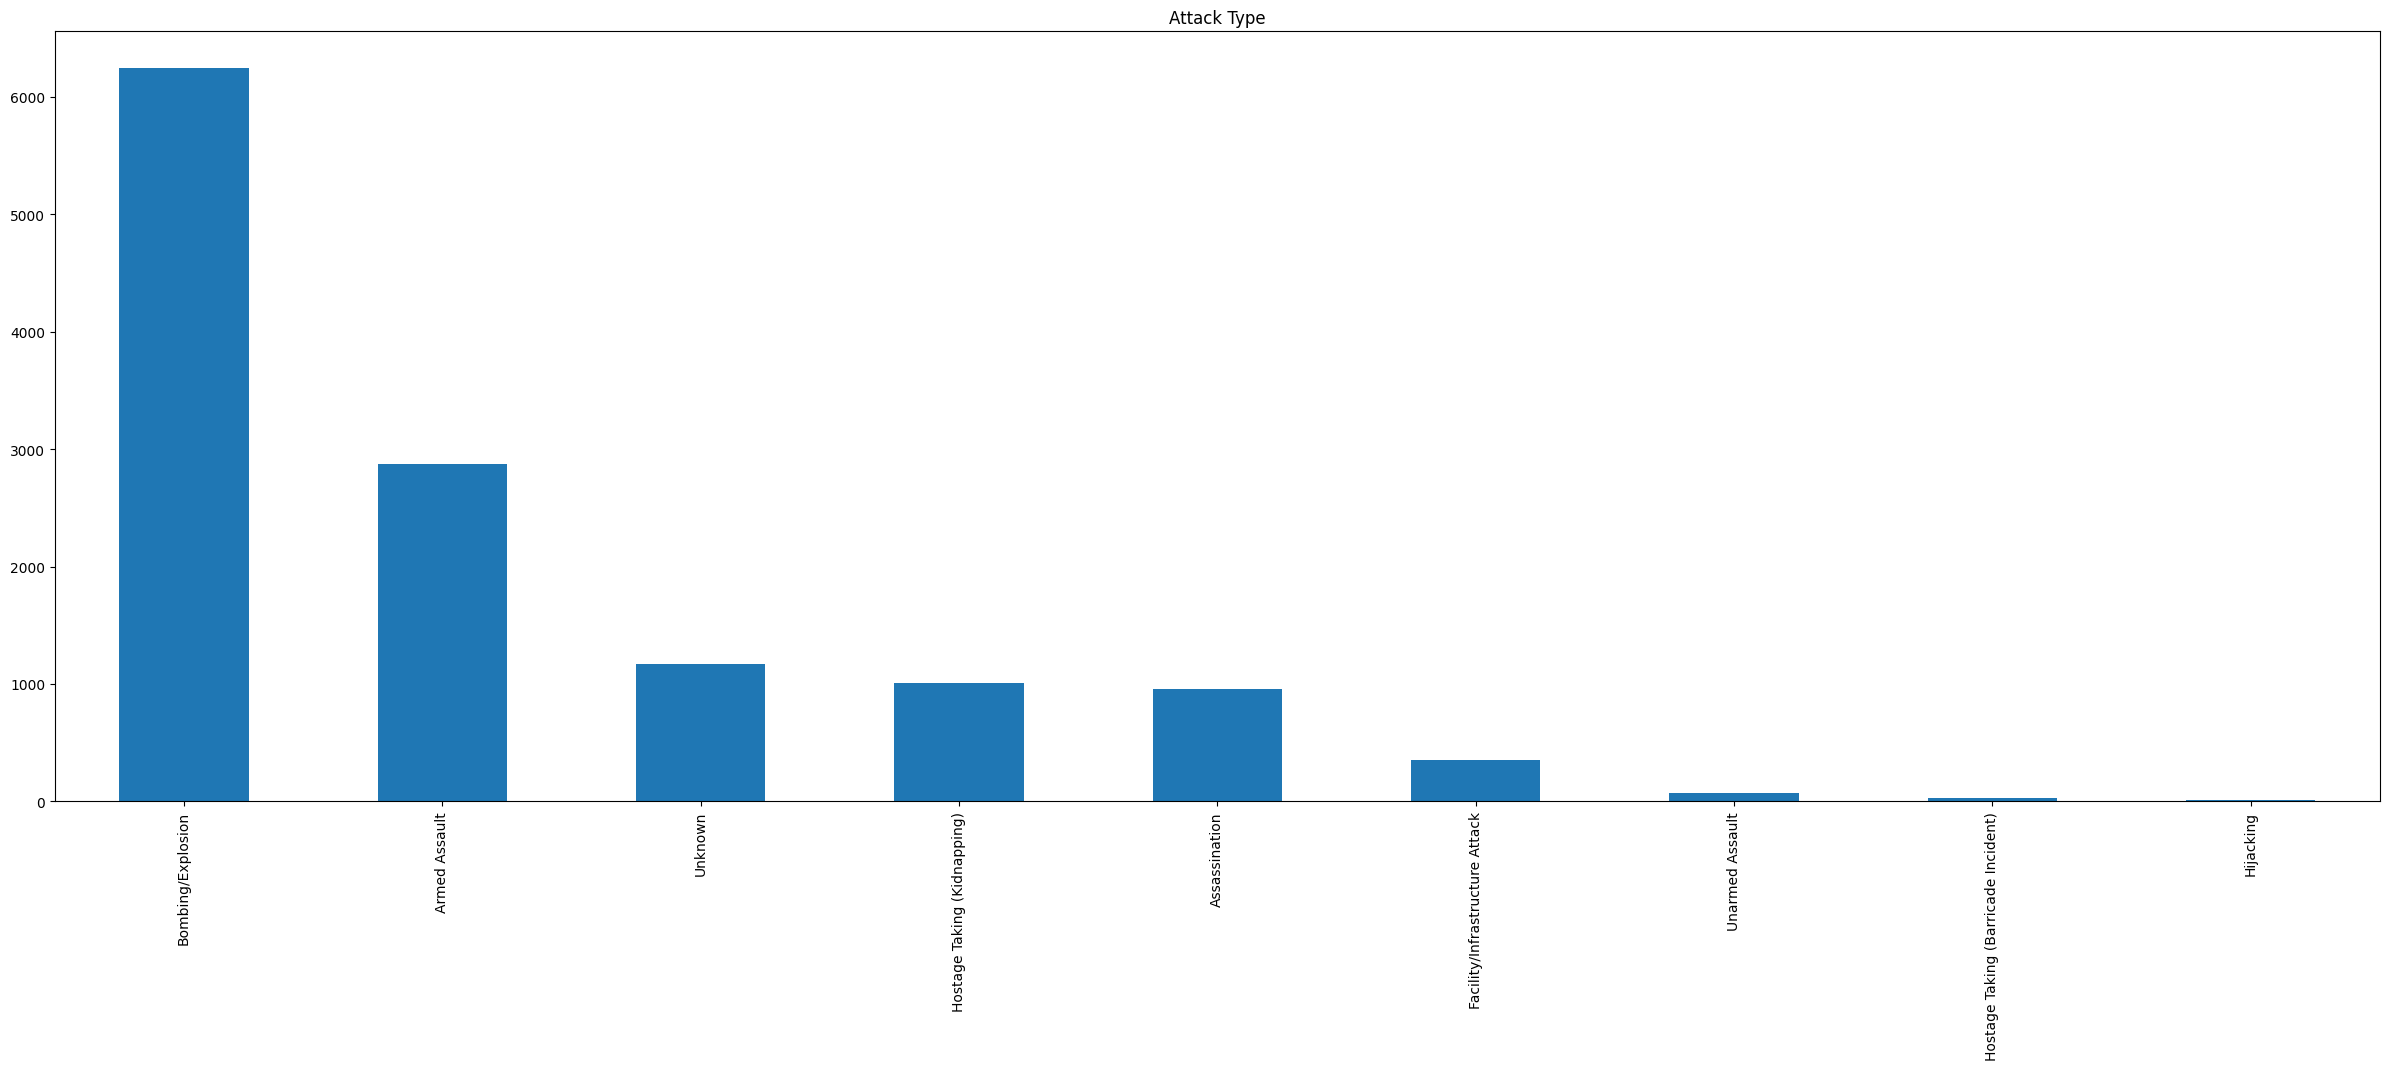

In [ ]:
afg_attacks.attacktype1_txt.value_counts().plot(figsize=(30,10),title='Attack Type',kind='bar')

<Axes: title={'center': 'Weapons Used'}>

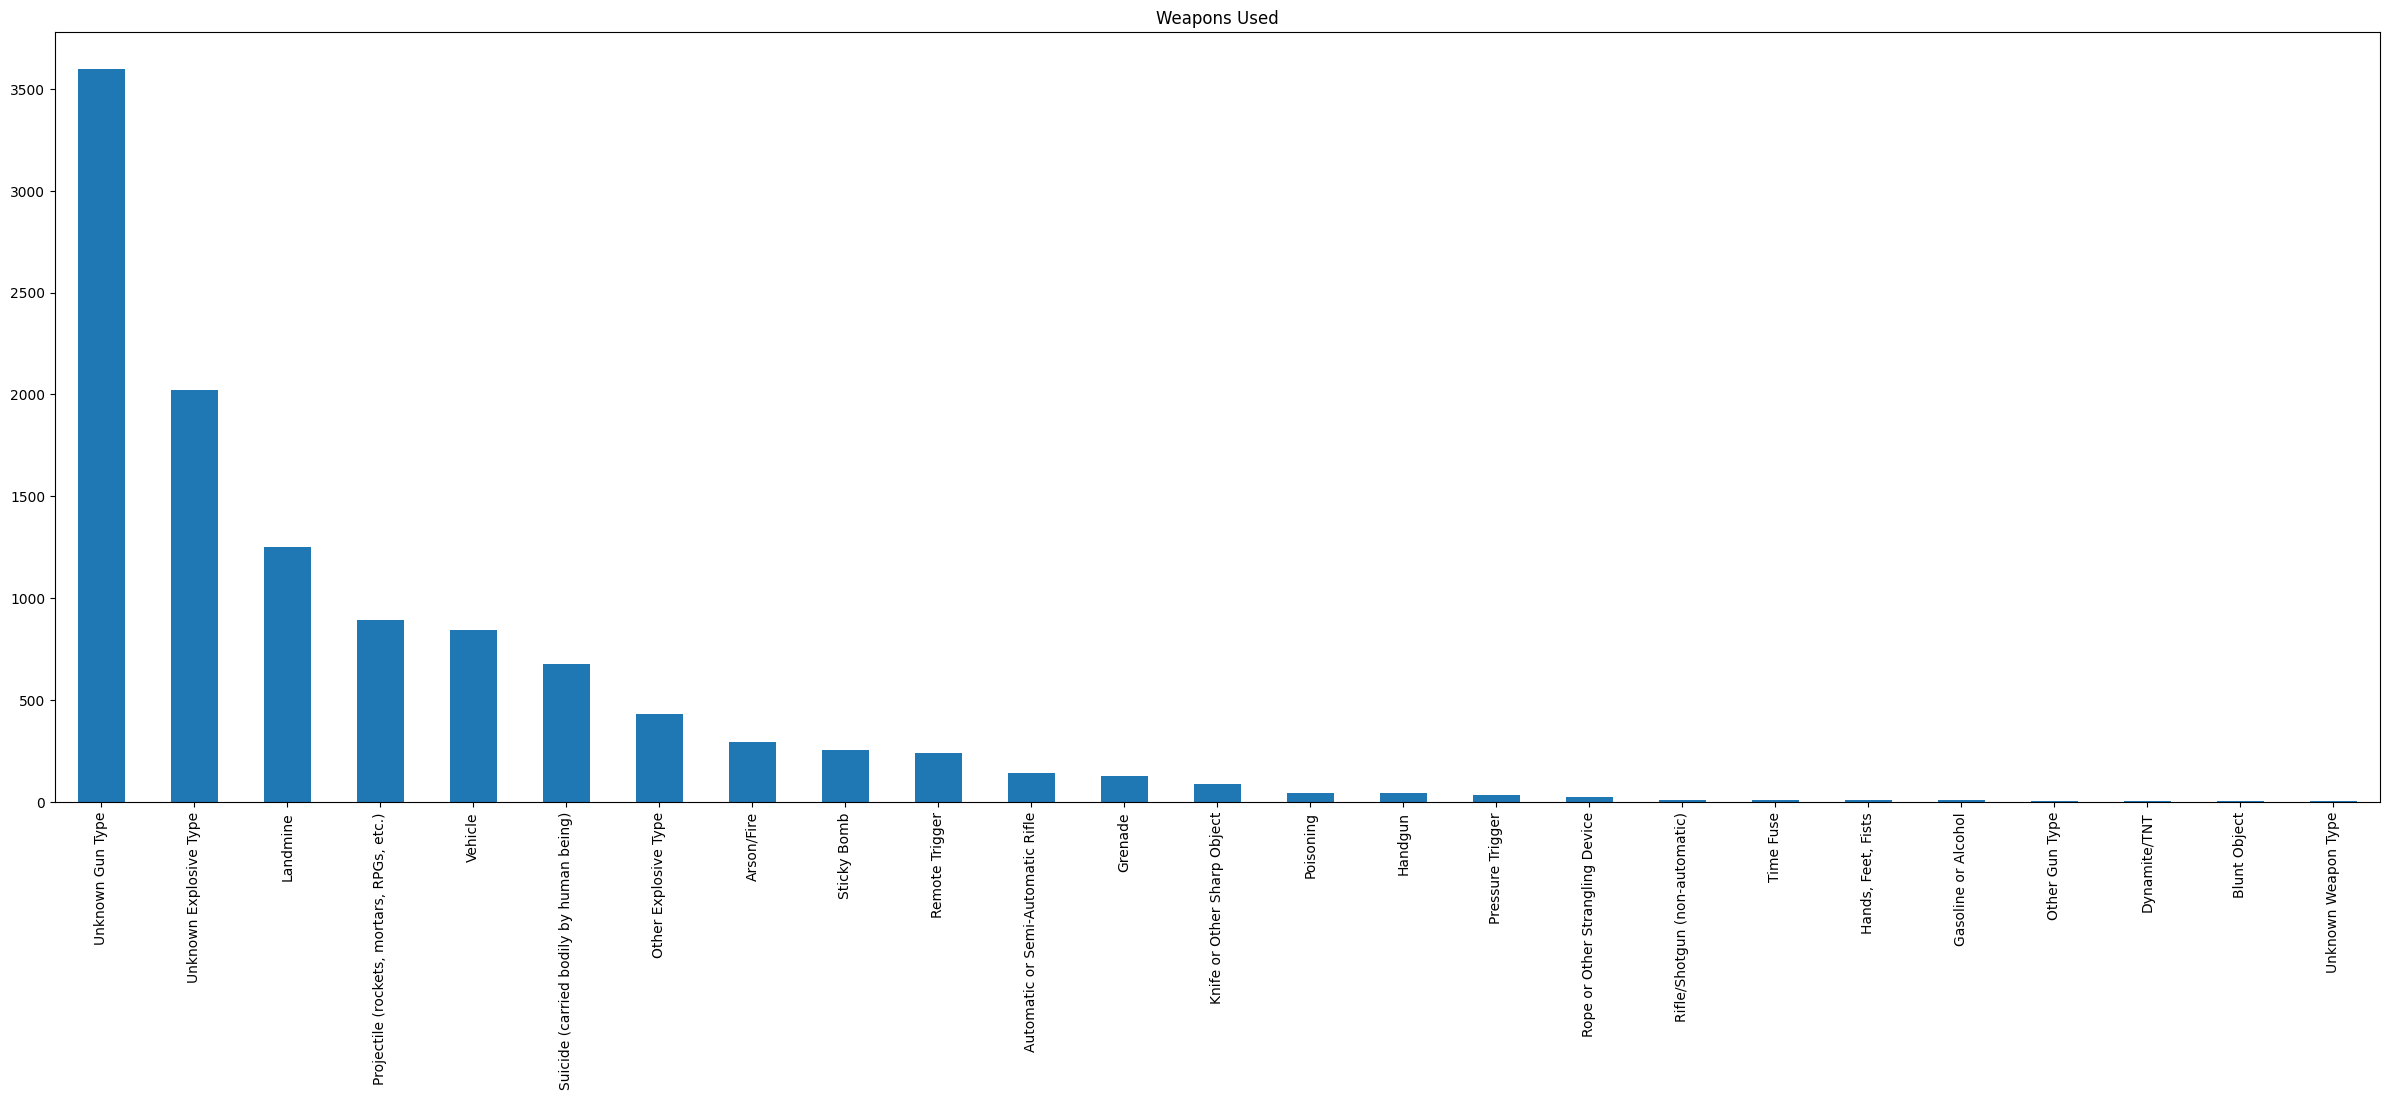

In [ ]:
afg_attacks.weapsubtype1_txt.value_counts().plot(figsize=(30,10),title='Weapons Used',kind='bar')

<Axes: title={'center': 'Terrorist Orgs'}>

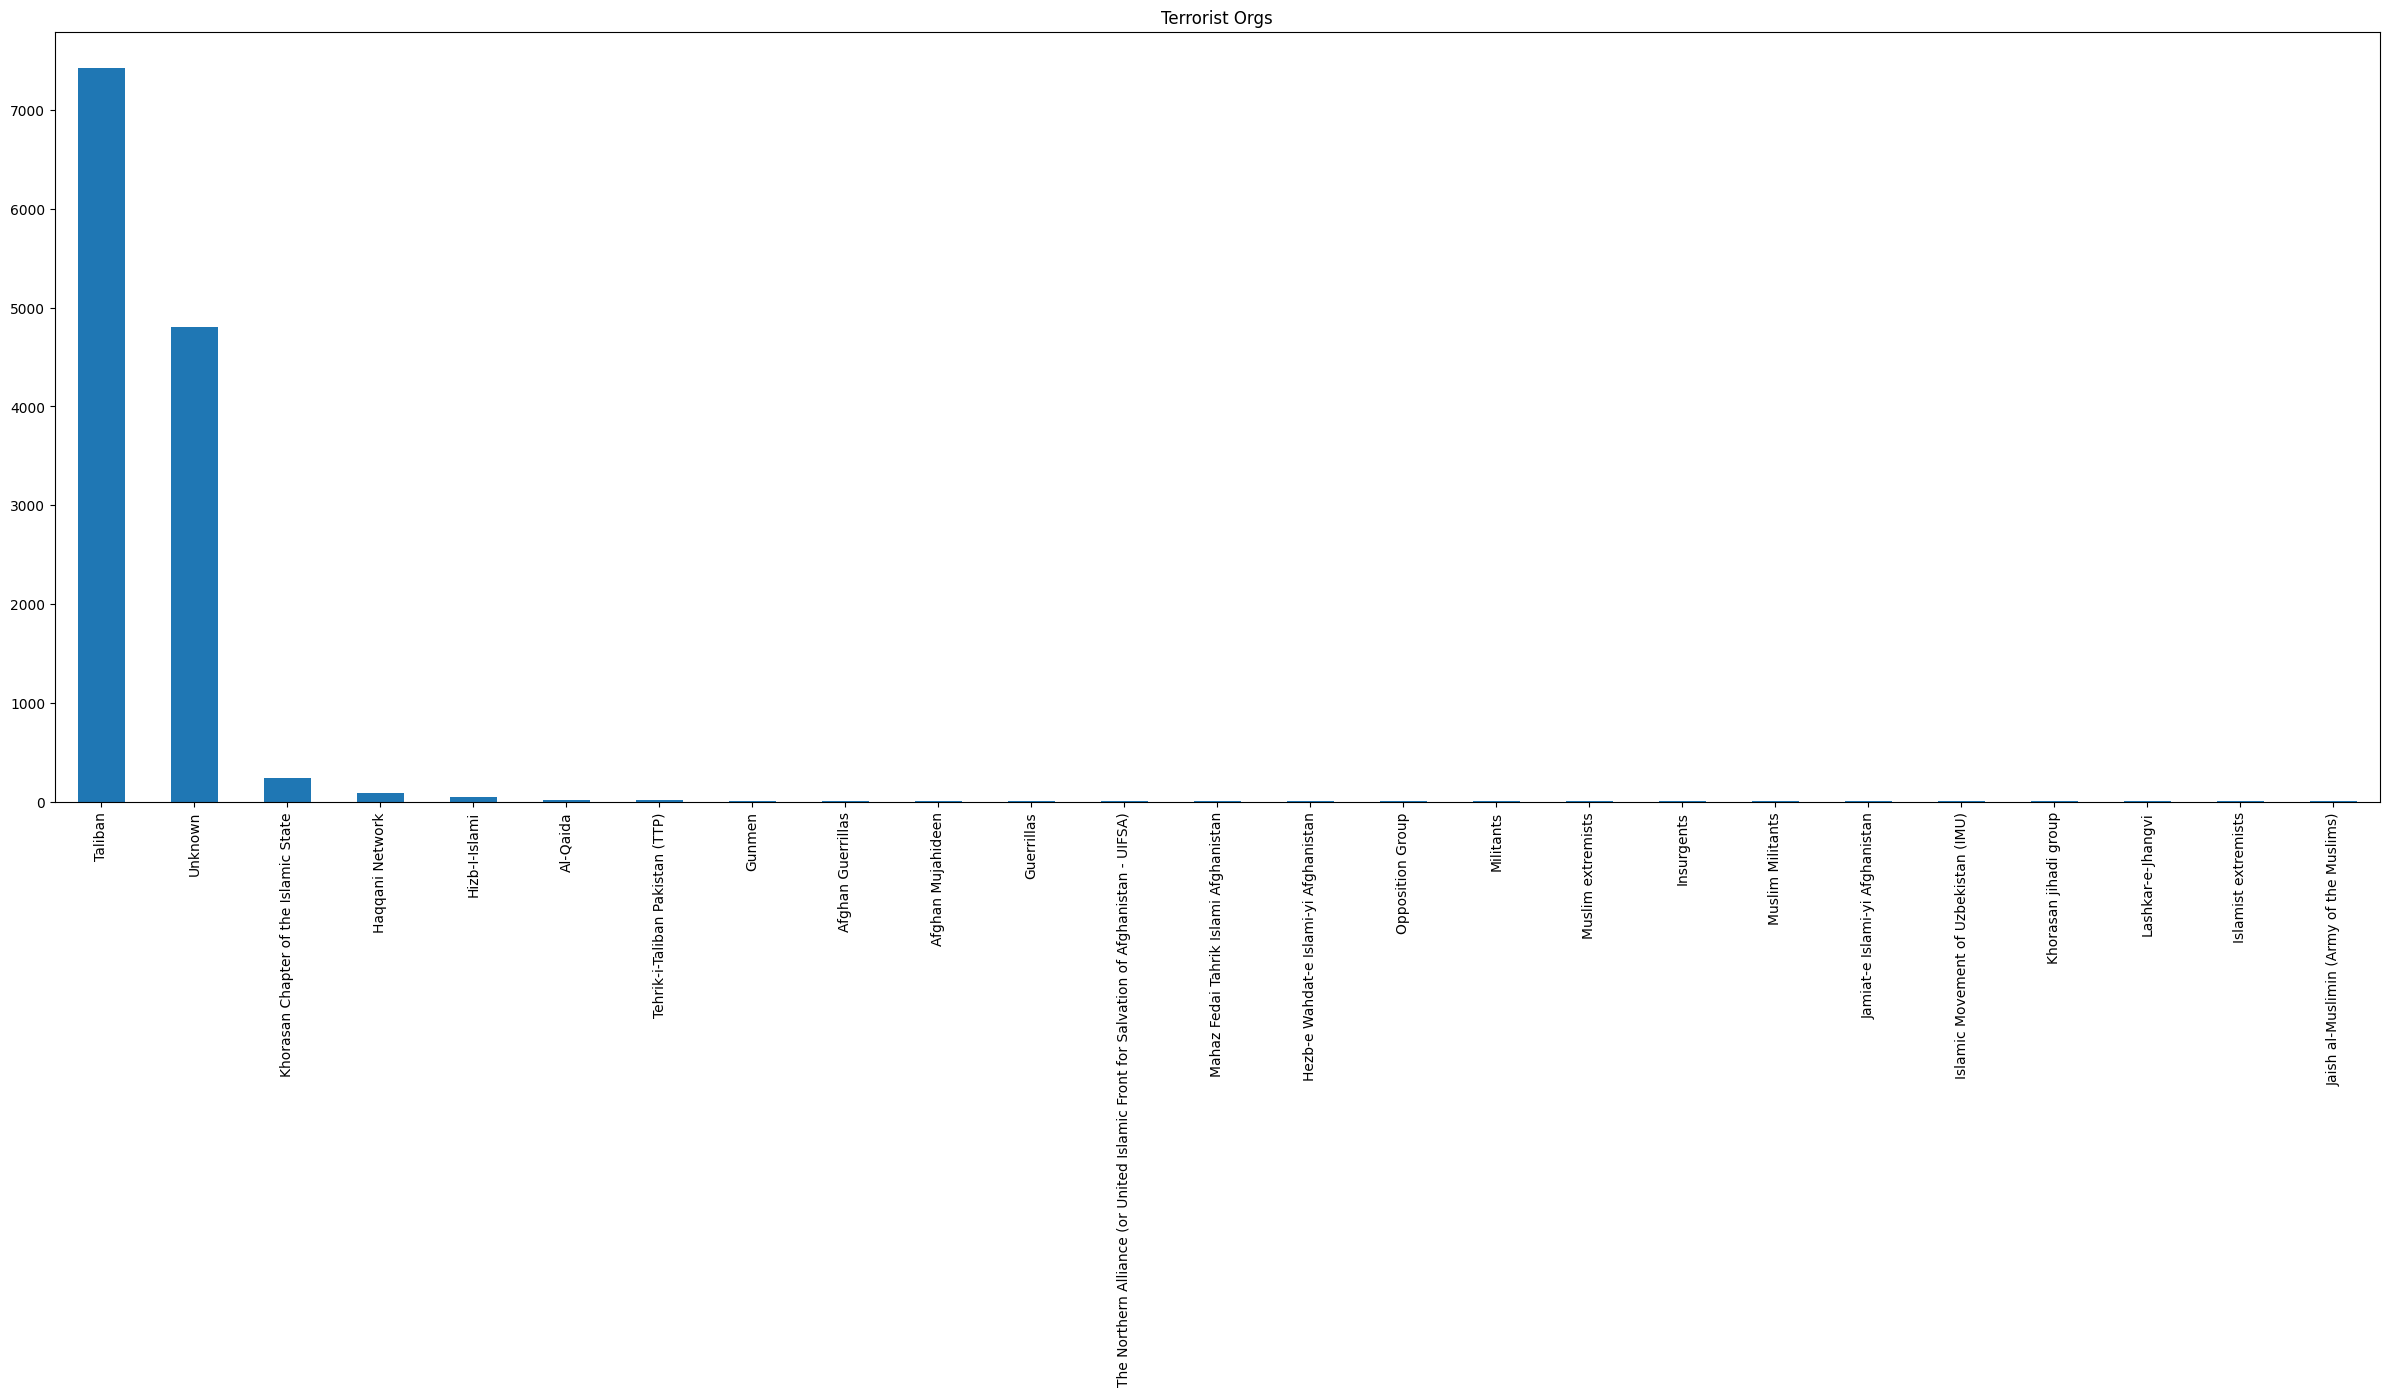

In [ ]:
afg_attacks.gname.value_counts().head(25).plot(figsize=(30,10),title='Terrorist Orgs',kind='bar')

<Axes: title={'center': 'Terrorist orgs with highest kill counts'}, xlabel='gname'>

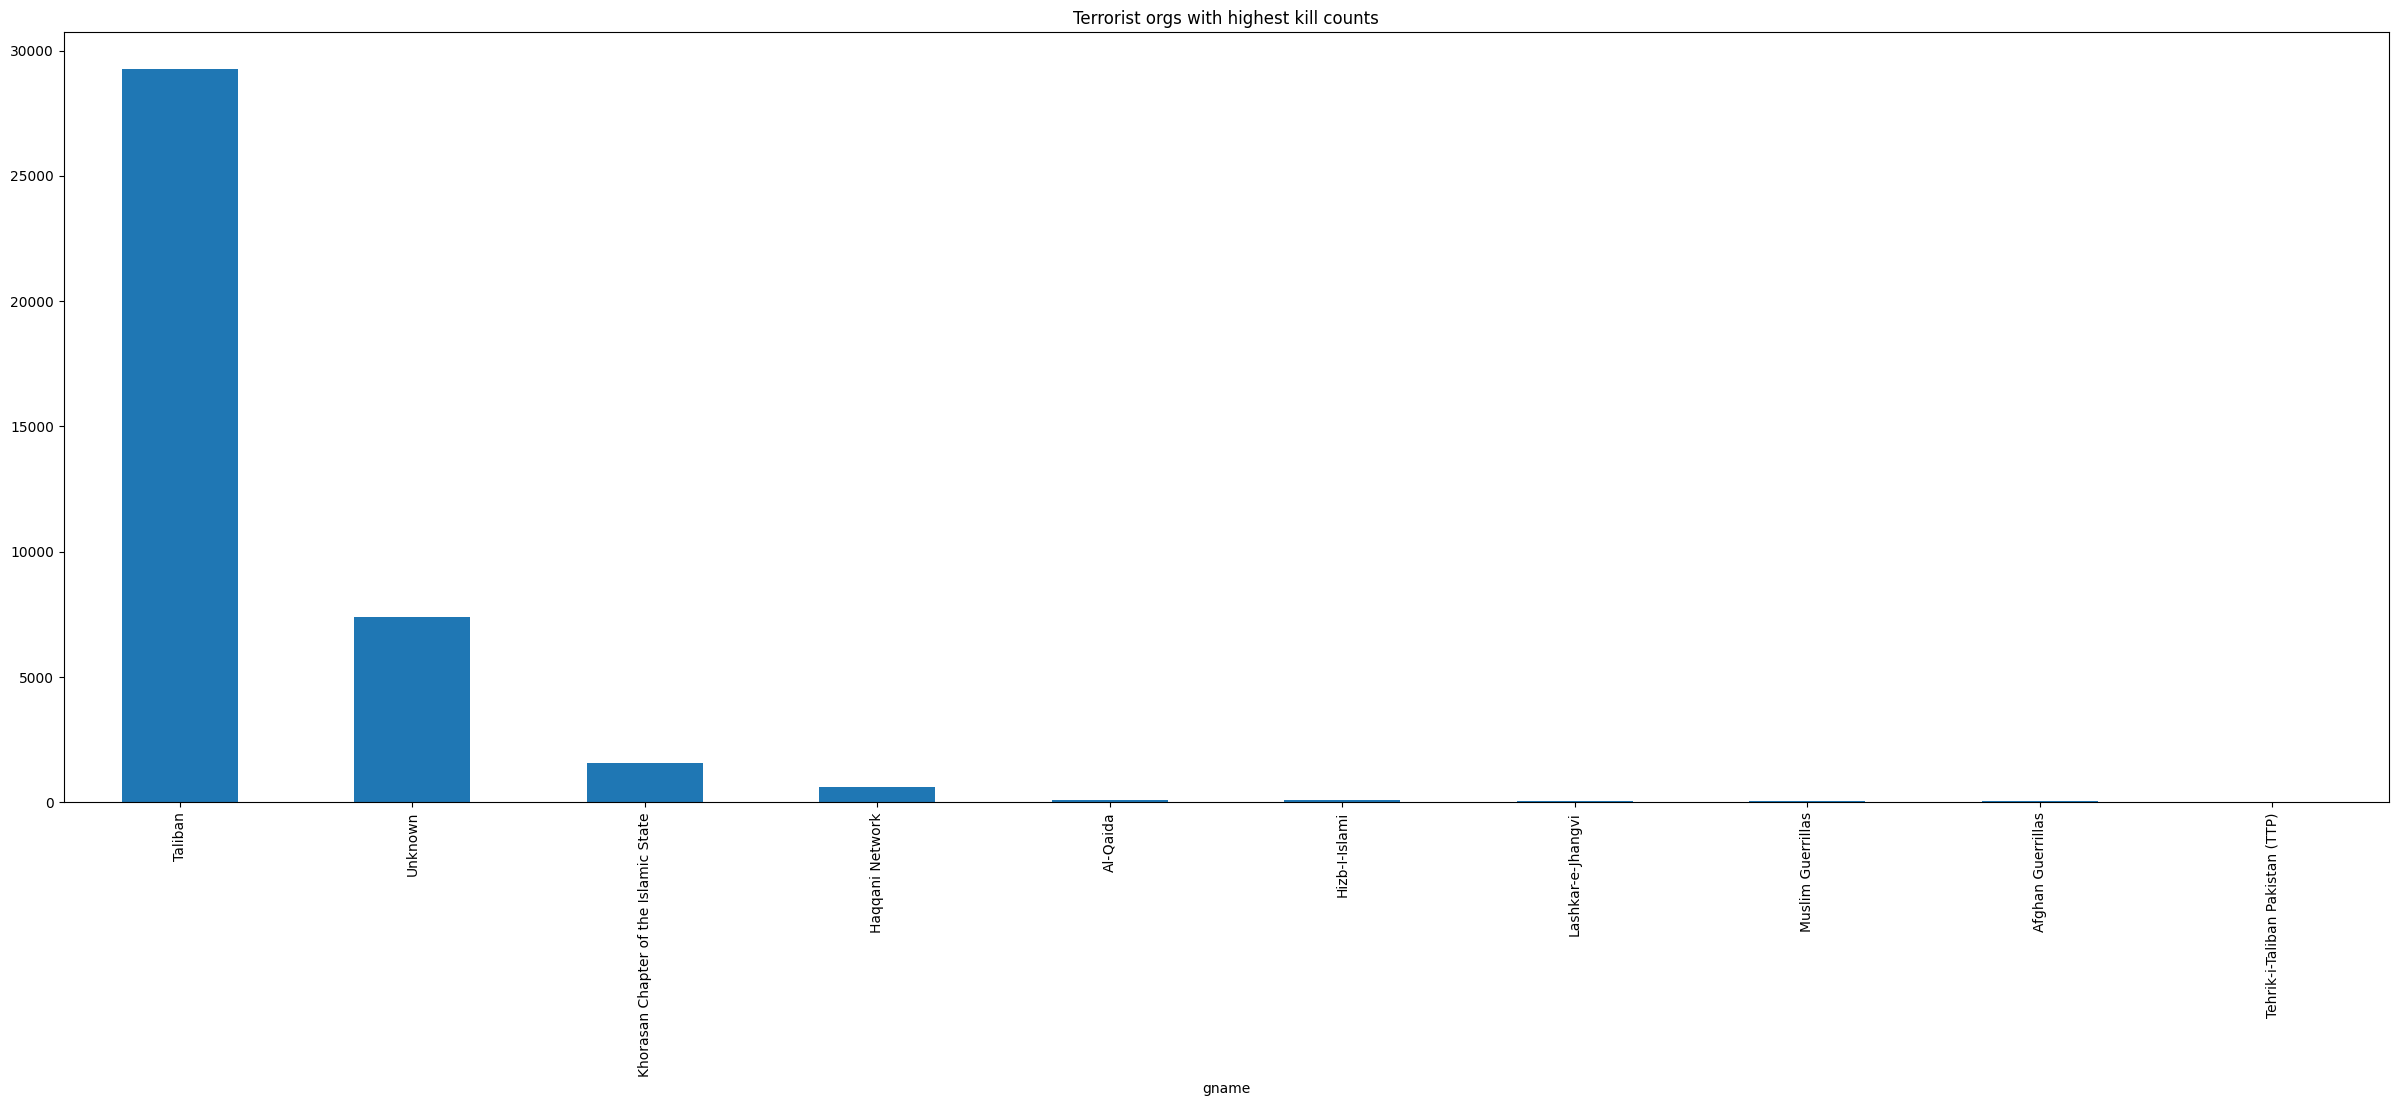

In [ ]:
afg_attacks.groupby(['gname']).nkill.sum().sort_values(ascending=False).head(10).plot(figsize=(30,10),title='Terrorist orgs with highest kill counts',kind='bar')

#Comparison Between Countries Analysed So Far

In [ ]:
#we have perviously defined these values, they are the total terror attacks in a country year wise. we are now making a list out them
Countries=[usa,eu,col,ind,pak,me,afg]


([<matplotlib.axis.XTick at 0x7eb6aa47a710>,
 [Text(1970, 0, '1970'),
  Text(1971, 0, '1971'),
  Text(1972, 0, '1972'),
  Text(1973, 0, '1973'),
  Text(1974, 0, '1974'),
  Text(1975, 0, '1975'),
  Text(1976, 0, '1976'),
  Text(1977, 0, '1977'),
  Text(1978, 0, '1978'),
  Text(1979, 0, '1979'),
  Text(1980, 0, '1980'),
  Text(1981, 0, '1981'),
  Text(1982, 0, '1982'),
  Text(1983, 0, '1983'),
  Text(1984, 0, '1984'),
  Text(1985, 0, '1985'),
  Text(1986, 0, '1986'),
  Text(1987, 0, '1987'),
  Text(1988, 0, '1988'),
  Text(1989, 0, '1989'),
  Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Tex

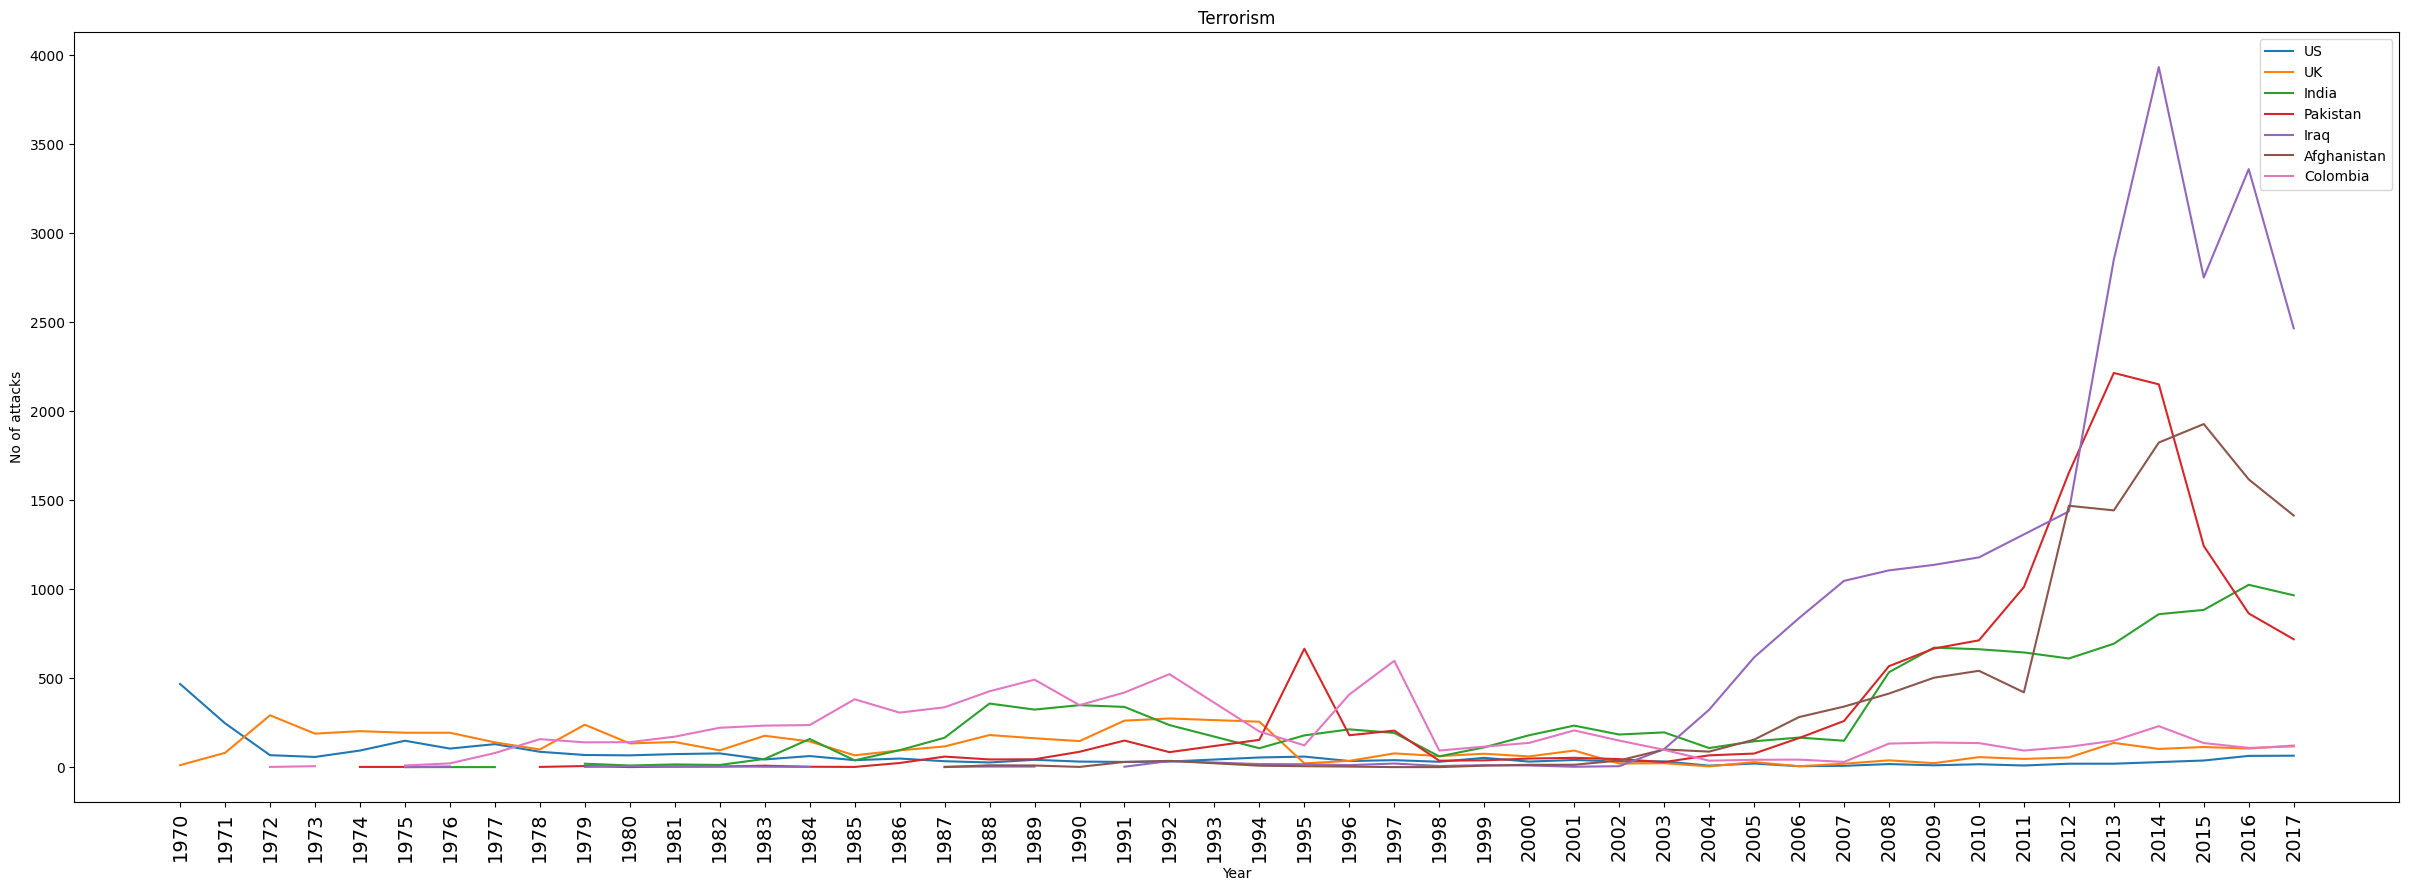

In [ ]:
#converting our list into a dataframe
newdf=pd.concat(Countries,axis=1)
newdf['Year']=newdf.index
newdf.plot(x='Year',y=['US','UK','India','Pakistan','Iraq','Afghanistan','Colombia'],figsize=(30,10),title='Terrorism',xlabel='Year',ylabel='No of attacks')
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)

<Axes: title={'center': 'Terrorist orgs with highest kill counts'}, xlabel='gname'>

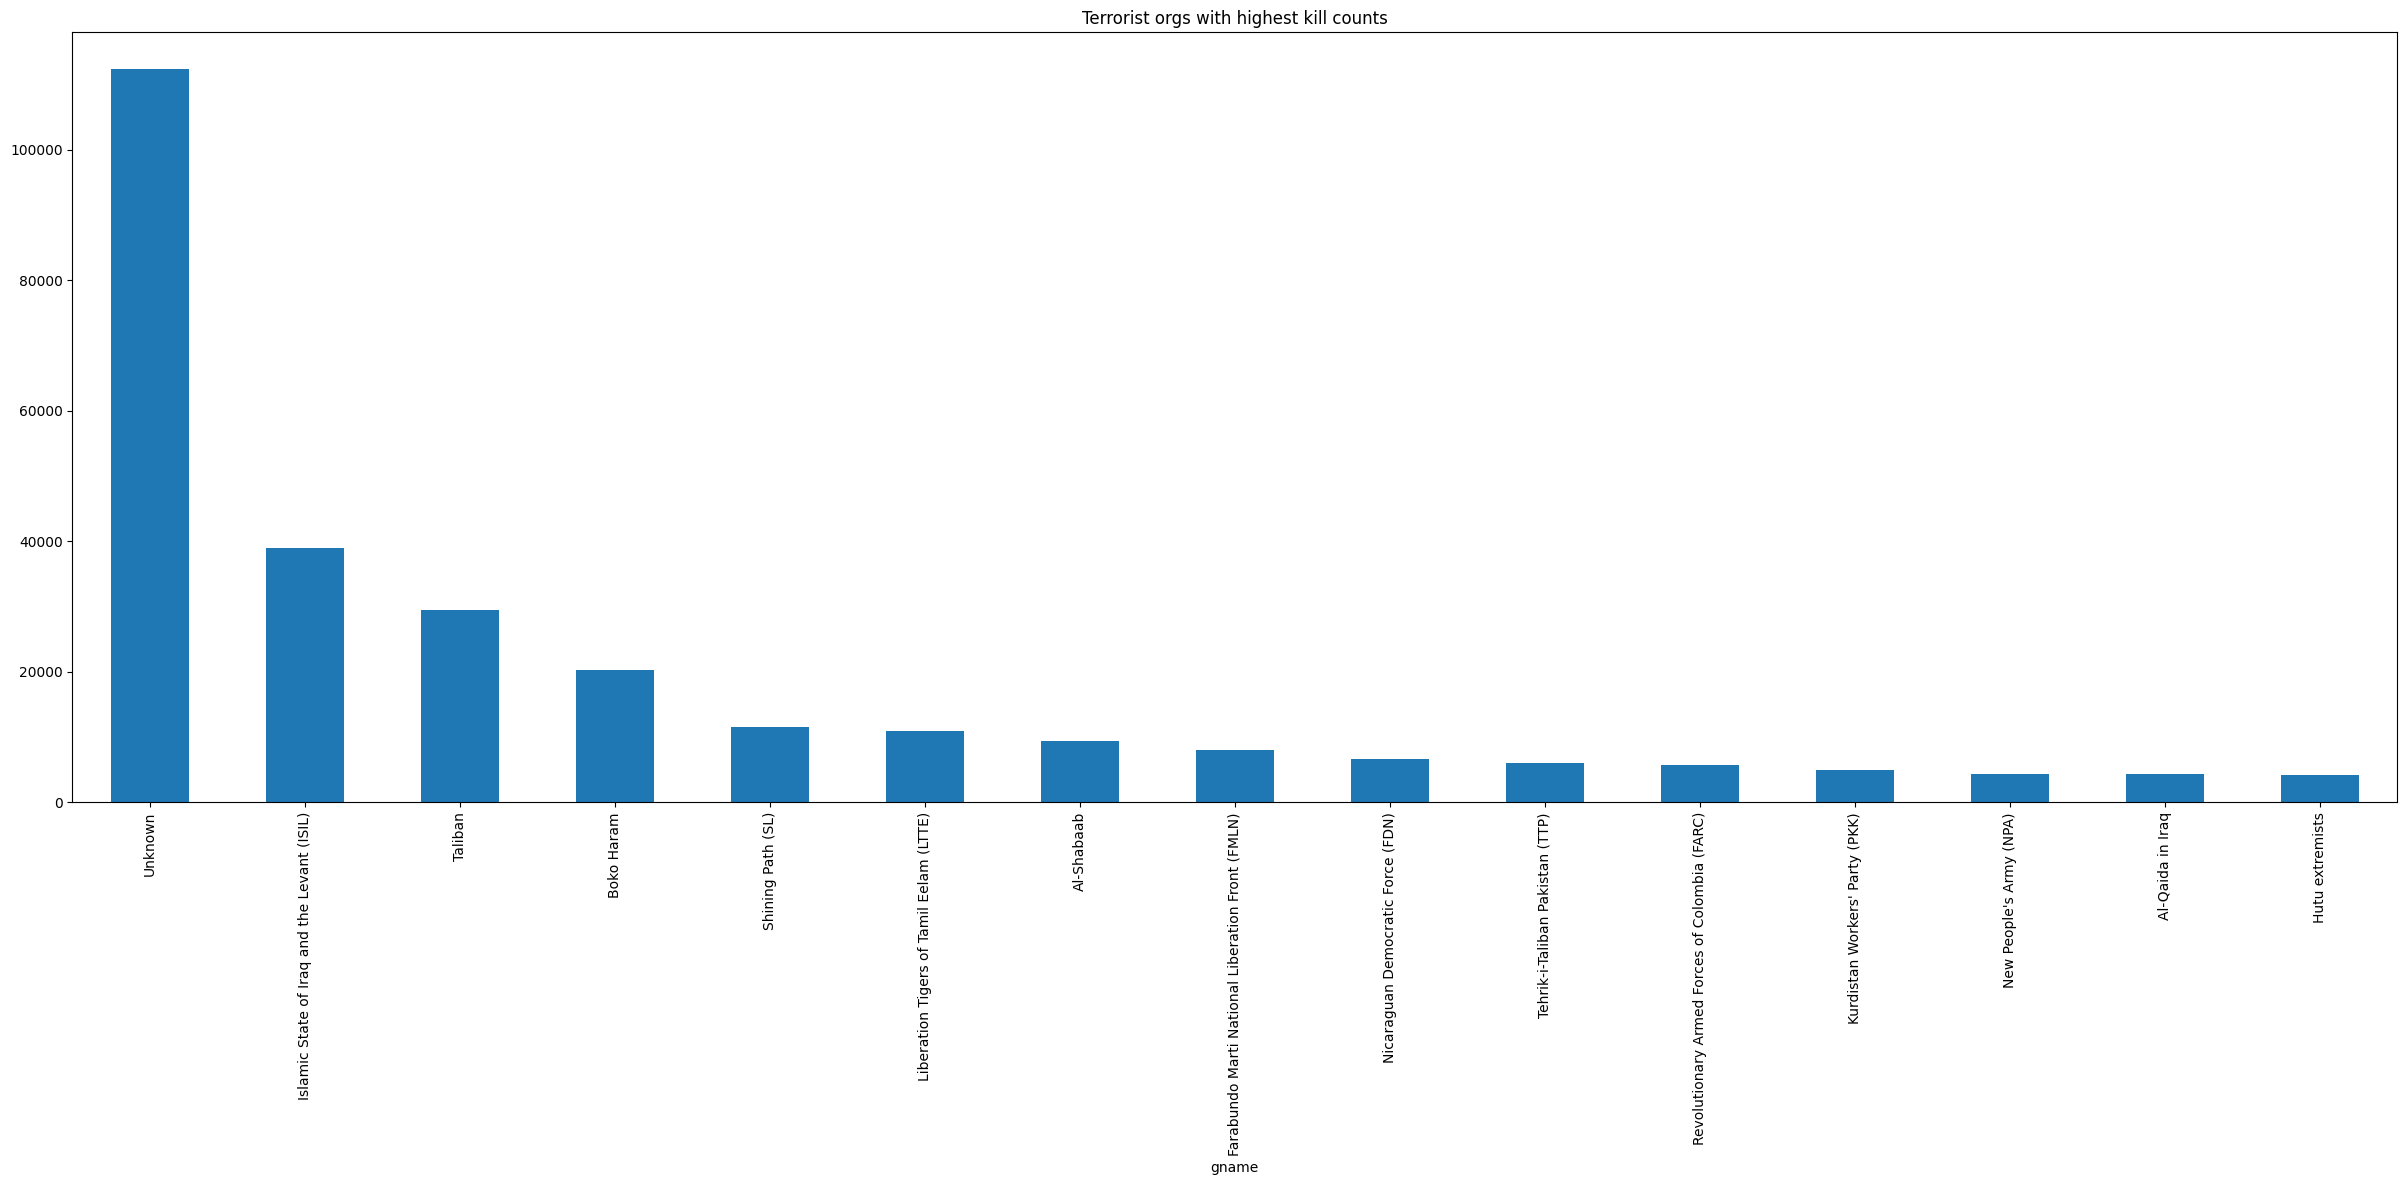

In [ ]:
df.groupby(['gname']).nkill.sum().sort_values(ascending=False).head(15).plot(figsize=(30,10),title='Terrorist orgs with highest kill counts',kind='bar')

# **Conclusions Drawn From The Above Insights**


1.   The entries in the data range from 1970 till late 2017.
2.    We also saw the preferred mode of
attack for any Terrorist Organisation is
Bombing/Explosion and second on that
list is Armed Assault(rifles).
3.   Terrorists attack private people
more than any other target as they are
unprotected.
4.   The 2003 invasion of Iraq by the USA, known as the Iraq War, resulted in a notable increase in terrorist attacks in neighboring countries, likely triggering a chain reaction of instability and violence across the region.
5.  In the 1970s, the USA experienced the highest number of terrorist attacks in its history, primarily perpetrated by left-wing extremist groups and black nationalist/separatist organizations.
6.   Additionally, despite the relatively low number of attacks, the events of September 11, 2001, known as 9/11, resulted in the highest death toll ever in the USA due to a terrorist attack.
7. Between 1971 and 1995, the UK experienced the highest number of terror attacks linked to Northern Ireland.
8.   The ISIL ranks among the terror organizations with the highest death count, claiming close to 40,000 lives.
9. One downside of this data is that most of
the reasons why these attacks happen are
political and cannot be determined by
most Machine Learning Algorithms.







